In [1]:
# standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from random import randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import randint, uniform

# for standard XGBoost implementation
import xgboost as xgb
from xgboost import XGBClassifier, DMatrix, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

%matplotlib inline

/Users/zach-eberhart/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def parse_element(_str, position, text):
    return _str.split('_')[position].replace(text, '')

In [3]:
df = pd.DataFrame([{'n_estimators': 1000, 'mean': 0.856811671533696, 'learning_rate': 0.01, 'std': 0.0378846037637915, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.856656614510723, 'learning_rate': 0.005, 'std': 0.04142789321708242, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8558627753131166, 'learning_rate': 0.01, 'std': 0.03739667117434384, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.855166803785716, 'learning_rate': 0.005, 'std': 0.03903449124664231, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8551291412514936, 'learning_rate': 0.005, 'std': 0.040920312846325954, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8548366521593721, 'learning_rate': 0.005, 'std': 0.034919074991739935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8548366521593721, 'learning_rate': 0.005, 'std': 0.034919074991739935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8547056674332119, 'learning_rate': 0.01, 'std': 0.03763690605516596, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8547030700170586, 'learning_rate': 0.005, 'std': 0.03853277374824893, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8544338190781313, 'learning_rate': 0.005, 'std': 0.04087100695491077, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8543074260276345, 'learning_rate': 0.005, 'std': 0.038031367107063806, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8540784350390831, 'learning_rate': 0.01, 'std': 0.034485968837842926, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8539636379664858, 'learning_rate': 0.005, 'std': 0.040126649126108506, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8539636379664858, 'learning_rate': 0.005, 'std': 0.040126649126108506, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8539188787352368, 'learning_rate': 0.005, 'std': 0.035602747436944165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8539188787352368, 'learning_rate': 0.005, 'std': 0.035602747436944165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8538365031671604, 'learning_rate': 0.01, 'std': 0.03448649576421648, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8535615004366784, 'learning_rate': 0.005, 'std': 0.039726733931818636, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8534836703468703, 'learning_rate': 0.01, 'std': 0.03669978621359487, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.853228102040143, 'learning_rate': 0.005, 'std': 0.034815538203673536, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8530743899226415, 'learning_rate': 0.005, 'std': 0.03514734591131517, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8530717925064882, 'learning_rate': 0.01, 'std': 0.03700111601141904, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8530685457362968, 'learning_rate': 0.005, 'std': 0.03605975843241927, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8530037489246499, 'learning_rate': 0.005, 'std': 0.04247149454018246, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8529284700536, 'learning_rate': 0.01, 'std': 0.03709803774605583, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8528253151562973, 'learning_rate': 0.005, 'std': 0.03385586913950913, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8528253151562973, 'learning_rate': 0.005, 'std': 0.03385586913950913, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8527760104467802, 'learning_rate': 0.005, 'std': 0.03999255680212676, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8526242463913938, 'learning_rate': 0.005, 'std': 0.034007942475074146, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8524874174788886, 'learning_rate': 0.05, 'std': 0.036777810511005704, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8522675174468738, 'learning_rate': 0.01, 'std': 0.036906717763487855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8522675174468738, 'learning_rate': 0.01, 'std': 0.036906717763487855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8522039731459086, 'learning_rate': 0.01, 'std': 0.03729467751117259, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.852186440586874, 'learning_rate': 0.005, 'std': 0.036270310134187196, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8521462730312882, 'learning_rate': 0.01, 'std': 0.03741587859162912, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8521164027455255, 'learning_rate': 0.01, 'std': 0.036479508962345274, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8521164027455255, 'learning_rate': 0.01, 'std': 0.036479508962345274, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8520820331788896, 'learning_rate': 0.01, 'std': 0.034981450978132975, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8519458074230278, 'learning_rate': 0.005, 'std': 0.033890906539995234, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8518660292711048, 'learning_rate': 0.005, 'std': 0.035859832944883666, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8518128746347526, 'learning_rate': 0.005, 'std': 0.03885216100361394, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8517946927216796, 'learning_rate': 0.005, 'std': 0.03383846888014579, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.85177910822476, 'learning_rate': 0.005, 'std': 0.040426561687150635, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8517285510045612, 'learning_rate': 0.05, 'std': 0.036363542721448414, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8515949226648526, 'learning_rate': 0.01, 'std': 0.0348940108911504, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8515709427628299, 'learning_rate': 0.01, 'std': 0.03595580786791372, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8515436698932205, 'learning_rate': 0.005, 'std': 0.033990558938112495, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8515436698932205, 'learning_rate': 0.005, 'std': 0.033990558938112495, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8514055422726388, 'learning_rate': 0.025, 'std': 0.037708558406028554, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8513581856252365, 'learning_rate': 0.01, 'std': 0.034877113164035634, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8513581856252365, 'learning_rate': 0.01, 'std': 0.034877113164035634, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8513406992635969, 'learning_rate': 0.025, 'std': 0.03765006963285099, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8511843897299421, 'learning_rate': 0.01, 'std': 0.03739907579763957, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8511383317906166, 'learning_rate': 0.005, 'std': 0.03845141084627475, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8511110589210071, 'learning_rate': 0.005, 'std': 0.03394159040934655, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8511110589210071, 'learning_rate': 0.005, 'std': 0.03394159040934655, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8510397223715823, 'learning_rate': 0.025, 'std': 0.03445603486568855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8509470033362879, 'learning_rate': 0.01, 'std': 0.03778215378150781, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8509093408020654, 'learning_rate': 0.005, 'std': 0.03274844425019808, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8508464458551385, 'learning_rate': 0.05, 'std': 0.0364587158676513, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8508347574824487, 'learning_rate': 0.01, 'std': 0.03506565140901302, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8508328094203338, 'learning_rate': 0.025, 'std': 0.03657766359961835, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8507082720371617, 'learning_rate': 0.005, 'std': 0.03335821583447176, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8507082720371617, 'learning_rate': 0.005, 'std': 0.03335821583447176, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8506220465422504, 'learning_rate': 0.005, 'std': 0.03811933485988557, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8506162023559054, 'learning_rate': 0.025, 'std': 0.03699492175370105, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8505818327892696, 'learning_rate': 0.01, 'std': 0.037188548564691185, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8504936130348484, 'learning_rate': 0.05, 'std': 0.035741322295975445, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8503755691920595, 'learning_rate': 0.025, 'std': 0.036215201576490164, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.850358685987063, 'learning_rate': 0.025, 'std': 0.033944726017316906, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8502873494376382, 'learning_rate': 0.05, 'std': 0.035909276462592794, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8502776091270633, 'learning_rate': 0.01, 'std': 0.03478066039574336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8501751035837991, 'learning_rate': 0.005, 'std': 0.035517054750990165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8500610020626351, 'learning_rate': 0.005, 'std': 0.037147992075133106, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8499195814744667, 'learning_rate': 0.05, 'std': 0.03449046358832778, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8497626225867737, 'learning_rate': 0.025, 'std': 0.03455597889153196, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8497016295045666, 'learning_rate': 0.005, 'std': 0.03981067587097727, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8496685586460077, 'learning_rate': 0.01, 'std': 0.03491734139379816, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8496685586460077, 'learning_rate': 0.01, 'std': 0.03491734139379816, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8496037156369658, 'learning_rate': 0.025, 'std': 0.03451407571077795, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8495913779102378, 'learning_rate': 0.025, 'std': 0.03732692389274352, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.849522638776966, 'learning_rate': 0.05, 'std': 0.034856820239045815, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8493987507478321, 'learning_rate': 0.05, 'std': 0.03656148893908536, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8493442512060086, 'learning_rate': 0.005, 'std': 0.04022002428100665, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.849312479055526, 'learning_rate': 0.01, 'std': 0.03456654317413594, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.849312479055526, 'learning_rate': 0.01, 'std': 0.03456654317413594, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.849286551091388, 'learning_rate': 0.05, 'std': 0.03808006994325071, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8492709665944685, 'learning_rate': 0.01, 'std': 0.036156021299595026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8492670704702386, 'learning_rate': 0.025, 'std': 0.036908947209826244, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8492638237000469, 'learning_rate': 0.025, 'std': 0.0369954390466386, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8492638237000469, 'learning_rate': 0.025, 'std': 0.0369954390466386, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8491431824411046, 'learning_rate': 0.025, 'std': 0.0369798536575843, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8490822355562929, 'learning_rate': 0.025, 'std': 0.03391710544766546, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8490096002987912, 'learning_rate': 0.05, 'std': 0.03904253521754516, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8489615942973506, 'learning_rate': 0.01, 'std': 0.03672292568280355, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.848907094755527, 'learning_rate': 0.025, 'std': 0.0361924314280152, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8488448491626385, 'learning_rate': 0.01, 'std': 0.03658458380240486, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8488396543303319, 'learning_rate': 0.05, 'std': 0.03565030410422505, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8488396543303319, 'learning_rate': 0.05, 'std': 0.038907034952866786, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8488273166036039, 'learning_rate': 0.01, 'std': 0.03402403234404841, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8488234204793739, 'learning_rate': 0.025, 'std': 0.037582333842315935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8488085315338876, 'learning_rate': 0.025, 'std': 0.036128666411827944, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8487845054344697, 'learning_rate': 0.005, 'std': 0.03558627542048629, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.848662565467451, 'learning_rate': 0.025, 'std': 0.03755418940208421, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.848662565467451, 'learning_rate': 0.025, 'std': 0.03755418940208421, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8483168755415824, 'learning_rate': 0.025, 'std': 0.03469990697363785, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8481871433261038, 'learning_rate': 0.005, 'std': 0.03492447355787716, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8481560205296595, 'learning_rate': 0.01, 'std': 0.035424038321451856, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8481534231135063, 'learning_rate': 0.01, 'std': 0.03565786357571728, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8481443321569698, 'learning_rate': 0.01, 'std': 0.0338169712236783, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8481443321569698, 'learning_rate': 0.01, 'std': 0.03420778213512428, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.848010100660618, 'learning_rate': 0.05, 'std': 0.038810899504185474, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8479977629338897, 'learning_rate': 0.05, 'std': 0.035754709071189036, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8478654333022578, 'learning_rate': 0.05, 'std': 0.03705714948051436, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8478219727790858, 'learning_rate': 0.01, 'std': 0.03376274125695026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8478219727790858, 'learning_rate': 0.01, 'std': 0.03376274125695026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8477318511599444, 'learning_rate': 0.025, 'std': 0.03725991813726308, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8477149679549482, 'learning_rate': 0.01, 'std': 0.03518422501399461, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8477052276443735, 'learning_rate': 0.025, 'std': 0.03748145807388851, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8476630658292778, 'learning_rate': 0.025, 'std': 0.0364904765505812, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8476248001384119, 'learning_rate': 0.025, 'std': 0.036345131668545305, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8476008202363892, 'learning_rate': 0.01, 'std': 0.035348960022660025, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.847545671340527, 'learning_rate': 0.025, 'std': 0.03648774909358323, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8474204846033166, 'learning_rate': 0.01, 'std': 0.03401702748880001, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8474204846033166, 'learning_rate': 0.01, 'std': 0.03401702748880001, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8472622732049421, 'learning_rate': 0.05, 'std': 0.037320803127368324, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8472226626086047, 'learning_rate': 0.025, 'std': 0.03736457658056621, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8472226626086047, 'learning_rate': 0.025, 'std': 0.03736457658056621, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8471435338107197, 'learning_rate': 0.025, 'std': 0.03639444139665336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8471435338107197, 'learning_rate': 0.025, 'std': 0.03639444139665336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8470657499183066, 'learning_rate': 0.05, 'std': 0.03795920961862512, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8469411663377394, 'learning_rate': 0.025, 'std': 0.03620058023291044, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8469411663377394, 'learning_rate': 0.025, 'std': 0.03620058023291044, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846864681153403, 'learning_rate': 0.05, 'std': 0.03825380781993293, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846864681153403, 'learning_rate': 0.05, 'std': 0.03825380781993293, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8468601356751347, 'learning_rate': 0.05, 'std': 0.03732107754523907, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8468601356751347, 'learning_rate': 0.05, 'std': 0.03732107754523907, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8468575382589812, 'learning_rate': 0.05, 'std': 0.03791402982280012, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8466564694940778, 'learning_rate': 0.05, 'std': 0.03818511701286294, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8466564694940778, 'learning_rate': 0.05, 'std': 0.03818511701286294, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8465098540736028, 'learning_rate': 0.025, 'std': 0.03522405358448119, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8465001599604232, 'learning_rate': 0.05, 'std': 0.03781128693595414, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.846263376723412, 'learning_rate': 0.025, 'std': 0.03669866787522486, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8462432929456191, 'learning_rate': 0.05, 'std': 0.03918547193042873, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8459773811716736, 'learning_rate': 0.05, 'std': 0.03803928491580029, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8459773811716736, 'learning_rate': 0.05, 'std': 0.03803928491580029, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8459656927989839, 'learning_rate': 0.025, 'std': 0.03712638335066051, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8459429654076427, 'learning_rate': 0.025, 'std': 0.03679173064516541, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8457405979346625, 'learning_rate': 0.025, 'std': 0.03658825382195464, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8457405979346625, 'learning_rate': 0.025, 'std': 0.03658825382195464, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.845729558916011, 'learning_rate': 0.05, 'std': 0.03669430257660558, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8454617452773456, 'learning_rate': 0.05, 'std': 0.03851360465553662, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8453877651143723, 'learning_rate': 0.05, 'std': 0.03600913493310818, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.844816330970144, 'learning_rate': 0.025, 'std': 0.0367617563224364, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8447378977236925, 'learning_rate': 0.05, 'std': 0.038634248501739056, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8447378977236925, 'learning_rate': 0.05, 'std': 0.038634248501739056, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8445102054432179, 'learning_rate': 0.05, 'std': 0.03897106893875751, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8434581543253358, 'learning_rate': 0.05, 'std': 0.036464615552194254, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8423237738367721, 'learning_rate': 0.05, 'std': 0.03850172326094177, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8421752103541823, 'learning_rate': 0.05, 'std': 0.039702646014873194, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8415597125301383, 'learning_rate': 0.05, 'std': 0.038853444116173134, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8415597125301383, 'learning_rate': 0.05, 'std': 0.038853444116173134, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8405102588284095, 'learning_rate': 0.05, 'std': 0.03839270000070014, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8401885488045635, 'learning_rate': 0.05, 'std': 0.03869188677233188, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8401885488045635, 'learning_rate': 0.05, 'std': 0.03869188677233188, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8645808650020239, 'learning_rate': 0.005, 'std': 0.04196630722471583, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8643499217538975, 'learning_rate': 0.005, 'std': 0.04339958783884066, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8638658202758607, 'learning_rate': 0.005, 'std': 0.04557594948455153, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8628121513482025, 'learning_rate': 0.01, 'std': 0.04417475056769255, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8627684927381692, 'learning_rate': 0.01, 'std': 0.0461559941131336, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8624121274053888, 'learning_rate': 0.005, 'std': 0.045902991167588454, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8622086443430783, 'learning_rate': 0.005, 'std': 0.04467913527804284, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8622086443430783, 'learning_rate': 0.005, 'std': 0.04467913527804284, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.861842097143647, 'learning_rate': 0.01, 'std': 0.04412734518679321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.861842097143647, 'learning_rate': 0.01, 'std': 0.04412734518679321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8614783268169388, 'learning_rate': 0.01, 'std': 0.04451515705172234, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8612697528213028, 'learning_rate': 0.005, 'std': 0.044107665127525356, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8612071189143292, 'learning_rate': 0.005, 'std': 0.04212406596326027, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8611392398033235, 'learning_rate': 0.005, 'std': 0.04501841939955568, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8610690466317151, 'learning_rate': 0.01, 'std': 0.044807674407631407, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8605844823415579, 'learning_rate': 0.005, 'std': 0.04525175313055757, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8605426749800066, 'learning_rate': 0.01, 'std': 0.04468859154167031, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.860189086519949, 'learning_rate': 0.005, 'std': 0.0440894794762343, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.860189086519949, 'learning_rate': 0.005, 'std': 0.0440894794762343, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8600883477483882, 'learning_rate': 0.005, 'std': 0.04481920300878032, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8600883477483882, 'learning_rate': 0.005, 'std': 0.04481920300878032, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8600507056959215, 'learning_rate': 0.005, 'std': 0.04469156793095547, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8599772728394697, 'learning_rate': 0.01, 'std': 0.04566190162987505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8592739526870256, 'learning_rate': 0.005, 'std': 0.04508147177894412, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8592501949981735, 'learning_rate': 0.01, 'std': 0.04472306743969121, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8592501949981735, 'learning_rate': 0.01, 'std': 0.04472306743969121, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8590926846064987, 'learning_rate': 0.01, 'std': 0.0452483912024897, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8589459731643019, 'learning_rate': 0.005, 'std': 0.045993481474643785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8589459731643019, 'learning_rate': 0.005, 'std': 0.045993481474643785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8588706890593684, 'learning_rate': 0.025, 'std': 0.047020002189729335, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8587842974635427, 'learning_rate': 0.005, 'std': 0.045024297674181785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8586783134879495, 'learning_rate': 0.01, 'std': 0.046279531645861814, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8586388201870008, 'learning_rate': 0.005, 'std': 0.046079377206190215, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8585510401548139, 'learning_rate': 0.005, 'std': 0.04543421137135116, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8585240427811183, 'learning_rate': 0.005, 'std': 0.045906256216904695, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8584817726074465, 'learning_rate': 0.01, 'std': 0.04575553088353854, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8584817726074465, 'learning_rate': 0.01, 'std': 0.04575553088353854, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8584408908701362, 'learning_rate': 0.01, 'std': 0.046652650679552966, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8582364821835845, 'learning_rate': 0.01, 'std': 0.046405054752462746, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8582057823129251, 'learning_rate': 0.01, 'std': 0.04594503738513321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.858199765755359, 'learning_rate': 0.005, 'std': 0.04500685472801181, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.858199765755359, 'learning_rate': 0.005, 'std': 0.04500685472801181, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.858151941836241, 'learning_rate': 0.01, 'std': 0.04710140098491835, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8580223544425027, 'learning_rate': 0.005, 'std': 0.04687657416125621, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8580181891334181, 'learning_rate': 0.025, 'std': 0.04767408780158846, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8579948942566868, 'learning_rate': 0.01, 'std': 0.04638768510533754, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8578123920105052, 'learning_rate': 0.005, 'std': 0.045061964652705025, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8577895599458942, 'learning_rate': 0.005, 'std': 0.04609954039855439, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8577895599458942, 'learning_rate': 0.005, 'std': 0.044259569248842244, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8577110361561169, 'learning_rate': 0.01, 'std': 0.046561139820977634, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8577110361561169, 'learning_rate': 0.01, 'std': 0.046561139820977634, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8577096477197553, 'learning_rate': 0.005, 'std': 0.043909469663105875, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8576474766249025, 'learning_rate': 0.025, 'std': 0.047040426664938205, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8575754322048122, 'learning_rate': 0.01, 'std': 0.04694616309325875, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8571698545165527, 'learning_rate': 0.025, 'std': 0.045339416382375944, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8571698545165527, 'learning_rate': 0.025, 'std': 0.045339416382375944, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8570959588479804, 'learning_rate': 0.01, 'std': 0.04707387098327281, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8569342831472212, 'learning_rate': 0.01, 'std': 0.04687621377224923, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8569342831472212, 'learning_rate': 0.01, 'std': 0.04687621377224923, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8567730702585824, 'learning_rate': 0.005, 'std': 0.04288093277985108, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8567042655233357, 'learning_rate': 0.01, 'std': 0.04626210187620663, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8566963977172872, 'learning_rate': 0.01, 'std': 0.04799531902547493, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8565984358184494, 'learning_rate': 0.025, 'std': 0.04605680992535976, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8565984358184494, 'learning_rate': 0.025, 'std': 0.04605680992535976, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.856564959075067, 'learning_rate': 0.01, 'std': 0.045740340527827904, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8564464791722205, 'learning_rate': 0.005, 'std': 0.04739417722525041, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.856320594275446, 'learning_rate': 0.01, 'std': 0.04691515702251526, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.856253640788681, 'learning_rate': 0.005, 'std': 0.046674744808077505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.856253640788681, 'learning_rate': 0.005, 'std': 0.046674744808077505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8561993374998765, 'learning_rate': 0.01, 'std': 0.046851721369853175, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8561993374998765, 'learning_rate': 0.01, 'std': 0.046851721369853175, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8561593813868073, 'learning_rate': 0.025, 'std': 0.047542955468187036, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.856109243407087, 'learning_rate': 0.025, 'std': 0.04569946873915753, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.856109243407087, 'learning_rate': 0.025, 'std': 0.04569946873915753, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8560584883445396, 'learning_rate': 0.005, 'std': 0.046949813028502464, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8560584883445396, 'learning_rate': 0.005, 'std': 0.046949813028502464, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8559646917547862, 'learning_rate': 0.005, 'std': 0.0446639967529353, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8559177934599093, 'learning_rate': 0.025, 'std': 0.04525709631279476, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8556604699209146, 'learning_rate': 0.025, 'std': 0.04760822871250776, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8556450428502316, 'learning_rate': 0.01, 'std': 0.048484759448195906, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8555200835776982, 'learning_rate': 0.01, 'std': 0.047182014496689385, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.855489846519159, 'learning_rate': 0.01, 'std': 0.047622131459230506, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8554171850162418, 'learning_rate': 0.005, 'std': 0.04543013263739673, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8553909589960804, 'learning_rate': 0.01, 'std': 0.04798448897984735, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8552052170650554, 'learning_rate': 0.05, 'std': 0.05106620092172856, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8551971949883002, 'learning_rate': 0.01, 'std': 0.04851280484916651, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8551600157479536, 'learning_rate': 0.005, 'std': 0.046265983376868845, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8551029355864262, 'learning_rate': 0.025, 'std': 0.047953497415588145, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8550909024712933, 'learning_rate': 0.05, 'std': 0.048827630384933686, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8548204659222179, 'learning_rate': 0.025, 'std': 0.04559331018756879, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8547754188758232, 'learning_rate': 0.025, 'std': 0.047715659781466024, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8547442561930431, 'learning_rate': 0.01, 'std': 0.04800447651903337, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8547010603951306, 'learning_rate': 0.025, 'std': 0.048201633644990576, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8546536992881333, 'learning_rate': 0.025, 'std': 0.045134540758014305, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8546234622295943, 'learning_rate': 0.005, 'std': 0.04851578547917578, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8544645634015581, 'learning_rate': 0.01, 'std': 0.046732001929964455, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8542806727190151, 'learning_rate': 0.025, 'std': 0.047615307971460484, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8541338070061116, 'learning_rate': 0.025, 'std': 0.04923142027165347, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8539642634993039, 'learning_rate': 0.025, 'std': 0.04895584051160041, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8538081415439907, 'learning_rate': 0.01, 'std': 0.04627178757731131, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8536868847684213, 'learning_rate': 0.01, 'std': 0.04654222721193059, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8536868847684213, 'learning_rate': 0.01, 'std': 0.04654222721193059, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8536794797744932, 'learning_rate': 0.005, 'std': 0.04199564916753648, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8536069725422825, 'learning_rate': 0.05, 'std': 0.050390957625460045, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8534076547890564, 'learning_rate': 0.005, 'std': 0.04868702399515969, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8532385740943692, 'learning_rate': 0.005, 'std': 0.048798803752764144, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8531796426843598, 'learning_rate': 0.025, 'std': 0.047652803789071004, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8531632899894356, 'learning_rate': 0.05, 'std': 0.05063281425185237, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8530230579169258, 'learning_rate': 0.025, 'std': 0.04655387211112631, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8529422200665462, 'learning_rate': 0.025, 'std': 0.04454088929371038, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8529422200665462, 'learning_rate': 0.025, 'std': 0.04454088929371038, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8529018011413564, 'learning_rate': 0.05, 'std': 0.048848919929027866, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8528794318888657, 'learning_rate': 0.05, 'std': 0.05004158794836513, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8528794318888657, 'learning_rate': 0.05, 'std': 0.05004158794836513, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8528292939091456, 'learning_rate': 0.025, 'std': 0.044857863218978895, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8524855787743254, 'learning_rate': 0.05, 'std': 0.04980997568049962, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8523262171341686, 'learning_rate': 0.05, 'std': 0.0493508585842784, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8523010710089551, 'learning_rate': 0.025, 'std': 0.04868668277324482, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8522638917686088, 'learning_rate': 0.025, 'std': 0.04639183195001091, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8522550983383193, 'learning_rate': 0.025, 'std': 0.045618002527796825, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8522550983383193, 'learning_rate': 0.025, 'std': 0.045618002527796825, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8521128607466208, 'learning_rate': 0.01, 'std': 0.04642803677755849, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.85209342263756, 'learning_rate': 0.025, 'std': 0.046769799928563595, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8520543921487318, 'learning_rate': 0.025, 'std': 0.04484288636363388, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8520204525932289, 'learning_rate': 0.05, 'std': 0.049575192025712055, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8518811461449601, 'learning_rate': 0.025, 'std': 0.047460706658568774, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8518462809652163, 'learning_rate': 0.025, 'std': 0.04434990473787704, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8518462809652163, 'learning_rate': 0.025, 'std': 0.04434990473787704, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8516139492807283, 'learning_rate': 0.05, 'std': 0.04986905998496228, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.851564736925249, 'learning_rate': 0.05, 'std': 0.048923307979946526, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8515229295636977, 'learning_rate': 0.025, 'std': 0.04625994668027936, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8512153137742761, 'learning_rate': 0.05, 'std': 0.051021598270973606, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8512120740894326, 'learning_rate': 0.05, 'std': 0.04955966402905646, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8512120740894326, 'learning_rate': 0.05, 'std': 0.04955966402905646, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8511893962955283, 'learning_rate': 0.05, 'std': 0.04999761168831288, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8509616927322454, 'learning_rate': 0.025, 'std': 0.048400033192160054, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8506364900822447, 'learning_rate': 0.05, 'std': 0.049908342604195265, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8505226383006033, 'learning_rate': 0.05, 'std': 0.049998541512282474, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8505226383006033, 'learning_rate': 0.05, 'std': 0.049998541512282474, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8503085105595214, 'learning_rate': 0.025, 'std': 0.048198827081015395, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8502216561515752, 'learning_rate': 0.025, 'std': 0.045084529153771716, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8502216561515752, 'learning_rate': 0.025, 'std': 0.045084529153771716, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8501877165960725, 'learning_rate': 0.025, 'std': 0.045703702155724515, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8500784929356358, 'learning_rate': 0.05, 'std': 0.05105428564471418, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8498983047500568, 'learning_rate': 0.025, 'std': 0.04697471776511547, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8498156156511952, 'learning_rate': 0.05, 'std': 0.04816558438236472, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.84950476017693, 'learning_rate': 0.05, 'std': 0.04947088621792672, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.84950476017693, 'learning_rate': 0.05, 'std': 0.04947088621792672, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.849443514706318, 'learning_rate': 0.05, 'std': 0.05045949165539898, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.848882740686986, 'learning_rate': 0.05, 'std': 0.04863576737936247, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.848536094408736, 'learning_rate': 0.05, 'std': 0.05053974704650881, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8484455375038258, 'learning_rate': 0.05, 'std': 0.05020064532756103, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8481556628456899, 'learning_rate': 0.025, 'std': 0.048330533278431516, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8477988347007889, 'learning_rate': 0.05, 'std': 0.04987342991772017, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8477988347007889, 'learning_rate': 0.05, 'std': 0.04987342991772017, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8468710506699051, 'learning_rate': 0.05, 'std': 0.050578799803144565, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8467647581528983, 'learning_rate': 0.05, 'std': 0.049847441912140654, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8464079300079973, 'learning_rate': 0.05, 'std': 0.04803408152152, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.84564830104756, 'learning_rate': 0.05, 'std': 0.04977057146083788, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8450043751172457, 'learning_rate': 0.05, 'std': 0.05093781360489823, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.844776363012549, 'learning_rate': 0.05, 'std': 0.05016824208440349, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8445974089926247, 'learning_rate': 0.05, 'std': 0.050283445085474096, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8445974089926247, 'learning_rate': 0.05, 'std': 0.050283445085474096, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8429189437022995, 'learning_rate': 0.05, 'std': 0.04914150232830133, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8418736053928104, 'learning_rate': 0.05, 'std': 0.05010318072500907, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8411864836645835, 'learning_rate': 0.05, 'std': 0.05106571296692531, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8411864836645835, 'learning_rate': 0.05, 'std': 0.05106571296692531, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8411516184848394, 'learning_rate': 0.05, 'std': 0.052053762762344226, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8887046573004483, 'learning_rate': 0.025, 'std': 0.03522087447119177, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.888264007803195, 'learning_rate': 0.005, 'std': 0.037278534339632234, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8882514477942635, 'learning_rate': 0.025, 'std': 0.036257377819443534, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8881041571716463, 'learning_rate': 0.005, 'std': 0.03697421408922952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8878995158204156, 'learning_rate': 0.005, 'std': 0.03600954396256851, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8876933963472426, 'learning_rate': 0.005, 'std': 0.03708497510119721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8875946743145582, 'learning_rate': 0.005, 'std': 0.0373926693605597, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8874412436458881, 'learning_rate': 0.005, 'std': 0.03670789031181227, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8872227172118318, 'learning_rate': 0.005, 'std': 0.03755585456913855, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8871585518174779, 'learning_rate': 0.005, 'std': 0.03332208187220567, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8871470752276267, 'learning_rate': 0.025, 'std': 0.03653627856833201, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8867460832990587, 'learning_rate': 0.005, 'std': 0.032751410280264154, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8866826509243056, 'learning_rate': 0.01, 'std': 0.036108239399866585, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8866617719484193, 'learning_rate': 0.025, 'std': 0.035858184419729884, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8866449145113875, 'learning_rate': 0.01, 'std': 0.035415756698178244, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8866193232666382, 'learning_rate': 0.025, 'std': 0.03610589464781606, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8865415788855556, 'learning_rate': 0.05, 'std': 0.03682300146740823, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8863676075577381, 'learning_rate': 0.005, 'std': 0.037774183467600274, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.886263998056451, 'learning_rate': 0.025, 'std': 0.03812953090540028, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8862595214010307, 'learning_rate': 0.05, 'std': 0.036797983080852026, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8862559308132604, 'learning_rate': 0.025, 'std': 0.037111253043803874, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8860603253382644, 'learning_rate': 0.025, 'std': 0.03812177671563845, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8859809497871907, 'learning_rate': 0.01, 'std': 0.04000392909959659, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8859800194161587, 'learning_rate': 0.01, 'std': 0.03845577669160594, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8859755206090475, 'learning_rate': 0.01, 'std': 0.04041602393235742, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8859384849950888, 'learning_rate': 0.025, 'std': 0.03724205755138957, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.885936251701854, 'learning_rate': 0.025, 'std': 0.03845629566126252, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8858040020775869, 'learning_rate': 0.05, 'std': 0.03701439545157741, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8857658991548686, 'learning_rate': 0.005, 'std': 0.03157012861616421, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8857223831643279, 'learning_rate': 0.01, 'std': 0.03715274050262421, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8856807883295548, 'learning_rate': 0.01, 'std': 0.03585991701573096, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8856499914373646, 'learning_rate': 0.01, 'std': 0.03479734351631837, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8853655355288156, 'learning_rate': 0.005, 'std': 0.03446165448137458, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8853513564326336, 'learning_rate': 0.025, 'std': 0.035889666377298915, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8852779578106139, 'learning_rate': 0.01, 'std': 0.03231693273621758, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8852745424225831, 'learning_rate': 0.005, 'std': 0.030128325458091337, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8852431756277911, 'learning_rate': 0.005, 'std': 0.03617366789312541, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8851572331071605, 'learning_rate': 0.005, 'std': 0.03698996172904488, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8851143192398636, 'learning_rate': 0.005, 'std': 0.037271468742983434, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8851141057781116, 'learning_rate': 0.005, 'std': 0.03772791582662209, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8850375334228745, 'learning_rate': 0.05, 'std': 0.036989269119398725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8850324385338899, 'learning_rate': 0.01, 'std': 0.036850447833191066, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8847814457756403, 'learning_rate': 0.01, 'std': 0.0372070571640403, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8847261068233492, 'learning_rate': 0.005, 'std': 0.0319714669596033, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8845897530948328, 'learning_rate': 0.025, 'std': 0.03711173983807879, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8845881219248418, 'learning_rate': 0.01, 'std': 0.03939892472454628, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8843268789749195, 'learning_rate': 0.05, 'std': 0.038373880633796695, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8842457635091888, 'learning_rate': 0.05, 'std': 0.03763279069020222, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8840421995356684, 'learning_rate': 0.01, 'std': 0.03583625901126485, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8840070085534526, 'learning_rate': 0.01, 'std': 0.037557921335265386, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8836884893851512, 'learning_rate': 0.01, 'std': 0.03954842331704437, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8836766402441294, 'learning_rate': 0.01, 'std': 0.03599546212538696, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.883636424855583, 'learning_rate': 0.025, 'std': 0.03654791259328993, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8835600760310484, 'learning_rate': 0.05, 'std': 0.037827821912851584, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8835428037532537, 'learning_rate': 0.05, 'std': 0.03768727047020279, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8833456758529329, 'learning_rate': 0.01, 'std': 0.03676044679486643, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8832598642286595, 'learning_rate': 0.01, 'std': 0.03673807669592791, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8830548342159372, 'learning_rate': 0.01, 'std': 0.03338037985801017, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8829426439549807, 'learning_rate': 0.05, 'std': 0.036736038982383264, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8828941196684302, 'learning_rate': 0.05, 'std': 0.03933693895308459, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8827078400554452, 'learning_rate': 0.005, 'std': 0.029040404375524402, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8825934366391551, 'learning_rate': 0.005, 'std': 0.030900495068421845, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8825612723834784, 'learning_rate': 0.025, 'std': 0.037390757539842105, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.882535105194757, 'learning_rate': 0.01, 'std': 0.03188453169500678, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8824231988782062, 'learning_rate': 0.025, 'std': 0.03838194388842745, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8823247185003353, 'learning_rate': 0.05, 'std': 0.03701159484686422, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8822464646303543, 'learning_rate': 0.025, 'std': 0.037928936133158085, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.882233389091154, 'learning_rate': 0.01, 'std': 0.03523551027163897, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8821175538700937, 'learning_rate': 0.05, 'std': 0.03731584255301525, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8820807196351463, 'learning_rate': 0.025, 'std': 0.03860548003007194, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8813750835521518, 'learning_rate': 0.025, 'std': 0.03872433679147473, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8811476038072554, 'learning_rate': 0.05, 'std': 0.03722005589370014, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8810944498172365, 'learning_rate': 0.005, 'std': 0.03013066948152545, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8810893045834991, 'learning_rate': 0.025, 'std': 0.03931113597210033, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.88073466406195, 'learning_rate': 0.025, 'std': 0.03826385244588946, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8804012206951249, 'learning_rate': 0.05, 'std': 0.04037706466372195, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8798399028805415, 'learning_rate': 0.05, 'std': 0.03792141293790168, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8796379479253209, 'learning_rate': 0.05, 'std': 0.03942096080702544, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8795137816545654, 'learning_rate': 0.025, 'std': 0.03922197916263297, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8779206904206905, 'learning_rate': 0.05, 'std': 0.039944532858193986, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8759606503800988, 'learning_rate': 0.05, 'std': 0.039780809210218225, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8757892405933043, 'learning_rate': 0.05, 'std': 0.04182444056001039, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8737047221444899, 'learning_rate': 0.05, 'std': 0.04035340989789096, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8730475217412809, 'learning_rate': 0.05, 'std': 0.041973561015111446, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8517229099435868, 'learning_rate': 0.01, 'std': 0.031293161357308676, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8514388317867698, 'learning_rate': 0.01, 'std': 0.02946596244749013, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8510637691913221, 'learning_rate': 0.01, 'std': 0.03088768582736785, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.851019913513835, 'learning_rate': 0.005, 'std': 0.030321421966717364, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.851019913513835, 'learning_rate': 0.005, 'std': 0.030321421966717364, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8508240142953719, 'learning_rate': 0.01, 'std': 0.02871275642617294, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8508216763784747, 'learning_rate': 0.01, 'std': 0.033713767521819905, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8507876399519562, 'learning_rate': 0.01, 'std': 0.027035398699347752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8507041368473969, 'learning_rate': 0.01, 'std': 0.03273480561826698, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8507008637637405, 'learning_rate': 0.01, 'std': 0.03282440177208374, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8504914046272732, 'learning_rate': 0.005, 'std': 0.03125145501645456, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8504153828567854, 'learning_rate': 0.005, 'std': 0.030394703865944384, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8504144476900262, 'learning_rate': 0.01, 'std': 0.03179874857401072, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8502003127197643, 'learning_rate': 0.01, 'std': 0.03352678819987509, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8501601977093127, 'learning_rate': 0.005, 'std': 0.0296963516894262, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8501601977093127, 'learning_rate': 0.005, 'std': 0.0296963516894262, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8501233557825173, 'learning_rate': 0.005, 'std': 0.029306251493454047, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8501233557825173, 'learning_rate': 0.005, 'std': 0.029306251493454047, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8498126253730709, 'learning_rate': 0.005, 'std': 0.03207292544059683, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8498126253730709, 'learning_rate': 0.005, 'std': 0.03207292544059683, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8497706400291014, 'learning_rate': 0.005, 'std': 0.03275591790962442, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8497706400291014, 'learning_rate': 0.005, 'std': 0.03275591790962442, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8497063078431003, 'learning_rate': 0.005, 'std': 0.029169449795860544, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8491339432790512, 'learning_rate': 0.005, 'std': 0.02888142495767772, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8490971013522559, 'learning_rate': 0.005, 'std': 0.02849651815651078, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8490835414342514, 'learning_rate': 0.005, 'std': 0.03139052895961312, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8489986355795537, 'learning_rate': 0.005, 'std': 0.03180992965367089, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8489930245789998, 'learning_rate': 0.01, 'std': 0.031795354155469094, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8489678722366916, 'learning_rate': 0.005, 'std': 0.0304664567805746, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8488643602069977, 'learning_rate': 0.005, 'std': 0.027052383625906503, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8488601519565826, 'learning_rate': 0.005, 'std': 0.028371685179564447, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.848751399349532, 'learning_rate': 0.005, 'std': 0.03184921779916659, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8487509317661526, 'learning_rate': 0.01, 'std': 0.033422698464317974, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8486170268167934, 'learning_rate': 0.025, 'std': 0.03056699541278183, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8484994872857156, 'learning_rate': 0.01, 'std': 0.03403891585600098, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8484832190276169, 'learning_rate': 0.01, 'std': 0.02907684522065479, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8484827514442376, 'learning_rate': 0.005, 'std': 0.028812947583425508, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8484159841811563, 'learning_rate': 0.005, 'std': 0.03162008139897618, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8484132758410624, 'learning_rate': 0.01, 'std': 0.027509074090310486, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8483884939219505, 'learning_rate': 0.01, 'std': 0.03254196683938236, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8483758691707046, 'learning_rate': 0.005, 'std': 0.03089704546111001, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8483148100683601, 'learning_rate': 0.005, 'std': 0.02743824540943918, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8483148100683601, 'learning_rate': 0.005, 'std': 0.02743824540943918, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8482079277948273, 'learning_rate': 0.005, 'std': 0.033373491687479565, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8481795023688623, 'learning_rate': 0.01, 'std': 0.033128615126311434, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8481501417761387, 'learning_rate': 0.01, 'std': 0.02943004293376342, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.84812255435675, 'learning_rate': 0.01, 'std': 0.03167515492397461, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.847863258119045, 'learning_rate': 0.005, 'std': 0.02711245181582335, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8478165969412808, 'learning_rate': 0.005, 'std': 0.029527913828433637, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8478119211074862, 'learning_rate': 0.005, 'std': 0.031246563971700135, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8478081804404505, 'learning_rate': 0.025, 'std': 0.032449633222671484, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.847621535729394, 'learning_rate': 0.025, 'std': 0.03255247946605381, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8475562683766341, 'learning_rate': 0.005, 'std': 0.031434312691689587, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8474974500310037, 'learning_rate': 0.025, 'std': 0.03178704113232543, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8472534868846383, 'learning_rate': 0.005, 'std': 0.03470591236722079, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8471373501036991, 'learning_rate': 0.025, 'std': 0.03468661768172339, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.847066939333765, 'learning_rate': 0.005, 'std': 0.03213282690158362, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8470539441593226, 'learning_rate': 0.005, 'std': 0.025479688565628145, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8467711715924611, 'learning_rate': 0.025, 'std': 0.03419138939823748, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8466909415715581, 'learning_rate': 0.025, 'std': 0.030576327987758476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8463681511544282, 'learning_rate': 0.005, 'std': 0.028797276580993906, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8463616049871157, 'learning_rate': 0.01, 'std': 0.032843709818025965, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.846275763965659, 'learning_rate': 0.01, 'std': 0.033472712053918705, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8461744926926799, 'learning_rate': 0.025, 'std': 0.03310832789036363, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8460051485666639, 'learning_rate': 0.025, 'std': 0.033217807503518146, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8458167306822725, 'learning_rate': 0.025, 'std': 0.03177448461915931, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.845758847503401, 'learning_rate': 0.025, 'std': 0.03390753299705026, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8456632843911583, 'learning_rate': 0.005, 'std': 0.029497040279485687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8451916263565261, 'learning_rate': 0.025, 'std': 0.03432066387181227, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8451846126058341, 'learning_rate': 0.05, 'std': 0.035013797360810076, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8451785340219009, 'learning_rate': 0.05, 'std': 0.036207700503666375, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8451127990857616, 'learning_rate': 0.025, 'std': 0.03363237897370542, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8450194767302335, 'learning_rate': 0.05, 'std': 0.033612026570110705, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8450148008964387, 'learning_rate': 0.05, 'std': 0.03358331919202689, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8448599518551861, 'learning_rate': 0.025, 'std': 0.03485589369083586, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8448198368447347, 'learning_rate': 0.025, 'std': 0.033726183479242125, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8446504927187188, 'learning_rate': 0.025, 'std': 0.03471517687265204, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8446383355508525, 'learning_rate': 0.05, 'std': 0.03770765845177665, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8445688599476772, 'learning_rate': 0.025, 'std': 0.03376977012676182, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8445534296961549, 'learning_rate': 0.025, 'std': 0.03415824600710509, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8445157497627834, 'learning_rate': 0.005, 'std': 0.028469620813105657, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8445157497627834, 'learning_rate': 0.005, 'std': 0.028469620813105657, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8443514518937588, 'learning_rate': 0.05, 'std': 0.03717239265509943, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8443216237176557, 'learning_rate': 0.05, 'std': 0.03490044598063135, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.844235782696199, 'learning_rate': 0.05, 'std': 0.03562204135519871, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8442301716956453, 'learning_rate': 0.05, 'std': 0.034174767095439526, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8440692440704598, 'learning_rate': 0.025, 'std': 0.034808001024008925, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.843821072673679, 'learning_rate': 0.05, 'std': 0.03552317243022795, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8437717031558212, 'learning_rate': 0.005, 'std': 0.027925969939082723, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8437450509031914, 'learning_rate': 0.025, 'std': 0.03413337165413778, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8436130162873501, 'learning_rate': 0.05, 'std': 0.03611139733684005, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8436126458641534, 'learning_rate': 0.005, 'std': 0.028020429479641867, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8433662476407078, 'learning_rate': 0.05, 'std': 0.035730589547764514, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8431535154205841, 'learning_rate': 0.05, 'std': 0.03485427522444308, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8430015690397912, 'learning_rate': 0.005, 'std': 0.026073554182922957, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8429482645345316, 'learning_rate': 0.05, 'std': 0.0363449171334451, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8427336619808902, 'learning_rate': 0.05, 'std': 0.035374694355159164, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8424617409919393, 'learning_rate': 0.025, 'std': 0.03403921326543805, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8420647991378394, 'learning_rate': 0.005, 'std': 0.030199032035608534, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8416961855495214, 'learning_rate': 0.05, 'std': 0.03543304078425134, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8416140851951005, 'learning_rate': 0.05, 'std': 0.03725880924329942, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8414522224031561, 'learning_rate': 0.05, 'std': 0.03542878027382908, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8414181859766376, 'learning_rate': 0.05, 'std': 0.03533651431482156, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8406722690361573, 'learning_rate': 0.05, 'std': 0.0358293477160988, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.840542104753834, 'learning_rate': 0.05, 'std': 0.03659079917841278, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8508646725513375, 'learning_rate': 0.01, 'std': 0.03405602170216039, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.850861795008918, 'learning_rate': 0.01, 'std': 0.03293652730109131, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8506977410372557, 'learning_rate': 0.01, 'std': 0.03398052752337677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8506187022685523, 'learning_rate': 0.01, 'std': 0.037277356533726914, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8503614431655064, 'learning_rate': 0.01, 'std': 0.033576616620172285, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8498566643337572, 'learning_rate': 0.005, 'std': 0.03352985892609496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8497751907214683, 'learning_rate': 0.005, 'std': 0.03344975809295815, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8497714277813815, 'learning_rate': 0.005, 'std': 0.03342948959757046, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8495194810643405, 'learning_rate': 0.005, 'std': 0.03321393871064262, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8494077847432088, 'learning_rate': 0.01, 'std': 0.03772272738722207, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8493183425519122, 'learning_rate': 0.005, 'std': 0.03114684018823098, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8492386397349583, 'learning_rate': 0.01, 'std': 0.03704556773234292, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8491474267483266, 'learning_rate': 0.01, 'std': 0.03313594680581489, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8490244416069342, 'learning_rate': 0.005, 'std': 0.030500902336107603, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.848900792417291, 'learning_rate': 0.025, 'std': 0.03406594090986787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8487689532992233, 'learning_rate': 0.005, 'std': 0.03297517778906304, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8486976617601106, 'learning_rate': 0.005, 'std': 0.033238391129204854, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8486961123141924, 'learning_rate': 0.005, 'std': 0.03301685517930732, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.848691463976438, 'learning_rate': 0.025, 'std': 0.03272581584854075, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8486029071828091, 'learning_rate': 0.005, 'std': 0.03135955911618565, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8483502964175175, 'learning_rate': 0.005, 'std': 0.03290166543489721, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.848231074216212, 'learning_rate': 0.005, 'std': 0.03175464306650951, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8481442882179179, 'learning_rate': 0.005, 'std': 0.031189560047945892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8480667988951325, 'learning_rate': 0.025, 'std': 0.03223820758301506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8480201963294409, 'learning_rate': 0.01, 'std': 0.03652093618816458, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8479789061497542, 'learning_rate': 0.025, 'std': 0.03437187083896211, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.847860790695533, 'learning_rate': 0.01, 'std': 0.032909721967520615, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8475668897505548, 'learning_rate': 0.005, 'std': 0.03344201656412168, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8475646762563859, 'learning_rate': 0.005, 'std': 0.03381665485667158, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8474681508837494, 'learning_rate': 0.005, 'std': 0.03328842157957183, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8473995155376393, 'learning_rate': 0.01, 'std': 0.032095539759722264, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8473922110068824, 'learning_rate': 0.025, 'std': 0.03420165886566293, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8473606602015382, 'learning_rate': 0.01, 'std': 0.03496923683988474, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8473029901650027, 'learning_rate': 0.005, 'std': 0.0328460592547793, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8471162393646713, 'learning_rate': 0.005, 'std': 0.03782135744747392, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8471138045210855, 'learning_rate': 0.005, 'std': 0.035898344122187294, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8468923018623047, 'learning_rate': 0.005, 'std': 0.03477044330864408, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8468128203947676, 'learning_rate': 0.05, 'std': 0.029757949286560195, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8463870803317216, 'learning_rate': 0.025, 'std': 0.033409057060071336, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.846386416283471, 'learning_rate': 0.01, 'std': 0.03707982607032917, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8461832856262909, 'learning_rate': 0.025, 'std': 0.0326129888818935, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8461422167960212, 'learning_rate': 0.01, 'std': 0.032987788290055726, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8460136979192066, 'learning_rate': 0.025, 'std': 0.034382818975999464, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8455939342904164, 'learning_rate': 0.01, 'std': 0.032399619962811425, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8454798031256989, 'learning_rate': 0.005, 'std': 0.036431739123993, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8452649409494242, 'learning_rate': 0.05, 'std': 0.02960246457236809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8452229867214868, 'learning_rate': 0.05, 'std': 0.034546792483296514, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8445521617733235, 'learning_rate': 0.025, 'std': 0.03305323748182863, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8443783684273185, 'learning_rate': 0.01, 'std': 0.03577893385479324, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8441317340962827, 'learning_rate': 0.01, 'std': 0.032917270518175716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8440105197502253, 'learning_rate': 0.05, 'std': 0.029547899788023788, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8436817477586499, 'learning_rate': 0.05, 'std': 0.035133385902819274, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8436649252029671, 'learning_rate': 0.01, 'std': 0.035512440008537476, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8436304968552036, 'learning_rate': 0.025, 'std': 0.03509056931220866, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8434646720882063, 'learning_rate': 0.025, 'std': 0.032909702643657564, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8434260381015221, 'learning_rate': 0.025, 'std': 0.03344049289476674, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8432981832729584, 'learning_rate': 0.01, 'std': 0.03229481118497241, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8432555649967702, 'learning_rate': 0.05, 'std': 0.030173883508010233, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8432506953095991, 'learning_rate': 0.025, 'std': 0.033506912584138945, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8431156977056213, 'learning_rate': 0.05, 'std': 0.03407252182954301, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8427536637074406, 'learning_rate': 0.05, 'std': 0.033923986454274496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8427521142615224, 'learning_rate': 0.025, 'std': 0.03449479394388311, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8425816411567707, 'learning_rate': 0.025, 'std': 0.03355668730594659, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8425041518339855, 'learning_rate': 0.05, 'std': 0.030995491057970517, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8424244490170315, 'learning_rate': 0.05, 'std': 0.03371386820721282, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8422140138290943, 'learning_rate': 0.025, 'std': 0.033488162463108644, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8422113576360918, 'learning_rate': 0.01, 'std': 0.032347487078139094, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.84187594516201, 'learning_rate': 0.05, 'std': 0.03124844096539475, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8416246624932199, 'learning_rate': 0.05, 'std': 0.033299685388428486, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8415400899890947, 'learning_rate': 0.025, 'std': 0.03465794107024583, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8414941514716535, 'learning_rate': 0.025, 'std': 0.03309604903912986, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8414164407994514, 'learning_rate': 0.05, 'std': 0.0315543966277532, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8413369593319143, 'learning_rate': 0.025, 'std': 0.033620267859066987, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8412466317429502, 'learning_rate': 0.025, 'std': 0.034031580103282985, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8410386313985987, 'learning_rate': 0.05, 'std': 0.03241868073905716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8408767909211049, 'learning_rate': 0.05, 'std': 0.03294908566108708, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.840782700392054, 'learning_rate': 0.025, 'std': 0.033833122058911216, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8405000882673366, 'learning_rate': 0.05, 'std': 0.03298632812602726, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8397850955970673, 'learning_rate': 0.05, 'std': 0.033242751149316914, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8387857200067454, 'learning_rate': 0.05, 'std': 0.03357597327324328, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8383224527040999, 'learning_rate': 0.05, 'std': 0.034117592757542926, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8382431925859797, 'learning_rate': 0.05, 'std': 0.03361556931902511, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8381972540685386, 'learning_rate': 0.05, 'std': 0.03415754009508211, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8600622142278732, 'std': 0.027261405889076964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8598951267627498, 'std': 0.028977395201503414}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8589608058001295, 'std': 0.027066267176468838}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8586807103339127, 'std': 0.029919577842845074}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8585348820721546, 'std': 0.030933470197072974}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8584609703726139, 'std': 0.033354859750679915}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8584552625011942, 'std': 0.03326914935854013}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8582540731220106, 'std': 0.03320933512883924}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8582183989256359, 'std': 0.034551486439228556}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8580250578696544, 'std': 0.027962870377075455}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8579575675254613, 'std': 0.028222677437189182}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8577769238657155, 'std': 0.028260422892449732}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8576596349610571, 'std': 0.031914930990265725}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8574952561171844, 'std': 0.035043126747631506}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8574427489354686, 'std': 0.03311985687382434}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8571134230782548, 'std': 0.03451373910592048}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8567808204303221, 'std': 0.03336612052043609}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8563541832184197, 'std': 0.028941311707659918}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8563243622079244, 'std': 0.03298957323671472}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8562260467403897, 'std': 0.030748887810836782}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8561158926750064, 'std': 0.03721613855130763}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8557597450574667, 'std': 0.032610035649536614}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8557020981737989, 'std': 0.028023654787549916}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8554225708770504, 'std': 0.030783354510286735}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8550023550204955, 'std': 0.03086663834078526}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8549618317510879, 'std': 0.03366554716775622}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8549114650211544, 'std': 0.03213628103368808}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8543568366456813, 'std': 0.03267937963554249}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8539814249620994, 'std': 0.03257686619704529}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8538868222286614, 'std': 0.033808518723955586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8538093431094834, 'std': 0.02813293761229533}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8535306746111216, 'std': 0.03503935642610694}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.03303780256634659}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8527996834794678, 'std': 0.03269779601739387}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8527747115420055, 'std': 0.030814583255667282}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8527718576062955, 'std': 0.03391360503912529}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8526268881429243, 'std': 0.03276424022458656}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8518610816132827, 'std': 0.028476439834737584}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8517514957173673, 'std': 0.02924607982337159}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8516193689646911, 'std': 0.03328628828929678}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8514067638426676, 'std': 0.028423116627671503}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8513419821197249, 'std': 0.03683150303616419}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8512893296235498, 'std': 0.030789610038306332}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8510768698159855, 'std': 0.033661617246855506}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.851034060780336, 'std': 0.03237492607667837}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8510256442876654, 'std': 0.03288072075857766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8509501603058105, 'std': 0.03226262821077452}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8508755351223424, 'std': 0.030599460493703632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8502896587685189, 'std': 0.03459565719785021}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.850232725368779, 'std': 0.030009256530999062}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8501950560350812, 'std': 0.04022511799040237}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8501013121000303, 'std': 0.033800249683902}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8500322494735227, 'std': 0.03064175351851702}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8495338410138622, 'std': 0.03177357324235689}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8494911772926721, 'std': 0.03742443126819833}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8494726267105573, 'std': 0.029541665826696036}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8493617591612463, 'std': 0.030095960685648848}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8493369325382435, 'std': 0.0328913285539999}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8493269437632586, 'std': 0.03178878222544201}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8490118875845946, 'std': 0.030241356436818086}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8487737423556405, 'std': 0.034727076780685213}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8486514590634898, 'std': 0.034436938986569576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.848616643665502, 'std': 0.03279445928547083}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8484793772108739, 'std': 0.034255877368754434}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8484104598988259, 'std': 0.03267792931856221}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8480136436974188, 'std': 0.03726847114479559}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.847842988812658, 'std': 0.030848126861465222}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8477626557577699, 'std': 0.0316955815493368}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8476766148314621, 'std': 0.03354191562386964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8476332376263441, 'std': 0.033337625004525064}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8473665530402904, 'std': 0.03390425818489964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8473665530402904, 'std': 0.03390425818489966}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8471226999399164, 'std': 0.037220447551445435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8464920194131205, 'std': 0.0373785527167489}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8460675226530006, 'std': 0.037774910959284154}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8458186751651343, 'std': 0.038009660057464256}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8457824327992913, 'std': 0.0329680373406125}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8456189127538053, 'std': 0.032485478463671294}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8451510387885678, 'std': 0.03228133763844488}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8448075885672636, 'std': 0.03277609819340797}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8443916536142736, 'std': 0.03278851359618423}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8434523382641611, 'std': 0.03475444376272617}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8434523382641611, 'std': 0.03475444376272614}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.023873134672312443, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8583051800748702, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.026081366833438223, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8580010220167936, 'learning_rate': 0.01}, {'std': 0.027016736681249865, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8578452673224366, 'learning_rate': 0.025}, {'std': 0.024612504659063277, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8577910285296049, 'learning_rate': 0.01}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.02496979205823261, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8575381479509582, 'learning_rate': 0.01}, {'std': 0.027313591095779275, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8573690673462934, 'learning_rate': 0.01}, {'std': 0.025060752838745877, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8570698448105528, 'learning_rate': 0.025}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.028347070741100572, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8569471061629816, 'learning_rate': 0.025}, {'std': 0.026554646017309644, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8569332867004403, 'learning_rate': 0.01}, {'std': 0.026485288075358927, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8568997771014207, 'learning_rate': 0.025}, {'std': 0.026763008238954625, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8568829963254776, 'learning_rate': 0.005}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02996128770983946, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8566464029705402, 'learning_rate': 0.025}, {'std': 0.02793171986359245, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8565635901010253, 'learning_rate': 0.025}, {'std': 0.025029232542954, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8564615286943995, 'learning_rate': 0.01}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02311988332842647, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.85633632228566, 'learning_rate': 0.01}, {'std': 0.02595132229427244, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.856247586789342, 'learning_rate': 0.005}, {'std': 0.026282492257275768, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8562101287724535, 'learning_rate': 0.025}, {'std': 0.027170256871763762, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8561302772163405, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025717139977667794, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8560780126324434, 'learning_rate': 0.005}, {'std': 0.025509886281560763, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8560380868543869, 'learning_rate': 0.025}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.026539976535826508, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8559518191192367, 'learning_rate': 0.005}, {'std': 0.025181456321420572, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8558611094139843, 'learning_rate': 0.005}, {'std': 0.027940065896106998, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8558601223095169, 'learning_rate': 0.005}, {'std': 0.028038020925009042, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8558300675761328, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.028270218343313395, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8554938805757374, 'learning_rate': 0.01}, {'std': 0.026967759358779708, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8554430966485413, 'learning_rate': 0.01}, {'std': 0.027916397975971202, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8554036644227185, 'learning_rate': 0.01}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.02727093380155772, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8553642321968955, 'learning_rate': 0.025}, {'std': 0.026389825376593883, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8553035772250269, 'learning_rate': 0.005}, {'std': 0.028624421425874527, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8552597030291014, 'learning_rate': 0.005}, {'std': 0.024578455737519447, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8551497967396043, 'learning_rate': 0.01}, {'std': 0.03040285779632375, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8550674774223234, 'learning_rate': 0.025}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.027465103482308455, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8548845773551168, 'learning_rate': 0.005}, {'std': 0.023062046887966838, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8548806289372478, 'learning_rate': 0.005}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.030596848754439035, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8544680452463751, 'learning_rate': 0.025}, {'std': 0.02839656602303866, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8544616290673379, 'learning_rate': 0.01}, {'std': 0.02219219364183613, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8543694387053844, 'learning_rate': 0.005}, {'std': 0.028407842207077604, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8542772483434309, 'learning_rate': 0.005}, {'std': 0.027802190871338967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8541269227236437, 'learning_rate': 0.01}, {'std': 0.026058935056799844, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8541259356191764, 'learning_rate': 0.025}, {'std': 0.025089430553329406, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8541175452312048, 'learning_rate': 0.025}, {'std': 0.027444887017864152, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8540850227366525, 'learning_rate': 0.025}, {'std': 0.026862154955940992, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.854072683930812, 'learning_rate': 0.005}, {'std': 0.024122224736263676, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.854072683930812, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.029766992296588416, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8539938194791663, 'learning_rate': 0.025}, {'std': 0.023774374902846725, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.853818816247698, 'learning_rate': 0.025}, {'std': 0.027097930326385255, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.853691635630024, 'learning_rate': 0.01}, {'std': 0.0206439609013237, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8536871936599214, 'learning_rate': 0.005}, {'std': 0.029011637698071052, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.8536467743296313, 'learning_rate': 0.01}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.029458974382089442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8534801614861346, 'learning_rate': 0.01}, {'std': 0.027791193320645023, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8534727582026304, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.028502833611750385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8533051582546662, 'learning_rate': 0.01}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.02910869476921938, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8532233324896188, 'learning_rate': 0.025}, {'std': 0.027723781897698065, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8532144485494135, 'learning_rate': 0.01}, {'std': 0.027742262653577408, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8530976325286457, 'learning_rate': 0.025}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.028672419541687016, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.8529679841498039, 'learning_rate': 0.005}, {'std': 0.028444906328713687, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.852966503493103, 'learning_rate': 0.025}, {'std': 0.027442715497821065, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8529645292841684, 'learning_rate': 0.01}, {'std': 0.027719679815846658, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8529615679707668, 'learning_rate': 0.005}, {'std': 0.028043361287591884, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8528817164146536, 'learning_rate': 0.005}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.0301117973003618, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8508300457559288, 'learning_rate': 0.05}, {'std': 0.02285930254979329, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8507482199908811, 'learning_rate': 0.005}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.018395288628018175, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8502355491023168, 'learning_rate': 0.005}, {'std': 0.02688219402973325, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8501867393840551, 'learning_rate': 0.05}, {'std': 0.02688219402973325, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8501867393840551, 'learning_rate': 0.05}, {'std': 0.029938670781494592, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8499782265535674, 'learning_rate': 0.05}, {'std': 0.028324050262513712, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8499373136710435, 'learning_rate': 0.05}, {'std': 0.022227790693801142, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8499363265665763, 'learning_rate': 0.005}, {'std': 0.030064719985590977, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8489913298977941, 'learning_rate': 0.05}, {'std': 0.03004012579609857, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8489104912372138, 'learning_rate': 0.05}, {'std': 0.029345408014521845, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8489085170282793, 'learning_rate': 0.05}, {'std': 0.02917766479610117, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8487808428583719, 'learning_rate': 0.05}, {'std': 0.029410188668011244, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8482252848783494, 'learning_rate': 0.05}, {'std': 0.02647014612247448, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8469874818528637, 'learning_rate': 0.05}, {'std': 0.02647014612247448, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8469874818528637, 'learning_rate': 0.05}, {'std': 0.028972065081864062, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8469470625225733, 'learning_rate': 0.05}, {'std': 0.028160253809940753, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8466014980297395, 'learning_rate': 0.05}, {'mean': 0.8492183689173646, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.025289818543263027}, {'mean': 0.8492183689173646, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.025289818543263027}, {'mean': 0.848605422312079, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02873911222365292}, {'mean': 0.8483738801047693, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024695195181261495}, {'mean': 0.8480132550360195, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.025453608747797396}, {'mean': 0.8478413610054452, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.028166185196095546}, {'mean': 0.8476915450121737, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.025225859561489906}, {'mean': 0.8475709037532316, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.025145255048506707}, {'mean': 0.8471577272047728, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.027733318193954252}, {'mean': 0.8463242774108288, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023680029590887983}, {'mean': 0.8459876322441017, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.022672088700979563}, {'mean': 0.8459623536340023, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023432045410129984}, {'mean': 0.8458806274199643, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02117537436602555}, {'mean': 0.8451956949112152, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021997780150364608}, {'mean': 0.8449770935872769, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021572414972278207}, {'mean': 0.844885673260059, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021956234585193184}, {'mean': 0.8448363685505418, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02048632195965358}, {'mean': 0.8448363685505418, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022828337385725178}, {'mean': 0.8447007921487183, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024806043616987086}, {'mean': 0.844604176989194, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021764758121429785}, {'mean': 0.8441527347498694, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.01864739395634503}, {'mean': 0.8440975858540075, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.024336675061555197}, {'mean': 0.8440404888960304, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.025979828671078637}, {'mean': 0.8438965170891038, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024194994602901226}, {'mean': 0.8438329727881385, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.024510668940732862}, {'mean': 0.8436675722979474, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023850875653857472}, {'mean': 0.8436273585449667, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023827185958017402}, {'mean': 0.8436273585449667, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023827185958017402}, {'mean': 0.8436215143586219, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02331699011401804}, {'mean': 0.8436189169424685, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02441226603206432}, {'mean': 0.8434379781527528, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021154363924319148}, {'mean': 0.8433717902382393, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.026363299550236346}, {'mean': 0.8431908514485237, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.023072680521074834}, {'mean': 0.8428503101575664, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02098843978029822}, {'mean': 0.8422730780243882, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02084355720150101}, {'mean': 0.8421543848275611, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02110800433671854}, {'mean': 0.841909855539485, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019584393176793988}, {'mean': 0.8418599014759297, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02055631429766166}, {'mean': 0.8418326748037153, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020865599675806895}, {'mean': 0.8417379615089107, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.019516681182433986}, {'mean': 0.8415952422126657, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.029484173976938928}, {'mean': 0.8412443574544906, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.028241881535380976}, {'mean': 0.8411470929409279, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02267363490515954}, {'mean': 0.8410264516819856, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022598059859210755}, {'mean': 0.8408655966700628, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022501955090882025}, {'mean': 0.8407469034732356, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.020216674644355337}, {'mean': 0.8403882264666006, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021326261060315013}, {'mean': 0.8403187917818954, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.022543201153614665}, {'mean': 0.840309747022754, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020596002513347745}, {'mean': 0.839971153793912, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018635748913573943}, {'mean': 0.839893973058142, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022654778566530132}, {'mean': 0.8397467544810238, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020151487894123066}, {'mean': 0.8396993978336215, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02371142098668637}, {'mean': 0.8394101093142967, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021073882715151714}, {'mean': 0.839172722920642, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019588748285967263}, {'mean': 0.8390981396010256, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019634800152621826}, {'mean': 0.8390877499364127, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.0185498489157727}, {'mean': 0.8390631206803514, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.01970713514332934}, {'mean': 0.8390520816617, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.0226183836917162}, {'mean': 0.8389755502799683, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.0231250756846798}, {'mean': 0.8387718840989116, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022225604148513517}, {'mean': 0.8387303716378542, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022392754353345992}, {'mean': 0.8385293028729505, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02226244151519843}, {'mean': 0.838499478784583, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023459153010540804}, {'mean': 0.838452771491219, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019853485363343297}, {'mean': 0.838365201090836, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019642342779383135}, {'mean': 0.8381660803880473, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018313334692989017}, {'mean': 0.8379299927024694, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022458817448241897}, {'mean': 0.8376076333245854, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017094719216760503}, {'mean': 0.8376076333245853, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020011512637031166}, {'mean': 0.8375745624660261, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020088791369325527}, {'mean': 0.8374811478792984, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02130076438330262}, {'mean': 0.8373605066203561, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019505929832778622}, {'mean': 0.8373378254264101, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022818513112269116}, {'mean': 0.8372891700709312, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018026402717840118}, {'mean': 0.8372535017962186, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019890285653702714}, {'mean': 0.8371348085993915, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02076506001261762}, {'mean': 0.8370881013060274, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019899380294525815}, {'mean': 0.8370517836772767, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.022345139718207577}, {'mean': 0.8367702874064117, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022177232425459662}, {'mean': 0.8367631445119902, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021355978235238802}, {'mean': 0.8366820676519903, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02211540728056264}, {'mean': 0.836679470235837, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.01959405776489123}, {'mean': 0.8366541916257376, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019297667953323674}, {'mean': 0.8366457500232395, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.022036778678609443}, {'mean': 0.8365666212253547, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.020366472047139608}, {'mean': 0.836481648241125, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021173063311011715}, {'mean': 0.8364446812583359, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0218940720383561}, {'mean': 0.8364446812583357, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018543764560857386}, {'mean': 0.8364122597538151, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.020507472250314688}, {'mean': 0.8364012207351635, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021123973754464676}, {'mean': 0.8362929172029493, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.019198980780340234}, {'mean': 0.8362818781842979, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017402438464094866}, {'mean': 0.83612297123449, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021683284636871705}, {'mean': 0.8361177764021833, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021608889656654626}, {'mean': 0.8360736665249727, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02454417386099439}, {'mean': 0.836033452771992, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0245118265070472}, {'mean': 0.8360140183482376, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02170302653933048}, {'mean': 0.8359705578250652, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021788235932810075}, {'mean': 0.8358901303191039, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021739572042067872}, {'mean': 0.8356313152421848, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022263554441273863}, {'mean': 0.8354704602302618, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024089845347544336}, {'mean': 0.8354510258065073, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019589973614433924}, {'mean': 0.8353524163874728, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021994984366549234}, {'mean': 0.835205847164393, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021222512840958836}, {'mean': 0.8351513476225692, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021877907901713674}, {'mean': 0.8351124325776652, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022214204424705387}, {'mean': 0.8350320050717036, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017984243903130602}, {'mean': 0.8350307063636271, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021811831895016905}, {'mean': 0.8350047783994894, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019615293958947302}, {'mean': 0.8349217534773747, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.01853244248808039}, {'mean': 0.8348309363068, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02441493492803403}, {'mean': 0.8348076057588156, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02081619677701462}, {'mean': 0.8345261094879506, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020654794851508482}, {'mean': 0.8343898837320886, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.0220462966518437}, {'mean': 0.8343081575180505, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024061913122271312}, {'mean': 0.8343081575180505, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024061913122271312}, {'mean': 0.8342705411812231, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02124738280089185}, {'mean': 0.8340629788759364, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02166552277672436}, {'mean': 0.8340396483279517, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02040419302661892}, {'mean': 0.8339190070690097, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02033684883832003}, {'mean': 0.8337925216237225, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.0204254048985925}, {'mean': 0.8334766557862217, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019816797611494786}, {'mean': 0.8333910334479536, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.017649941725657703}, {'mean': 0.8333832411994938, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.022017310172154726}, {'mean': 0.8333832411994938, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021579768658780047}, {'mean': 0.8332600025243985, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018505058880879163}, {'mean': 0.8330745182564143, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021710976567007722}, {'mean': 0.8329914933342996, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021365103256406098}, {'mean': 0.8329460847490124, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01916357671941829}, {'mean': 0.8327891258613195, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021621874254620924}, {'mean': 0.8327813336128594, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02478368694273301}, {'mean': 0.8327359250275722, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023953875873321838}, {'mean': 0.8326600429998791, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018449392113457735}, {'mean': 0.8323882870395888, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020042591910511127}, {'mean': 0.8323791960830522, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024521680534852312}, {'mean': 0.8323791960830522, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024521680534852323}, {'mean': 0.8323104569497805, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02125189059964486}, {'mean': 0.8321028946444937, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01829077595386961}, {'mean': 0.8320691744318961, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021133702297456824}, {'mean': 0.8320665770157428, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020856053196355993}, {'mean': 0.8320159735981492, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021580111674135503}, {'mean': 0.8320120774739191, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0235763752499568}, {'mean': 0.8319718637209383, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023558503029184663}, {'mean': 0.8319413902785325, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018176014927168038}, {'mean': 0.8318953323392068, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023836096722583675}, {'mean': 0.8315840119799741, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020668204869000756}, {'mean': 0.8315736223153609, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023682608865554084}, {'mean': 0.8315379540406483, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021277138183086654}, {'mean': 0.8314996883497828, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01902458417640721}, {'mean': 0.8314225076140129, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021559740672151495}, {'mean': 0.83097041602065, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02345195851616228}, {'mean': 0.8308951833469952, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018086500406255618}, {'mean': 0.8304521827101689, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021191336932426325}, {'mean': 0.8303672097259391, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023747882114943747}, {'mean': 0.8298444309371897, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02351724359639557}, {'mean': 0.8293216521484402, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.0233432322181781}, {'mean': 0.8292483675369002, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01841544608787688}, {'mean': 0.8292457701207469, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01882741647450732}, {'mean': 0.8291251288618048, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023100941269764665}, {'mean': 0.8283208538021901, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022827396976732355}, {'mean': 0.8281580507281524, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018480324200786918}, {'mean': 0.8277578612604599, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02271924442841493}, {'mean': 0.8275613379738246, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01764342427512054}, {'mean': 0.8271540056117106, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019358296093392346}, {'mean': 0.8267557642061334, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.017791360535684773}, {'mean': 0.8266746873461335, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019802311746939066}, {'mean': 0.8251089483960384, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02016467797061464}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8635889043570985, 'std': 0.04751358663325733, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8634699616421314, 'std': 0.04756056612412601, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629682733035159, 'std': 0.04927933729818908, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629054851258355, 'std': 0.045590965740051254, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629054851258355, 'std': 0.045590965740051254, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8623795762862475, 'std': 0.04570484652111238, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8623795762862475, 'std': 0.04570484652111238, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8618370062103214, 'std': 0.04755400415088638, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8618370062103214, 'std': 0.04755400415088638, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8616529612570717, 'std': 0.04440431567354446, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8615587018551979, 'std': 0.04674881495065378, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8613905467847516, 'std': 0.04940865238735434, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8613607725383332, 'std': 0.04708085236263448, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606941688141149, 'std': 0.04929586018594835, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606941688141149, 'std': 0.04929586018594835, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606560639495275, 'std': 0.05056981274500679, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606244384546271, 'std': 0.04766649453950177, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606244384546271, 'std': 0.04766649453950177, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.860448878390253, 'std': 0.05072143503597834, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8603805364671268, 'std': 0.047824585931789926, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8603805364671268, 'std': 0.047824585931789926, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8601347832311446, 'std': 0.04814136653150149, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8599252836112674, 'std': 0.04842775340225527, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8598467598214902, 'std': 0.049973255971784925, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8597022081691891, 'std': 0.04500604345359607, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8597022081691891, 'std': 0.04500604345359607, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.859687860993454, 'std': 0.04634869671086149, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.859568918278487, 'std': 0.04744369536491861, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8593686749010199, 'std': 0.04625253177502916, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592887626748813, 'std': 0.04810727325982385, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592762667476278, 'std': 0.049176949652603476, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592762667476278, 'std': 0.049176949652603476, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8591898751518022, 'std': 0.05080757983182453, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8591735224568783, 'std': 0.044809279891034476, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590663043156304, 'std': 0.050533989099616254, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590663043156304, 'std': 0.050533989099616254, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590342160086095, 'std': 0.04827790473103888, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590058301985526, 'std': 0.04850839236898141, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8589598575279169, 'std': 0.046797580804244884, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8588041983847239, 'std': 0.046652872920378535, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587838346514223, 'std': 0.04829164038171508, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587401760413891, 'std': 0.050170722986360036, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587108646070911, 'std': 0.04949309826119706, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8586110514597711, 'std': 0.05206576250399155, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8586110514597711, 'std': 0.05206576250399155, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8584641857468678, 'std': 0.04910039414394203, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8584163618277499, 'std': 0.05112635491546994, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583373752258523, 'std': 0.0493039378804803, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583373752258523, 'std': 0.0493039378804803, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583341355410089, 'std': 0.05009101750217765, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8581357434120236, 'std': 0.04938328054865679, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580897707413879, 'std': 0.052305648739232276, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580604593070901, 'std': 0.04864057455969345, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580604593070901, 'std': 0.04864057455969345, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8579410537800025, 'std': 0.05006211231488609, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8577017799137072, 'std': 0.04754493103340409, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8575615478411974, 'std': 0.051315039980100535, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.85752344297661, 'std': 0.05206999199440963, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573961696434741, 'std': 0.051056090116702015, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573520482213204, 'std': 0.0502220195507931, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573389352112396, 'std': 0.04825598076063757, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571777223226009, 'std': 0.04585391998450563, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571067577974585, 'std': 0.052723485143505555, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571067577974585, 'std': 0.052723485143505555, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8570370274379707, 'std': 0.0494189412476225, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8568947898462723, 'std': 0.04660023662237824, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567540949616421, 'std': 0.049676551905529456, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567540949616421, 'std': 0.049676551905529456, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567503924646782, 'std': 0.05059462637369247, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567099735394882, 'std': 0.05213827645417394, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567014886506126, 'std': 0.04545392530631757, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8566295985012292, 'std': 0.05175143673597921, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.85646792280047, 'std': 0.05150021222317197, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8563699609016322, 'std': 0.05372141195611653, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8563094867845543, 'std': 0.05018778233737412, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8562193926917647, 'std': 0.05004422381323334, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8561822134514183, 'std': 0.05185411559065767, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560995243525567, 'std': 0.05086181096662528, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560692872940177, 'std': 0.04931865056848966, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560409014839608, 'std': 0.04623175772614327, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560135955688515, 'std': 0.05227001608648166, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559713253951798, 'std': 0.05215335253123881, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559387742760384, 'std': 0.05114154276638989, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559002065993305, 'std': 0.04992778681979814, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559002065993305, 'std': 0.04992778681979814, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8558323274883248, 'std': 0.04691260797315211, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8554412512465073, 'std': 0.05296314349601463, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8553650415173326, 'std': 0.05044608763861596, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8552010517559708, 'std': 0.05293304074615981, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8552010517559708, 'std': 0.05293304074615981, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8551703518853115, 'std': 0.05012603886277104, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8549710341320855, 'std': 0.05058438509053854, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8549543728957475, 'std': 0.052741683452285366, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.854932929267498, 'std': 0.048623651772665394, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8548781631665728, 'std': 0.05236994000611201, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8542379397332227, 'std': 0.04957210136168438, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8542235925574876, 'std': 0.053161294009988536, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8541464572040718, 'std': 0.05075987913558862, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8539540816326531, 'std': 0.05119442344314451, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8538291223601197, 'std': 0.0504634872731668, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8538291223601197, 'std': 0.0504634872731668, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8537064771481886, 'std': 0.050800783747035796, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8536009559847162, 'std': 0.04738864680513594, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8534249331082214, 'std': 0.050123633070417076, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8534249331082214, 'std': 0.050123633070417076, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8533794232497063, 'std': 0.05265031881626101, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.853310155702339, 'std': 0.04851777172695302, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8532567780377754, 'std': 0.05121807347282015, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8532567780377754, 'std': 0.05121807347282015, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531350584500853, 'std': 0.052307684102994294, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531038957673055, 'std': 0.050467260325916155, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531038957673055, 'std': 0.050467260325916155, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8530886229673291, 'std': 0.05294713662511901, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529793993068926, 'std': 0.051042179301958104, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529269472665699, 'std': 0.053766301363670756, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529269472665699, 'std': 0.053766301363670756, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8528488862889133, 'std': 0.05096902362680058, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8527317948224281, 'std': 0.050072386547305024, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.852649568535687, 'std': 0.05272691429257165, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.852574747242874, 'std': 0.04976092630003183, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8524033524875843, 'std': 0.05257486836162503, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8520042541690116, 'std': 0.04988270449285747, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8517645174905957, 'std': 0.051012141713894905, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8517497075027398, 'std': 0.05331160983031384, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8516478888362311, 'std': 0.049982974745078054, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515118220728057, 'std': 0.051545828468427625, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515118220728057, 'std': 0.051545828468427625, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515085823879625, 'std': 0.05120146169514745, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8514346867193903, 'std': 0.050281060285724384, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8508623423970458, 'std': 0.05334713548120626, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8508554002152385, 'std': 0.054073353513758395, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.850818220974892, 'std': 0.05281136619855585, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8506932617023586, 'std': 0.05268945922555585, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8505096795612295, 'std': 0.04967101832486908, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8503554088543982, 'std': 0.04814065763910253, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8503015683777141, 'std': 0.050272854589336884, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502565213313193, 'std': 0.05266660608619906, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502514303979937, 'std': 0.05352386271524362, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502202677152136, 'std': 0.052718452680274475, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502161024061294, 'std': 0.05032427937194737, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499796054125568, 'std': 0.050135595276849854, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499796054125568, 'std': 0.050135595276849854, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499006188106593, 'std': 0.049529165476029646, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8498555717642645, 'std': 0.04959059848640402, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8498179297117976, 'std': 0.051408566455146604, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496511630777129, 'std': 0.05103904290328762, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496511630777129, 'std': 0.05103904290328762, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496112069646435, 'std': 0.04966127684706707, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8495693996030923, 'std': 0.05097484240753048, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8495693996030923, 'std': 0.05097484240753048, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8493282744883149, 'std': 0.05045521080177507, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8493282744883149, 'std': 0.05045521080177507, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8492823018176792, 'std': 0.051516303739041376, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8491164608078354, 'std': 0.053946572808131844, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8490063115231579, 'std': 0.05016876301911037, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8490063115231579, 'std': 0.05016876301911037, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8487141228044193, 'std': 0.05133644210110165, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8486894394913264, 'std': 0.04851479759369298, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.848642078384329, 'std': 0.05024466567017862, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8481510347244849, 'std': 0.049658257481911036, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8475856325839479, 'std': 0.050100966017108874, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8475856325839479, 'std': 0.050100966017108874, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.847078853312007, 'std': 0.055159850845572955, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8467150829852986, 'std': 0.0536640009099063, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.846637947631883, 'std': 0.0544866106064121, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8461975047638796, 'std': 0.05286579749861264, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8460219446995054, 'std': 0.053942294938338145, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8457891502028968, 'std': 0.05331182376177171, 'learning_rate': 0.05}, {'max_depth': 25, 'mean': 0.8564503066680135, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04196356173100507}, {'max_depth': 30, 'mean': 0.8558285892465864, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03875938638825029}, {'max_depth': 35, 'mean': 0.8558285892465864, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03875938638825029}, {'max_depth': 20, 'mean': 0.8554642120498434, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.039960633109771014}, {'max_depth': 30, 'mean': 0.8553940254230529, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04096969456511482}, {'max_depth': 35, 'mean': 0.8553940254230529, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04096969456511482}, {'max_depth': 25, 'mean': 0.8553004486241061, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03832012959289998}, {'max_depth': 25, 'mean': 0.85526883010555, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04095337945341443}, {'max_depth': 30, 'mean': 0.8546357891423204, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03977402811157477}, {'max_depth': 35, 'mean': 0.8546357891423204, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03977402811157477}, {'max_depth': 25, 'mean': 0.8546068086888116, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04074951761212549}, {'max_depth': 20, 'mean': 0.8545432776383429, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.040105748140130335}, {'max_depth': 35, 'mean': 0.8544969322726942, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04022610445797952}, {'max_depth': 30, 'mean': 0.8544969322726942, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04022610445797952}, {'max_depth': 35, 'mean': 0.854473169549367, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0409720795638454}, {'max_depth': 30, 'mean': 0.854473169549367, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0409720795638454}, {'max_depth': 20, 'mean': 0.854352648238715, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04096647714496047}, {'max_depth': 20, 'mean': 0.854280890855637, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03967560103012354}, {'max_depth': 10, 'mean': 0.8542237797680468, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043119983416407874}, {'max_depth': 25, 'mean': 0.8540669075320746, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04060051814792901}, {'max_depth': 20, 'mean': 0.8539719331627894, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04065195800026208}, {'max_depth': 10, 'mean': 0.8539392433078934, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.044186891709618495}, {'max_depth': 25, 'mean': 0.8538232651077354, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03903868874794992}, {'max_depth': 20, 'mean': 0.8538201840088633, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04128448253724477}, {'max_depth': 15, 'mean': 0.8537451924788643, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04399823084922756}, {'max_depth': 15, 'mean': 0.8536190607489592, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04097929631748186}, {'max_depth': 20, 'mean': 0.8536024771873828, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04056178097842566}, {'max_depth': 15, 'mean': 0.8535971688366463, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043912877570569255}, {'max_depth': 25, 'mean': 0.8535965062996994, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.042203668722402304}, {'max_depth': 25, 'mean': 0.8534983863902588, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043447079795805844}, {'max_depth': 35, 'mean': 0.8532661440317462, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03943105464552214}, {'max_depth': 30, 'mean': 0.8532661440317462, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03943105464552214}, {'max_depth': 10, 'mean': 0.8532394472162252, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04301067318236677}, {'max_depth': 20, 'mean': 0.8530900884311625, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04025255075765893}, {'max_depth': 35, 'mean': 0.8529871132737606, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04171255505238315}, {'max_depth': 30, 'mean': 0.8529871132737606, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04171255505238315}, {'max_depth': 25, 'mean': 0.8526697721726749, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04382202829189514}, {'max_depth': 15, 'mean': 0.8525894561816189, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.044489893737614576}, {'max_depth': 15, 'mean': 0.8523272868882449, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04124337944080491}, {'max_depth': 15, 'mean': 0.8520950062677202, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04066456492708857}, {'max_depth': 25, 'mean': 0.8520695741123897, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04941485758533411}, {'max_depth': 30, 'mean': 0.851913964522818, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04189321755491918}, {'max_depth': 35, 'mean': 0.851913964522818, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04189321755491918}, {'max_depth': 35, 'mean': 0.8518468167053074, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04090766155783807}, {'max_depth': 30, 'mean': 0.8518468167053074, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04090766155783807}, {'max_depth': 15, 'mean': 0.8517330496466926, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04551301280075076}, {'max_depth': 25, 'mean': 0.8516030594949318, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0406825499252883}, {'max_depth': 10, 'mean': 0.8515004125853183, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.041049248267720426}, {'max_depth': 20, 'mean': 0.8514789314861883, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.0425289045419142}, {'max_depth': 10, 'mean': 0.8514607328649418, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.040145211222056686}, {'max_depth': 10, 'mean': 0.851395659251247, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04416945216064487}, {'max_depth': 15, 'mean': 0.8513236682685158, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04595898010658921}, {'max_depth': 35, 'mean': 0.8511666027086927, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04238540176507721}, {'max_depth': 30, 'mean': 0.8511666027086927, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04238540176507721}, {'max_depth': 10, 'mean': 0.8510980371829427, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.0448792645547103}, {'max_depth': 35, 'mean': 0.8510132928674293, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.048442610693169665}, {'max_depth': 30, 'mean': 0.8510132928674293, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.048442610693169665}, {'max_depth': 20, 'mean': 0.851010999160491, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04774514983278698}, {'max_depth': 15, 'mean': 0.8510051813208562, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04087226802348977}, {'max_depth': 10, 'mean': 0.8509161355496624, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04523345194096403}, {'max_depth': 20, 'mean': 0.8509141600215621, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04228215516183908}, {'max_depth': 25, 'mean': 0.8508220271101258, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04443285153801076}, {'max_depth': 15, 'mean': 0.8508193447416958, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0412064925519253}, {'max_depth': 10, 'mean': 0.8505927571058195, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04347735106604773}, {'max_depth': 15, 'mean': 0.8504006757635203, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04148612943121299}, {'max_depth': 20, 'mean': 0.849755139232643, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.042511280756916486}, {'max_depth': 30, 'mean': 0.8495989174508768, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042841027641019346}, {'max_depth': 35, 'mean': 0.8495989174508768, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042841027641019346}, {'max_depth': 20, 'mean': 0.8495298041742163, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04272924372918451}, {'max_depth': 25, 'mean': 0.8494364126439599, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042688642087922925}, {'max_depth': 10, 'mean': 0.8490475497732392, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.045653878378337495}, {'max_depth': 10, 'mean': 0.8489777800010022, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04334769627832123}, {'max_depth': 35, 'mean': 0.848912595628851, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04259896915405854}, {'max_depth': 30, 'mean': 0.848912595628851, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04259896915405854}, {'max_depth': 25, 'mean': 0.8487164101823027, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050343405765358576}, {'max_depth': 10, 'mean': 0.8485861139344448, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04433188884495846}, {'max_depth': 35, 'mean': 0.8483101481650102, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997960358688759}, {'max_depth': 30, 'mean': 0.8483101481650102, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997960358688759}, {'max_depth': 15, 'mean': 0.8482887657415957, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04718012596507046}, {'max_depth': 15, 'mean': 0.8480213968421516, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042685423856315706}, {'max_depth': 15, 'mean': 0.8479795663939349, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04246206889365157}, {'max_depth': 20, 'mean': 0.8476952816575457, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04898504035248384}, {'max_depth': 15, 'mean': 0.8471399629237074, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.044749425883452036}, {'max_depth': 20, 'mean': 0.84699069677299, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04437613385428636}, {'max_depth': 25, 'mean': 0.8468706023858418, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.051326337566905036}, {'max_depth': 35, 'mean': 0.8468508612013691, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04444102098107714}, {'max_depth': 30, 'mean': 0.8468508612013691, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04444102098107714}, {'max_depth': 15, 'mean': 0.8465453954205769, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04332742527143818}, {'max_depth': 25, 'mean': 0.8464445991840768, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04406431522570766}, {'max_depth': 10, 'mean': 0.8463233388124535, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04116472030434177}, {'max_depth': 20, 'mean': 0.846140917621324, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049954090219667645}, {'max_depth': 35, 'mean': 0.8460987045529861, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050610064821989056}, {'max_depth': 30, 'mean': 0.8460987045529861, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050610064821989056}, {'max_depth': 10, 'mean': 0.8460733106596678, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04557812996088181}, {'max_depth': 10, 'mean': 0.8460528022211622, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.045354943396350975}, {'max_depth': 25, 'mean': 0.8455429307025824, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04405164449396985}, {'max_depth': 20, 'mean': 0.8455192324205386, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04423217578595444}, {'max_depth': 15, 'mean': 0.8455024857419632, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04542886570282644}, {'max_depth': 30, 'mean': 0.8454616782991239, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04397956201573066}, {'max_depth': 35, 'mean': 0.8454616782991239, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04397956201573066}, {'max_depth': 25, 'mean': 0.8453125551275044, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.051811155372195494}, {'max_depth': 15, 'mean': 0.8452283907835432, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.044310963349572026}, {'max_depth': 15, 'mean': 0.8449823459076, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04374125360103513}, {'max_depth': 20, 'mean': 0.8448740785097824, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997112451850472}, {'max_depth': 20, 'mean': 0.8448115442854194, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04219902676815289}, {'max_depth': 10, 'mean': 0.8448071602643447, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042980196007516014}, {'max_depth': 10, 'mean': 0.8445230567690655, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.046163423547419}, {'max_depth': 35, 'mean': 0.844296900084273, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050894997192102144}, {'max_depth': 30, 'mean': 0.844296900084273, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050894997192102144}, {'max_depth': 20, 'mean': 0.8442847992194871, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04201282623232384}, {'max_depth': 10, 'mean': 0.8441701340104824, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04685132007678619}, {'max_depth': 25, 'mean': 0.8438827842855418, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05232009581933101}, {'max_depth': 10, 'mean': 0.8437978426185972, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042940669295336194}, {'max_depth': 15, 'mean': 0.8436707160763766, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04523082779018601}, {'max_depth': 25, 'mean': 0.8436569840415995, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04547045919183132}, {'max_depth': 15, 'mean': 0.8433848162803169, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04440448276254641}, {'max_depth': 10, 'mean': 0.8430079233780249, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04669202838702345}, {'max_depth': 15, 'mean': 0.8429062551704061, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04392302335615884}, {'max_depth': 20, 'mean': 0.8428595050329448, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042345547871000075}, {'max_depth': 35, 'mean': 0.8427452506371228, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05131559495407812}, {'max_depth': 30, 'mean': 0.8427452506371228, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05131559495407812}, {'max_depth': 10, 'mean': 0.842696557192203, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04678509425432844}, {'max_depth': 35, 'mean': 0.8425194503931803, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04444619379136288}, {'max_depth': 30, 'mean': 0.8425194503931803, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04444619379136288}, {'max_depth': 20, 'mean': 0.8422187734052756, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049925015440250665}, {'max_depth': 25, 'mean': 0.841978202010858, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.045593800476986614}, {'max_depth': 25, 'mean': 0.8415997202281673, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049899405853489925}, {'max_depth': 15, 'mean': 0.8415517879959098, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.044469223759804714}, {'max_depth': 10, 'mean': 0.841539600538149, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04711825691591725}, {'max_depth': 25, 'mean': 0.8413948654151848, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05112386383452241}, {'max_depth': 10, 'mean': 0.8412710435025383, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043103587681744666}, {'max_depth': 20, 'mean': 0.8412316980713207, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042190222410932135}, {'max_depth': 35, 'mean': 0.8411250517745438, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04485797296843091}, {'max_depth': 30, 'mean': 0.8411250517745438, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04485797296843091}, {'max_depth': 35, 'mean': 0.84090907479877, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04925863920877481}, {'max_depth': 30, 'mean': 0.84090907479877, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04925863920877481}, {'max_depth': 20, 'mean': 0.8406668883446823, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04986866713590647}, {'max_depth': 35, 'mean': 0.8406635937840584, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05046013754085929}, {'max_depth': 30, 'mean': 0.8406635937840584, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05046013754085929}, {'max_depth': 15, 'mean': 0.8402972350178446, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04494428044038871}, {'max_depth': 20, 'mean': 0.8402129397775262, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04872951316502386}, {'max_depth': 10, 'mean': 0.8399949067220474, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04672706484356962}, {'max_depth': 10, 'mean': 0.8399156399156399, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043363995987597215}, {'max_depth': 25, 'mean': 0.8399061066332473, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04641150995688867}, {'max_depth': 15, 'mean': 0.8393446679912573, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04470016221581394}, {'max_depth': 15, 'mean': 0.839228327308879, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04474479312625063}, {'max_depth': 35, 'mean': 0.8391342088003916, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04575677179331925}, {'max_depth': 30, 'mean': 0.8391342088003916, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04575677179331925}, {'max_depth': 10, 'mean': 0.8388370398348627, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042346167032210474}, {'max_depth': 20, 'mean': 0.8386061990742688, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04297549648781425}, {'max_depth': 10, 'mean': 0.8386018815082675, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04652884907847958}, {'max_depth': 15, 'mean': 0.8381003611772844, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04374840277954037}, {'max_depth': 10, 'mean': 0.8380590120249044, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.0418636975530053}, {'max_depth': 25, 'mean': 0.8379853838308119, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.045811679395731934}, {'max_depth': 15, 'mean': 0.8372802350850246, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043415081608635046}, {'max_depth': 20, 'mean': 0.8370758394161878, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.041370127048996695}, {'max_depth': 25, 'mean': 0.8370359140134176, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.0459455598664909}, {'max_depth': 30, 'mean': 0.836847850182393, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04480502586876228}, {'max_depth': 35, 'mean': 0.836847850182393, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04480502586876228}, {'max_depth': 20, 'mean': 0.8360138168556167, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.040429544836072064}, {'max_depth': 25, 'mean': 0.8359223847431394, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04379743617294264}, {'max_depth': 25, 'mean': 0.8357573788089027, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04405660834700902}, {'max_depth': 30, 'mean': 0.8356952493563524, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04471086621467615}, {'max_depth': 35, 'mean': 0.8356952493563524, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04471086621467615}, {'max_depth': 30, 'mean': 0.8352317393137422, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043121397468573505}, {'max_depth': 35, 'mean': 0.8352317393137422, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043121397468573505}, {'max_depth': 30, 'mean': 0.8348636023708592, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043181976286827975}, {'max_depth': 35, 'mean': 0.8348636023708592, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043181976286827975}, {'max_depth': 20, 'mean': 0.8360661537451072, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.026180696141364503}, {'max_depth': 20, 'mean': 0.8358590325255372, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025786808365647697}, {'max_depth': 25, 'mean': 0.8356275969702346, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02309217198372627}, {'max_depth': 25, 'mean': 0.8353859717407667, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02411515959048094}, {'max_depth': 20, 'mean': 0.8352651591260324, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023522758310818227}, {'max_depth': 35, 'mean': 0.8350878660825656, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022935732652552065}, {'max_depth': 30, 'mean': 0.8350878660825656, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022935732652552065}, {'max_depth': 25, 'mean': 0.8350771116648377, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020670552126527846}, {'max_depth': 30, 'mean': 0.8348695228618881, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02057171046244409}, {'max_depth': 35, 'mean': 0.8348695228618881, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02057171046244409}, {'max_depth': 35, 'mean': 0.8346956000622602, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02818119893439757}, {'max_depth': 30, 'mean': 0.8346956000622602, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02818119893439757}, {'max_depth': 35, 'mean': 0.8345971342895578, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02393354496378524}, {'max_depth': 30, 'mean': 0.8345971342895578, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02393354496378524}, {'max_depth': 20, 'mean': 0.8345584220292448, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022733335272435245}, {'max_depth': 25, 'mean': 0.8344165681624347, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020691898042994875}, {'max_depth': 25, 'mean': 0.8344090868283632, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020848541047983032}, {'max_depth': 25, 'mean': 0.8344049757381307, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028158416344375044}, {'max_depth': 20, 'mean': 0.834363457977541, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02395346394344765}, {'max_depth': 20, 'mean': 0.8342403074459095, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0275380457544991}, {'max_depth': 20, 'mean': 0.8342202013605924, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021816695850591088}, {'max_depth': 30, 'mean': 0.8341599802648239, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020718025768054187}, {'max_depth': 35, 'mean': 0.8341599802648239, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020718025768054187}, {'max_depth': 25, 'mean': 0.8340900370782688, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02237801951973252}, {'max_depth': 30, 'mean': 0.8340429083171252, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020495688155785893}, {'max_depth': 35, 'mean': 0.8340429083171252, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020495688155785893}, {'max_depth': 20, 'mean': 0.833974367880709, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.025882409687683648}, {'max_depth': 30, 'mean': 0.8338409305147293, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02227259725807464}, {'max_depth': 35, 'mean': 0.8338409305147293, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02227259725807464}, {'max_depth': 20, 'mean': 0.8336949655576869, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02779704544153515}, {'max_depth': 30, 'mean': 0.8335349730992602, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028887596624471167}, {'max_depth': 35, 'mean': 0.8335349730992602, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028887596624471167}, {'max_depth': 20, 'mean': 0.8334855064212193, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02220617835299479}, {'max_depth': 20, 'mean': 0.8334756871702504, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02199574215558982}, {'max_depth': 20, 'mean': 0.8333660965566237, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022284979268292763}, {'max_depth': 25, 'mean': 0.8333380415538556, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020564100701111067}, {'max_depth': 35, 'mean': 0.8333213057123774, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.026179279012391178}, {'max_depth': 30, 'mean': 0.8333213057123774, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.026179279012391178}, {'max_depth': 20, 'mean': 0.8333002644603015, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02184663795685131}, {'max_depth': 35, 'mean': 0.8330726667322174, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02712857664854564}, {'max_depth': 30, 'mean': 0.8330726667322174, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02712857664854564}, {'max_depth': 20, 'mean': 0.8330063670525155, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.021915043524727812}, {'max_depth': 20, 'mean': 0.832975136126274, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02342996022360836}, {'max_depth': 20, 'mean': 0.8329604558299122, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02201070329133402}, {'max_depth': 25, 'mean': 0.8329476458670682, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02601610632945916}, {'max_depth': 15, 'mean': 0.8329295072754516, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.027038363364477135}, {'max_depth': 35, 'mean': 0.8328813461873664, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020257745221063845}, {'max_depth': 30, 'mean': 0.8328813461873664, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020257745221063845}, {'max_depth': 20, 'mean': 0.8328543235115401, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022812577575359864}, {'max_depth': 25, 'mean': 0.8328235601686779, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02719801457397114}, {'max_depth': 25, 'mean': 0.8327046178874618, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02893752828082125}, {'max_depth': 20, 'mean': 0.8326887200525598, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02098041069242944}, {'max_depth': 20, 'mean': 0.8324727147487796, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02167869383289896}, {'max_depth': 20, 'mean': 0.8322721396965221, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021214751900028677}, {'max_depth': 10, 'mean': 0.8320440743850587, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.024647413865417248}, {'max_depth': 35, 'mean': 0.8320384633845049, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025388185385226438}, {'max_depth': 30, 'mean': 0.8320384633845049, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025388185385226438}, {'max_depth': 30, 'mean': 0.8320064825031027, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022624769224573148}, {'max_depth': 35, 'mean': 0.8320064825031027, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022624769224573148}, {'max_depth': 25, 'mean': 0.8317893568209656, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025334316847226042}, {'max_depth': 20, 'mean': 0.8317687831522688, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.021314756415024012}, {'max_depth': 25, 'mean': 0.8317556908176438, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.022205241362785164}, {'max_depth': 25, 'mean': 0.8317141730570536, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02211883026946662}, {'max_depth': 35, 'mean': 0.8316922937984016, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023188486952485866}, {'max_depth': 30, 'mean': 0.8316922937984016, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023188486952485866}, {'max_depth': 35, 'mean': 0.8316181423614316, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02407039892957036}, {'max_depth': 30, 'mean': 0.8316181423614316, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02407039892957036}, {'max_depth': 25, 'mean': 0.8315262227560418, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023128939000417955}, {'max_depth': 25, 'mean': 0.8313837160942539, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022310281752636392}, {'max_depth': 15, 'mean': 0.8312286818414031, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02757541597977131}, {'max_depth': 25, 'mean': 0.8311199292343525, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023809308591209437}, {'max_depth': 35, 'mean': 0.8311166561506962, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023554439306782412}, {'max_depth': 30, 'mean': 0.8311166561506962, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023554439306782412}, {'max_depth': 15, 'mean': 0.8310691569663559, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.027078600900629433}, {'max_depth': 25, 'mean': 0.8309846215348551, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022989029138079563}, {'max_depth': 25, 'mean': 0.8309766726174039, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020366414336380322}, {'max_depth': 30, 'mean': 0.8309538581919929, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0243351250969004}, {'max_depth': 35, 'mean': 0.8309538581919929, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0243351250969004}, {'max_depth': 30, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022010250379991825}, {'max_depth': 35, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022010250379991825}, {'max_depth': 25, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02201025037999181}, {'max_depth': 25, 'mean': 0.8309505851083365, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02343326859815802}, {'max_depth': 10, 'mean': 0.8309301085998226, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02449523682720789}, {'max_depth': 15, 'mean': 0.8308596978298883, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02764318087981298}, {'max_depth': 25, 'mean': 0.830829304910223, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.024302396409457024}, {'max_depth': 35, 'mean': 0.8306762290423058, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02154046548409302}, {'max_depth': 30, 'mean': 0.8306762290423058, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02154046548409302}, {'max_depth': 35, 'mean': 0.8306618311177248, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022606464806991692}, {'max_depth': 30, 'mean': 0.8306618311177248, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022606464806991692}, {'max_depth': 35, 'mean': 0.8306347112817156, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02143667136783289}, {'max_depth': 30, 'mean': 0.8306347112817156, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02143667136783289}, {'max_depth': 25, 'mean': 0.8305372778359551, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02253779980447602}, {'max_depth': 10, 'mean': 0.8304845380742579, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02442139324350811}, {'max_depth': 15, 'mean': 0.8304757511502309, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.027975395086983188}, {'max_depth': 35, 'mean': 0.8304448906471859, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022810448555878306}, {'max_depth': 30, 'mean': 0.8304448906471859, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022810448555878306}, {'max_depth': 15, 'mean': 0.8304389092234358, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02546811225907592}, {'max_depth': 25, 'mean': 0.8304360065629761, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.022585193732489788}, {'max_depth': 35, 'mean': 0.8303740122938722, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02271913056296657}, {'max_depth': 30, 'mean': 0.8303740122938722, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02271913056296657}, {'max_depth': 25, 'mean': 0.8303324945332824, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.0226913485672317}, {'max_depth': 25, 'mean': 0.8303194021986571, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02101674955010069}, {'max_depth': 10, 'mean': 0.8301020913049215, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022937832174566086}, {'max_depth': 10, 'mean': 0.830021393700639, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02741501558289022}, {'max_depth': 15, 'mean': 0.8300143799499469, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02734686350725826}, {'max_depth': 25, 'mean': 0.8299830518635226, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021245076193256027}, {'max_depth': 20, 'mean': 0.8299443396032095, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023301104240825564}, {'max_depth': 20, 'mean': 0.8298613040820296, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02325016463601008}, {'max_depth': 10, 'mean': 0.8298576605751766, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023803371606949855}, {'max_depth': 15, 'mean': 0.8298100642306537, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.025975341755432833}, {'max_depth': 15, 'mean': 0.8297708843869609, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0266784055720116}, {'max_depth': 25, 'mean': 0.829741894217434, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021488841331550358}, {'max_depth': 10, 'mean': 0.8297232880424381, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022510770876885248}, {'max_depth': 30, 'mean': 0.8296896220391161, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.019496309317468447}, {'max_depth': 35, 'mean': 0.8296896220391161, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.019496309317468447}, {'max_depth': 15, 'mean': 0.8296056513511775, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02644273353358885}, {'max_depth': 10, 'mean': 0.8296034105944631, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.021992182961298564}, {'max_depth': 20, 'mean': 0.8295767583418333, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023008327450945287}, {'max_depth': 10, 'mean': 0.8295692770077618, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02469889588968454}, {'max_depth': 15, 'mean': 0.8295641335905876, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.026381008600374744}, {'max_depth': 10, 'mean': 0.829486241486582, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02462974169938216}, {'max_depth': 10, 'mean': 0.8293197028608428, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02392598643618492}, {'max_depth': 15, 'mean': 0.8291564373187598, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024887459175240278}, {'max_depth': 35, 'mean': 0.8290659204635086, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021509150695607104}, {'max_depth': 30, 'mean': 0.8290659204635086, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021509150695607104}, {'max_depth': 10, 'mean': 0.8290235646963423, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020387090096431672}, {'max_depth': 10, 'mean': 0.8290001855273689, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024566884754293715}, {'max_depth': 35, 'mean': 0.8289908338597796, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020044280495046984}, {'max_depth': 30, 'mean': 0.8289908338597796, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020044280495046984}, {'max_depth': 10, 'mean': 0.8289032196649877, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02136091794419854}, {'max_depth': 15, 'mean': 0.8288868542467065, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02534464894384495}, {'max_depth': 15, 'mean': 0.8288411282357011, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.01821038904016526}, {'max_depth': 15, 'mean': 0.8288080269759418, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02631646665403409}, {'max_depth': 15, 'mean': 0.8287501437970703, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02522053112860685}, {'max_depth': 15, 'mean': 0.8287002095356502, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024466886664695812}, {'max_depth': 35, 'mean': 0.8286960012852348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020142577454526557}, {'max_depth': 30, 'mean': 0.8286960012852348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020142577454526557}, {'max_depth': 10, 'mean': 0.8286867467778282, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.030874112213365647}, {'max_depth': 35, 'mean': 0.8285793969209161, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02053305075574982}, {'max_depth': 30, 'mean': 0.8285793969209161, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02053305075574982}, {'max_depth': 15, 'mean': 0.8285645314129559, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.026220760106521704}, {'max_depth': 10, 'mean': 0.8285500363281924, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02437931643406609}, {'max_depth': 20, 'mean': 0.8284977641498746, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021627524007512854}, {'max_depth': 20, 'mean': 0.8284968289831157, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02274496163061514}, {'max_depth': 10, 'mean': 0.8283363689413097, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023304314806571358}, {'max_depth': 10, 'mean': 0.8281660896485348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.0238981386169544}, {'max_depth': 10, 'mean': 0.8281493538070566, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01940150117878011}, {'max_depth': 15, 'mean': 0.8280863272110112, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02462645859508565}, {'max_depth': 20, 'mean': 0.828086327211011, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023220703665389926}, {'max_depth': 15, 'mean': 0.8280607072853231, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.023149835171373735}, {'max_depth': 15, 'mean': 0.8280513556177338, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018159488595870892}, {'max_depth': 15, 'mean': 0.8278768680745434, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02438297099008559}, {'max_depth': 15, 'mean': 0.8278689191570926, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018988782264123524}, {'max_depth': 20, 'mean': 0.827757458209948, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02309673263850746}, {'max_depth': 10, 'mean': 0.827480393803823, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01894010000121357}, {'max_depth': 15, 'mean': 0.8273837983646387, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.017471805255614082}, {'max_depth': 15, 'mean': 0.8273333965198388, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018078939234197344}, {'max_depth': 15, 'mean': 0.8272354954906987, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02356813507821133}, {'max_depth': 10, 'mean': 0.8270493183630219, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022278893126997507}, {'max_depth': 15, 'mean': 0.8268006793828618, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.016610657433374622}, {'max_depth': 15, 'mean': 0.8266765936844716, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.016731076112506287}, {'max_depth': 10, 'mean': 0.8265287583939112, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.018622727248648923}, {'max_depth': 10, 'mean': 0.8264877082167006, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01851521511813804}, {'max_depth': 10, 'mean': 0.8256372469195851, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02142211413171148}, {'max_depth': 10, 'mean': 0.8254291905332557, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021747690500321718}, {'max_depth': 10, 'mean': 0.8252626519075167, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021204180039628505}, {'max_depth': 10, 'mean': 0.8249356532399714, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.020366042601657003}, {'max_depth': 10, 'mean': 0.8247275968536424, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.020412602625887656}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8498015376316779, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.021249584617737495}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8487838560804315, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.019652304952704938}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8484524057460109, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.019222487488087955}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8482779604966783, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.021403095888798646}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473043888226426, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.02000258184049804}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8471279493138002, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.018130812268448128}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8466759039178324, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.025082474727000384}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8465370807458173, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.020781368261746053}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464009011873503, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023804012082163695}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8461446835265848, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.01868790615230971}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8461122620220639, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.021442806383207596}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8458320644592753, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.021566972264117516}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456828978200421, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026096604213573463}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8452327542887943, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.020877238549400764}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8452165666352315, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.026651029017253598}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845117957216197, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02342224926653453}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449318235941748, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.02304612112160843}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8448682330958145, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.022915304781478404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844834512883217, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.025409576939850766}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8447942991302362, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.019737651181394148}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8445354840533172, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.02036919219803904}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8444460117882143, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.02494009809944541}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844406447389272, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.02607417190912397}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8443967070786971, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.023290309109603766}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8443143315106207, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.02241169587611337}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844308487324276, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02335667762421957}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442397481910041, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.024377901133513097}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8438583899904231, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.027433130663302524}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8438162281753273, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.024880533922047407}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8435009654944698, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.021976589279157663}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.84341798676975, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.024949336294264844}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8431046721510072, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.02288272665320833}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842943167785046, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.02323132661961259}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8429178891749466, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.025864035247703563}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8429139930507168, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.024212030859540157}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8428822209002342, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.025426272044344504}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427978972700427, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.02796673254218824}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842790105021583, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.02735169798055263}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427771641382116, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.025869163074237082}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427550861009087, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.02599976766049608}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427174697640815, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.027498160833479106}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426869963216754, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.026251231158049244}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842674009240909, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.028001546736635064}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842631198071775, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.026949807301623722}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842360091465523, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02588097578138659}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423529485711015, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.02658145283540948}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842319228358504, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02478841280643366}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8422161196585963, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.028503268305593063}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8422063793480216, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.0256926156279301}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8419994663967729, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.025586526191515573}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8417893066753329, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.02468989554019143}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8416109653017705, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.025655522171935983}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415739983189813, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02759928547262972}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.841214671958308, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.02685214883546208}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8411322963902315, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.0280778336847913}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410920826372508, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.027716026791898857}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8408631378460947, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.026881244592136807}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8408144824906156, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.027434443276420025}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8407658271351368, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.02428303955059315}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8406860489832138, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02780408973779127}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8405284407414823, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.026455925916404898}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.840507661412256, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02455702059948195}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404635977324405, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02709088507838422}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8403410084113833, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.02785552196218534}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8401295499818667, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.0267784922221218}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399764872184035, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.026083411092352415}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399375721734995, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.02769020483380287}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8398091386660974, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.026866312473007255}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.839744945011094, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.026316637877923356}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8397429507515839, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.022734276190046303}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8397098798930247, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.025527240417147996}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395724016264813, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.025360906402242363}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8393816763287958, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.022922539003871943}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8392961001879227, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.025853995192648502}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8391319984058082, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.026972321375400645}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8390476747756169, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024879152578796727}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8389769875802302, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.0269891252128886}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.838583245455526, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02429440185942504}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8380507725535968, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.024752375215699896}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8380494738455201, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.025704677054873747}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8373437620075449, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.024857298942693423}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.837266581271775, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.02565259102641503}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8372224713945645, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.024539996089845334}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8369513647883123, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.026601167558844046}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8587625452938794, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.048447883592034065}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8587625452938794, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.048447883592034065}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.858439193892361, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.0481475755662489}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8582765925673608, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.048111483924580326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8582765925673608, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.048111483924580326}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8579532411658422, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.04779926015249378}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8571815790902718, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04809116515771896}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8571815790902718, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04809116515771896}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8570529173207745, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.050905107572609166}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.856968376973431, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.05133115804967255}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8568582276887532, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.047779583186883114}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8566974776122351, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.047129807550159206}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8566974776122351, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.047129807550159206}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8564549640610962, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.04691294906140518}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8562895858633729, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.046956098379030274}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8562895858633729, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.046956098379030274}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8561279101626137, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.04682232848416887}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.855870586623619, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.05178320748132225}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8553850967092207, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.05075247430692175}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8550065163946565, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04769415947126036}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8549256785442769, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04865831622387343}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547732590859275, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04818514486221298}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547541295182804, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04382476593367563}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547541295182804, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04382476593367563}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8545312083469091, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.047738719649234033}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8544085631349784, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.046960587945906594}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8543875823188493, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.04317313577888749}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8543875823188493, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.04317313577888749}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8542041544484267, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.050553838973888834}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541530908444657, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04802064920635436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541530908444657, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04802064920635436}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541450687677103, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.042939648068581894}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541074267152434, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04323646540868468}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539937292043087, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04865896728400606}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539914151437064, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04787607916823205}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539904895194652, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04761223827093641}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539736740124207, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04698456986709755}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539500705942755, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.047577277323762386}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539500705942755, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.047577277323762386}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539332550872308, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04695184115340326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539332550872308, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04695184115340326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539034808408124, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04407520902525644}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539034808408124, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04407520902525644}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538905221014385, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04686525571049913}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538501031762488, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04683237086449773}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538501031762488, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04683237086449773}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853749364404688, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04818685639285763}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853749364404688, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04818685639285763}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8537075570431366, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04821529930981743}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8537075570431366, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04821529930981743}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8536267191927569, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.048139441740123357}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8535518978999438, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04599785529304172}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533855940779796, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04784635224263087}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533780348133447, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.043595439071576834}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853363224825489, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04639908319604498}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533470264012717, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04735824778126841}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532902547811577, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04348523967386157}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532902547811577, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04348523967386157}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532419680499197, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.04607183836126534}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532419680499197, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.04607183836126534}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531853507005127, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04655591784600555}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531509483328891, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.045930917746238954}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531063640986147, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04759528221057895}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530961822319639, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.047987552805582215}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530881601552086, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04328657166496965}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530278403088375, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.050298578787085185}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530227493755124, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04721977902568098}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8529446883978555, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.046633637222579134}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8529237075817265, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04797655770249098}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852824357246527, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04833064333030524}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8528229688101656, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04763557177854007}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852804302054639, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.043657546732978114}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852804302054639, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.043657546732978114}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527425937719064, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04644477642131711}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527425937719064, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04644477642131711}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527421309597859, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04651906562553261}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527058773436805, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.047129003414686454}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527031004709575, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04610825083145694}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527017120345961, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04589782548780861}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526761030972622, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04619389574325305}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526622187336472, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.050125904122072365}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526356841720724, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.045487653079687336}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526255023054213, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.045171439750507705}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526180973114936, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04817656247188859}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525148902086235, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04666439292154124}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525060967783341, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04515817515172173}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525060967783341, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04515817515172173}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8524809506531204, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04333194154018215}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8524312754855209, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04668179110572186}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852423870491593, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04537762252822079}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8523848400027646, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04504733102627102}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522989112190594, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.046946592522301434}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522947459099752, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04697545628713589}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522584922938696, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.045699876368428594}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522584922938696, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.045699876368428594}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522571038575082, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04550168714127778}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522571038575082, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04550168714127778}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522401340797569, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.045675639557056294}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522199246171619, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04697855037419016}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522120568111134, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.047734789281492634}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518877797853539, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046401780704411415}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518519889813689, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.046794455592087565}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518115700561792, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04748954411230313}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8517748536279535, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04525146553394347}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8516048473090252, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046129109664406934}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8516048473090252, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046129109664406934}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515411335071037, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.04594595199718387}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515378938222603, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04690650934635304}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515378938222603, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04690650934635304}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8514928467758656, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.04693603873071042}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8514649237779292, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04786220852214933}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8513297826387449, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04461896885422916}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.851316823899371, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.048066681109268844}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8513000083923264, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04713255191881665}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8512549613459317, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.046642053091571205}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.851208063051055, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.046165646588719855}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8511556110107324, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.05042980779780122}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8510794012815576, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04777123052466934}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509840619847359, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04601564829062134}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509367008777385, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04469644363515404}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509367008777385, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04469644363515404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509223537020033, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.049967184802571854}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509181883929188, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04742026952836215}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8508944307040669, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04742083472719139}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8508577142758411, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04724697576066981}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8507383087487534, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.044972709858571026}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506895592053949, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04408443490282989}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506895592053949, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04408443490282989}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506733607811774, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04694582053055995}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506728979690569, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.0474779861834832}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506627161024062, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.05060416088789054}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8503304169998913, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04413214364273549}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8501641131779272, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04360676996678884}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8500382282811528, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04656209045208089}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8499206740025472, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.047963545593071144}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8499206740025472, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.047963545593071144}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8498802550773574, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04792258429235715}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8498504808309391, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.04362065342026715}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8497576098654267, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.046396334122025686}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8496095099868686, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.05020115311393369}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8496085843626275, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.05040666659354376}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495987110373904, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.048105285076192966}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495936201040649, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.044312317200032696}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495197244354926, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04815871884430688}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.849359437171095, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.04346886386175587}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.849078510213955, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.05104638020270767}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8489803940444101, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.048981729982695524}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8489166802424889, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04810674222213685}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8487889440972325, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.046923635374036585}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8486746295034705, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.0489751864527925}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.848408049722066, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04628336913133846}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8483829035968525, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04361581203968972}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8482175253991292, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.044105502783238416}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477770825311257, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04713560760604469}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477770825311257, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04713560760604469}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477366636059358, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.0470910594714656}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8474936872426764, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.047424920264863994}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8474114609559352, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.04326014973549766}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8471610795987482, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.049295679674553824}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8468870948234155, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.05118911449195726}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8459937131601554, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.0508895101982063}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8454212145671041, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.0425049240281253}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.845259538866345, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04883621253209728}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8451773125796037, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04264013221813766}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8446936739136877, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04815146936281592}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8446936739136877, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04815146936281592}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.844600802948175, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.049738751652078396}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8441412305125242, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.047099122103796846}, {'max_depth': 15, 'std': 0.03584702832786761, 'n_estimators': 1000, 'mean': 0.8462650275059564, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.031955648526977715, 'n_estimators': 1500, 'mean': 0.8453270443473636, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.030594390001981393, 'n_estimators': 2000, 'mean': 0.8451253310469565, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03276098097055415, 'n_estimators': 4000, 'mean': 0.8449036409486337, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03353717458053865, 'n_estimators': 1000, 'mean': 0.8448988521557462, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03437654931316867, 'n_estimators': 1500, 'mean': 0.8447677463642632, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03532429028698149, 'n_estimators': 1000, 'mean': 0.8446377239918604, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.0356714753571203, 'n_estimators': 2000, 'mean': 0.8441052154586263, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03412746565969047, 'n_estimators': 3000, 'mean': 0.8440421173730317, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03464468934310056, 'n_estimators': 1500, 'mean': 0.8440094698077283, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03311674602026514, 'n_estimators': 1500, 'mean': 0.8439553753777266, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.0356121750134305, 'n_estimators': 1500, 'mean': 0.8439428636997578, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03622813561850095, 'n_estimators': 1000, 'mean': 0.8438973339191046, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035033428617338894, 'n_estimators': 2000, 'mean': 0.8438858512878832, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03502607222807304, 'n_estimators': 1500, 'mean': 0.843827465471152, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.034494277331412686, 'n_estimators': 2000, 'mean': 0.8437941513413211, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03343837528417244, 'n_estimators': 1000, 'mean': 0.8436962509350027, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03509655935073199, 'n_estimators': 2000, 'mean': 0.843658891100836, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.034849259177305046, 'n_estimators': 2000, 'mean': 0.8436117140398707, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03586819236908457, 'n_estimators': 1500, 'mean': 0.8433595996005286, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03285075982032767, 'n_estimators': 6000, 'mean': 0.8432581730477231, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.033387757045840266, 'n_estimators': 3000, 'mean': 0.8432118115717536, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03450981738705902, 'n_estimators': 2000, 'mean': 0.843207022778866, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.037026321117595185, 'n_estimators': 3000, 'mean': 0.843145473297868, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03342004041999326, 'n_estimators': 4000, 'mean': 0.8430934027269295, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03177800590896667, 'n_estimators': 3000, 'mean': 0.8430706126642266, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03452113832650224, 'n_estimators': 4000, 'mean': 0.8429726840648466, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.034900008363187116, 'n_estimators': 3000, 'mean': 0.8429374870412607, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03300529173254098, 'n_estimators': 1000, 'mean': 0.8429045937935633, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.036506040192578325, 'n_estimators': 1000, 'mean': 0.8428921425292978, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03725805997578099, 'n_estimators': 1500, 'mean': 0.8428263036753603, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03388711420463484, 'n_estimators': 3000, 'mean': 0.8427144839517844, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.037091430929969485, 'n_estimators': 6000, 'mean': 0.8425875587885747, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03833329820267937, 'n_estimators': 1000, 'mean': 0.8425805648955143, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.037463066581027125, 'n_estimators': 4000, 'mean': 0.8425703851864953, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03797855313191072, 'n_estimators': 2000, 'mean': 0.8424517850316109, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03529386009881878, 'n_estimators': 3000, 'mean': 0.8423086267063045, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03478054382496092, 'n_estimators': 6000, 'mean': 0.8422663753759545, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035951343436984216, 'n_estimators': 8000, 'mean': 0.8422619087894849, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03677991763231418, 'n_estimators': 1000, 'mean': 0.8420916166562029, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03262965212133917, 'n_estimators': 1500, 'mean': 0.842084189798268, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.037791490668075606, 'n_estimators': 1500, 'mean': 0.8420514334882984, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03574644881139952, 'n_estimators': 8000, 'mean': 0.842046644695411, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03206816260958111, 'n_estimators': 6000, 'mean': 0.8418660238326422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03643899281530639, 'n_estimators': 4000, 'mean': 0.841820816258407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03743785524932594, 'n_estimators': 3000, 'mean': 0.8418072050510367, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03592894315441619, 'n_estimators': 6000, 'mean': 0.8418024605615317, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03548118418164422, 'n_estimators': 6000, 'mean': 0.8417768189720294, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.032095437286628274, 'n_estimators': 8000, 'mean': 0.8417464107413309, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.035512837239117544, 'n_estimators': 4000, 'mean': 0.8416886653098553, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03399722880572194, 'n_estimators': 1500, 'mean': 0.8414366555875991, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03369863886112312, 'n_estimators': 4000, 'mean': 0.8413643343432893, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.032884753305315984, 'n_estimators': 1000, 'mean': 0.841338906215539, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.034655517947486565, 'n_estimators': 3000, 'mean': 0.8412769741144197, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.036233228887941574, 'n_estimators': 3000, 'mean': 0.841190314684509, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03669240601812949, 'n_estimators': 2000, 'mean': 0.8411089636053353, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.035139563761853954, 'n_estimators': 8000, 'mean': 0.8410797374694327, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.035139563761853954, 'n_estimators': 6000, 'mean': 0.8410797374694327, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.033031774972324734, 'n_estimators': 1000, 'mean': 0.8410491318873031, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03371893102294196, 'n_estimators': 1000, 'mean': 0.8409873045032698, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03278475908283395, 'n_estimators': 2000, 'mean': 0.8409631571460309, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03405990301922246, 'n_estimators': 2000, 'mean': 0.8409591940070896, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03307855353903865, 'n_estimators': 1500, 'mean': 0.8408502318516833, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.036836086592217154, 'n_estimators': 4000, 'mean': 0.8406128019698411, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03303980511974891, 'n_estimators': 8000, 'mean': 0.8405962345185857, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03469514301545946, 'n_estimators': 8000, 'mean': 0.8405501408767012, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03699135667616154, 'n_estimators': 4000, 'mean': 0.8405000297235421, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03555506265909206, 'n_estimators': 8000, 'mean': 0.8404599130107113, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.033273741537843356, 'n_estimators': 3000, 'mean': 0.8403051471991965, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03420879161090371, 'n_estimators': 2000, 'mean': 0.8401695043385898, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.033637860924238254, 'n_estimators': 4000, 'mean': 0.8400554573631497, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.035365060376254503, 'n_estimators': 4000, 'mean': 0.8395101310558495, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03324774490099141, 'n_estimators': 8000, 'mean': 0.8394822843661741, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03438746585466491, 'n_estimators': 6000, 'mean': 0.8393116357920422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03782259217937163, 'n_estimators': 6000, 'mean': 0.8392181677377615, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.0346407427490328, 'n_estimators': 6000, 'mean': 0.8388610482405837, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03644073088329387, 'n_estimators': 6000, 'mean': 0.8387003759826691, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03644073088329387, 'n_estimators': 8000, 'mean': 0.8387003759826691, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03417761122364905, 'n_estimators': 3000, 'mean': 0.8386558812901337, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.038016433370357094, 'n_estimators': 8000, 'mean': 0.8383178343991115, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03468759958835766, 'n_estimators': 4000, 'mean': 0.8379973678957713, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03536435873749973, 'n_estimators': 8000, 'mean': 0.8374287541196105, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.035270951104465466, 'n_estimators': 8000, 'mean': 0.837137392924766, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035270951104465466, 'n_estimators': 6000, 'mean': 0.837137392924766, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 30, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 35, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 25, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 35, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 30, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 25, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577191384767732, 'max_depth': 20, 'std': 0.029678672749683003, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8575964555285212, 'max_depth': 20, 'std': 0.02775063567668182, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.857308169121289, 'max_depth': 20, 'std': 0.02860616640773384, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 35, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 30, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 25, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8572461748521853, 'max_depth': 20, 'std': 0.026754589301955834, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8568547468384563, 'max_depth': 20, 'std': 0.028374128940593425, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8568352054967013, 'max_depth': 20, 'std': 0.025972718271773818, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 30, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 25, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 35, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567292583899274, 'max_depth': 20, 'std': 0.028351183373870874, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 25, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 30, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 35, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8565636549309472, 'max_depth': 15, 'std': 0.028568906822301142, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 35, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 30, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 25, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8564223658076994, 'max_depth': 20, 'std': 0.025685622979958758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 30, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 35, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 25, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 25, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 30, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 35, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563164187009256, 'max_depth': 20, 'std': 0.028785020822013927, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 25, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 30, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 35, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 30, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 25, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 35, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 30, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 35, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 25, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561484773250481, 'max_depth': 20, 'std': 0.029548362901457178, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8559450967725136, 'max_depth': 20, 'std': 0.02829315297311717, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8559390181885805, 'max_depth': 20, 'std': 0.02957218694198075, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 25, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 35, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 30, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 35, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 25, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 30, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.855805580822601, 'max_depth': 20, 'std': 0.031173734241790617, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 25, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 30, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 35, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8555303867499938, 'max_depth': 20, 'std': 0.02985215506242399, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 35, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 25, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 30, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8554679248975106, 'max_depth': 20, 'std': 0.027073023522127156, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 25, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 35, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 30, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8554342588941889, 'max_depth': 10, 'std': 0.0326633893818164, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 30, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 35, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 25, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553209276135264, 'max_depth': 20, 'std': 0.030077386877310194, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 30, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 35, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 25, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552024529156896, 'max_depth': 15, 'std': 0.027993599614397072, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 25, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 35, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 30, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551473752370952, 'max_depth': 20, 'std': 0.031674441464027606, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551119360604381, 'max_depth': 20, 'std': 0.029277263463863806, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 30, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 25, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 35, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8551008112195139, 'max_depth': 20, 'std': 0.027638394600301125, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8550503122145311, 'max_depth': 15, 'std': 0.03309934466711359, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8549892531121863, 'max_depth': 15, 'std': 0.028827960272092494, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8549878503620478, 'max_depth': 20, 'std': 0.03008923796752394, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 25, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 30, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 35, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8548670377473139, 'max_depth': 15, 'std': 0.028248976914144946, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8548259875701035, 'max_depth': 20, 'std': 0.028767421460851324, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8547891456433082, 'max_depth': 20, 'std': 0.02785597337074651, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 35, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 25, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 30, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 30, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 35, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 25, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8546589813609851, 'max_depth': 20, 'std': 0.031198878509699088, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8546356021920115, 'max_depth': 15, 'std': 0.03285955482474635, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8544910399851072, 'max_depth': 15, 'std': 0.029014416685617352, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8544457815574814, 'max_depth': 10, 'std': 0.032500026616237784, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8543454454512616, 'max_depth': 15, 'std': 0.03279480797669866, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8543315151100601, 'max_depth': 15, 'std': 0.02835985892189015, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8542843863489166, 'max_depth': 15, 'std': 0.028987872201055236, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8541415973153476, 'max_depth': 15, 'std': 0.032606127465091596, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8540972740544808, 'max_depth': 15, 'std': 0.033475851761355334, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 35, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 30, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 25, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8539611283484071, 'max_depth': 15, 'std': 0.02882591023875278, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.853954114597715, 'max_depth': 15, 'std': 0.028299850491889027, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8539172726709198, 'max_depth': 10, 'std': 0.028375628387384787, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8538981989125444, 'max_depth': 10, 'std': 0.02517231166532764, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8538551812416333, 'max_depth': 15, 'std': 0.032693524263739906, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8538276909824273, 'max_depth': 15, 'std': 0.029125690851150948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8537437202944886, 'max_depth': 15, 'std': 0.029403306319031375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8537339982037025, 'max_depth': 10, 'std': 0.02455334785520457, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 25, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 35, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 30, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 20, 'std': 0.030181553165297758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8536962211101483, 'max_depth': 20, 'std': 0.028192880114698966, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8536962211101483, 'max_depth': 20, 'std': 0.028192880114698966, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8536864018591795, 'max_depth': 10, 'std': 0.02552072477851037, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8536733095245543, 'max_depth': 15, 'std': 0.028833352093736674, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8536360000143797, 'max_depth': 20, 'std': 0.02949586848605465, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8536191670127189, 'max_depth': 10, 'std': 0.032223358117292496, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8535804547524057, 'max_depth': 10, 'std': 0.03113691151934661, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 25, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 30, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 35, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8534983543979848, 'max_depth': 20, 'std': 0.031069706917363892, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8534661883049843, 'max_depth': 10, 'std': 0.028216312796964002, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8534643179714664, 'max_depth': 10, 'std': 0.028375302679779717, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8534540311371179, 'max_depth': 10, 'std': 0.032702905364175416, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 30, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 35, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 25, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 25, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 30, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 35, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.853260937418932, 'max_depth': 10, 'std': 0.0286099335497047, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8531783694811317, 'max_depth': 15, 'std': 0.02739098398078756, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8531545227287788, 'max_depth': 15, 'std': 0.033277241578472304, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8530547513661207, 'max_depth': 15, 'std': 0.028727629692358814, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8530472700320493, 'max_depth': 15, 'std': 0.02808263314229781, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8530458672819108, 'max_depth': 10, 'std': 0.03158336615814617, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8529675075945259, 'max_depth': 10, 'std': 0.02868544862657167, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8529586235103157, 'max_depth': 10, 'std': 0.03168545251629975, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8529203788333822, 'max_depth': 10, 'std': 0.031520273757375095, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8528009689687865, 'max_depth': 15, 'std': 0.02774005435850977, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8527995662186482, 'max_depth': 15, 'std': 0.027672333474884757, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.852799566218648, 'max_depth': 10, 'std': 0.030323032199247833, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8527631918752323, 'max_depth': 15, 'std': 0.027800593665011416, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8525729036573231, 'max_depth': 10, 'std': 0.025927084807696663, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.852511279811416, 'max_depth': 10, 'std': 0.02864110963412625, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8523121075092966, 'max_depth': 10, 'std': 0.02910021545945503, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8522621732478761, 'max_depth': 10, 'std': 0.030197943112021758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8517578815368643, 'max_depth': 10, 'std': 0.03325325207477698, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.85161331932996, 'max_depth': 15, 'std': 0.027953890487514187, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8515223348913293, 'max_depth': 15, 'std': 0.029963094006753028, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8515223348913293, 'max_depth': 15, 'std': 0.029963094006753028, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8511725217983729, 'max_depth': 10, 'std': 0.026421337554222074, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8508589858886495, 'max_depth': 10, 'std': 0.030017842846465047, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8506919796795306, 'max_depth': 10, 'std': 0.03333837091520301, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.850687303845736, 'max_depth': 10, 'std': 0.030800927163597367, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8506295178270475, 'max_depth': 10, 'std': 0.027704187296494872, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8506295178270475, 'max_depth': 10, 'std': 0.027704187296494872, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}])

In [4]:
df2 = pd.DataFrame([{'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02833511407936156, 'mean': 0.853114733279529, 'max_depth': 15}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.0281193136782346, 'mean': 0.8525172686084105, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.027148484286389597, 'mean': 0.8525096411494124, 'max_depth': 6}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02688194221111084, 'mean': 0.8523991581189123, 'max_depth': 15}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.026075373844902622, 'mean': 0.8509379412787449, 'max_depth': 6}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.026778171492538166, 'mean': 0.8508514132635089, 'max_depth': 20}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02698065567525043, 'mean': 0.8507177321214818, 'max_depth': 12}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.028086401519503718, 'mean': 0.8506401237141888, 'max_depth': 12}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.026170767832500667, 'mean': 0.8505384327091063, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.028148243244552573, 'mean': 0.8504713371878274, 'max_depth': 6}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.024898343939580875, 'mean': 0.8499976490449648, 'max_depth': 6}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.027691156419639186, 'mean': 0.8499484722101686, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.029749900248721144, 'mean': 0.8496867888519959, 'max_depth': 15}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.028142006750628293, 'mean': 0.8492985582339536, 'max_depth': 20}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.029921634748984696, 'mean': 0.8492567682985114, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02791238846352148, 'mean': 0.8490840258547182, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.026830704827877156, 'mean': 0.848342542850013, 'max_depth': 8}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.027340237453198177, 'mean': 0.8483029295497783, 'max_depth': 20}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.029303024113060884, 'mean': 0.8482135096639647, 'max_depth': 12}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02840158010554112, 'mean': 0.8477307872177575, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.028238330738128394, 'mean': 0.8475622932291059, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.03001268394192749, 'mean': 0.847392298320104, 'max_depth': 12}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.027290160838647243, 'mean': 0.8473754501240369, 'max_depth': 8}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02714411818669204, 'mean': 0.8472201181844788, 'max_depth': 8}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.026846118422115303, 'mean': 0.8471513937307531, 'max_depth': 20}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.028330955423403463, 'mean': 0.8469803051345125, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02446858908968068, 'mean': 0.8468526603212668, 'max_depth': 6}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.027239782877557125, 'mean': 0.8467935642672926, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.027437569822240337, 'mean': 0.8465947155177046, 'max_depth': 20}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02836142547167456, 'mean': 0.8459954170088714, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02624102370959817, 'mean': 0.8459620260415712, 'max_depth': 15}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02941690449462322, 'mean': 0.8456176640520376, 'max_depth': 6}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.028665670111428423, 'mean': 0.8449045413110775, 'max_depth': 8}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02596482230104553, 'mean': 0.844884722203407, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.029157787886702383, 'mean': 0.8440688925224394, 'max_depth': 10}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.028180741101179158, 'mean': 0.8439512021531765, 'max_depth': 8}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.027915916634142734, 'mean': 0.8438684440512189, 'max_depth': 15}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.031045719619772014, 'mean': 0.8433296364127243, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.01, 'std': 0.02941902699206724, 'mean': 0.843154430810005, 'max_depth': 8}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.0236695428984551, 'mean': 0.8427409929778373, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02608720720660994, 'mean': 0.8424799849049511, 'max_depth': 15}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.027888724941410974, 'mean': 0.8424301869107883, 'max_depth': 20}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.03134779546834925, 'mean': 0.8422996777194957, 'max_depth': 6}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.030127929379667108, 'mean': 0.8420188629964923, 'max_depth': 15}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.031147381852752277, 'mean': 0.8417033191931687, 'max_depth': 12}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.027179766849671258, 'mean': 0.8415085410564141, 'max_depth': 8}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.022552502371320577, 'mean': 0.8415057372478492, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02567601712057404, 'mean': 0.8411968066868818, 'max_depth': 20}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.023006526009672033, 'mean': 0.8410730426161788, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.0257804596374079, 'mean': 0.8410585884181406, 'max_depth': 12}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.028996662175508617, 'mean': 0.8409136795843002, 'max_depth': 12}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02498412695836048, 'mean': 0.8408851015281634, 'max_depth': 12}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.030031274818847202, 'mean': 0.8408735748550783, 'max_depth': 12}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.027543826576940583, 'mean': 0.8407894197889024, 'max_depth': 12}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.030669268516827698, 'mean': 0.8407473622308561, 'max_depth': 6}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02819457581000503, 'mean': 0.8404649709830426, 'max_depth': 6}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.025728538589391715, 'mean': 0.840410824014173, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.029791087291354806, 'mean': 0.840267675561442, 'max_depth': 6}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02483203664345107, 'mean': 0.8401987943143769, 'max_depth': 8}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02697061296156089, 'mean': 0.8401681444383061, 'max_depth': 8}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.028273511032888093, 'mean': 0.8400613350972267, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02467905388954754, 'mean': 0.8400380575151029, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.024110456425686443, 'mean': 0.8397229046212009, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.024821529582842266, 'mean': 0.8396173874290664, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.025824207275246522, 'mean': 0.8396084051037875, 'max_depth': 8}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03562549088644818, 'mean': 0.8396059337830164, 'max_depth': 6}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.023766263893299083, 'mean': 0.8395907853985768, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.022365553061082934, 'mean': 0.8395195853283718, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03301834657841466, 'mean': 0.8394842166171412, 'max_depth': 10}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03579268435409025, 'mean': 0.8390452034286786, 'max_depth': 10}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.026350055368772305, 'mean': 0.8385909456319192, 'max_depth': 12}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.026350055368772305, 'mean': 0.8385909456319192, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.026350055368772305, 'mean': 0.8385909456319192, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.02319697832167093, 'mean': 0.838558029340345, 'max_depth': 10}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.02774514696439608, 'mean': 0.8385454068321675, 'max_depth': 15}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.02774514696439608, 'mean': 0.8385454068321675, 'max_depth': 15}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.02774514696439608, 'mean': 0.8385454068321675, 'max_depth': 15}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02464917338559311, 'mean': 0.838475089100371, 'max_depth': 15}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03423685506945136, 'mean': 0.8383223792609323, 'max_depth': 6}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.026820320539792292, 'mean': 0.8382600841932637, 'max_depth': 6}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.023995833963267633, 'mean': 0.8380174505814716, 'max_depth': 15}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.025391861197369307, 'mean': 0.8380163319791268, 'max_depth': 20}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03212275387460747, 'mean': 0.8379661138647286, 'max_depth': 10}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03212275387460747, 'mean': 0.8379661138647286, 'max_depth': 10}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03216496339415527, 'mean': 0.8379263081167787, 'max_depth': 10}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.0285755729890958, 'mean': 0.8378422995342428, 'max_depth': 12}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.025000729388683626, 'mean': 0.8376436449506534, 'max_depth': 8}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.1, 'std': 0.023387102850415467, 'mean': 0.8372040316517934, 'max_depth': 20}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.02438597193593365, 'mean': 0.8371718533628414, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03344409786775159, 'mean': 0.8367647216299127, 'max_depth': 6}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03344409786775159, 'mean': 0.8367647216299127, 'max_depth': 6}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.0335620087221608, 'mean': 0.8366054986381127, 'max_depth': 6}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.025231930631798367, 'mean': 0.8362786618482158, 'max_depth': 8}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.03163385545551099, 'mean': 0.8362679694016106, 'max_depth': 8}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.023621619755365544, 'mean': 0.8357397120217888, 'max_depth': 20}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.023621619755365544, 'mean': 0.8357397120217888, 'max_depth': 20}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.023621619755365544, 'mean': 0.8357397120217888, 'max_depth': 20}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.029286151424527243, 'mean': 0.8345534995300804, 'max_depth': 8}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.025802058872174877, 'mean': 0.8341906393630646, 'max_depth': 12}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.028835786484577512, 'mean': 0.8326744499189633, 'max_depth': 8}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.028932513582590767, 'mean': 0.8325948384230634, 'max_depth': 8}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.25, 'std': 0.028932513582590767, 'mean': 0.8325948384230634, 'max_depth': 8}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02093902949113313, 'mean': 0.8322085584859913, 'max_depth': 10}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.026166356473538734, 'mean': 0.8321571882627264, 'max_depth': 15}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.025067817152663447, 'mean': 0.8318777116527427, 'max_depth': 20}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.0205880213696277, 'mean': 0.831523003880234, 'max_depth': 6}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.019162067488486922, 'mean': 0.829235641216508, 'max_depth': 6}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.022553011660537407, 'mean': 0.8291715960774291, 'max_depth': 8}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.027103240583398646, 'mean': 0.8212551175541781, 'max_depth': 12}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02403195669499858, 'mean': 0.8203893341596352, 'max_depth': 10}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.027983491037134253, 'mean': 0.8196656914447431, 'max_depth': 15}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.026790519286886142, 'mean': 0.8195722269351292, 'max_depth': 20}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.024321773252317387, 'mean': 0.8188384038220171, 'max_depth': 8}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.018979513683046872, 'mean': 0.8149041477125427, 'max_depth': 6}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02780054172409405, 'mean': 0.79877780756078, 'max_depth': 15}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02736807172809962, 'mean': 0.79849248706973, 'max_depth': 12}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.02738484574312296, 'mean': 0.7973283162849744, 'max_depth': 20}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.026191945118556915, 'mean': 0.7968729766141728, 'max_depth': 10}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.025865669549029045, 'mean': 0.7919520844555012, 'max_depth': 8}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_40features_12timesteps', 'learning_rate': 0.001, 'std': 0.015352346546575, 'mean': 0.7822602020881086, 'max_depth': 6}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027737679665912854, 'learning_rate': 0.1, 'mean': 0.8561790595176807, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027449352377537435, 'learning_rate': 0.1, 'mean': 0.8553086427409479, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027119488289508883, 'learning_rate': 0.1, 'mean': 0.8552373061915227, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02569207519713437, 'learning_rate': 0.01, 'mean': 0.8551477877290248, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.026628447958902207, 'learning_rate': 0.01, 'mean': 0.8550543731422969, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.0289289728351792, 'learning_rate': 0.01, 'mean': 0.8545296462914326, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.026713974122379556, 'learning_rate': 0.01, 'mean': 0.8544609071581608, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027264872901075113, 'learning_rate': 0.1, 'mean': 0.8542832151386367, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.026312991417652726, 'learning_rate': 0.01, 'mean': 0.8541378984262383, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02547110180706868, 'learning_rate': 0.01, 'mean': 0.8537390076666227, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.03163968961152162, 'learning_rate': 0.01, 'mean': 0.8528581550278814, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.029570341245715576, 'learning_rate': 0.01, 'mean': 0.852745306017399, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02733474156720126, 'learning_rate': 0.01, 'mean': 0.8525611204574918, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.025678473812268236, 'learning_rate': 0.01, 'mean': 0.8525014722807566, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.030202313744070283, 'learning_rate': 0.01, 'mean': 0.8522472026821057, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.028617333551460244, 'learning_rate': 0.01, 'mean': 0.8520480819793171, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027365664118481774, 'learning_rate': 0.1, 'mean': 0.8520390372201756, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02676894741742316, 'learning_rate': 0.01, 'mean': 0.8517250732473947, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.025227158203285707, 'learning_rate': 0.1, 'mean': 0.8514228438446982, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.02506564993672637, 'learning_rate': 0.01, 'mean': 0.8512658849570052, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.025922526398413016, 'learning_rate': 0.1, 'mean': 0.8512554952923922, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02933712942887805, 'learning_rate': 0.01, 'mean': 0.8510836012618179, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.031626181872518803, 'learning_rate': 0.01, 'mean': 0.8509104085231669, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.030359391516273905, 'learning_rate': 0.01, 'mean': 0.8508954733802855, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.028885714837431443, 'learning_rate': 0.25, 'mean': 0.8508566045327766, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.0305013192420054, 'learning_rate': 0.01, 'mean': 0.8507787282455732, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02470908527526264, 'learning_rate': 0.1, 'mean': 0.8506315558658502, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.02562803546584185, 'learning_rate': 0.01, 'mean': 0.8506172700770069, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.026943150103986794, 'learning_rate': 0.1, 'mean': 0.8500328488520122, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.026014545113993315, 'learning_rate': 0.01, 'mean': 0.8497773267426799, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.025407117307059218, 'learning_rate': 0.1, 'mean': 0.849730619449316, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.030447387090957918, 'learning_rate': 0.001, 'mean': 0.8496774186155689, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.028810608261692086, 'learning_rate': 0.01, 'mean': 0.8496754705534539, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.03192860931429471, 'learning_rate': 0.001, 'mean': 0.8494549211674008, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02535019559026423, 'learning_rate': 0.1, 'mean': 0.8493473131866199, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.024334261644292546, 'learning_rate': 0.01, 'mean': 0.8492993071851794, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.029455313579397496, 'learning_rate': 0.1, 'mean': 0.8492480544135473, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.026954475535113223, 'learning_rate': 0.01, 'mean': 0.8491682762616242, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.029746030994659407, 'learning_rate': 0.1, 'mean': 0.8491481462864362, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.027617215810169474, 'learning_rate': 0.25, 'mean': 0.8488271318140237, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.02951557838118467, 'learning_rate': 0.1, 'mean': 0.8485566283644151, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.027881919065945806, 'learning_rate': 0.01, 'mean': 0.8484820450447985, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.025025561201245796, 'learning_rate': 0.1, 'mean': 0.8483750402206611, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.026889454252520473, 'learning_rate': 0.25, 'mean': 0.8483517096726765, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.026889454252520473, 'learning_rate': 0.25, 'mean': 0.8483517096726765, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.026889454252520473, 'learning_rate': 0.25, 'mean': 0.8483517096726765, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.026394523929603307, 'learning_rate': 0.1, 'mean': 0.8481947045875884, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.032519613166024135, 'learning_rate': 0.01, 'mean': 0.8481537952831745, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.028757765468616255, 'learning_rate': 0.1, 'mean': 0.8481337577027767, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.023906749927103687, 'learning_rate': 0.1, 'mean': 0.8480760575881562, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02683690344388395, 'learning_rate': 0.1, 'mean': 0.847447526485951, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.031198301620601346, 'learning_rate': 0.01, 'mean': 0.8474189549082649, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.026857037492599045, 'learning_rate': 0.01, 'mean': 0.8470758623985498, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02613537055026481, 'learning_rate': 0.1, 'mean': 0.8470162142218145, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.016820827162632973, 'learning_rate': 0.25, 'mean': 0.8469533654722825, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.024886288527119976, 'learning_rate': 0.1, 'mean': 0.8469001184411405, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.028706893837066642, 'learning_rate': 0.01, 'mean': 0.8467106918515316, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.030099341410551247, 'learning_rate': 0.1, 'mean': 0.8464363384750878, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.019633052625509788, 'learning_rate': 0.25, 'mean': 0.8463903729305523, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02614424956470592, 'learning_rate': 0.1, 'mean': 0.8463883786710426, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.028379892355746467, 'learning_rate': 0.1, 'mean': 0.8462164846404682, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.030141485464600208, 'learning_rate': 0.1, 'mean': 0.8460633756796099, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.027014195111707138, 'learning_rate': 0.1, 'mean': 0.8458973720327754, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.02786743151401122, 'learning_rate': 0.01, 'mean': 0.8458726965793193, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.030869010699847346, 'learning_rate': 0.1, 'mean': 0.8458110541430741, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.0246609221461928, 'learning_rate': 0.25, 'mean': 0.8453830348465242, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.029480445334542, 'learning_rate': 0.1, 'mean': 0.8453622555172979, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.017136393021139427, 'learning_rate': 0.25, 'mean': 0.845040637888242, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.017136393021139427, 'learning_rate': 0.25, 'mean': 0.845040637888242, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.017136393021139427, 'learning_rate': 0.25, 'mean': 0.845040637888242, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.017674086104216634, 'learning_rate': 0.25, 'mean': 0.8449984760731463, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.03233660212283039, 'learning_rate': 0.001, 'mean': 0.8449133644967317, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.024717359139357967, 'learning_rate': 0.1, 'mean': 0.8447986598189244, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.02051921192453975, 'learning_rate': 0.25, 'mean': 0.84463655229632, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.030182217126660575, 'learning_rate': 0.001, 'mean': 0.8445339543582655, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.021478257200831956, 'learning_rate': 0.25, 'mean': 0.8442765765816083, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.021478257200831956, 'learning_rate': 0.25, 'mean': 0.8442765765816083, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.021478257200831956, 'learning_rate': 0.25, 'mean': 0.8442765765816083, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.023928458547308195, 'learning_rate': 0.01, 'mean': 0.8441247201314318, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.023123569350564217, 'learning_rate': 0.25, 'mean': 0.8440923448243058, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02662163990802898, 'learning_rate': 0.25, 'mean': 0.8440637732466199, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02864825707761925, 'learning_rate': 0.1, 'mean': 0.8439217033044131, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.025827078762748867, 'learning_rate': 0.001, 'mean': 0.8428313864956652, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02477465474638528, 'learning_rate': 0.25, 'mean': 0.8426692789730608, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02477465474638528, 'learning_rate': 0.25, 'mean': 0.8426692789730608, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.02477465474638528, 'learning_rate': 0.25, 'mean': 0.8426692789730608, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02417193073964992, 'learning_rate': 0.25, 'mean': 0.8424915869535364, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.025667876605717958, 'learning_rate': 0.001, 'mean': 0.841187817455762, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.0288109214552035, 'learning_rate': 0.25, 'mean': 0.840937443981341, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.024017062119409818, 'learning_rate': 0.25, 'mean': 0.8404867434908448, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.024017062119409818, 'learning_rate': 0.25, 'mean': 0.8404867434908448, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.024017062119409818, 'learning_rate': 0.25, 'mean': 0.8404867434908448, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027693749277298726, 'learning_rate': 0.001, 'mean': 0.8393081607302807, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.028346907760476003, 'learning_rate': 0.25, 'mean': 0.8384604251474937, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.030463373148078267, 'learning_rate': 0.001, 'mean': 0.8378545752392345, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.02663810899229572, 'learning_rate': 0.25, 'mean': 0.8374285040047996, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.02663810899229572, 'learning_rate': 0.25, 'mean': 0.8374285040047996, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.02663810899229572, 'learning_rate': 0.25, 'mean': 0.8374285040047996, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.035091474475269085, 'learning_rate': 0.001, 'mean': 0.8347801942970212, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02997224380015284, 'learning_rate': 0.001, 'mean': 0.8338475319273997, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.027463012178109272, 'learning_rate': 0.001, 'mean': 0.8295096876351825, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.028837666013246194, 'learning_rate': 0.001, 'mean': 0.8282318922989406, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.026925030280512855, 'learning_rate': 0.001, 'mean': 0.8277201525288426, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.03126131548092199, 'learning_rate': 0.001, 'mean': 0.8267848003482776, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.0349822606023086, 'learning_rate': 0.001, 'mean': 0.8262847489508692, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.03142915710068476, 'learning_rate': 0.001, 'mean': 0.8232369915242269, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.026317265323174712, 'learning_rate': 0.001, 'mean': 0.8156969359390376, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.02739392092187569, 'learning_rate': 0.001, 'mean': 0.8153317653920197, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.02474806662222755, 'learning_rate': 0.001, 'mean': 0.8118273939924436, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.028389823917896028, 'learning_rate': 0.001, 'mean': 0.8117806174029873, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.02779465160538205, 'learning_rate': 0.001, 'mean': 0.8080991802392281, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.0295862036327435, 'learning_rate': 0.001, 'mean': 0.8074680517208697, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.02712317749787261, 'learning_rate': 0.001, 'mean': 0.8009619115378845, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.029083802907459853, 'learning_rate': 0.001, 'mean': 0.7998735427912516, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 10, 'std': 0.026299020314778838, 'learning_rate': 0.001, 'mean': 0.78460857360823, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 12, 'std': 0.027282767015444024, 'learning_rate': 0.001, 'mean': 0.7839521895784693, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 6, 'std': 0.02694276624096934, 'learning_rate': 0.001, 'mean': 0.782523627316596, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 8, 'std': 0.025221964494865752, 'learning_rate': 0.001, 'mean': 0.7814668446356116, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 15, 'std': 0.02303023216792222, 'learning_rate': 0.001, 'mean': 0.7800346416304349, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_16timesteps', 'max_depth': 20, 'std': 0.02270805738471764, 'learning_rate': 0.001, 'mean': 0.7795183563820685, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.017364461171836258, 'learning_rate': 0.01, 'mean': 0.8662621071650722, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.019700744530796746, 'learning_rate': 0.01, 'mean': 0.8648633346662322, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.018299443867629286, 'learning_rate': 0.01, 'mean': 0.8625943211101568, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.017403639963024808, 'learning_rate': 0.01, 'mean': 0.8620930955836617, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.015403747602027397, 'learning_rate': 0.01, 'mean': 0.862012257733282, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02256304020455152, 'learning_rate': 0.01, 'mean': 0.861403196982712, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.015346615742828642, 'learning_rate': 0.01, 'mean': 0.8606394027131898, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.016653882437150644, 'learning_rate': 0.001, 'mean': 0.8601273782372165, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.016846003450941054, 'learning_rate': 0.01, 'mean': 0.8591935776487664, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.021504122427386394, 'learning_rate': 0.01, 'mean': 0.8586729140132106, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.016268918983656396, 'learning_rate': 0.01, 'mean': 0.8586385116455871, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02111793761651611, 'learning_rate': 0.01, 'mean': 0.8583742459247851, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.017205469117062253, 'learning_rate': 0.01, 'mean': 0.8583541907328969, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.015099259680614176, 'learning_rate': 0.01, 'mean': 0.8583170114925507, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02186079097075352, 'learning_rate': 0.01, 'mean': 0.8580363930768243, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.016440199708889016, 'learning_rate': 0.001, 'mean': 0.8580279081879486, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.015470748593600406, 'learning_rate': 0.01, 'mean': 0.8579128222406524, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0150962712123627, 'learning_rate': 0.01, 'mean': 0.8578839736184749, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.01661720705870014, 'learning_rate': 0.01, 'mean': 0.857737724988399, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.014330241080897676, 'learning_rate': 0.01, 'mean': 0.8575876195906521, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.014846526680993549, 'learning_rate': 0.01, 'mean': 0.8575783633482421, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.018331492625699622, 'learning_rate': 0.01, 'mean': 0.8569233299270361, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.017040317274634825, 'learning_rate': 0.01, 'mean': 0.8567540949616423, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.015497249517113426, 'learning_rate': 0.01, 'mean': 0.8567360452889428, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.016846483067905635, 'learning_rate': 0.001, 'mean': 0.8566263588163858, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.016477775770548618, 'learning_rate': 0.01, 'mean': 0.8562780155603605, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.015495581842530118, 'learning_rate': 0.01, 'mean': 0.8559839755931401, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.016092973306201575, 'learning_rate': 0.001, 'mean': 0.8554440281192303, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.017158361924112145, 'learning_rate': 0.001, 'mean': 0.8553641158930917, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.01674678850025904, 'learning_rate': 0.01, 'mean': 0.8547681681526021, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.020685312975880155, 'learning_rate': 0.01, 'mean': 0.854705997057749, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0168577945942393, 'learning_rate': 0.1, 'mean': 0.853793948638962, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.017388177806548603, 'learning_rate': 0.01, 'mean': 0.8536262563806365, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.016744893923155348, 'learning_rate': 0.001, 'mean': 0.8533260455851427, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.01293148030228237, 'learning_rate': 0.1, 'mean': 0.8527481475173523, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.016697612755281546, 'learning_rate': 0.01, 'mean': 0.8527430565840268, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.022788159609409633, 'learning_rate': 0.001, 'mean': 0.8525551548631062, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.020647857551226386, 'learning_rate': 0.1, 'mean': 0.8523496662816068, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.018243291831144804, 'learning_rate': 0.01, 'mean': 0.8518274599389828, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.018010189736567886, 'learning_rate': 0.1, 'mean': 0.8516833710988023, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.022264473703196605, 'learning_rate': 0.1, 'mean': 0.8515149074869426, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.021986322665559836, 'learning_rate': 0.1, 'mean': 0.8514322183880808, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.018985569275541247, 'learning_rate': 0.01, 'mean': 0.8512565040530001, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.020609268159800215, 'learning_rate': 0.1, 'mean': 0.8498427672955975, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.020234238686707224, 'learning_rate': 0.1, 'mean': 0.8498381391743925, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.02363072465549994, 'learning_rate': 0.1, 'mean': 0.8495627659626985, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.013892408646993225, 'learning_rate': 0.1, 'mean': 0.8491718439915881, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02338437690094931, 'learning_rate': 0.1, 'mean': 0.8491167693492492, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.021412548042577677, 'learning_rate': 0.1, 'mean': 0.8491008794664454, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.02218720649268174, 'learning_rate': 0.25, 'mean': 0.8483393992575259, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.022257457923619543, 'learning_rate': 0.1, 'mean': 0.8482386604859651, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.015802832326103994, 'learning_rate': 0.1, 'mean': 0.8481451724376253, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02556717701055672, 'learning_rate': 0.25, 'mean': 0.8477872643977765, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.020873903344263565, 'learning_rate': 0.1, 'mean': 0.8476843658363199, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.023225624810725397, 'learning_rate': 0.1, 'mean': 0.8476797377151152, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.025289131152706854, 'learning_rate': 0.1, 'mean': 0.847647803678801, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.023481493652708026, 'learning_rate': 0.1, 'mean': 0.8471353163907073, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.024535493738194695, 'learning_rate': 0.1, 'mean': 0.8470777734170591, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.016699998572276314, 'learning_rate': 0.1, 'mean': 0.8469605276798674, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.026349230925932172, 'learning_rate': 0.1, 'mean': 0.8464622332968019, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.023712980375964008, 'learning_rate': 0.1, 'mean': 0.846403610428206, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.024805487191336517, 'learning_rate': 0.1, 'mean': 0.8463437533939556, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.017641150548131774, 'learning_rate': 0.1, 'mean': 0.846267389394074, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.02157900433822858, 'learning_rate': 0.1, 'mean': 0.8459278395683383, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02624415494735585, 'learning_rate': 0.25, 'mean': 0.8458369741220145, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02624415494735585, 'learning_rate': 0.25, 'mean': 0.8458369741220145, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.02624415494735585, 'learning_rate': 0.25, 'mean': 0.8458369741220145, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.025431097859263483, 'learning_rate': 0.1, 'mean': 0.8458312661058618, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.024264192403531688, 'learning_rate': 0.25, 'mean': 0.845609579100145, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.025946818568386983, 'learning_rate': 0.25, 'mean': 0.8455131599083755, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.01937285707401697, 'learning_rate': 0.25, 'mean': 0.8453939086519948, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.025561901163794403, 'learning_rate': 0.1, 'mean': 0.8453281893308846, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.017089149408748776, 'learning_rate': 0.001, 'mean': 0.8451331911574499, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.022966156891291258, 'learning_rate': 0.001, 'mean': 0.8451032626403246, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.025823649267572874, 'learning_rate': 0.1, 'mean': 0.8448798786568329, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.023480408636755712, 'learning_rate': 0.001, 'mean': 0.8448357572346792, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.024057311965046187, 'learning_rate': 0.25, 'mean': 0.8447157346247641, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.024057311965046187, 'learning_rate': 0.25, 'mean': 0.8447157346247641, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.024057311965046187, 'learning_rate': 0.25, 'mean': 0.8447157346247641, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.021688171498484586, 'learning_rate': 0.1, 'mean': 0.8445062350048873, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.020688471688578756, 'learning_rate': 0.001, 'mean': 0.8441639083064285, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02671740215217095, 'learning_rate': 0.25, 'mean': 0.8440594670379037, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.02243927321166796, 'learning_rate': 0.1, 'mean': 0.8438939345694736, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.023573666007043487, 'learning_rate': 0.001, 'mean': 0.8437769973736956, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.02078476354223537, 'learning_rate': 0.25, 'mean': 0.8426617744340117, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.02078476354223537, 'learning_rate': 0.25, 'mean': 0.8426617744340117, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.02078476354223537, 'learning_rate': 0.25, 'mean': 0.8426617744340117, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02831483721058982, 'learning_rate': 0.25, 'mean': 0.8425942038644194, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.028654594147275836, 'learning_rate': 0.25, 'mean': 0.8423893323657475, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.028654594147275836, 'learning_rate': 0.25, 'mean': 0.8423893323657475, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.028654594147275836, 'learning_rate': 0.25, 'mean': 0.8423893323657475, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.020837581390329648, 'learning_rate': 0.25, 'mean': 0.8421367912186647, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.017850491498676173, 'learning_rate': 0.001, 'mean': 0.8417774947424542, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.02203808357474276, 'learning_rate': 0.25, 'mean': 0.8410939212404845, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.023924336969412853, 'learning_rate': 0.001, 'mean': 0.8406247840210104, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0241452225692419, 'learning_rate': 0.25, 'mean': 0.8390981211062074, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0240920940517795, 'learning_rate': 0.25, 'mean': 0.8390971954819664, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0240920940517795, 'learning_rate': 0.25, 'mean': 0.8390971954819664, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.0240920940517795, 'learning_rate': 0.25, 'mean': 0.8390971954819664, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.026632860289671, 'learning_rate': 0.25, 'mean': 0.8390001592073696, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.0257158253622914, 'learning_rate': 0.25, 'mean': 0.8387980645814204, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.0257158253622914, 'learning_rate': 0.25, 'mean': 0.8387980645814204, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.0257158253622914, 'learning_rate': 0.25, 'mean': 0.8387980645814204, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.025830506088693122, 'learning_rate': 0.25, 'mean': 0.8387962133329385, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.023536174411262625, 'learning_rate': 0.001, 'mean': 0.8381086287925911, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.020598384998758712, 'learning_rate': 0.001, 'mean': 0.836170371631962, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.025138026112111453, 'learning_rate': 0.001, 'mean': 0.833712376460018, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02360595332994832, 'learning_rate': 0.001, 'mean': 0.8324434998963299, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.023694733513185847, 'learning_rate': 0.001, 'mean': 0.8269920359290306, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.02516466280051962, 'learning_rate': 0.001, 'mean': 0.8243143592705587, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.02819043806762509, 'learning_rate': 0.001, 'mean': 0.8230103089857133, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.029990924464471918, 'learning_rate': 0.001, 'mean': 0.8210678865159999, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02672664083419266, 'learning_rate': 0.001, 'mean': 0.8207524029205296, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.027259037920885666, 'learning_rate': 0.001, 'mean': 0.8171696200250783, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 8, 'std': 0.03752506247826071, 'learning_rate': 0.001, 'mean': 0.7933816941145106, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 10, 'std': 0.03247811803083476, 'learning_rate': 0.001, 'mean': 0.7928371185193962, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 12, 'std': 0.02996512958598198, 'learning_rate': 0.001, 'mean': 0.7926569303338171, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 20, 'std': 0.025613255180563756, 'learning_rate': 0.001, 'mean': 0.7895366510174461, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 15, 'std': 0.025272633280732197, 'learning_rate': 0.001, 'mean': 0.7889345324486835, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_20timesteps', 'max_depth': 6, 'std': 0.0350515530568182, 'learning_rate': 0.001, 'mean': 0.7824221488305046, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04292231791175123, 'learning_rate': 0.01, 'mean': 0.8512315977845732, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.0407745903325131, 'learning_rate': 0.01, 'mean': 0.8503067566202545, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03432231634153991, 'learning_rate': 0.01, 'mean': 0.849759706508618, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.042892794140497945, 'learning_rate': 0.01, 'mean': 0.8496556600148762, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04040108350847868, 'learning_rate': 0.01, 'mean': 0.8495139193978092, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.036447085053251255, 'learning_rate': 0.01, 'mean': 0.8492319424648888, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03619587595140011, 'learning_rate': 0.01, 'mean': 0.8491987431210943, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.0345297511671802, 'learning_rate': 0.01, 'mean': 0.848698745215436, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.04100991429824443, 'learning_rate': 0.01, 'mean': 0.8486955614132683, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03246336512056505, 'learning_rate': 0.25, 'mean': 0.8482725728553013, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.03493595835234595, 'learning_rate': 0.01, 'mean': 0.8482442770904309, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03411001597373663, 'learning_rate': 0.25, 'mean': 0.8479557996430276, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03411001597373663, 'learning_rate': 0.25, 'mean': 0.8479557996430276, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03411001597373663, 'learning_rate': 0.25, 'mean': 0.8479557996430276, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03411001597373663, 'learning_rate': 0.25, 'mean': 0.8479557996430276, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03746806108650079, 'learning_rate': 0.01, 'mean': 0.8478901561267309, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.03457314267658992, 'learning_rate': 0.01, 'mean': 0.8478715809267334, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03716876956075526, 'learning_rate': 0.01, 'mean': 0.847733918234644, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03618337498315359, 'learning_rate': 0.01, 'mean': 0.8473908912406735, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.033375000149826264, 'learning_rate': 0.01, 'mean': 0.8471357883368043, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03716427031432486, 'learning_rate': 0.01, 'mean': 0.8471205076974307, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.035797623479033966, 'learning_rate': 0.01, 'mean': 0.8470745509932738, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03726900042400338, 'learning_rate': 0.01, 'mean': 0.8466763179571599, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.04044892134445177, 'learning_rate': 0.01, 'mean': 0.8465992481957647, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.036699982609819, 'learning_rate': 0.01, 'mean': 0.8464005374564156, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.033843865363224354, 'learning_rate': 0.01, 'mean': 0.8462677461226082, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03318639452349291, 'learning_rate': 0.01, 'mean': 0.8461890713704937, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.0323036425405599, 'learning_rate': 0.01, 'mean': 0.8461138784614838, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03844259482386071, 'learning_rate': 0.01, 'mean': 0.8461049412609645, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03623167630813106, 'learning_rate': 0.1, 'mean': 0.8458987231120759, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.034891254166319566, 'learning_rate': 0.01, 'mean': 0.8458672254209264, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03414510736553553, 'learning_rate': 0.1, 'mean': 0.8457752072955268, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03635768621645383, 'learning_rate': 0.1, 'mean': 0.8457104075572871, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.03555741570347117, 'learning_rate': 0.01, 'mean': 0.8453490953490952, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.04415279948249416, 'learning_rate': 0.01, 'mean': 0.8451519150902315, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.036870738893708725, 'learning_rate': 0.01, 'mean': 0.8442602934076083, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.038596821374289124, 'learning_rate': 0.01, 'mean': 0.8441383986920997, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04340892509625116, 'learning_rate': 0.01, 'mean': 0.8437473025281444, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03643351967954171, 'learning_rate': 0.001, 'mean': 0.8434418750093642, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03699546400590871, 'learning_rate': 0.1, 'mean': 0.8428995814699732, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03765151667974846, 'learning_rate': 0.1, 'mean': 0.8423972234023033, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.042725504833432605, 'learning_rate': 0.001, 'mean': 0.84210839152784, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.039138796913827024, 'learning_rate': 0.1, 'mean': 0.8419178628177179, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03606077188597507, 'learning_rate': 0.1, 'mean': 0.8414421975379885, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03715369556481914, 'learning_rate': 0.1, 'mean': 0.8413608968035674, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.039093985296299476, 'learning_rate': 0.001, 'mean': 0.8408288212352074, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03859924456241273, 'learning_rate': 0.1, 'mean': 0.8407238645083347, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.038462157222412995, 'learning_rate': 0.1, 'mean': 0.8406394544819797, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03870347217738927, 'learning_rate': 0.1, 'mean': 0.840639241020228, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.036850684714763014, 'learning_rate': 0.1, 'mean': 0.8404484303794899, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.0392116876309765, 'learning_rate': 0.1, 'mean': 0.840017795460466, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.034607162450703506, 'learning_rate': 0.001, 'mean': 0.8399090366978611, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03538872165917386, 'learning_rate': 0.001, 'mean': 0.8399033074649911, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.029455900465885147, 'learning_rate': 0.25, 'mean': 0.83985566521851, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03863738644939754, 'learning_rate': 0.1, 'mean': 0.839565943248817, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03763106630852267, 'learning_rate': 0.1, 'mean': 0.8395572960340739, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.039634112322216475, 'learning_rate': 0.1, 'mean': 0.8395138464986069, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.039509591724364926, 'learning_rate': 0.1, 'mean': 0.8392574507414855, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.04690995755619728, 'learning_rate': 0.001, 'mean': 0.8391742429478278, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03574106691868401, 'learning_rate': 0.1, 'mean': 0.8391537425644827, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03877609492778366, 'learning_rate': 0.1, 'mean': 0.8389467269547095, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04084528834463309, 'learning_rate': 0.1, 'mean': 0.8388924331594869, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03968883437839724, 'learning_rate': 0.1, 'mean': 0.8387006981890872, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03825040412233758, 'learning_rate': 0.25, 'mean': 0.838647971122572, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.040819901304264085, 'learning_rate': 0.1, 'mean': 0.8383160260155906, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03818896553387076, 'learning_rate': 0.1, 'mean': 0.8380383324142395, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03077573380897008, 'learning_rate': 0.25, 'mean': 0.8380242238007114, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03077573380897008, 'learning_rate': 0.25, 'mean': 0.8380242238007114, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03077573380897008, 'learning_rate': 0.25, 'mean': 0.8380242238007114, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03077573380897008, 'learning_rate': 0.25, 'mean': 0.8380242238007114, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.040838712373809295, 'learning_rate': 0.1, 'mean': 0.8379090470890179, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.037500069535420746, 'learning_rate': 0.1, 'mean': 0.8378697580439236, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.038821153805389974, 'learning_rate': 0.25, 'mean': 0.8373457758980256, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.038821153805389974, 'learning_rate': 0.25, 'mean': 0.8373457758980256, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.038821153805389974, 'learning_rate': 0.25, 'mean': 0.8373457758980256, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.038821153805389974, 'learning_rate': 0.25, 'mean': 0.8373457758980256, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.03698797511347118, 'learning_rate': 0.1, 'mean': 0.8373018229150305, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03755937435319054, 'learning_rate': 0.1, 'mean': 0.8362142997302648, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03852068954169402, 'learning_rate': 0.1, 'mean': 0.8355498758619223, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.038756073418787916, 'learning_rate': 0.1, 'mean': 0.8352270934999527, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03823237882865484, 'learning_rate': 0.1, 'mean': 0.8344894019059477, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.038719503518066196, 'learning_rate': 0.001, 'mean': 0.8342001793562025, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04319588598610494, 'learning_rate': 0.25, 'mean': 0.8335978164715466, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.039362761778364126, 'learning_rate': 0.001, 'mean': 0.8335684332600153, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04197165668473413, 'learning_rate': 0.001, 'mean': 0.8332623713973496, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04395513096894928, 'learning_rate': 0.25, 'mean': 0.8330291644333734, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04395513096894928, 'learning_rate': 0.25, 'mean': 0.8330291644333734, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04395513096894928, 'learning_rate': 0.25, 'mean': 0.8330291644333734, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04395513096894928, 'learning_rate': 0.25, 'mean': 0.8330291644333734, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.038242900251087265, 'learning_rate': 0.25, 'mean': 0.8328048040493614, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.038242900251087265, 'learning_rate': 0.25, 'mean': 0.8328048040493614, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.038242900251087265, 'learning_rate': 0.25, 'mean': 0.8328048040493614, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03822559574291289, 'learning_rate': 0.25, 'mean': 0.8327634992003642, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.03634014411489088, 'learning_rate': 0.25, 'mean': 0.8320690718731357, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.03907955221614046, 'learning_rate': 0.001, 'mean': 0.8320134087006367, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.03516478235705257, 'learning_rate': 0.001, 'mean': 0.8317700280690121, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.042835852113634394, 'learning_rate': 0.001, 'mean': 0.8315014347851793, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.03855731762410837, 'learning_rate': 0.25, 'mean': 0.8302606218970515, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04055077656317072, 'learning_rate': 0.25, 'mean': 0.8298635105420302, 'n_estimators': 2000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04055077656317072, 'learning_rate': 0.25, 'mean': 0.8298635105420302, 'n_estimators': 4000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04055077656317072, 'learning_rate': 0.25, 'mean': 0.8298635105420302, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04055077656317072, 'learning_rate': 0.25, 'mean': 0.8298635105420302, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.03998810460536419, 'learning_rate': 0.001, 'mean': 0.8290485760006806, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.04133327039364763, 'learning_rate': 0.001, 'mean': 0.8281897126418171, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.037293356188423984, 'learning_rate': 0.001, 'mean': 0.827221196397539, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.041660120526956265, 'learning_rate': 0.001, 'mean': 0.8257931614426535, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04300698207144057, 'learning_rate': 0.001, 'mean': 0.8255175662105995, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.04451673435193177, 'learning_rate': 0.001, 'mean': 0.8242098511873548, 'n_estimators': 1500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.04243344559927458, 'learning_rate': 0.001, 'mean': 0.8164250581703412, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.043929567024707496, 'learning_rate': 0.001, 'mean': 0.8144336573763279, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04199109824094656, 'learning_rate': 0.001, 'mean': 0.8142233673438319, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.047763078063280354, 'learning_rate': 0.001, 'mean': 0.8136936821443352, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.04479462869791397, 'learning_rate': 0.001, 'mean': 0.8125748626474316, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.044474712857664765, 'learning_rate': 0.001, 'mean': 0.8120771302556499, 'n_estimators': 1000}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 10, 'std': 0.04451820608315005, 'learning_rate': 0.001, 'mean': 0.7924367470539458, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 12, 'std': 0.04449747413949134, 'learning_rate': 0.001, 'mean': 0.789060128510419, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 8, 'std': 0.04590524121330897, 'learning_rate': 0.001, 'mean': 0.7869093704634343, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 15, 'std': 0.04504279465656336, 'learning_rate': 0.001, 'mean': 0.7868337002861677, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 6, 'std': 0.056598072235203384, 'learning_rate': 0.001, 'mean': 0.786802930580144, 'n_estimators': 500}, {'model': '6hrs_4steps_straight-lag_40features_24timesteps', 'max_depth': 20, 'std': 0.045825961243477195, 'learning_rate': 0.001, 'mean': 0.7864204000724321, 'n_estimators': 500}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.024358779966643093, 'learning_rate': 0.01, 'mean': 0.8681921563050093}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.025007721095078313, 'learning_rate': 0.01, 'mean': 0.8680421400509957}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.024377066848659094, 'learning_rate': 0.01, 'mean': 0.8679188406410051}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.02538992399889951, 'learning_rate': 0.01, 'mean': 0.8669145460430875}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.023274553278869577, 'learning_rate': 0.01, 'mean': 0.8668274816119559}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.02183027926979867, 'learning_rate': 0.01, 'mean': 0.8665440132707941}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02343032746026551, 'learning_rate': 0.1, 'mean': 0.86648747293762}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.021267994860730565, 'learning_rate': 0.01, 'mean': 0.8663660110881122}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.02362496762938888, 'learning_rate': 0.1, 'mean': 0.8662935411303948}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.020213782641045022, 'learning_rate': 0.01, 'mean': 0.8661645308395032}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.022694510402428918, 'learning_rate': 0.01, 'mean': 0.8661276613183222}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.023056556203732783, 'learning_rate': 0.01, 'mean': 0.8657837793235678}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.022251217607395096, 'learning_rate': 0.01, 'mean': 0.8653204051727569}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02429953482636867, 'learning_rate': 0.1, 'mean': 0.8652079590487312}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.026131547387366037, 'learning_rate': 0.1, 'mean': 0.8651729931545171}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.024340221575992603, 'learning_rate': 0.1, 'mean': 0.86512914366779}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.023980669263957123, 'learning_rate': 0.01, 'mean': 0.865078882691355}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.021328012366420974, 'learning_rate': 0.1, 'mean': 0.8650585773370396}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02252636532013751, 'learning_rate': 0.01, 'mean': 0.8650382059162398}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02423457977823161, 'learning_rate': 0.1, 'mean': 0.8648278420751176}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02188480769351496, 'learning_rate': 0.01, 'mean': 0.8647750429293934}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.026537660461450736, 'learning_rate': 0.1, 'mean': 0.8646650689081725}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.02216200513000305, 'learning_rate': 0.01, 'mean': 0.8644757110301728}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.024714389241663623, 'learning_rate': 0.1, 'mean': 0.8643505079932153}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.020547769022525305, 'learning_rate': 0.01, 'mean': 0.8643390201649285}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.02502810552018719, 'learning_rate': 0.1, 'mean': 0.8643135724055497}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.025317056146478858, 'learning_rate': 0.1, 'mean': 0.8639258409240682}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.025730924888790366, 'learning_rate': 0.1, 'mean': 0.8637911197522754}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.025395776092957532, 'learning_rate': 0.1, 'mean': 0.8637688447045087}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.028584229960839688, 'learning_rate': 0.1, 'mean': 0.8637268988447486}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.02745970118788645, 'learning_rate': 0.1, 'mean': 0.8636442762098736}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.02869947614759764, 'learning_rate': 0.1, 'mean': 0.8636284126518148}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.02741555191912993, 'learning_rate': 0.1, 'mean': 0.8634631673820644}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.023374355909852297, 'learning_rate': 0.01, 'mean': 0.8634383541650081}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.027615716220891373, 'learning_rate': 0.1, 'mean': 0.8633519242761988}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.027187449510609658, 'learning_rate': 0.1, 'mean': 0.8632546411014249}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.022251190120572976, 'learning_rate': 0.01, 'mean': 0.8631243617258888}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.022029276429340366, 'learning_rate': 0.01, 'mean': 0.8630671868503923}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.02658373947870681, 'learning_rate': 0.1, 'mean': 0.8629553092022044}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.024760765908663315, 'learning_rate': 0.1, 'mean': 0.86280783111748}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.026815668329019507, 'learning_rate': 0.1, 'mean': 0.8625516480961796}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.024843086397148162, 'learning_rate': 0.1, 'mean': 0.8625510135538572}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02333893590417647, 'learning_rate': 0.1, 'mean': 0.8618035365195624}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.019502951664944885, 'learning_rate': 0.01, 'mean': 0.8617838657075693}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.021587096653720887, 'learning_rate': 0.01, 'mean': 0.8617724439457669}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.020868302147662426, 'learning_rate': 0.01, 'mean': 0.8617400162208423}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.022788146762971938, 'learning_rate': 0.1, 'mean': 0.8616789680249272}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02936487458762893, 'learning_rate': 0.25, 'mean': 0.8616338494535556}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.026389341933851097, 'learning_rate': 0.01, 'mean': 0.8615645522074499}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.022693303493146518, 'learning_rate': 0.01, 'mean': 0.8615315560066873}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02375062392627437, 'learning_rate': 0.01, 'mean': 0.8613738591783209}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.023431534839179095, 'learning_rate': 0.1, 'mean': 0.8612912365434456}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.025405617590606108, 'learning_rate': 0.001, 'mean': 0.8611640638130369}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.029357768981815486, 'learning_rate': 0.25, 'mean': 0.861130433069952}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.0271997185432511, 'learning_rate': 0.25, 'mean': 0.8610299771835664}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02792749571622631, 'learning_rate': 0.25, 'mean': 0.8609810513582606}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02872798443006829, 'learning_rate': 0.25, 'mean': 0.8607890892444869}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.01958511582257914, 'learning_rate': 0.01, 'mean': 0.8602882770966572}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.027617244556370612, 'learning_rate': 0.1, 'mean': 0.8602837692339164}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.022002706717680964, 'learning_rate': 0.001, 'mean': 0.8602462651704128}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02607400732715823, 'learning_rate': 0.1, 'mean': 0.860171257043406}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.028553509039307454, 'learning_rate': 0.1, 'mean': 0.8599379836121948}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.026242846701987715, 'learning_rate': 0.1, 'mean': 0.8598998450063688}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.022497700763872485, 'learning_rate': 0.01, 'mean': 0.859535657657299}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02568066546647803, 'learning_rate': 0.25, 'mean': 0.8594543041070686}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.02653661025758804, 'learning_rate': 0.25, 'mean': 0.8594332981439464}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.026848630334756072, 'learning_rate': 0.25, 'mean': 0.8593188823264691}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.0275205381485444, 'learning_rate': 0.001, 'mean': 0.8590748216757776}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.027089671031239396, 'learning_rate': 0.25, 'mean': 0.8590653035409425}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02804242622106064, 'learning_rate': 0.25, 'mean': 0.859029703104406}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.02342274722275051, 'learning_rate': 0.25, 'mean': 0.8587627328636255}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.023421864665935745, 'learning_rate': 0.25, 'mean': 0.8586457788768587}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.025949706633217003, 'learning_rate': 0.25, 'mean': 0.8586152547789011}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.021839932121113778, 'learning_rate': 0.25, 'mean': 0.8583775395514334}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.021635162105406825, 'learning_rate': 0.01, 'mean': 0.858355330570151}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.022990836286087623, 'learning_rate': 0.25, 'mean': 0.8581849428953373}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02677234785221797, 'learning_rate': 0.25, 'mean': 0.8580216012525542}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.022629451776868176, 'learning_rate': 0.001, 'mean': 0.8579504003794816}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.0218947011417386, 'learning_rate': 0.25, 'mean': 0.8579478622101919}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.02488813274411155, 'learning_rate': 0.25, 'mean': 0.8579103581466886}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02392889566717457, 'learning_rate': 0.25, 'mean': 0.857625620720882}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.026924222197656705, 'learning_rate': 0.25, 'mean': 0.8569850110626807}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.026402705126301614, 'learning_rate': 0.25, 'mean': 0.856092594112951}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.025222587416405737, 'learning_rate': 0.25, 'mean': 0.8560753293372784}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.0292965048640145, 'learning_rate': 0.25, 'mean': 0.8560098393451071}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.029050632565590137, 'learning_rate': 0.25, 'mean': 0.8559761425355377}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.029016426349343896, 'learning_rate': 0.25, 'mean': 0.8556278187445266}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.024049953956000247, 'learning_rate': 0.01, 'mean': 0.8552725810544544}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.02975374605585977, 'learning_rate': 0.25, 'mean': 0.8550093520011234}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.0257718256725903, 'learning_rate': 0.25, 'mean': 0.8549986969146123}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.027710806292774056, 'learning_rate': 0.25, 'mean': 0.8543762907843059}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.021653412331961663, 'learning_rate': 0.001, 'mean': 0.8543064250623624}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.02564389893220848, 'learning_rate': 0.25, 'mean': 0.8542944348247219}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.024182034135076948, 'learning_rate': 0.25, 'mean': 0.8527759366237206}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.031430172105676536, 'learning_rate': 0.001, 'mean': 0.8512172640569575}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.032500777379617214, 'learning_rate': 0.001, 'mean': 0.8510907919353555}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.02872527780738623, 'learning_rate': 0.001, 'mean': 0.8501761660043434}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.02522809735364436, 'learning_rate': 0.01, 'mean': 0.8492393310920485}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.03313534934950539, 'learning_rate': 0.001, 'mean': 0.8487168123722898}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.02688850449236726, 'learning_rate': 0.001, 'mean': 0.8475078648141513}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.027949312997199827, 'learning_rate': 0.001, 'mean': 0.8455177434121488}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.03662402731695084, 'learning_rate': 0.001, 'mean': 0.843168378866686}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.036943613141862966, 'learning_rate': 0.001, 'mean': 0.8422365542264859}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.03630991407135707, 'learning_rate': 0.001, 'mean': 0.839790739248025}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.04194708007788375, 'learning_rate': 0.001, 'mean': 0.8395047327375741}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.033940646945505075, 'learning_rate': 0.001, 'mean': 0.8394825237562915}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.03612136617614192, 'learning_rate': 0.001, 'mean': 0.8377499205267185}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.038697829841714104, 'learning_rate': 0.001, 'mean': 0.8318234058074375}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.04512965751694956, 'learning_rate': 0.001, 'mean': 0.8284875138490829}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.04675629497414035, 'learning_rate': 0.001, 'mean': 0.8279529388251996}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.04075731699240387, 'learning_rate': 0.001, 'mean': 0.826818999394068}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.04585209995437091, 'learning_rate': 0.001, 'mean': 0.8267795917035976}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.04509045221644287, 'learning_rate': 0.001, 'mean': 0.8265977822669817}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.036302642661941095, 'learning_rate': 0.001, 'mean': 0.821990955802351}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 12, 'std': 0.054159077803150386, 'learning_rate': 0.001, 'mean': 0.805435138814253}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 10, 'std': 0.05146228006945462, 'learning_rate': 0.001, 'mean': 0.8044014040648303}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 8, 'std': 0.04815730736194567, 'learning_rate': 0.001, 'mean': 0.8021125522726871}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 15, 'std': 0.05201186366304448, 'learning_rate': 0.001, 'mean': 0.7998639608847712}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 20, 'std': 0.05234926826500222, 'learning_rate': 0.001, 'mean': 0.7996325910805271}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_4timesteps', 'max_depth': 6, 'std': 0.03730860784212442, 'learning_rate': 0.001, 'mean': 0.7943560850825747}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.048617423639281704, 'learning_rate': 0.01, 'mean': 0.8574590730623723}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.049483295896869714, 'learning_rate': 0.01, 'mean': 0.8570551975205221}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.05014234744425699, 'learning_rate': 0.01, 'mean': 0.8570083283915086}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.05052667908175796, 'learning_rate': 0.01, 'mean': 0.8563400170262363}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.045505739466750184, 'learning_rate': 0.01, 'mean': 0.8553031786956702}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.050715700150364904, 'learning_rate': 0.01, 'mean': 0.855213581174455}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04698357536656378, 'learning_rate': 0.01, 'mean': 0.8550861919461169}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04488642340760463, 'learning_rate': 0.01, 'mean': 0.8550216815197004}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04593303305763578, 'learning_rate': 0.001, 'mean': 0.8548953603622585}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04659746656779393, 'learning_rate': 0.01, 'mean': 0.8548380309727837}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04672807300548218, 'learning_rate': 0.01, 'mean': 0.8543175158103941}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.044176023746928715, 'learning_rate': 0.01, 'mean': 0.8539270412314205}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.048528880642156595, 'learning_rate': 0.01, 'mean': 0.853645162889299}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04866575511038808, 'learning_rate': 0.01, 'mean': 0.8530492717037229}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04370137933317706, 'learning_rate': 0.1, 'mean': 0.8528707480082345}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.05041336048755059, 'learning_rate': 0.01, 'mean': 0.8528681056822385}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.047568446246590096, 'learning_rate': 0.1, 'mean': 0.8527415943584474}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.049440050546946265, 'learning_rate': 0.1, 'mean': 0.8525830472975854}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04931073958051195, 'learning_rate': 0.01, 'mean': 0.8525596418345033}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04194200636414149, 'learning_rate': 0.001, 'mean': 0.8525008045884047}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04864787929629474, 'learning_rate': 0.01, 'mean': 0.8524385139269666}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.047720351610326416, 'learning_rate': 0.01, 'mean': 0.8523961667009159}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04549469306653267, 'learning_rate': 0.01, 'mean': 0.8523505894251129}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.044009403954382305, 'learning_rate': 0.01, 'mean': 0.8523480717004424}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04657005043994567, 'learning_rate': 0.01, 'mean': 0.8522778962893353}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04247002872082956, 'learning_rate': 0.001, 'mean': 0.8518480967262785}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04267428414182288, 'learning_rate': 0.001, 'mean': 0.8518265544489069}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.048577042391802897, 'learning_rate': 0.01, 'mean': 0.851568985311479}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04500834072009497, 'learning_rate': 0.1, 'mean': 0.8512153663322317}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04783023826042901, 'learning_rate': 0.1, 'mean': 0.8511318727479804}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04455521501068426, 'learning_rate': 0.001, 'mean': 0.8511005575316187}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.046300761557130005, 'learning_rate': 0.1, 'mean': 0.8510061979338704}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04945622926168658, 'learning_rate': 0.1, 'mean': 0.8508919276832464}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.046955342027751465, 'learning_rate': 0.1, 'mean': 0.8508598091564422}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04707456312230934, 'learning_rate': 0.01, 'mean': 0.8508254048829095}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.051767009774838196, 'learning_rate': 0.01, 'mean': 0.8507790488835476}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04781759491832045, 'learning_rate': 0.1, 'mean': 0.8505800677895665}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.048139695596746426, 'learning_rate': 0.01, 'mean': 0.8504831076774153}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.047399238648240305, 'learning_rate': 0.1, 'mean': 0.8504628822568645}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.047087639817784396, 'learning_rate': 0.1, 'mean': 0.8503818736147724}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04084690886637225, 'learning_rate': 0.001, 'mean': 0.8502801342013787}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.045103306602485, 'learning_rate': 0.1, 'mean': 0.8500819982294333}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04888202799509374, 'learning_rate': 0.1, 'mean': 0.8500266230110295}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04808915550012785, 'learning_rate': 0.01, 'mean': 0.8499338122480442}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04731437225987738, 'learning_rate': 0.25, 'mean': 0.8498537060973828}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04731437225987738, 'learning_rate': 0.25, 'mean': 0.8498537060973828}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04731437225987738, 'learning_rate': 0.25, 'mean': 0.8498537060973828}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04595996318161688, 'learning_rate': 0.25, 'mean': 0.8498072923118987}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04300925867951025, 'learning_rate': 0.1, 'mean': 0.849734193423086}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04448129732724834, 'learning_rate': 0.1, 'mean': 0.8493354693195475}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.0468540510851642, 'learning_rate': 0.1, 'mean': 0.8488958144444948}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.03609708721265254, 'learning_rate': 0.001, 'mean': 0.8488879210824708}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04957562413871744, 'learning_rate': 0.1, 'mean': 0.848707832160964}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.051771355469390636, 'learning_rate': 0.25, 'mean': 0.8483649058368473}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.039456706395043874, 'learning_rate': 0.001, 'mean': 0.8482038566091168}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.05102122786330068, 'learning_rate': 0.25, 'mean': 0.848189347013931}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.051169389767292156, 'learning_rate': 0.25, 'mean': 0.8479697679456024}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.051169389767292156, 'learning_rate': 0.25, 'mean': 0.8479697679456024}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.04573304886432322, 'learning_rate': 0.25, 'mean': 0.847954163609003}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.05093563589715184, 'learning_rate': 0.25, 'mean': 0.8478527065974993}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.046398897138718254, 'learning_rate': 0.1, 'mean': 0.8477976543423982}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04798735377533426, 'learning_rate': 0.1, 'mean': 0.8476461719127797}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.046775461675320866, 'learning_rate': 0.1, 'mean': 0.8475000810950434}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04731271127044699, 'learning_rate': 0.25, 'mean': 0.8473889507422651}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04731271127044699, 'learning_rate': 0.25, 'mean': 0.8473889507422651}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04705193893493633, 'learning_rate': 0.25, 'mean': 0.8472322836750961}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04991033927011608, 'learning_rate': 0.1, 'mean': 0.8471775703578263}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04836467200353666, 'learning_rate': 0.1, 'mean': 0.8470123644187555}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04746895630174405, 'learning_rate': 0.1, 'mean': 0.8469323000796871}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04812180402690441, 'learning_rate': 0.25, 'mean': 0.8468009688932415}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04713439991861437, 'learning_rate': 0.1, 'mean': 0.8467603684472038}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04764563961974566, 'learning_rate': 0.1, 'mean': 0.846629583589648}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.0467601315751424, 'learning_rate': 0.1, 'mean': 0.8465617849106299}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04768899313256573, 'learning_rate': 0.1, 'mean': 0.8465159219685766}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.046866405951229755, 'learning_rate': 0.1, 'mean': 0.8463555818015677}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.04836347102345039, 'learning_rate': 0.1, 'mean': 0.8460680470871106}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04737598633118102, 'learning_rate': 0.25, 'mean': 0.8460313242843377}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.04982202119835673, 'learning_rate': 0.1, 'mean': 0.8458387942607801}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04454174984878471, 'learning_rate': 0.01, 'mean': 0.8453669130655801}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.04023212811900005, 'learning_rate': 0.001, 'mean': 0.8452547629822191}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04509316973167092, 'learning_rate': 0.01, 'mean': 0.8450980049296896}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04701734505925906, 'learning_rate': 0.01, 'mean': 0.8450731084179666}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.03864600634724825, 'learning_rate': 0.001, 'mean': 0.8446715013981352}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.04472711229087544, 'learning_rate': 0.01, 'mean': 0.8446195972365077}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.039763995905995345, 'learning_rate': 0.001, 'mean': 0.8444281447296546}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.03320507948998481, 'learning_rate': 0.001, 'mean': 0.844403471583519}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.03225720474462767, 'learning_rate': 0.001, 'mean': 0.8438450782431873}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.047194868717564425, 'learning_rate': 0.25, 'mean': 0.8430856254532044}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.046940094661119064, 'learning_rate': 0.25, 'mean': 0.8426289752073534}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04708810929502329, 'learning_rate': 0.25, 'mean': 0.8419643246484791}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.04708810929502329, 'learning_rate': 0.25, 'mean': 0.8419643246484791}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.046959126072025924, 'learning_rate': 0.25, 'mean': 0.841806779676763}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.03450206085871059, 'learning_rate': 0.001, 'mean': 0.84146685100773}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.03490185738677648, 'learning_rate': 0.001, 'mean': 0.8410754981074823}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.0491497117811369, 'learning_rate': 0.01, 'mean': 0.8408278584594283}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.035496537812392634, 'learning_rate': 0.001, 'mean': 0.8406471891763393}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.044925740883576266, 'learning_rate': 0.25, 'mean': 0.8402495425895055}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.0454956132942334, 'learning_rate': 0.25, 'mean': 0.8400949460991055}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.044756590647614, 'learning_rate': 0.25, 'mean': 0.8400132251319314}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.044756590647614, 'learning_rate': 0.25, 'mean': 0.8400132251319314}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.046548278202334786, 'learning_rate': 0.25, 'mean': 0.8396919566574302}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.030598349783535043, 'learning_rate': 0.001, 'mean': 0.8383894234327437}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.033213178914901755, 'learning_rate': 0.001, 'mean': 0.8379249503211597}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.05051412995689167, 'learning_rate': 0.001, 'mean': 0.8368354823769888}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.051124674063492644, 'learning_rate': 0.25, 'mean': 0.8368127068659826}, {'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.051286595098573716, 'learning_rate': 0.25, 'mean': 0.8366917695415218}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.051286595098573716, 'learning_rate': 0.25, 'mean': 0.8366917695415218}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.05109287709183993, 'learning_rate': 0.25, 'mean': 0.8365742692411451}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.03211609108371186, 'learning_rate': 0.001, 'mean': 0.8358992075955768}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.051841505479830664, 'learning_rate': 0.25, 'mean': 0.8358576640966955}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.03261415928623527, 'learning_rate': 0.001, 'mean': 0.8356294215551393}, {'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.039478816504007634, 'learning_rate': 0.001, 'mean': 0.827180680306903}, {'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.030385364156116295, 'learning_rate': 0.001, 'mean': 0.8269177187241392}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 8, 'std': 0.03277413889363145, 'learning_rate': 0.001, 'mean': 0.825198100827982}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 10, 'std': 0.03395875967116453, 'learning_rate': 0.001, 'mean': 0.8248965106116878}, {'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.02456099857321178, 'learning_rate': 0.001, 'mean': 0.8209856981125851}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 20, 'std': 0.02798928841432693, 'learning_rate': 0.001, 'mean': 0.8186606353596347}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 15, 'std': 0.028382394689133953, 'learning_rate': 0.001, 'mean': 0.8171228285781134}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 12, 'std': 0.02934381711927276, 'learning_rate': 0.001, 'mean': 0.8164172591244399}, {'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_8timesteps', 'max_depth': 6, 'std': 0.016866442954838738, 'learning_rate': 0.001, 'mean': 0.8159007240506639}, {'std': 0.01757570013446842, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8648320962759833}, {'std': 0.01663222794219354, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8645345295807706}, {'std': 0.017674561519115856, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8644360397372366}, {'std': 0.01480583266069268, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8627264059736925}, {'std': 0.012841991663744907, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8623280014009919}, {'std': 0.014469271564863892, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.862201901753888}, {'std': 0.015534281993778352, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8621213619555046}, {'std': 0.014023716149976873, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8620837139416472}, {'std': 0.01196981810348803, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8617054798655256}, {'std': 0.011747534021824903, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8616585986570462}, {'std': 0.01448361555478188, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8614952608066213}, {'std': 0.012910821380912827, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.86138414845491}, {'std': 0.013339665938284458, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8613163252407076}, {'std': 0.013970458734512614, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8612322058289074}, {'std': 0.017192739070814114, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.86096255006639}, {'std': 0.01890749813793179, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8602701897705614}, {'std': 0.014584405083327662, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8602025379551055}, {'std': 0.016806593359621966, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8601736360025907}, {'std': 0.012382407227359416, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8600180845523574}, {'std': 0.010509273726628542, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8599733464725636}, {'std': 0.008589408517884515, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.859798695016167}, {'std': 0.012181367673874252, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8596918521685659}, {'std': 0.021884373823508427, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8593829426565673}, {'std': 0.016839490276020296, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.859307034060902}, {'std': 0.01098673429244027, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8592956555897404}, {'std': 0.011552676293086562, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8591422618735998}, {'std': 0.013649647826040123, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8588985723767988}, {'std': 0.015317361715546995, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8587748710234314}, {'std': 0.013723643835180542, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8586462016838446}, {'std': 0.01166356235481873, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8581172857719973}, {'std': 0.015493014671927574, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8580315146604984}, {'std': 0.016805546895326488, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8580152519694224}, {'std': 0.017437213968051875, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8579036460408698}, {'std': 0.013878620144197912, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8577153518456625}, {'std': 0.021892741718275967, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8576044297938125}, {'std': 0.013045803394642825, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8575423563846727}, {'std': 0.01213979178146903, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8575038595389285}, {'std': 0.017721234698684717, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8573868990104427}, {'std': 0.01146894424086996, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.857349079597839}, {'std': 0.010270212387842799, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8573406952351039}, {'std': 0.021267974065687974, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8571703008252646}, {'std': 0.01630778159521861, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8571631772528066}, {'std': 0.01630778159521861, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8571631772528066}, {'std': 0.01630778159521861, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8571631772528066}, {'std': 0.0163749383005397, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8571199508326329}, {'std': 0.016935711936155694, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8571106214141534}, {'std': 0.0176610691643741, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8571037362534855}, {'std': 0.011716221649939155, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8569165606606229}, {'std': 0.015533184531120455, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.85676420607623}, {'std': 0.019870206881846778, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8563889807139416}, {'std': 0.021123629722824496, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8560998318879858}, {'std': 0.020774711830975012, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8558653296217318}, {'std': 0.012572920647839929, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8551043221949202}, {'std': 0.017552380783202783, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8547429968843471}, {'std': 0.01799251354348193, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8542339043758782}, {'std': 0.018193813744630312, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8541628172827919}, {'std': 0.019637761935219916, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8541491870015342}, {'std': 0.02006704272586707, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8541266663231475}, {'std': 0.0209899384441176, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8540862858094767}, {'std': 0.014989651272734758, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8537693304365278}, {'std': 0.0135311499114898, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8536858111351251}, {'std': 0.02008763804848649, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8536106719007496}, {'std': 0.02008763804848649, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8536106719007496}, {'std': 0.02008763804848649, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8536106719007496}, {'std': 0.01781192787248376, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8536042760212146}, {'std': 0.01119016199605858, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8535397480445646}, {'std': 0.012893309728088546, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8535024973836904}, {'std': 0.020984518951526986, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8533639715422616}, {'std': 0.011469995204992386, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.853197428664151}, {'std': 0.012024968534574004, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8528346857699616}, {'std': 0.011485173964451919, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8527265194147475}, {'std': 0.017061774692456674, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8526661436693813}, {'std': 0.014967298051253073, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8525833499130476}, {'std': 0.012348413851740021, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8525779304479248}, {'std': 0.015102782722528437, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.852421212283418}, {'std': 0.01255222526688888, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8523054352224668}, {'std': 0.012825820916570325, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8522228609768085}, {'std': 0.012825820916570325, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8522228609768085}, {'std': 0.012825820916570325, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8522228609768085}, {'std': 0.01737139559824787, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.851887660873145}, {'std': 0.0208526091557688, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8514779491380344}, {'std': 0.02091970609719607, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8514070355915486}, {'std': 0.01854336649758589, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8512554022565167}, {'std': 0.019496613968685052, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8509104964303594}, {'std': 0.019496613968685052, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8509104964303594}, {'std': 0.019496613968685052, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8509104964303594}, {'std': 0.01957703810329127, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8508379290363209}, {'std': 0.020016350719009427, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8502923303131619}, {'std': 0.02100649795841299, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8502154620563452}, {'std': 0.02328916364266296, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.849020586840028}, {'std': 0.019763068655660014, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8486440087593129}, {'std': 0.02018420547848155, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8478447093920253}, {'std': 0.02018420547848155, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8478447093920253}, {'std': 0.02018420547848155, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8478447093920253}, {'std': 0.021127464965081465, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8478047971105186}, {'std': 0.020636331510366143, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8470542544577919}, {'std': 0.020636331510366143, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8470542544577919}, {'std': 0.020636331510366143, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8470542544577919}, {'std': 0.019628867837010497, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8468513930874279}, {'std': 0.021117826165771243, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8467226988327351}, {'std': 0.02090829937671598, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8462878546288174}, {'std': 0.024918751005338975, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8455458050202364}, {'std': 0.021193569669425642, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8433411566422475}, {'std': 0.022109129053086662, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8431303250153926}, {'std': 0.024714436731678897, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.842657609420805}, {'std': 0.023554624703843136, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8421172437290448}, {'std': 0.02711858475055423, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.840677759304859}, {'std': 0.026276222713526573, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8355884257799577}, {'std': 0.031452121089817216, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.8302532854038174}, {'std': 0.031108058899773628, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.830082077601682}, {'std': 0.03120411615129592, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8282268040895936}, {'std': 0.026500823954077563, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8281208457282551}, {'std': 0.03466122718134279, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8266721321903698}, {'std': 0.027567293486935047, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.8236656776847313}, {'std': 0.03728328109506297, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 20, 'mean': 0.810717655580558}, {'std': 0.03916259817860202, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 10, 'mean': 0.8097394633896505}, {'std': 0.03848117643291564, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 15, 'mean': 0.8086713916721812}, {'std': 0.03683038747180353, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 12, 'mean': 0.8084542225874193}, {'std': 0.038166142553829135, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 8, 'mean': 0.8079565199337377}, {'std': 0.02982640172440078, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_12timesteps', 'max_depth': 6, 'mean': 0.7956251535758543}, {'std': 0.03098581700237253, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8601714910683995}, {'std': 0.03168777412482399, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8597362826800329}, {'std': 0.03193750186419451, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8597097053618569}, {'std': 0.03273751213268553, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8589930007026252}, {'std': 0.03335490477307319, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8589488908254147}, {'std': 0.03400121367683396, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8585344155688793}, {'std': 0.0340352380260443, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8583888434755543}, {'std': 0.03225278406925958, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8581134929693557}, {'std': 0.03275377648701719, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8577736010324369}, {'std': 0.033847435124895874, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8577061606072418}, {'std': 0.03462583014216779, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8576990177128203}, {'std': 0.030276256846519543, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8574700267242691}, {'std': 0.03383162959765315, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8574155733798404}, {'std': 0.0321438737669799, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8569089822446538}, {'std': 0.0354144490028855, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8568149645012826}, {'std': 0.030797189394245257, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8565457597597506}, {'std': 0.03576462628493924, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8562208491631081}, {'std': 0.03409670914686465, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8561190391712773}, {'std': 0.036337998565143644, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8560197803982045}, {'std': 0.03676844652277039, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8555800265315698}, {'std': 0.032491949025856635, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8555021964417615}, {'std': 0.030777647891245152, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8553049776036927}, {'std': 0.03041213159753978, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8552595690184056}, {'std': 0.03142170450713118, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8551499667781147}, {'std': 0.03197996411559955, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8548931459607059}, {'std': 0.03324137216235556, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8548257055355107}, {'std': 0.03208622772226936, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8546745446367676}, {'std': 0.03254132504479741, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8546641549721544}, {'std': 0.034332777191847255, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8545856755283079}, {'std': 0.03374152517819204, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.854471574007144}, {'std': 0.03144334455328548, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8544066848007071}, {'std': 0.0358849227385944, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8543314521270522}, {'std': 0.035032645118478714, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8543204593057959}, {'std': 0.030191401203108648, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8541673041475427}, {'std': 0.03144964444603449, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8541336301323403}, {'std': 0.03164640724062932, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8539792224634055}, {'std': 0.03155512779184089, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8539260678270533}, {'std': 0.028870017197956645, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8533137705758058}, {'std': 0.03347493118946072, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8532314412051246}, {'std': 0.03304395877723578, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8532275450808946}, {'std': 0.03524707112071915, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8530685919336917}, {'std': 0.032443709221619335, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8527423364315775}, {'std': 0.034865051585404386, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8526340790967586}, {'std': 0.03510473129113605, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8525964627599311}, {'std': 0.03011283739274795, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8525853775438845}, {'std': 0.03441720357965086, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8523078235946444}, {'std': 0.03246110049381397, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8518971982649439}, {'std': 0.03060956874697415, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8516416761556117}, {'std': 0.03060956874697415, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8516416761556117}, {'std': 0.03060956874697415, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8516416761556117}, {'std': 0.033387817518042644, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8516079559430141}, {'std': 0.03548561786389088, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.851558697430892}, {'std': 0.03344265795240108, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8515340219774358}, {'std': 0.03225995684937432, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8514996062134048}, {'std': 0.03465469568837376, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.851473075092624}, {'std': 0.03474356905983436, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8514698283224322}, {'std': 0.034535495637002554, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8511935268838737}, {'std': 0.03014594995518426, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8510384698609006}, {'std': 0.035269714377059724, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8504761728706038}, {'std': 0.035531543825601086, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8504599390196459}, {'std': 0.03628099569573551, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8504262188070483}, {'std': 0.03651843214547545, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.85028289635416}, {'std': 0.03651843214547545, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.85028289635416}, {'std': 0.03651843214547545, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.85028289635416}, {'std': 0.0349418130911932, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8502731560435852}, {'std': 0.03621804767102564, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8500014000832948}, {'std': 0.036940935023972214, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8497905910078165}, {'std': 0.030318101183466607, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8497638750974553}, {'std': 0.03120645449239146, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8494610887355107}, {'std': 0.0339713751397728, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8491906314832971}, {'std': 0.03400929580808089, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8472221056493562}, {'std': 0.03506418265323917, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8471086072848356}, {'std': 0.03506418265323917, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8471086072848356}, {'std': 0.03506418265323917, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8471086072848356}, {'std': 0.026488920986660325, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8470559634103368}, {'std': 0.03583389451284081, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8470352764759007}, {'std': 0.03504476242381778, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8469879660258934}, {'std': 0.03635595883407347, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8469230768194568}, {'std': 0.029547765049200682, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8466156063870587}, {'std': 0.033541918355056426, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8465112451764695}, {'std': 0.033445752262485785, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8464308176705081}, {'std': 0.033445752262485785, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8464308176705081}, {'std': 0.033445752262485785, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8464308176705081}, {'std': 0.030141437385907497, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8461893965604387}, {'std': 0.03689493303885574, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8460837828391679}, {'std': 0.035257514870191506, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8460293294947391}, {'std': 0.03509882547790251, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8458282607298354}, {'std': 0.03509882547790251, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8458282607298354}, {'std': 0.03509882547790251, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8458282607298354}, {'std': 0.0367418426518001, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8447184632999378}, {'std': 0.03760887627163063, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8444784794901303}, {'std': 0.030026146373084022, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8443733765307126}, {'std': 0.036087683347695604, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8442391450343608}, {'std': 0.029890278449318575, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8442125215187897}, {'std': 0.029890278449318575, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8442125215187897}, {'std': 0.029890278449318575, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8442125215187897}, {'std': 0.03839019910536301, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8409876752292668}, {'std': 0.02763491714648724, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8402391060247624}, {'std': 0.03865162580794024, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8398986571285953}, {'std': 0.036584036876765105, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8398973584205187}, {'std': 0.04076288205815876, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8351204096157051}, {'std': 0.0339293848307381, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8317124916847711}, {'std': 0.038366726604123144, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8306268589464766}, {'std': 0.038006466279818844, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8300391909512902}, {'std': 0.03734005172267133, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.8297589933885016}, {'std': 0.030786801357706513, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.823920160760441}, {'std': 0.03882687456585038, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8227098520467893}, {'std': 0.038302541094637696, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.8215002850819659}, {'std': 0.03853382898932591, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.8173803465622536}, {'std': 0.03613447167509862, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.815198414236681}, {'std': 0.033099676284001595, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8151918744989028}, {'std': 0.03828085070148066, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.8134277103974523}, {'std': 0.04177779938706665, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.8102754069706409}, {'std': 0.03282658772264007, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.8004704403351595}, {'std': 0.04397208141811985, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 10, 'mean': 0.7906117159066826}, {'std': 0.04170423323722225, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 12, 'mean': 0.7852415564986593}, {'std': 0.0442651495775015, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 20, 'mean': 0.7841531877520265}, {'std': 0.0411691588232722, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 15, 'mean': 0.7826056076163067}, {'std': 0.03480668260173671, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 6, 'mean': 0.7799984625938691}, {'std': 0.0578171903312629, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_16timesteps', 'max_depth': 8, 'mean': 0.7792652687027529}, {'std': 0.04586517504040721, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8624850974497201}, {'std': 0.051921693238880164, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8619400590424847}, {'std': 0.05200169212027064, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8618522790102978}, {'std': 0.051218652350581796, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8616776445701649}, {'std': 0.051448337828282155, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8614434616371948}, {'std': 0.050005951683862584, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8613868442877878}, {'std': 0.053403112096904286, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8611930802800075}, {'std': 0.05210763382400811, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.861143250841701}, {'std': 0.048912684788806636, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8610978952538925}, {'std': 0.04904169832784743, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8608219049593713}, {'std': 0.0506604160783629, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.860654675513166}, {'std': 0.049148288577790265, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.86053665842244}, {'std': 0.05086366386618297, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.86052400822448}, {'std': 0.04936702077747424, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8604613743175065}, {'std': 0.04894897497284204, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8602946076834216}, {'std': 0.050988485692556755, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8600939014938341}, {'std': 0.046809570205257105, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8600581106898492}, {'std': 0.049959205712860735, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8599345398536773}, {'std': 0.04032053997780214, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8599015259224154}, {'std': 0.036964889198980874, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8598806993769931}, {'std': 0.036964889198980874, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8598806993769931}, {'std': 0.036964889198980874, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8598806993769931}, {'std': 0.036964889198980874, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8598806993769931}, {'std': 0.04706612924587871, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8596971172358637}, {'std': 0.04877581706981064, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8596878609934541}, {'std': 0.05129212394388083, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8595136893654414}, {'std': 0.04742949582161364, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8594003003959205}, {'std': 0.05428355343821126, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8593663608404175}, {'std': 0.049964613887124996, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8591898751518025}, {'std': 0.04674426695440056, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8591037920973904}, {'std': 0.04674426695440056, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8591037920973904}, {'std': 0.04674426695440056, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8591037920973904}, {'std': 0.04674426695440056, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8591037920973904}, {'std': 0.038287967458077034, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8590695440004739}, {'std': 0.051923530549467536, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8589998136409861}, {'std': 0.05003620304452698, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8589416535845107}, {'std': 0.05288366831022783, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8588362866917448}, {'std': 0.052196963346097344, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8587981818271576}, {'std': 0.05120123380393926, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8587517463444012}, {'std': 0.050760906120813416, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8586224674920767}, {'std': 0.041205323174099244, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8586099715648232}, {'std': 0.041205323174099244, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8586099715648232}, {'std': 0.041205323174099244, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8586099715648232}, {'std': 0.041205323174099244, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8586099715648232}, {'std': 0.05169772372502686, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8585100041467966}, {'std': 0.047498999320461234, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8582113360583711}, {'std': 0.046269576735912143, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8579061886002587}, {'std': 0.04549282664611325, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8577040939743096}, {'std': 0.04515039476411706, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8577031683500688}, {'std': 0.05314949874119951, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.857657195679433}, {'std': 0.050201728199821, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.857530847970538}, {'std': 0.05105038534477582, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8574893491504004}, {'std': 0.047020279704276545, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8573514311384932}, {'std': 0.052534000123405186, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.857174945449878}, {'std': 0.04539682302083218, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8570165094339622}, {'std': 0.05000109317949422, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8570104928763959}, {'std': 0.0512747261828284, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8569308891916709}, {'std': 0.051686250341226515, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8568799798584166}, {'std': 0.045323181719419806, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8566917695960822}, {'std': 0.050955881636522496, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.856687450016291}, {'std': 0.05378251543052411, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8566476481739285}, {'std': 0.048475188462029035, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8566109317457026}, {'std': 0.05100314361093167, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8565709756326334}, {'std': 0.046140244048930974, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8565462923195402}, {'std': 0.051289716733522665, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8564872066388238}, {'std': 0.04583748849337556, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8564460163601}, {'std': 0.04647437255516963, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.856425035543971}, {'std': 0.046670677659629824, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8564231842954888}, {'std': 0.04616819376416098, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.856288505968425}, {'std': 0.05293299168280557, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8561073921586052}, {'std': 0.051237914612080965, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8560935077949903}, {'std': 0.054540177941508325, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8560339593021534}, {'std': 0.05092861861684628, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8553641158930917}, {'std': 0.047207859203325014, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8552343742286466}, {'std': 0.05474660091460152, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8548047303101213}, {'std': 0.04819114658179988, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8544310866581755}, {'std': 0.048480569951427396, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8541476913697263}, {'std': 0.04419213416315359, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8539005496973827}, {'std': 0.05275791821380816, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8537993481137013}, {'std': 0.05570637120179443, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8535949394271496}, {'std': 0.053464826471777964, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8532540011650523}, {'std': 0.05488619482755346, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8529179995655738}, {'std': 0.04442642865749268, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8523214347422567}, {'std': 0.04442642865749268, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8523214347422567}, {'std': 0.04442642865749268, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8523214347422567}, {'std': 0.04442642865749268, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8523214347422567}, {'std': 0.04457393797551343, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8515460701697226}, {'std': 0.04457393797551343, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8515460701697226}, {'std': 0.04457393797551343, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8515460701697226}, {'std': 0.04457393797551343, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8515460701697226}, {'std': 0.044238305979612896, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8509746514716193}, {'std': 0.050804921763092925, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8507648433103285}, {'std': 0.04370186003888096, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8502039150202896}, {'std': 0.04370186003888096, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8502039150202896}, {'std': 0.04370186003888096, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8502039150202896}, {'std': 0.04370186003888096, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8502039150202896}, {'std': 0.043493673761089625, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8501147465517411}, {'std': 0.048792868350958536, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8460544958186469}, {'std': 0.053366125764864394, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8433533700127367}, {'std': 0.051349569040556334, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8422142351134938}, {'std': 0.054561329690184956, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8418142111706801}, {'std': 0.05491833441427367, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8414141872278664}, {'std': 0.05404535973678889, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8410988579031031}, {'std': 0.055668365260811065, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8391865182212218}, {'std': 0.05794882489466567, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.839148876168755}, {'std': 0.055206752152632946, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8369932515822004}, {'std': 0.052004802103529965, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8351568130880799}, {'std': 0.04809843588207151, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.834847500320883}, {'std': 0.05164593456156657, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8344804903093311}, {'std': 0.05556767265462671, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8340431328554644}, {'std': 0.054273694456862594, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8331813766871045}, {'std': 0.051005658196475255, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8301877536210421}, {'std': 0.05453111866216042, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8294080694687164}, {'std': 0.04989056851368949, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.8241537634647473}, {'std': 0.06357428806150868, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 12, 'mean': 0.8177586255837604}, {'std': 0.06102158013695051, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 15, 'mean': 0.8172194494633847}, {'std': 0.05872712190093164, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 20, 'mean': 0.8171100715322414}, {'std': 0.06169547920183914, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 10, 'mean': 0.8153122007148287}, {'std': 0.05843609766187593, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 8, 'mean': 0.8085568407333905}, {'std': 0.05278435659976144, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_20timesteps', 'max_depth': 6, 'mean': 0.7994989133171411}, {'mean': 0.8626130823699765, 'max_depth': 10, 'std': 0.04799389482873854, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8618023264431103, 'max_depth': 10, 'std': 0.04419436213948635, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.861489701638468, 'max_depth': 12, 'std': 0.0462708811823057, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8614305606504444, 'max_depth': 10, 'std': 0.045368079964433976, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.860525323732871, 'max_depth': 20, 'std': 0.044160050970853994, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8600460034240874, 'max_depth': 10, 'std': 0.04051686021181106, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.859426281668662, 'max_depth': 20, 'std': 0.04398975313597966, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.859387828346464, 'max_depth': 20, 'std': 0.0439848626954318, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8591114678741675, 'max_depth': 12, 'std': 0.04563341758595142, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8590700442115536, 'max_depth': 10, 'std': 0.03995216027636436, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8590700442115536, 'max_depth': 10, 'std': 0.03995216027636436, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8590700442115536, 'max_depth': 10, 'std': 0.03995216027636436, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8590700442115536, 'max_depth': 10, 'std': 0.03995216027636436, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8590281795289051, 'max_depth': 12, 'std': 0.04615329215078812, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.858361774091092, 'max_depth': 15, 'std': 0.04696095508962227, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8583137975554522, 'max_depth': 15, 'std': 0.04954217763178135, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8582770962306522, 'max_depth': 10, 'std': 0.04372878359312424, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8581730376541697, 'max_depth': 6, 'std': 0.04329148870888609, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8579137440530764, 'max_depth': 20, 'std': 0.040954312611572154, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.857872864113793, 'max_depth': 15, 'std': 0.04698619786465135, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8577554682053958, 'max_depth': 12, 'std': 0.044521488535453756, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8577469800800716, 'max_depth': 20, 'std': 0.043085850512150546, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.857573973357718, 'max_depth': 15, 'std': 0.04030984318031199, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.857463887507429, 'max_depth': 10, 'std': 0.05038093613609123, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8573253165959988, 'max_depth': 6, 'std': 0.039380652860314044, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8570403209916999, 'max_depth': 20, 'std': 0.04080932872898354, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8569230177176476, 'max_depth': 8, 'std': 0.0413601301299645, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8569192297784459, 'max_depth': 6, 'std': 0.03942336546527358, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8567583339898288, 'max_depth': 15, 'std': 0.04599702559861672, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8566889528790835, 'max_depth': 8, 'std': 0.04097199442406209, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8565338044474474, 'max_depth': 15, 'std': 0.04244561287805365, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8565245007371278, 'max_depth': 20, 'std': 0.04146456919996929, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8562229537918943, 'max_depth': 15, 'std': 0.04149160895230535, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8560598186686721, 'max_depth': 10, 'std': 0.0450690275199076, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8559388704345161, 'max_depth': 6, 'std': 0.03892978414302863, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8559029403913294, 'max_depth': 8, 'std': 0.04240904946956834, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8558593096147522, 'max_depth': 20, 'std': 0.04137031143266663, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8558593096147522, 'max_depth': 20, 'std': 0.04137031143266663, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8558593096147522, 'max_depth': 20, 'std': 0.04137031143266663, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8558593096147522, 'max_depth': 20, 'std': 0.04137031143266663, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8557799662843205, 'max_depth': 8, 'std': 0.048453547558723796, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.855704356520757, 'max_depth': 8, 'std': 0.046903441616320325, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.855380257140054, 'max_depth': 20, 'std': 0.041188850489774956, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8553687080537588, 'max_depth': 10, 'std': 0.044183477426568356, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.855280038861316, 'max_depth': 8, 'std': 0.050152491793836566, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8552443122109306, 'max_depth': 8, 'std': 0.04535918800818232, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8552443122109306, 'max_depth': 8, 'std': 0.04535918800818232, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8552443122109306, 'max_depth': 8, 'std': 0.04535918800818232, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8552443122109306, 'max_depth': 8, 'std': 0.04535918800818232, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550975250358414, 'max_depth': 20, 'std': 0.047552398914549286, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550677310111271, 'max_depth': 15, 'std': 0.042828746578811736, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550677310111271, 'max_depth': 15, 'std': 0.042828746578811736, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550677310111271, 'max_depth': 15, 'std': 0.042828746578811736, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550677310111271, 'max_depth': 15, 'std': 0.042828746578811736, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8550333334622159, 'max_depth': 15, 'std': 0.04164292261723412, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8549831236333413, 'max_depth': 8, 'std': 0.04563343479661859, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8549579854913671, 'max_depth': 10, 'std': 0.043863825694972235, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8549234449633579, 'max_depth': 10, 'std': 0.05228115871387166, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8548245477309337, 'max_depth': 6, 'std': 0.044175573433228206, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8547674084502822, 'max_depth': 12, 'std': 0.05138537191816738, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8547305762291248, 'max_depth': 8, 'std': 0.04153622544228821, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8546584261569747, 'max_depth': 12, 'std': 0.041102042224614485, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8545540010706919, 'max_depth': 15, 'std': 0.04123359472503653, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8545238385223871, 'max_depth': 8, 'std': 0.04242931578133251, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8545100198946353, 'max_depth': 15, 'std': 0.04215729689666789, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.85432015573525, 'max_depth': 20, 'std': 0.04195290870221656, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8542348314481842, 'max_depth': 20, 'std': 0.0408378854369702, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.853746330270278, 'max_depth': 12, 'std': 0.05065773354269961, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8537003514144298, 'max_depth': 8, 'std': 0.04560288424223946, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8535527144199133, 'max_depth': 10, 'std': 0.04594176810411558, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8535347655086406, 'max_depth': 10, 'std': 0.04579925635421135, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8532960427735463, 'max_depth': 15, 'std': 0.049121248834005454, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8532564899219471, 'max_depth': 6, 'std': 0.03614398767351371, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8529866641985654, 'max_depth': 8, 'std': 0.05348584577728693, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8529244521806205, 'max_depth': 15, 'std': 0.05409462032131911, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8529139502651839, 'max_depth': 6, 'std': 0.04555763333344742, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8528074127130731, 'max_depth': 6, 'std': 0.036664000119472254, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8524900716119875, 'max_depth': 12, 'std': 0.04179876248845336, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8523733140750557, 'max_depth': 8, 'std': 0.057957065067310944, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8518822876043485, 'max_depth': 12, 'std': 0.04131173220083842, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8518705472079928, 'max_depth': 6, 'std': 0.03755673794577327, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8517887148329818, 'max_depth': 6, 'std': 0.03750821529084807, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8517696200751352, 'max_depth': 12, 'std': 0.04152493589301263, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8516913762741048, 'max_depth': 20, 'std': 0.049735074925241006, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8516756203802648, 'max_depth': 6, 'std': 0.04471443159305526, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8515227213521843, 'max_depth': 12, 'std': 0.04136380008728178, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8512920054465772, 'max_depth': 6, 'std': 0.03832921729875375, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8499188583549977, 'max_depth': 6, 'std': 0.04616636018110928, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8499188583549977, 'max_depth': 6, 'std': 0.04616636018110928, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8499188583549977, 'max_depth': 6, 'std': 0.04616636018110928, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8499188583549977, 'max_depth': 6, 'std': 0.04616636018110928, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8481857583635524, 'max_depth': 12, 'std': 0.0411760153051623, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.848153940479775, 'max_depth': 12, 'std': 0.06101136571447307, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8473406310670462, 'max_depth': 12, 'std': 0.04223435476028279, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8473406310670462, 'max_depth': 12, 'std': 0.04223435476028279, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8473406310670462, 'max_depth': 12, 'std': 0.04223435476028279, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8473406310670462, 'max_depth': 12, 'std': 0.04223435476028279, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8464718034747062, 'max_depth': 15, 'std': 0.061063105371224224, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8461515222400562, 'max_depth': 20, 'std': 0.06091994775956464, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8442190127240925, 'max_depth': 6, 'std': 0.050782365122348745, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8434447225085832, 'max_depth': 10, 'std': 0.06163767678031811, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8431535848444411, 'max_depth': 8, 'std': 0.06261305535285651, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8416144128408278, 'max_depth': 12, 'std': 0.06567815293147669, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.841604873517065, 'max_depth': 15, 'std': 0.06351155667198786, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8407207834094625, 'max_depth': 6, 'std': 0.05567484455022733, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8401276900006943, 'max_depth': 20, 'std': 0.06313810152149725, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8347815384099856, 'max_depth': 10, 'std': 0.06810633138951382, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8341480664956717, 'max_depth': 20, 'std': 0.06723204512722655, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8341332147935921, 'max_depth': 8, 'std': 0.07216900698672823, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.833900313925713, 'max_depth': 12, 'std': 0.06684343774114412, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8331317328051724, 'max_depth': 15, 'std': 0.06681711103209562, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8283786665680715, 'max_depth': 10, 'std': 0.06853300588260508, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8252228580965882, 'max_depth': 6, 'std': 0.06162757434614693, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.820738350908888, 'max_depth': 8, 'std': 0.07262698805668863, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8196571530388657, 'max_depth': 12, 'std': 0.07050287457882069, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8191161785319986, 'max_depth': 20, 'std': 0.07171711029660433, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8182638821426921, 'max_depth': 15, 'std': 0.07160022813091357, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8145869098245732, 'max_depth': 10, 'std': 0.06751554035249757, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8048710088895139, 'max_depth': 8, 'std': 0.06533606766864682, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.797715071172981, 'max_depth': 6, 'std': 0.05621000623111411, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_60features_24timesteps'}, {'mean': 0.8458571175441624, 'max_depth': 8, 'std': 0.03494920324712455, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8454294098963723, 'max_depth': 15, 'std': 0.029694550249617167, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8448731943670444, 'max_depth': 15, 'std': 0.03308583717946588, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8443284666660033, 'max_depth': 8, 'std': 0.033998589224551054, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8441797855631187, 'max_depth': 20, 'std': 0.026840951522985938, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.843980843483799, 'max_depth': 15, 'std': 0.028326463846753035, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8434468369357536, 'max_depth': 8, 'std': 0.036919196577761715, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8433000594598361, 'max_depth': 8, 'std': 0.03506439025065012, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8432237822481844, 'max_depth': 20, 'std': 0.029793567195637898, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8430547297244999, 'max_depth': 20, 'std': 0.029041595056945136, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.842581837438854, 'max_depth': 15, 'std': 0.027893367833153566, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8424947069412378, 'max_depth': 20, 'std': 0.03220787681578259, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8419042261265028, 'max_depth': 12, 'std': 0.027792710128751084, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8413797377132924, 'max_depth': 20, 'std': 0.03491236415074169, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8412038373570312, 'max_depth': 10, 'std': 0.03224477153296699, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8411325704174739, 'max_depth': 12, 'std': 0.031484799944659476, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8411026808618387, 'max_depth': 20, 'std': 0.03293277723464741, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8410676489011402, 'max_depth': 20, 'std': 0.035956763845936095, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8410676489011402, 'max_depth': 20, 'std': 0.035956763845936095, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8409387707432175, 'max_depth': 10, 'std': 0.032405636976108716, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8407627382539872, 'max_depth': 10, 'std': 0.030805397725238753, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8406997203646206, 'max_depth': 8, 'std': 0.036324203177742945, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8406539011844423, 'max_depth': 20, 'std': 0.033713092377081234, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8405674712956326, 'max_depth': 15, 'std': 0.03517723012681595, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8405637301081832, 'max_depth': 12, 'std': 0.025642151132167744, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8403927078910471, 'max_depth': 12, 'std': 0.03259907725076786, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8403317257616167, 'max_depth': 10, 'std': 0.034997030032625144, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8402255589943298, 'max_depth': 12, 'std': 0.02851342470375759, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8400660246054809, 'max_depth': 20, 'std': 0.03953487726881794, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8397438491826554, 'max_depth': 10, 'std': 0.036711561990746135, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8391736076557511, 'max_depth': 20, 'std': 0.04132133691149939, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.839121575185318, 'max_depth': 20, 'std': 0.033411509798936034, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.838850031015312, 'max_depth': 12, 'std': 0.03575034238999013, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8386866893725287, 'max_depth': 8, 'std': 0.03804037020781196, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8385931473852046, 'max_depth': 15, 'std': 0.0425338277286554, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8385931473852046, 'max_depth': 15, 'std': 0.0425338277286554, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.838533632539872, 'max_depth': 15, 'std': 0.03375614271267119, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8385126265767497, 'max_depth': 10, 'std': 0.038982462628226335, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8384336129963558, 'max_depth': 15, 'std': 0.042139473295635395, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8384133076420404, 'max_depth': 6, 'std': 0.032261652704096415, 'learning_rate': 0.1, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8383860223221788, 'max_depth': 12, 'std': 0.035755490795762304, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8382118273934311, 'max_depth': 15, 'std': 0.039293238990054304, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8380274797875258, 'max_depth': 8, 'std': 0.0394107526014465, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8380128853141116, 'max_depth': 15, 'std': 0.03733258662705223, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8377262442613379, 'max_depth': 20, 'std': 0.042076397326399076, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8376207781028581, 'max_depth': 20, 'std': 0.04103726407611615, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8375452675664977, 'max_depth': 10, 'std': 0.03401393092867361, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8375241294704066, 'max_depth': 8, 'std': 0.0383125014624132, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8374840211711294, 'max_depth': 12, 'std': 0.03436921332179642, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8374669545949103, 'max_depth': 10, 'std': 0.04211214843568698, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8373670671843625, 'max_depth': 15, 'std': 0.04168532118674521, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.837351838168626, 'max_depth': 12, 'std': 0.03903430126838815, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8373366091528895, 'max_depth': 12, 'std': 0.036332416650763845, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8373175728832188, 'max_depth': 20, 'std': 0.04102406304974633, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8373112935264796, 'max_depth': 10, 'std': 0.039616123365005584, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8369284401841237, 'max_depth': 12, 'std': 0.03806425356382438, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8367474634892834, 'max_depth': 6, 'std': 0.030925702801533082, 'learning_rate': 0.01, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8367086242746509, 'max_depth': 8, 'std': 0.03864388621127861, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8364938847037567, 'max_depth': 8, 'std': 0.03683172031522097, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8362618803571904, 'max_depth': 6, 'std': 0.03226970181738497, 'learning_rate': 0.01, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8360360232343939, 'max_depth': 12, 'std': 0.038033199424166025, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8360360232343939, 'max_depth': 12, 'std': 0.038033199424166025, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8360012555396332, 'max_depth': 10, 'std': 0.0407875498350235, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.835988432560217, 'max_depth': 15, 'std': 0.037884106484764646, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8357208277771144, 'max_depth': 15, 'std': 0.03846690887052634, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8354915597992906, 'max_depth': 12, 'std': 0.031578359736916604, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8354888234305479, 'max_depth': 6, 'std': 0.035721151026971716, 'learning_rate': 0.1, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8354736604812956, 'max_depth': 6, 'std': 0.03232979024728849, 'learning_rate': 0.01, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8353572089038823, 'max_depth': 15, 'std': 0.041279247552037955, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8350159972113863, 'max_depth': 6, 'std': 0.03544249672919943, 'learning_rate': 0.01, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8350019051473255, 'max_depth': 12, 'std': 0.036813306802273044, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.834872458513565, 'max_depth': 20, 'std': 0.03778760319259875, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.834725614971163, 'max_depth': 8, 'std': 0.03778488184861705, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.834237996079134, 'max_depth': 10, 'std': 0.03465960392015674, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8341567746618723, 'max_depth': 15, 'std': 0.03846409878398165, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8340659029768065, 'max_depth': 12, 'std': 0.03807101066389778, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8340491406104874, 'max_depth': 10, 'std': 0.03607402445999037, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8340103674623394, 'max_depth': 6, 'std': 0.037568737407393714, 'learning_rate': 0.1, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8339550962138099, 'max_depth': 10, 'std': 0.03577820489009184, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8333124507956725, 'max_depth': 10, 'std': 0.03563395132491658, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8333124507956725, 'max_depth': 10, 'std': 0.03563395132491658, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.832959050666083, 'max_depth': 6, 'std': 0.03719078584837838, 'learning_rate': 0.1, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8329338671726418, 'max_depth': 10, 'std': 0.03677020470876668, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8321981821765341, 'max_depth': 6, 'std': 0.0383719664889226, 'learning_rate': 0.1, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8319681475234191, 'max_depth': 8, 'std': 0.0409798436860827, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8318499244520074, 'max_depth': 8, 'std': 0.040522493825457966, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8318499244520074, 'max_depth': 8, 'std': 0.040522493825457966, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8318169282512451, 'max_depth': 8, 'std': 0.03927937539934339, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.831136144227282, 'max_depth': 8, 'std': 0.03963221269722151, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8295738626060382, 'max_depth': 6, 'std': 0.03542679027153107, 'learning_rate': 0.25, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8289242372223549, 'max_depth': 6, 'std': 0.03606211950105566, 'learning_rate': 0.25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8285701364839582, 'max_depth': 6, 'std': 0.03831433230058703, 'learning_rate': 0.25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8285701364839582, 'max_depth': 6, 'std': 0.03831433230058703, 'learning_rate': 0.25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8284824375105042, 'max_depth': 6, 'std': 0.03754255156551475, 'learning_rate': 0.25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8284202523629134, 'max_depth': 6, 'std': 0.037074785126198564, 'learning_rate': 0.01, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8259241764080179, 'max_depth': 6, 'std': 0.037737190463176126, 'learning_rate': 0.001, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8257609008317189, 'max_depth': 10, 'std': 0.03831320104418549, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8257253003951825, 'max_depth': 12, 'std': 0.03991470290643468, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8251646430695981, 'max_depth': 8, 'std': 0.04092010645070894, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8235126927814488, 'max_depth': 20, 'std': 0.03889734623351472, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8226742779956038, 'max_depth': 15, 'std': 0.03851453521452221, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8187371840695186, 'max_depth': 6, 'std': 0.041852165307679885, 'learning_rate': 0.001, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8157816072842308, 'max_depth': 12, 'std': 0.040720460129713386, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8154853820301375, 'max_depth': 8, 'std': 0.040363970819580416, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8143044864671515, 'max_depth': 10, 'std': 0.03729733790651974, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.814153769604331, 'max_depth': 15, 'std': 0.04163866320101621, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8141328297076932, 'max_depth': 20, 'std': 0.04077933725375617, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8130718626436325, 'max_depth': 6, 'std': 0.03919119944712723, 'learning_rate': 0.001, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8053674939904377, 'max_depth': 6, 'std': 0.03670779516639566, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.8035420493823476, 'max_depth': 8, 'std': 0.040712270043301746, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7983281118696317, 'max_depth': 12, 'std': 0.04116296181236937, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.79639523140961, 'max_depth': 20, 'std': 0.04134471325019154, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7953668242034427, 'max_depth': 10, 'std': 0.040117805131612116, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7951945329016621, 'max_depth': 15, 'std': 0.043170960478983784, 'learning_rate': 0.001, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7756316090671966, 'max_depth': 6, 'std': 0.04213211040667346, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7728814519174207, 'max_depth': 12, 'std': 0.03963027120763146, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7706691946080904, 'max_depth': 20, 'std': 0.04034922788615416, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7705986282773399, 'max_depth': 15, 'std': 0.04029000926516723, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7688523163213518, 'max_depth': 10, 'std': 0.03968733446014235, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}, {'mean': 0.7678272999982308, 'max_depth': 8, 'std': 0.03850167213062097, 'learning_rate': 0.001, 'n_estimators': 500, 'model': '6hrs_4steps_straight-lag_80features_4timesteps'}])

In [5]:
df3 = pd.DataFrame([{'n_estimators': 1000, 'mean': 0.856811671533696, 'learning_rate': 0.01, 'std': 0.0378846037637915, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.856656614510723, 'learning_rate': 0.005, 'std': 0.04142789321708242, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8558627753131166, 'learning_rate': 0.01, 'std': 0.03739667117434384, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.855166803785716, 'learning_rate': 0.005, 'std': 0.03903449124664231, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8551291412514936, 'learning_rate': 0.005, 'std': 0.040920312846325954, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8548366521593721, 'learning_rate': 0.005, 'std': 0.034919074991739935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8548366521593721, 'learning_rate': 0.005, 'std': 0.034919074991739935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8547056674332119, 'learning_rate': 0.01, 'std': 0.03763690605516596, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8547030700170586, 'learning_rate': 0.005, 'std': 0.03853277374824893, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8544338190781313, 'learning_rate': 0.005, 'std': 0.04087100695491077, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8543074260276345, 'learning_rate': 0.005, 'std': 0.038031367107063806, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8540784350390831, 'learning_rate': 0.01, 'std': 0.034485968837842926, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8539636379664858, 'learning_rate': 0.005, 'std': 0.040126649126108506, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8539636379664858, 'learning_rate': 0.005, 'std': 0.040126649126108506, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8539188787352368, 'learning_rate': 0.005, 'std': 0.035602747436944165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8539188787352368, 'learning_rate': 0.005, 'std': 0.035602747436944165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8538365031671604, 'learning_rate': 0.01, 'std': 0.03448649576421648, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8535615004366784, 'learning_rate': 0.005, 'std': 0.039726733931818636, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8534836703468703, 'learning_rate': 0.01, 'std': 0.03669978621359487, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.853228102040143, 'learning_rate': 0.005, 'std': 0.034815538203673536, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8530743899226415, 'learning_rate': 0.005, 'std': 0.03514734591131517, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8530717925064882, 'learning_rate': 0.01, 'std': 0.03700111601141904, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8530685457362968, 'learning_rate': 0.005, 'std': 0.03605975843241927, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8530037489246499, 'learning_rate': 0.005, 'std': 0.04247149454018246, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8529284700536, 'learning_rate': 0.01, 'std': 0.03709803774605583, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8528253151562973, 'learning_rate': 0.005, 'std': 0.03385586913950913, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8528253151562973, 'learning_rate': 0.005, 'std': 0.03385586913950913, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8527760104467802, 'learning_rate': 0.005, 'std': 0.03999255680212676, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8526242463913938, 'learning_rate': 0.005, 'std': 0.034007942475074146, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8524874174788886, 'learning_rate': 0.05, 'std': 0.036777810511005704, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8522675174468738, 'learning_rate': 0.01, 'std': 0.036906717763487855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8522675174468738, 'learning_rate': 0.01, 'std': 0.036906717763487855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8522039731459086, 'learning_rate': 0.01, 'std': 0.03729467751117259, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.852186440586874, 'learning_rate': 0.005, 'std': 0.036270310134187196, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8521462730312882, 'learning_rate': 0.01, 'std': 0.03741587859162912, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8521164027455255, 'learning_rate': 0.01, 'std': 0.036479508962345274, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8521164027455255, 'learning_rate': 0.01, 'std': 0.036479508962345274, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8520820331788896, 'learning_rate': 0.01, 'std': 0.034981450978132975, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8519458074230278, 'learning_rate': 0.005, 'std': 0.033890906539995234, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8518660292711048, 'learning_rate': 0.005, 'std': 0.035859832944883666, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8518128746347526, 'learning_rate': 0.005, 'std': 0.03885216100361394, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8517946927216796, 'learning_rate': 0.005, 'std': 0.03383846888014579, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.85177910822476, 'learning_rate': 0.005, 'std': 0.040426561687150635, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8517285510045612, 'learning_rate': 0.05, 'std': 0.036363542721448414, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8515949226648526, 'learning_rate': 0.01, 'std': 0.0348940108911504, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8515709427628299, 'learning_rate': 0.01, 'std': 0.03595580786791372, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8515436698932205, 'learning_rate': 0.005, 'std': 0.033990558938112495, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8515436698932205, 'learning_rate': 0.005, 'std': 0.033990558938112495, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8514055422726388, 'learning_rate': 0.025, 'std': 0.037708558406028554, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8513581856252365, 'learning_rate': 0.01, 'std': 0.034877113164035634, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8513581856252365, 'learning_rate': 0.01, 'std': 0.034877113164035634, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8513406992635969, 'learning_rate': 0.025, 'std': 0.03765006963285099, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8511843897299421, 'learning_rate': 0.01, 'std': 0.03739907579763957, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8511383317906166, 'learning_rate': 0.005, 'std': 0.03845141084627475, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8511110589210071, 'learning_rate': 0.005, 'std': 0.03394159040934655, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8511110589210071, 'learning_rate': 0.005, 'std': 0.03394159040934655, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8510397223715823, 'learning_rate': 0.025, 'std': 0.03445603486568855, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8509470033362879, 'learning_rate': 0.01, 'std': 0.03778215378150781, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8509093408020654, 'learning_rate': 0.005, 'std': 0.03274844425019808, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8508464458551385, 'learning_rate': 0.05, 'std': 0.0364587158676513, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8508347574824487, 'learning_rate': 0.01, 'std': 0.03506565140901302, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8508328094203338, 'learning_rate': 0.025, 'std': 0.03657766359961835, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8507082720371617, 'learning_rate': 0.005, 'std': 0.03335821583447176, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8507082720371617, 'learning_rate': 0.005, 'std': 0.03335821583447176, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8506220465422504, 'learning_rate': 0.005, 'std': 0.03811933485988557, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8506162023559054, 'learning_rate': 0.025, 'std': 0.03699492175370105, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8505818327892696, 'learning_rate': 0.01, 'std': 0.037188548564691185, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8504936130348484, 'learning_rate': 0.05, 'std': 0.035741322295975445, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8503755691920595, 'learning_rate': 0.025, 'std': 0.036215201576490164, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.850358685987063, 'learning_rate': 0.025, 'std': 0.033944726017316906, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8502873494376382, 'learning_rate': 0.05, 'std': 0.035909276462592794, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8502776091270633, 'learning_rate': 0.01, 'std': 0.03478066039574336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8501751035837991, 'learning_rate': 0.005, 'std': 0.035517054750990165, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8500610020626351, 'learning_rate': 0.005, 'std': 0.037147992075133106, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8499195814744667, 'learning_rate': 0.05, 'std': 0.03449046358832778, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8497626225867737, 'learning_rate': 0.025, 'std': 0.03455597889153196, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8497016295045666, 'learning_rate': 0.005, 'std': 0.03981067587097727, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8496685586460077, 'learning_rate': 0.01, 'std': 0.03491734139379816, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8496685586460077, 'learning_rate': 0.01, 'std': 0.03491734139379816, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8496037156369658, 'learning_rate': 0.025, 'std': 0.03451407571077795, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8495913779102378, 'learning_rate': 0.025, 'std': 0.03732692389274352, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.849522638776966, 'learning_rate': 0.05, 'std': 0.034856820239045815, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8493987507478321, 'learning_rate': 0.05, 'std': 0.03656148893908536, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8493442512060086, 'learning_rate': 0.005, 'std': 0.04022002428100665, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.849312479055526, 'learning_rate': 0.01, 'std': 0.03456654317413594, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.849312479055526, 'learning_rate': 0.01, 'std': 0.03456654317413594, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.849286551091388, 'learning_rate': 0.05, 'std': 0.03808006994325071, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8492709665944685, 'learning_rate': 0.01, 'std': 0.036156021299595026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8492670704702386, 'learning_rate': 0.025, 'std': 0.036908947209826244, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8492638237000469, 'learning_rate': 0.025, 'std': 0.0369954390466386, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8492638237000469, 'learning_rate': 0.025, 'std': 0.0369954390466386, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8491431824411046, 'learning_rate': 0.025, 'std': 0.0369798536575843, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8490822355562929, 'learning_rate': 0.025, 'std': 0.03391710544766546, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8490096002987912, 'learning_rate': 0.05, 'std': 0.03904253521754516, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8489615942973506, 'learning_rate': 0.01, 'std': 0.03672292568280355, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.848907094755527, 'learning_rate': 0.025, 'std': 0.0361924314280152, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8488448491626385, 'learning_rate': 0.01, 'std': 0.03658458380240486, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8488396543303319, 'learning_rate': 0.05, 'std': 0.03565030410422505, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8488396543303319, 'learning_rate': 0.05, 'std': 0.038907034952866786, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8488273166036039, 'learning_rate': 0.01, 'std': 0.03402403234404841, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8488234204793739, 'learning_rate': 0.025, 'std': 0.037582333842315935, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8488085315338876, 'learning_rate': 0.025, 'std': 0.036128666411827944, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8487845054344697, 'learning_rate': 0.005, 'std': 0.03558627542048629, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.848662565467451, 'learning_rate': 0.025, 'std': 0.03755418940208421, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.848662565467451, 'learning_rate': 0.025, 'std': 0.03755418940208421, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8483168755415824, 'learning_rate': 0.025, 'std': 0.03469990697363785, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8481871433261038, 'learning_rate': 0.005, 'std': 0.03492447355787716, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8481560205296595, 'learning_rate': 0.01, 'std': 0.035424038321451856, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8481534231135063, 'learning_rate': 0.01, 'std': 0.03565786357571728, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8481443321569698, 'learning_rate': 0.01, 'std': 0.0338169712236783, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8481443321569698, 'learning_rate': 0.01, 'std': 0.03420778213512428, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.848010100660618, 'learning_rate': 0.05, 'std': 0.038810899504185474, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8479977629338897, 'learning_rate': 0.05, 'std': 0.035754709071189036, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8478654333022578, 'learning_rate': 0.05, 'std': 0.03705714948051436, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8478219727790858, 'learning_rate': 0.01, 'std': 0.03376274125695026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8478219727790858, 'learning_rate': 0.01, 'std': 0.03376274125695026, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8477318511599444, 'learning_rate': 0.025, 'std': 0.03725991813726308, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8477149679549482, 'learning_rate': 0.01, 'std': 0.03518422501399461, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8477052276443735, 'learning_rate': 0.025, 'std': 0.03748145807388851, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8476630658292778, 'learning_rate': 0.025, 'std': 0.0364904765505812, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8476248001384119, 'learning_rate': 0.025, 'std': 0.036345131668545305, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8476008202363892, 'learning_rate': 0.01, 'std': 0.035348960022660025, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.847545671340527, 'learning_rate': 0.025, 'std': 0.03648774909358323, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8474204846033166, 'learning_rate': 0.01, 'std': 0.03401702748880001, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8474204846033166, 'learning_rate': 0.01, 'std': 0.03401702748880001, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8472622732049421, 'learning_rate': 0.05, 'std': 0.037320803127368324, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8472226626086047, 'learning_rate': 0.025, 'std': 0.03736457658056621, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8472226626086047, 'learning_rate': 0.025, 'std': 0.03736457658056621, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8471435338107197, 'learning_rate': 0.025, 'std': 0.03639444139665336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8471435338107197, 'learning_rate': 0.025, 'std': 0.03639444139665336, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8470657499183066, 'learning_rate': 0.05, 'std': 0.03795920961862512, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8469411663377394, 'learning_rate': 0.025, 'std': 0.03620058023291044, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8469411663377394, 'learning_rate': 0.025, 'std': 0.03620058023291044, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846864681153403, 'learning_rate': 0.05, 'std': 0.03825380781993293, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846864681153403, 'learning_rate': 0.05, 'std': 0.03825380781993293, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8468601356751347, 'learning_rate': 0.05, 'std': 0.03732107754523907, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8468601356751347, 'learning_rate': 0.05, 'std': 0.03732107754523907, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8468575382589812, 'learning_rate': 0.05, 'std': 0.03791402982280012, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8466564694940778, 'learning_rate': 0.05, 'std': 0.03818511701286294, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8466564694940778, 'learning_rate': 0.05, 'std': 0.03818511701286294, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8465098540736028, 'learning_rate': 0.025, 'std': 0.03522405358448119, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8465001599604232, 'learning_rate': 0.05, 'std': 0.03781128693595414, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.846263376723412, 'learning_rate': 0.025, 'std': 0.03669866787522486, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8462432929456191, 'learning_rate': 0.05, 'std': 0.03918547193042873, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8459773811716736, 'learning_rate': 0.05, 'std': 0.03803928491580029, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8459773811716736, 'learning_rate': 0.05, 'std': 0.03803928491580029, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8459656927989839, 'learning_rate': 0.025, 'std': 0.03712638335066051, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8459429654076427, 'learning_rate': 0.025, 'std': 0.03679173064516541, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8457405979346625, 'learning_rate': 0.025, 'std': 0.03658825382195464, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8457405979346625, 'learning_rate': 0.025, 'std': 0.03658825382195464, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.845729558916011, 'learning_rate': 0.05, 'std': 0.03669430257660558, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8454617452773456, 'learning_rate': 0.05, 'std': 0.03851360465553662, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8453877651143723, 'learning_rate': 0.05, 'std': 0.03600913493310818, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.844816330970144, 'learning_rate': 0.025, 'std': 0.0367617563224364, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8447741691550483, 'learning_rate': 0.025, 'std': 0.03659649522144371, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8447378977236925, 'learning_rate': 0.05, 'std': 0.038634248501739056, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8447378977236925, 'learning_rate': 0.05, 'std': 0.038634248501739056, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8445102054432179, 'learning_rate': 0.05, 'std': 0.03897106893875751, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8434581543253358, 'learning_rate': 0.05, 'std': 0.036464615552194254, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8423237738367721, 'learning_rate': 0.05, 'std': 0.03850172326094177, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8421752103541823, 'learning_rate': 0.05, 'std': 0.039702646014873194, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8415597125301383, 'learning_rate': 0.05, 'std': 0.038853444116173134, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8415597125301383, 'learning_rate': 0.05, 'std': 0.038853444116173134, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8405102588284095, 'learning_rate': 0.05, 'std': 0.03839270000070014, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8401885488045635, 'learning_rate': 0.05, 'std': 0.03869188677233188, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8401885488045635, 'learning_rate': 0.05, 'std': 0.03869188677233188, 'model': '6hrs_4steps_straight-lag_20features_16timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8645808650020239, 'learning_rate': 0.005, 'std': 0.04196630722471583, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8643499217538975, 'learning_rate': 0.005, 'std': 0.04339958783884066, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8638658202758607, 'learning_rate': 0.005, 'std': 0.04557594948455153, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8628121513482025, 'learning_rate': 0.01, 'std': 0.04417475056769255, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8627684927381692, 'learning_rate': 0.01, 'std': 0.0461559941131336, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8624121274053888, 'learning_rate': 0.005, 'std': 0.045902991167588454, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8622086443430783, 'learning_rate': 0.005, 'std': 0.04467913527804284, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8622086443430783, 'learning_rate': 0.005, 'std': 0.04467913527804284, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.861842097143647, 'learning_rate': 0.01, 'std': 0.04412734518679321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.861842097143647, 'learning_rate': 0.01, 'std': 0.04412734518679321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8614783268169388, 'learning_rate': 0.01, 'std': 0.04451515705172234, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8612697528213028, 'learning_rate': 0.005, 'std': 0.044107665127525356, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8612071189143292, 'learning_rate': 0.005, 'std': 0.04212406596326027, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8611392398033235, 'learning_rate': 0.005, 'std': 0.04501841939955568, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8610690466317151, 'learning_rate': 0.01, 'std': 0.044807674407631407, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8605844823415579, 'learning_rate': 0.005, 'std': 0.04525175313055757, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8605426749800066, 'learning_rate': 0.01, 'std': 0.04468859154167031, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.860189086519949, 'learning_rate': 0.005, 'std': 0.0440894794762343, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.860189086519949, 'learning_rate': 0.005, 'std': 0.0440894794762343, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8600883477483882, 'learning_rate': 0.005, 'std': 0.04481920300878032, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8600883477483882, 'learning_rate': 0.005, 'std': 0.04481920300878032, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8600507056959215, 'learning_rate': 0.005, 'std': 0.04469156793095547, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8599772728394697, 'learning_rate': 0.01, 'std': 0.04566190162987505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8592739526870256, 'learning_rate': 0.005, 'std': 0.04508147177894412, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8592501949981735, 'learning_rate': 0.01, 'std': 0.04472306743969121, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8592501949981735, 'learning_rate': 0.01, 'std': 0.04472306743969121, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8590926846064987, 'learning_rate': 0.01, 'std': 0.0452483912024897, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8589459731643019, 'learning_rate': 0.005, 'std': 0.045993481474643785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8589459731643019, 'learning_rate': 0.005, 'std': 0.045993481474643785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8588706890593684, 'learning_rate': 0.025, 'std': 0.047020002189729335, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8587842974635427, 'learning_rate': 0.005, 'std': 0.045024297674181785, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8586783134879495, 'learning_rate': 0.01, 'std': 0.046279531645861814, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8586388201870008, 'learning_rate': 0.005, 'std': 0.046079377206190215, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8585510401548139, 'learning_rate': 0.005, 'std': 0.04543421137135116, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8585240427811183, 'learning_rate': 0.005, 'std': 0.045906256216904695, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8584817726074465, 'learning_rate': 0.01, 'std': 0.04575553088353854, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8584817726074465, 'learning_rate': 0.01, 'std': 0.04575553088353854, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8584408908701362, 'learning_rate': 0.01, 'std': 0.046652650679552966, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8582364821835845, 'learning_rate': 0.01, 'std': 0.046405054752462746, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8582057823129251, 'learning_rate': 0.01, 'std': 0.04594503738513321, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.858199765755359, 'learning_rate': 0.005, 'std': 0.04500685472801181, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.858199765755359, 'learning_rate': 0.005, 'std': 0.04500685472801181, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.858151941836241, 'learning_rate': 0.01, 'std': 0.04710140098491835, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8580223544425027, 'learning_rate': 0.005, 'std': 0.04687657416125621, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8580181891334181, 'learning_rate': 0.025, 'std': 0.04767408780158846, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8579948942566868, 'learning_rate': 0.01, 'std': 0.04638768510533754, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8578123920105052, 'learning_rate': 0.005, 'std': 0.045061964652705025, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8577895599458942, 'learning_rate': 0.005, 'std': 0.04609954039855439, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8577895599458942, 'learning_rate': 0.005, 'std': 0.044259569248842244, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8577110361561169, 'learning_rate': 0.01, 'std': 0.046561139820977634, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8577110361561169, 'learning_rate': 0.01, 'std': 0.046561139820977634, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8577096477197553, 'learning_rate': 0.005, 'std': 0.043909469663105875, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8576474766249025, 'learning_rate': 0.025, 'std': 0.047040426664938205, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8575754322048122, 'learning_rate': 0.01, 'std': 0.04694616309325875, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8571698545165527, 'learning_rate': 0.025, 'std': 0.045339416382375944, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8571698545165527, 'learning_rate': 0.025, 'std': 0.045339416382375944, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8570959588479804, 'learning_rate': 0.01, 'std': 0.04707387098327281, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8569342831472212, 'learning_rate': 0.01, 'std': 0.04687621377224923, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8569342831472212, 'learning_rate': 0.01, 'std': 0.04687621377224923, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8567730702585824, 'learning_rate': 0.005, 'std': 0.04288093277985108, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8567042655233357, 'learning_rate': 0.01, 'std': 0.04626210187620663, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8566963977172872, 'learning_rate': 0.01, 'std': 0.04799531902547493, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8565984358184494, 'learning_rate': 0.025, 'std': 0.04605680992535976, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8565984358184494, 'learning_rate': 0.025, 'std': 0.04605680992535976, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.856564959075067, 'learning_rate': 0.01, 'std': 0.045740340527827904, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8564464791722205, 'learning_rate': 0.005, 'std': 0.04739417722525041, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.856320594275446, 'learning_rate': 0.01, 'std': 0.04691515702251526, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.856253640788681, 'learning_rate': 0.005, 'std': 0.046674744808077505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.856253640788681, 'learning_rate': 0.005, 'std': 0.046674744808077505, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8561993374998765, 'learning_rate': 0.01, 'std': 0.046851721369853175, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8561993374998765, 'learning_rate': 0.01, 'std': 0.046851721369853175, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8561593813868073, 'learning_rate': 0.025, 'std': 0.047542955468187036, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.856109243407087, 'learning_rate': 0.025, 'std': 0.04569946873915753, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.856109243407087, 'learning_rate': 0.025, 'std': 0.04569946873915753, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8560584883445396, 'learning_rate': 0.005, 'std': 0.046949813028502464, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8560584883445396, 'learning_rate': 0.005, 'std': 0.046949813028502464, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8559646917547862, 'learning_rate': 0.005, 'std': 0.0446639967529353, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8559177934599093, 'learning_rate': 0.025, 'std': 0.04525709631279476, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8556604699209146, 'learning_rate': 0.025, 'std': 0.04760822871250776, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8556450428502316, 'learning_rate': 0.01, 'std': 0.048484759448195906, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8555200835776982, 'learning_rate': 0.01, 'std': 0.047182014496689385, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.855489846519159, 'learning_rate': 0.01, 'std': 0.047622131459230506, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8554171850162418, 'learning_rate': 0.005, 'std': 0.04543013263739673, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8553909589960804, 'learning_rate': 0.01, 'std': 0.04798448897984735, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8552052170650554, 'learning_rate': 0.05, 'std': 0.05106620092172856, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8551971949883002, 'learning_rate': 0.01, 'std': 0.04851280484916651, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8551600157479536, 'learning_rate': 0.005, 'std': 0.046265983376868845, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8551029355864262, 'learning_rate': 0.025, 'std': 0.047953497415588145, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8550909024712933, 'learning_rate': 0.05, 'std': 0.048827630384933686, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8548204659222179, 'learning_rate': 0.025, 'std': 0.04559331018756879, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8547754188758232, 'learning_rate': 0.025, 'std': 0.047715659781466024, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8547442561930431, 'learning_rate': 0.01, 'std': 0.04800447651903337, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8547010603951306, 'learning_rate': 0.025, 'std': 0.048201633644990576, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8546536992881333, 'learning_rate': 0.025, 'std': 0.045134540758014305, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8546234622295943, 'learning_rate': 0.005, 'std': 0.04851578547917578, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8544645634015581, 'learning_rate': 0.01, 'std': 0.046732001929964455, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8542806727190151, 'learning_rate': 0.025, 'std': 0.047615307971460484, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8541338070061116, 'learning_rate': 0.025, 'std': 0.04923142027165347, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8539642634993039, 'learning_rate': 0.025, 'std': 0.04895584051160041, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8538081415439907, 'learning_rate': 0.01, 'std': 0.04627178757731131, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8536868847684213, 'learning_rate': 0.01, 'std': 0.04654222721193059, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8536868847684213, 'learning_rate': 0.01, 'std': 0.04654222721193059, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8536794797744932, 'learning_rate': 0.005, 'std': 0.04199564916753648, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8536069725422825, 'learning_rate': 0.05, 'std': 0.050390957625460045, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8534076547890564, 'learning_rate': 0.005, 'std': 0.04868702399515969, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8532385740943692, 'learning_rate': 0.005, 'std': 0.048798803752764144, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8531796426843598, 'learning_rate': 0.025, 'std': 0.047652803789071004, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8531632899894356, 'learning_rate': 0.05, 'std': 0.05063281425185237, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8530230579169258, 'learning_rate': 0.025, 'std': 0.04655387211112631, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8529422200665462, 'learning_rate': 0.025, 'std': 0.04454088929371038, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8529422200665462, 'learning_rate': 0.025, 'std': 0.04454088929371038, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8529018011413564, 'learning_rate': 0.05, 'std': 0.048848919929027866, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8528794318888657, 'learning_rate': 0.05, 'std': 0.05004158794836513, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8528794318888657, 'learning_rate': 0.05, 'std': 0.05004158794836513, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8528292939091456, 'learning_rate': 0.025, 'std': 0.044857863218978895, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8524855787743254, 'learning_rate': 0.05, 'std': 0.04980997568049962, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8523262171341686, 'learning_rate': 0.05, 'std': 0.0493508585842784, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8523010710089551, 'learning_rate': 0.025, 'std': 0.04868668277324482, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8522638917686088, 'learning_rate': 0.025, 'std': 0.04639183195001091, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8522550983383193, 'learning_rate': 0.025, 'std': 0.045618002527796825, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8522550983383193, 'learning_rate': 0.025, 'std': 0.045618002527796825, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8521128607466208, 'learning_rate': 0.01, 'std': 0.04642803677755849, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.85209342263756, 'learning_rate': 0.025, 'std': 0.046769799928563595, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8520543921487318, 'learning_rate': 0.025, 'std': 0.04484288636363388, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8520204525932289, 'learning_rate': 0.05, 'std': 0.049575192025712055, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8518811461449601, 'learning_rate': 0.025, 'std': 0.047460706658568774, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8518462809652163, 'learning_rate': 0.025, 'std': 0.04434990473787704, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8518462809652163, 'learning_rate': 0.025, 'std': 0.04434990473787704, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8516139492807283, 'learning_rate': 0.05, 'std': 0.04986905998496228, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.851564736925249, 'learning_rate': 0.05, 'std': 0.048923307979946526, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8515229295636977, 'learning_rate': 0.025, 'std': 0.04625994668027936, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8512153137742761, 'learning_rate': 0.05, 'std': 0.051021598270973606, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8512120740894326, 'learning_rate': 0.05, 'std': 0.04955966402905646, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8512120740894326, 'learning_rate': 0.05, 'std': 0.04955966402905646, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8511893962955283, 'learning_rate': 0.05, 'std': 0.04999761168831288, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8509616927322454, 'learning_rate': 0.025, 'std': 0.048400033192160054, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8506364900822447, 'learning_rate': 0.05, 'std': 0.049908342604195265, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8505226383006033, 'learning_rate': 0.05, 'std': 0.049998541512282474, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8505226383006033, 'learning_rate': 0.05, 'std': 0.049998541512282474, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8503085105595214, 'learning_rate': 0.025, 'std': 0.048198827081015395, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8502216561515752, 'learning_rate': 0.025, 'std': 0.045084529153771716, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8502216561515752, 'learning_rate': 0.025, 'std': 0.045084529153771716, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8501877165960725, 'learning_rate': 0.025, 'std': 0.045703702155724515, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8500784929356358, 'learning_rate': 0.05, 'std': 0.05105428564471418, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8498983047500568, 'learning_rate': 0.025, 'std': 0.04697471776511547, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8498156156511952, 'learning_rate': 0.05, 'std': 0.04816558438236472, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.84950476017693, 'learning_rate': 0.05, 'std': 0.04947088621792672, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.84950476017693, 'learning_rate': 0.05, 'std': 0.04947088621792672, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.849443514706318, 'learning_rate': 0.05, 'std': 0.05045949165539898, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.848882740686986, 'learning_rate': 0.05, 'std': 0.04863576737936247, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.848536094408736, 'learning_rate': 0.05, 'std': 0.05053974704650881, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8484455375038258, 'learning_rate': 0.05, 'std': 0.05020064532756103, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8481556628456899, 'learning_rate': 0.025, 'std': 0.048330533278431516, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8477988347007889, 'learning_rate': 0.05, 'std': 0.04987342991772017, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8477988347007889, 'learning_rate': 0.05, 'std': 0.04987342991772017, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8468710506699051, 'learning_rate': 0.05, 'std': 0.050578799803144565, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8467647581528983, 'learning_rate': 0.05, 'std': 0.049847441912140654, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8464079300079973, 'learning_rate': 0.05, 'std': 0.04803408152152, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.84564830104756, 'learning_rate': 0.05, 'std': 0.04977057146083788, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8450043751172457, 'learning_rate': 0.05, 'std': 0.05093781360489823, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.844776363012549, 'learning_rate': 0.05, 'std': 0.05016824208440349, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8445974089926247, 'learning_rate': 0.05, 'std': 0.050283445085474096, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8445974089926247, 'learning_rate': 0.05, 'std': 0.050283445085474096, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8429189437022995, 'learning_rate': 0.05, 'std': 0.04914150232830133, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8418736053928104, 'learning_rate': 0.05, 'std': 0.05010318072500907, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8411864836645835, 'learning_rate': 0.05, 'std': 0.05106571296692531, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8411864836645835, 'learning_rate': 0.05, 'std': 0.05106571296692531, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8411516184848394, 'learning_rate': 0.05, 'std': 0.052053762762344226, 'model': '6hrs_4steps_straight-lag_20features_20timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8898290227753218, 'learning_rate': 0.025, 'std': 0.03734691510925179, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8895667064752697, 'learning_rate': 0.025, 'std': 0.03830191209567095, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8887046573004483, 'learning_rate': 0.025, 'std': 0.03522087447119177, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8885809340635175, 'learning_rate': 0.025, 'std': 0.038661633700108756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.888264007803195, 'learning_rate': 0.005, 'std': 0.037278534339632234, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8882514477942635, 'learning_rate': 0.025, 'std': 0.036257377819443534, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8881041571716463, 'learning_rate': 0.005, 'std': 0.03697421408922952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8878995158204156, 'learning_rate': 0.005, 'std': 0.03600954396256851, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8876933963472426, 'learning_rate': 0.005, 'std': 0.03708497510119721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8876541556331107, 'learning_rate': 0.01, 'std': 0.03365811352186552, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8876042196796914, 'learning_rate': 0.025, 'std': 0.03794964135062432, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8875946743145582, 'learning_rate': 0.005, 'std': 0.0373926693605597, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8874412436458881, 'learning_rate': 0.005, 'std': 0.03670789031181227, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8874074482202203, 'learning_rate': 0.01, 'std': 0.03639273521933764, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.88731810642188, 'learning_rate': 0.005, 'std': 0.036035646840939496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8872389503739286, 'learning_rate': 0.025, 'std': 0.038134758737314756, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8872227172118318, 'learning_rate': 0.005, 'std': 0.03755585456913855, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8871585518174779, 'learning_rate': 0.005, 'std': 0.03332208187220567, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8871470752276267, 'learning_rate': 0.025, 'std': 0.03653627856833201, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8870659537205257, 'learning_rate': 0.005, 'std': 0.03406253349022761, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8870651542458509, 'learning_rate': 0.005, 'std': 0.038176848514561997, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8869907930321572, 'learning_rate': 0.01, 'std': 0.03728369679991047, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8867803660619336, 'learning_rate': 0.005, 'std': 0.03773335023592762, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8867460832990587, 'learning_rate': 0.005, 'std': 0.032751410280264154, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8866826509243056, 'learning_rate': 0.01, 'std': 0.036108239399866585, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8866617719484193, 'learning_rate': 0.025, 'std': 0.035858184419729884, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8866449145113875, 'learning_rate': 0.01, 'std': 0.035415756698178244, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8866193232666382, 'learning_rate': 0.025, 'std': 0.03610589464781606, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8865415788855556, 'learning_rate': 0.05, 'std': 0.03682300146740823, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8864258081057791, 'learning_rate': 0.05, 'std': 0.035976003531714706, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8864227209655365, 'learning_rate': 0.01, 'std': 0.03855938625865015, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8863676075577381, 'learning_rate': 0.005, 'std': 0.037774183467600274, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8862974491240093, 'learning_rate': 0.025, 'std': 0.038357412394329875, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.886263998056451, 'learning_rate': 0.025, 'std': 0.03812953090540028, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8862595214010307, 'learning_rate': 0.05, 'std': 0.036797983080852026, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8862559308132604, 'learning_rate': 0.025, 'std': 0.037111253043803874, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8861323666657483, 'learning_rate': 0.01, 'std': 0.03797362366036186, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8860604622759921, 'learning_rate': 0.05, 'std': 0.03608427632359952, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8860603253382644, 'learning_rate': 0.025, 'std': 0.03812177671563845, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8860166341479839, 'learning_rate': 0.05, 'std': 0.03614701757789317, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8859809497871907, 'learning_rate': 0.01, 'std': 0.04000392909959659, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8859800194161587, 'learning_rate': 0.01, 'std': 0.03845577669160594, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8859755206090475, 'learning_rate': 0.01, 'std': 0.04041602393235742, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8859605903691536, 'learning_rate': 0.005, 'std': 0.03281396756025728, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8859384849950888, 'learning_rate': 0.025, 'std': 0.03724205755138957, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.885936251701854, 'learning_rate': 0.025, 'std': 0.03845629566126252, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8858792171382883, 'learning_rate': 0.005, 'std': 0.03850129535700725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8858040020775869, 'learning_rate': 0.05, 'std': 0.03701439545157741, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8857658991548686, 'learning_rate': 0.005, 'std': 0.03157012861616421, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8857223831643279, 'learning_rate': 0.01, 'std': 0.03715274050262421, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8856807883295548, 'learning_rate': 0.01, 'std': 0.03585991701573096, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8856499914373646, 'learning_rate': 0.01, 'std': 0.03479734351631837, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8853655355288156, 'learning_rate': 0.005, 'std': 0.03446165448137458, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8853513564326336, 'learning_rate': 0.025, 'std': 0.035889666377298915, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8852779578106139, 'learning_rate': 0.01, 'std': 0.03231693273621758, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8852745424225831, 'learning_rate': 0.005, 'std': 0.030128325458091337, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8852431756277911, 'learning_rate': 0.005, 'std': 0.03617366789312541, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8852312016317821, 'learning_rate': 0.01, 'std': 0.03801166210351721, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8851572331071605, 'learning_rate': 0.005, 'std': 0.03698996172904488, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8851201431208688, 'learning_rate': 0.05, 'std': 0.03694498034095539, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8851143192398636, 'learning_rate': 0.005, 'std': 0.037271468742983434, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8851141057781116, 'learning_rate': 0.005, 'std': 0.03772791582662209, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8850375334228745, 'learning_rate': 0.05, 'std': 0.036989269119398725, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8850324385338899, 'learning_rate': 0.01, 'std': 0.036850447833191066, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8849858354031067, 'learning_rate': 0.01, 'std': 0.03885088313736439, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8847814457756403, 'learning_rate': 0.01, 'std': 0.0372070571640403, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8847261068233492, 'learning_rate': 0.005, 'std': 0.0319714669596033, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8845897530948328, 'learning_rate': 0.025, 'std': 0.03711173983807879, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8845881219248418, 'learning_rate': 0.01, 'std': 0.03939892472454628, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8844560636106354, 'learning_rate': 0.025, 'std': 0.03873618388474496, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8843268789749195, 'learning_rate': 0.05, 'std': 0.038373880633796695, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8842457635091888, 'learning_rate': 0.05, 'std': 0.03763279069020222, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8840421995356684, 'learning_rate': 0.01, 'std': 0.03583625901126485, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8840070085534526, 'learning_rate': 0.01, 'std': 0.037557921335265386, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8836884893851512, 'learning_rate': 0.01, 'std': 0.03954842331704437, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8836860265198436, 'learning_rate': 0.05, 'std': 0.03754325234791765, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8836766402441294, 'learning_rate': 0.01, 'std': 0.03599546212538696, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.883636424855583, 'learning_rate': 0.025, 'std': 0.03654791259328993, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8835600760310484, 'learning_rate': 0.05, 'std': 0.037827821912851584, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8835428037532537, 'learning_rate': 0.05, 'std': 0.03768727047020279, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8833456758529329, 'learning_rate': 0.01, 'std': 0.03676044679486643, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8832598642286595, 'learning_rate': 0.01, 'std': 0.03673807669592791, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8830548342159372, 'learning_rate': 0.01, 'std': 0.03338037985801017, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8829426439549807, 'learning_rate': 0.05, 'std': 0.036736038982383264, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8828941196684302, 'learning_rate': 0.05, 'std': 0.03933693895308459, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8827078400554452, 'learning_rate': 0.005, 'std': 0.029040404375524402, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8825934366391551, 'learning_rate': 0.005, 'std': 0.030900495068421845, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8825612723834784, 'learning_rate': 0.025, 'std': 0.037390757539842105, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.882535105194757, 'learning_rate': 0.01, 'std': 0.03188453169500678, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8824231988782062, 'learning_rate': 0.025, 'std': 0.03838194388842745, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8823247185003353, 'learning_rate': 0.05, 'std': 0.03701159484686422, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8823210674988614, 'learning_rate': 0.005, 'std': 0.031115466324571676, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8822464646303543, 'learning_rate': 0.025, 'std': 0.037928936133158085, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.882233389091154, 'learning_rate': 0.01, 'std': 0.03523551027163897, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8821175538700937, 'learning_rate': 0.05, 'std': 0.03731584255301525, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8820807196351463, 'learning_rate': 0.025, 'std': 0.03860548003007194, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8813750835521518, 'learning_rate': 0.025, 'std': 0.03872433679147473, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8811476038072554, 'learning_rate': 0.05, 'std': 0.03722005589370014, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8810944498172365, 'learning_rate': 0.005, 'std': 0.03013066948152545, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8810893045834991, 'learning_rate': 0.025, 'std': 0.03931113597210033, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.88073466406195, 'learning_rate': 0.025, 'std': 0.03826385244588946, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8804012206951249, 'learning_rate': 0.05, 'std': 0.04037706466372195, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8798458294648426, 'learning_rate': 0.05, 'std': 0.03918597005356335, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8798399028805415, 'learning_rate': 0.05, 'std': 0.03792141293790168, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8796379479253209, 'learning_rate': 0.05, 'std': 0.03942096080702544, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8795137816545654, 'learning_rate': 0.025, 'std': 0.03922197916263297, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8779206904206905, 'learning_rate': 0.05, 'std': 0.039944532858193986, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8778895652807119, 'learning_rate': 0.05, 'std': 0.03886407545757474, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8759606503800988, 'learning_rate': 0.05, 'std': 0.039780809210218225, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8757892405933043, 'learning_rate': 0.05, 'std': 0.04182444056001039, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8737047221444899, 'learning_rate': 0.05, 'std': 0.04035340989789096, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8730475217412809, 'learning_rate': 0.05, 'std': 0.041973561015111446, 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8517229099435868, 'learning_rate': 0.01, 'std': 0.031293161357308676, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8516165924136163, 'learning_rate': 0.01, 'std': 0.031761514521638994, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8514388317867698, 'learning_rate': 0.01, 'std': 0.02946596244749013, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8512905289128301, 'learning_rate': 0.01, 'std': 0.03145080635769494, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8510637691913221, 'learning_rate': 0.01, 'std': 0.03088768582736785, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.851019913513835, 'learning_rate': 0.005, 'std': 0.030321421966717364, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.851019913513835, 'learning_rate': 0.005, 'std': 0.030321421966717364, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8508282225457872, 'learning_rate': 0.01, 'std': 0.03284511252618579, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8508240142953719, 'learning_rate': 0.01, 'std': 0.02871275642617294, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8508216763784747, 'learning_rate': 0.01, 'std': 0.033713767521819905, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8507876399519562, 'learning_rate': 0.01, 'std': 0.027035398699347752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8507041368473969, 'learning_rate': 0.01, 'std': 0.03273480561826698, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8507008637637405, 'learning_rate': 0.01, 'std': 0.03282440177208374, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8504914046272732, 'learning_rate': 0.005, 'std': 0.03125145501645456, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8504153828567854, 'learning_rate': 0.005, 'std': 0.030394703865944384, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8504144476900262, 'learning_rate': 0.01, 'std': 0.03179874857401072, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8503276715018107, 'learning_rate': 0.01, 'std': 0.03317898494609396, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8503095329101941, 'learning_rate': 0.01, 'std': 0.029039464931854476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8502003127197643, 'learning_rate': 0.01, 'std': 0.03352678819987509, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8501601977093127, 'learning_rate': 0.005, 'std': 0.0296963516894262, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8501601977093127, 'learning_rate': 0.005, 'std': 0.0296963516894262, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8501233557825173, 'learning_rate': 0.005, 'std': 0.029306251493454047, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8501233557825173, 'learning_rate': 0.005, 'std': 0.029306251493454047, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8498126253730709, 'learning_rate': 0.005, 'std': 0.03207292544059683, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8498126253730709, 'learning_rate': 0.005, 'std': 0.03207292544059683, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8497706400291014, 'learning_rate': 0.005, 'std': 0.03275591790962442, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8497706400291014, 'learning_rate': 0.005, 'std': 0.03275591790962442, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8497272519349935, 'learning_rate': 0.025, 'std': 0.03180517313153319, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8497063078431003, 'learning_rate': 0.005, 'std': 0.029169449795860544, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8491628362883955, 'learning_rate': 0.01, 'std': 0.03397986929760679, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8491339432790512, 'learning_rate': 0.005, 'std': 0.02888142495767772, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8490971013522559, 'learning_rate': 0.005, 'std': 0.02849651815651078, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8490835414342514, 'learning_rate': 0.005, 'std': 0.03139052895961312, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8489986355795537, 'learning_rate': 0.005, 'std': 0.03180992965367089, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8489930245789998, 'learning_rate': 0.01, 'std': 0.031795354155469094, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8489678722366916, 'learning_rate': 0.005, 'std': 0.0304664567805746, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8488643602069977, 'learning_rate': 0.005, 'std': 0.027052383625906503, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8488601519565826, 'learning_rate': 0.005, 'std': 0.028371685179564447, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8488363052042297, 'learning_rate': 0.01, 'std': 0.03329401898309687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.848751399349532, 'learning_rate': 0.005, 'std': 0.03184921779916659, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8487509317661526, 'learning_rate': 0.01, 'std': 0.033422698464317974, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8486170268167934, 'learning_rate': 0.025, 'std': 0.03056699541278183, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8484994872857156, 'learning_rate': 0.01, 'std': 0.03403891585600098, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8484832190276169, 'learning_rate': 0.01, 'std': 0.02907684522065479, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8484827514442376, 'learning_rate': 0.005, 'std': 0.028812947583425508, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8484159841811563, 'learning_rate': 0.005, 'std': 0.03162008139897618, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8484132758410624, 'learning_rate': 0.01, 'std': 0.027509074090310486, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8483884939219505, 'learning_rate': 0.01, 'std': 0.03254196683938236, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8483758691707046, 'learning_rate': 0.005, 'std': 0.03089704546111001, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8483148100683601, 'learning_rate': 0.005, 'std': 0.02743824540943918, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8483148100683601, 'learning_rate': 0.005, 'std': 0.02743824540943918, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8482391587210689, 'learning_rate': 0.025, 'std': 0.03308948060005752, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8482079277948273, 'learning_rate': 0.005, 'std': 0.033373491687479565, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8481795023688623, 'learning_rate': 0.01, 'std': 0.033128615126311434, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8481501417761387, 'learning_rate': 0.01, 'std': 0.02943004293376342, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.84812255435675, 'learning_rate': 0.01, 'std': 0.03167515492397461, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.847863258119045, 'learning_rate': 0.005, 'std': 0.02711245181582335, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8478165969412808, 'learning_rate': 0.005, 'std': 0.029527913828433637, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8478119211074862, 'learning_rate': 0.005, 'std': 0.031246563971700135, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8478081804404505, 'learning_rate': 0.025, 'std': 0.032449633222671484, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.847621535729394, 'learning_rate': 0.025, 'std': 0.03255247946605381, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.847573939384871, 'learning_rate': 0.025, 'std': 0.03507555940116826, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8475562683766341, 'learning_rate': 0.005, 'std': 0.031434312691689587, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8474974500310037, 'learning_rate': 0.025, 'std': 0.03178704113232543, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8472534868846383, 'learning_rate': 0.005, 'std': 0.03470591236722079, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8472219735866157, 'learning_rate': 0.025, 'std': 0.03548660555019766, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8472194504581199, 'learning_rate': 0.05, 'std': 0.03352670574087621, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8471373501036991, 'learning_rate': 0.025, 'std': 0.03468661768172339, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.847066939333765, 'learning_rate': 0.005, 'std': 0.03213282690158362, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8470539441593226, 'learning_rate': 0.005, 'std': 0.025479688565628145, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8470458980816887, 'learning_rate': 0.05, 'std': 0.03602024307059811, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8467711715924611, 'learning_rate': 0.025, 'std': 0.03419138939823748, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8467477924234879, 'learning_rate': 0.025, 'std': 0.034925830599370065, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8467193669975229, 'learning_rate': 0.05, 'std': 0.0355793761184924, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8466909415715581, 'learning_rate': 0.025, 'std': 0.030576327987758476, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.846508505110917, 'learning_rate': 0.05, 'std': 0.03507599031192202, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8464529598489431, 'learning_rate': 0.025, 'std': 0.035151226404229935, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8463681511544282, 'learning_rate': 0.005, 'std': 0.028797276580993906, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8463616049871157, 'learning_rate': 0.01, 'std': 0.032843709818025965, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8462887591401013, 'learning_rate': 0.025, 'std': 0.03547645380493368, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.846275763965659, 'learning_rate': 0.01, 'std': 0.033472712053918705, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8461744926926799, 'learning_rate': 0.025, 'std': 0.03310832789036363, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8460051485666639, 'learning_rate': 0.025, 'std': 0.033217807503518146, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8458167306822725, 'learning_rate': 0.025, 'std': 0.03177448461915931, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.845758847503401, 'learning_rate': 0.025, 'std': 0.03390753299705026, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8456632843911583, 'learning_rate': 0.005, 'std': 0.029497040279485687, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8453907986586453, 'learning_rate': 0.05, 'std': 0.03582641365920008, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8451916263565261, 'learning_rate': 0.025, 'std': 0.03432066387181227, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8451846126058341, 'learning_rate': 0.05, 'std': 0.035013797360810076, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8451785340219009, 'learning_rate': 0.05, 'std': 0.036207700503666375, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8451127990857616, 'learning_rate': 0.025, 'std': 0.03363237897370542, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8450567862404081, 'learning_rate': 0.05, 'std': 0.03567367342277584, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8450194767302335, 'learning_rate': 0.05, 'std': 0.033612026570110705, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8450148008964387, 'learning_rate': 0.05, 'std': 0.03358331919202689, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8448599518551861, 'learning_rate': 0.025, 'std': 0.03485589369083586, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8448482622706995, 'learning_rate': 0.05, 'std': 0.03626424701413336, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8448198368447347, 'learning_rate': 0.025, 'std': 0.033726183479242125, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8446504927187188, 'learning_rate': 0.025, 'std': 0.03471517687265204, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8446383355508525, 'learning_rate': 0.05, 'std': 0.03770765845177665, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8445688599476772, 'learning_rate': 0.025, 'std': 0.03376977012676182, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8445534296961549, 'learning_rate': 0.025, 'std': 0.03415824600710509, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8445157497627834, 'learning_rate': 0.005, 'std': 0.028469620813105657, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8445157497627834, 'learning_rate': 0.005, 'std': 0.028469620813105657, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8443514518937588, 'learning_rate': 0.05, 'std': 0.03717239265509943, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8443216237176557, 'learning_rate': 0.05, 'std': 0.03490044598063135, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.844235782696199, 'learning_rate': 0.05, 'std': 0.03562204135519871, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8442301716956453, 'learning_rate': 0.05, 'std': 0.034174767095439526, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8440692440704598, 'learning_rate': 0.025, 'std': 0.034808001024008925, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.843821072673679, 'learning_rate': 0.05, 'std': 0.03552317243022795, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8437717031558212, 'learning_rate': 0.005, 'std': 0.027925969939082723, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8437450509031914, 'learning_rate': 0.025, 'std': 0.03413337165413778, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8436130162873501, 'learning_rate': 0.05, 'std': 0.03611139733684005, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8436126458641534, 'learning_rate': 0.005, 'std': 0.028020429479641867, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8433662476407078, 'learning_rate': 0.05, 'std': 0.035730589547764514, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8431535154205841, 'learning_rate': 0.05, 'std': 0.03485427522444308, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8430015690397912, 'learning_rate': 0.005, 'std': 0.026073554182922957, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8429482645345316, 'learning_rate': 0.05, 'std': 0.0363449171334451, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8427336619808902, 'learning_rate': 0.05, 'std': 0.035374694355159164, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8424617409919393, 'learning_rate': 0.025, 'std': 0.03403921326543805, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8420647991378394, 'learning_rate': 0.005, 'std': 0.030199032035608534, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8416961855495214, 'learning_rate': 0.05, 'std': 0.03543304078425134, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8416140851951005, 'learning_rate': 0.05, 'std': 0.03725880924329942, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8414522224031561, 'learning_rate': 0.05, 'std': 0.03542878027382908, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8414181859766376, 'learning_rate': 0.05, 'std': 0.03533651431482156, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8406722690361573, 'learning_rate': 0.05, 'std': 0.0358293477160988, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.840542104753834, 'learning_rate': 0.05, 'std': 0.03659079917841278, 'model': '6hrs_4steps_straight-lag_20features_28timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.8508646725513375, 'learning_rate': 0.01, 'std': 0.03405602170216039, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.850861795008918, 'learning_rate': 0.01, 'std': 0.03293652730109131, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8506977410372557, 'learning_rate': 0.01, 'std': 0.03398052752337677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8506187022685523, 'learning_rate': 0.01, 'std': 0.037277356533726914, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8503614431655064, 'learning_rate': 0.01, 'std': 0.033576616620172285, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8498566643337572, 'learning_rate': 0.005, 'std': 0.03352985892609496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8497751907214683, 'learning_rate': 0.005, 'std': 0.03344975809295815, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8497714277813815, 'learning_rate': 0.005, 'std': 0.03342948959757046, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8495194810643405, 'learning_rate': 0.005, 'std': 0.03321393871064262, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1500, 'mean': 0.8494077847432088, 'learning_rate': 0.01, 'std': 0.03772272738722207, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8493598540810158, 'learning_rate': 0.025, 'std': 0.03460683432591975, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8493183425519122, 'learning_rate': 0.005, 'std': 0.03114684018823098, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8492386397349583, 'learning_rate': 0.01, 'std': 0.03704556773234292, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8491474267483266, 'learning_rate': 0.01, 'std': 0.03313594680581489, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8490244416069342, 'learning_rate': 0.005, 'std': 0.030500902336107603, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8489010137667078, 'learning_rate': 0.005, 'std': 0.0306149725721787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.848900792417291, 'learning_rate': 0.025, 'std': 0.03406594090986787, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8487689532992233, 'learning_rate': 0.005, 'std': 0.03297517778906304, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8486976617601106, 'learning_rate': 0.005, 'std': 0.033238391129204854, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8486961123141924, 'learning_rate': 0.005, 'std': 0.03301685517930732, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1000, 'mean': 0.848691463976438, 'learning_rate': 0.025, 'std': 0.03272581584854075, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8486029071828091, 'learning_rate': 0.005, 'std': 0.03135955911618565, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8485631664490405, 'learning_rate': 0.025, 'std': 0.03504848109675012, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8483502964175175, 'learning_rate': 0.005, 'std': 0.03290166543489721, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.848231074216212, 'learning_rate': 0.005, 'std': 0.03175464306650951, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8481442882179179, 'learning_rate': 0.005, 'std': 0.031189560047945892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8481118520149061, 'learning_rate': 0.005, 'std': 0.03226875421139446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8480667988951325, 'learning_rate': 0.025, 'std': 0.03223820758301506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8480201963294409, 'learning_rate': 0.01, 'std': 0.03652093618816458, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8479882028252631, 'learning_rate': 0.005, 'std': 0.032319004731073506, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8479789061497542, 'learning_rate': 0.025, 'std': 0.03437187083896211, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8479773567038361, 'learning_rate': 0.005, 'std': 0.03097387756233643, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8479003100798845, 'learning_rate': 0.01, 'std': 0.03267647968956892, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.847860790695533, 'learning_rate': 0.01, 'std': 0.032909721967520615, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.84756866054589, 'learning_rate': 0.01, 'std': 0.03257178252428221, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8475668897505548, 'learning_rate': 0.005, 'std': 0.03344201656412168, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8475646762563859, 'learning_rate': 0.005, 'std': 0.03381665485667158, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8474834239935138, 'learning_rate': 0.005, 'std': 0.03332972397380711, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8474681508837494, 'learning_rate': 0.005, 'std': 0.03328842157957183, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8473995155376393, 'learning_rate': 0.01, 'std': 0.032095539759722264, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8473922110068824, 'learning_rate': 0.025, 'std': 0.03420165886566293, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8473606602015382, 'learning_rate': 0.01, 'std': 0.03496923683988474, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8473029901650027, 'learning_rate': 0.005, 'std': 0.0328460592547793, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1500, 'mean': 0.8471924005909552, 'learning_rate': 0.01, 'std': 0.03347268968405446, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8471162393646713, 'learning_rate': 0.005, 'std': 0.03782135744747392, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8471138045210855, 'learning_rate': 0.005, 'std': 0.035898344122187294, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.847072071642565, 'learning_rate': 0.005, 'std': 0.035846324075818496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8469015985378134, 'learning_rate': 0.01, 'std': 0.034397617678342755, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8468923018623047, 'learning_rate': 0.005, 'std': 0.03477044330864408, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8468128203947676, 'learning_rate': 0.05, 'std': 0.029757949286560195, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1000, 'mean': 0.846615444822426, 'learning_rate': 0.005, 'std': 0.037206500827692716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8465178127027049, 'learning_rate': 0.01, 'std': 0.03341225423282677, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8464310267044111, 'learning_rate': 0.025, 'std': 0.03485896249261734, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8463870803317216, 'learning_rate': 0.025, 'std': 0.033409057060071336, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.846386416283471, 'learning_rate': 0.01, 'std': 0.03707982607032917, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8461832856262909, 'learning_rate': 0.025, 'std': 0.0326129888818935, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8461422167960212, 'learning_rate': 0.01, 'std': 0.032987788290055726, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8460136979192066, 'learning_rate': 0.025, 'std': 0.034382818975999464, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8455939342904164, 'learning_rate': 0.01, 'std': 0.032399619962811425, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8454798031256989, 'learning_rate': 0.005, 'std': 0.036431739123993, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8452649409494242, 'learning_rate': 0.05, 'std': 0.02960246457236809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 1000, 'mean': 0.8452229867214868, 'learning_rate': 0.05, 'std': 0.034546792483296514, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8449337341142632, 'learning_rate': 0.05, 'std': 0.0327077851942977, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8445521617733235, 'learning_rate': 0.025, 'std': 0.03305323748182863, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8443783684273185, 'learning_rate': 0.01, 'std': 0.03577893385479324, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8441730242759694, 'learning_rate': 0.025, 'std': 0.03569905267468161, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8441317340962827, 'learning_rate': 0.01, 'std': 0.032917270518175716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8440105197502253, 'learning_rate': 0.05, 'std': 0.029547899788023788, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8439241764507649, 'learning_rate': 0.01, 'std': 0.03300412867562351, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1000, 'mean': 0.8436817477586499, 'learning_rate': 0.05, 'std': 0.035133385902819274, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8436649252029671, 'learning_rate': 0.01, 'std': 0.035512440008537476, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8436304968552036, 'learning_rate': 0.025, 'std': 0.03509056931220866, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8435956258086065, 'learning_rate': 0.05, 'std': 0.03312695496317737, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8434646720882063, 'learning_rate': 0.025, 'std': 0.032909702643657564, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 4000, 'mean': 0.8434615731963699, 'learning_rate': 0.025, 'std': 0.035297750298167695, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8434260381015221, 'learning_rate': 0.025, 'std': 0.03344049289476674, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 6000, 'mean': 0.8432981832729584, 'learning_rate': 0.01, 'std': 0.03229481118497241, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8432555649967702, 'learning_rate': 0.05, 'std': 0.030173883508010233, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 3000, 'mean': 0.8432506953095991, 'learning_rate': 0.025, 'std': 0.033506912584138945, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 1500, 'mean': 0.8431156977056213, 'learning_rate': 0.05, 'std': 0.03407252182954301, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8427538850568577, 'learning_rate': 0.01, 'std': 0.03293553932474275, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 1500, 'mean': 0.8427536637074406, 'learning_rate': 0.05, 'std': 0.033923986454274496, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8427521142615224, 'learning_rate': 0.025, 'std': 0.03449479394388311, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 2000, 'mean': 0.8426748462881543, 'learning_rate': 0.05, 'std': 0.0332316732747387, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8425816411567707, 'learning_rate': 0.025, 'std': 0.03355668730594659, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8425041518339855, 'learning_rate': 0.05, 'std': 0.030995491057970517, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8424244490170315, 'learning_rate': 0.05, 'std': 0.03371386820721282, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8422140138290943, 'learning_rate': 0.025, 'std': 0.033488162463108644, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8422113576360918, 'learning_rate': 0.01, 'std': 0.032347487078139094, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8422078160454218, 'learning_rate': 0.025, 'std': 0.035408029231753804, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8419560906777979, 'learning_rate': 0.025, 'std': 0.03484536788484979, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.84187594516201, 'learning_rate': 0.05, 'std': 0.03124844096539475, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 2000, 'mean': 0.8416246624932199, 'learning_rate': 0.05, 'std': 0.033299685388428486, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8415400899890947, 'learning_rate': 0.025, 'std': 0.03465794107024583, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8414941514716535, 'learning_rate': 0.025, 'std': 0.03309604903912986, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8414164407994514, 'learning_rate': 0.05, 'std': 0.0315543966277532, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8413369593319143, 'learning_rate': 0.025, 'std': 0.033620267859066987, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 15}, {'n_estimators': 8000, 'mean': 0.8412466317429502, 'learning_rate': 0.025, 'std': 0.034031580103282985, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8410386313985987, 'learning_rate': 0.05, 'std': 0.03241868073905716, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 4000, 'mean': 0.8408767909211049, 'learning_rate': 0.05, 'std': 0.03294908566108708, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8407933251640641, 'learning_rate': 0.05, 'std': 0.033105144106632685, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.840782700392054, 'learning_rate': 0.025, 'std': 0.033833122058911216, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 3000, 'mean': 0.8405000882673366, 'learning_rate': 0.05, 'std': 0.03298632812602726, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 3000, 'mean': 0.8402914238747344, 'learning_rate': 0.05, 'std': 0.03338049354501782, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 4000, 'mean': 0.8397850955970673, 'learning_rate': 0.05, 'std': 0.033242751149316914, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 6000, 'mean': 0.8394534460630726, 'learning_rate': 0.05, 'std': 0.03231366937747809, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 25}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 30}, {'n_estimators': 8000, 'mean': 0.8389526515208271, 'learning_rate': 0.05, 'std': 0.03227209593825437, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 35}, {'n_estimators': 6000, 'mean': 0.8387857200067454, 'learning_rate': 0.05, 'std': 0.03357597327324328, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 6000, 'mean': 0.8383224527040999, 'learning_rate': 0.05, 'std': 0.034117592757542926, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'n_estimators': 8000, 'mean': 0.8382431925859797, 'learning_rate': 0.05, 'std': 0.03361556931902511, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 20}, {'n_estimators': 8000, 'mean': 0.8381972540685386, 'learning_rate': 0.05, 'std': 0.03415754009508211, 'model': '6hrs_4steps_straight-lag_20features_32timesteps', 'max_depth': 10}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8616563232438571, 'std': 0.027420451730900772}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8616150864905219, 'std': 0.029093639182147447}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8606388152906389, 'std': 0.027223392112433326}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8603167695871594, 'std': 0.029972409970639914}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8600622142278732, 'std': 0.027261405889076964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8598951267627498, 'std': 0.028977395201503414}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8595516765414453, 'std': 0.028214220939276127}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8589608058001295, 'std': 0.027066267176468838}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8586807103339127, 'std': 0.029919577842845074}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8586152151270428, 'std': 0.02704072703674514}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8585348820721546, 'std': 0.030933470197072974}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8585320281364446, 'std': 0.028265907224900435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8584609703726139, 'std': 0.033354859750679915}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8584552625011942, 'std': 0.03326914935854013}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8582540731220106, 'std': 0.03320933512883924}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8582183989256359, 'std': 0.034551486439228556}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8580250578696544, 'std': 0.027962870377075455}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8579575675254613, 'std': 0.028222677437189182}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8579482922344037, 'std': 0.02891127785308179}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8578572569206036, 'std': 0.02795292113025515}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8577769238657155, 'std': 0.028260422892449732}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8576596349610571, 'std': 0.031914930990265725}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8574952561171844, 'std': 0.035043126747631506}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8574427489354686, 'std': 0.03311985687382434}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.005, 'mean': 0.8573731181394929, 'std': 0.03295376542967889}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8571134230782548, 'std': 0.03451373910592048}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8567808204303221, 'std': 0.03336612052043609}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8563541832184197, 'std': 0.028941311707659918}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.005, 'mean': 0.8563243622079244, 'std': 0.03298957323671472}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8562260467403897, 'std': 0.030748887810836782}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8561216005464263, 'std': 0.028008107996921952}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8561158926750064, 'std': 0.03721613855130763}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8557597450574667, 'std': 0.032610035649536614}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8557020981737989, 'std': 0.028023654787549916}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8554225708770504, 'std': 0.030783354510286735}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8550023550204955, 'std': 0.03086663834078526}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8549618317510879, 'std': 0.03366554716775622}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8549114650211544, 'std': 0.03213628103368808}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8543902250758143, 'std': 0.033867131384940685}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8543568366456813, 'std': 0.03267937963554249}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8541029947703226, 'std': 0.02810990361505027}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8539814249620994, 'std': 0.03257686619704529}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8538868222286614, 'std': 0.033808518723955586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8538093431094834, 'std': 0.02813293761229533}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.005, 'mean': 0.8535306746111216, 'std': 0.03503935642610694}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.03303780256634659}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8528280775221081, 'std': 0.033037802566346586}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8527996834794678, 'std': 0.03269779601739387}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8527747115420055, 'std': 0.030814583255667282}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8527718576062955, 'std': 0.03391360503912529}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8526268881429243, 'std': 0.03276424022458656}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8518610816132827, 'std': 0.028476439834737584}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8517514957173673, 'std': 0.02924607982337159}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8516193689646911, 'std': 0.03328628828929678}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8516093801897062, 'std': 0.02850163615377451}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8515829812843889, 'std': 0.03081625610821787}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.01, 'mean': 0.8514067638426676, 'std': 0.028423116627671503}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8513419821197249, 'std': 0.03683150303616419}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8512893296235498, 'std': 0.030789610038306332}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.01, 'mean': 0.8512809131308793, 'std': 0.028432419653089576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8511222421584262, 'std': 0.029265943081548354}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.01, 'mean': 0.8510768698159855, 'std': 0.033661617246855506}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8510760110175987, 'std': 0.032380322310152206}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.851034060780336, 'std': 0.03237492607667837}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8510256442876654, 'std': 0.03288072075857766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8509921105430731, 'std': 0.03226815061452975}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8509501603058105, 'std': 0.03226262821077452}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8508755351223424, 'std': 0.030599460493703632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8502896587685189, 'std': 0.03459565719785021}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.850232725368779, 'std': 0.030009256530999062}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.005, 'mean': 0.8501950560350812, 'std': 0.04022511799040237}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8501013121000303, 'std': 0.033800249683902}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8500322494735227, 'std': 0.03064175351851702}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8499960071076798, 'std': 0.03458221228910632}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8499810239452025, 'std': 0.029994517287957323}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8495338410138622, 'std': 0.03177357324235689}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8494911772926721, 'std': 0.03742443126819833}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8494726267105573, 'std': 0.029541665826696036}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8494306764732945, 'std': 0.029538424144758244}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8493617591612463, 'std': 0.030095960685648848}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8493369325382435, 'std': 0.0328913285539999}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.01, 'mean': 0.8493269437632586, 'std': 0.03178878222544201}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8493190954400561, 'std': 0.03477284333071239}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 30, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 35, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 25, 'learning_rate': 0.05, 'mean': 0.8491377382963826, 'std': 0.030251364266816957}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8490290111988544, 'std': 0.03447379806847766}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.05, 'mean': 0.8490118875845946, 'std': 0.030241356436818086}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.8488569293462386, 'std': 0.03429211170520802}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8487737423556405, 'std': 0.034727076780685213}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8486514590634898, 'std': 0.034436938986569576}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.848616643665502, 'std': 0.03279445928547083}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8484793772108739, 'std': 0.034255877368754434}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.025, 'mean': 0.8484104598988259, 'std': 0.03267792931856221}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 35, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 25, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 30, 'learning_rate': 0.025, 'mean': 0.848305868390403, 'std': 0.0335929423705502}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8480136436974188, 'std': 0.03726847114479559}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.847842988812658, 'std': 0.030848126861465222}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8477626557577699, 'std': 0.0316955815493368}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 20, 'learning_rate': 0.025, 'mean': 0.8476766148314621, 'std': 0.03354191562386964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8476332376263441, 'std': 0.033337625004525064}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8473665530402904, 'std': 0.03390425818489964}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 15, 'learning_rate': 0.05, 'mean': 0.8473665530402904, 'std': 0.03390425818489966}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8471226999399164, 'std': 0.037220447551445435}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8464920194131205, 'std': 0.0373785527167489}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8460675226530006, 'std': 0.037774910959284154}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.025, 'mean': 0.8458186751651343, 'std': 0.038009660057464256}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8457824327992913, 'std': 0.0329680373406125}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8456189127538053, 'std': 0.032485478463671294}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 3000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8451510387885678, 'std': 0.03228133763844488}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 4000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8448075885672636, 'std': 0.03277609819340797}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8443916536142736, 'std': 0.03278851359618423}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 8000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8434523382641611, 'std': 0.03475444376272617}, {'model': '6hrs_4steps_straight-lag_20features_36timesteps', 'n_estimators': 6000, 'max_depth': 10, 'learning_rate': 0.05, 'mean': 0.8434523382641611, 'std': 0.03475444376272614}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.0245975992870442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8591520637548954, 'learning_rate': 0.025}, {'std': 0.023873134672312443, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8583051800748702, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.025859372903588886, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8580853155430092, 'learning_rate': 0.025}, {'std': 0.026081366833438223, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8580010220167936, 'learning_rate': 0.01}, {'std': 0.027016736681249865, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8578452673224366, 'learning_rate': 0.025}, {'std': 0.024612504659063277, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8577910285296049, 'learning_rate': 0.01}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.026965845531690732, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.857576593072314, 'learning_rate': 0.025}, {'std': 0.02496979205823261, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8575381479509582, 'learning_rate': 0.01}, {'std': 0.027313591095779275, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8573690673462934, 'learning_rate': 0.01}, {'std': 0.025060752838745877, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8570698448105528, 'learning_rate': 0.025}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.024714777665310435, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8570575060047124, 'learning_rate': 0.01}, {'std': 0.028347070741100572, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8569471061629816, 'learning_rate': 0.025}, {'std': 0.026554646017309644, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8569332867004403, 'learning_rate': 0.01}, {'std': 0.026485288075358927, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8568997771014207, 'learning_rate': 0.025}, {'std': 0.026763008238954625, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8568829963254776, 'learning_rate': 0.005}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.026211328372447967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8568455383085891, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02676109724637933, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8567622318868409, 'learning_rate': 0.025}, {'std': 0.02996128770983946, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8566464029705402, 'learning_rate': 0.025}, {'std': 0.02793171986359245, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8565635901010253, 'learning_rate': 0.025}, {'std': 0.025029232542954, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8564615286943995, 'learning_rate': 0.01}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02733696700684816, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8564491898885589, 'learning_rate': 0.005}, {'std': 0.02311988332842647, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.85633632228566, 'learning_rate': 0.01}, {'std': 0.02595132229427244, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.856247586789342, 'learning_rate': 0.005}, {'std': 0.026282492257275768, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8562101287724535, 'learning_rate': 0.025}, {'std': 0.027170256871763762, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8561302772163405, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025526961220893693, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8561253416940042, 'learning_rate': 0.01}, {'std': 0.025717139977667794, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8560780126324434, 'learning_rate': 0.005}, {'std': 0.025509886281560763, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8560380868543869, 'learning_rate': 0.025}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.02441362064347944, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.856032657779817, 'learning_rate': 0.01}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.025361719102403694, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8560316706753498, 'learning_rate': 0.005}, {'std': 0.026539976535826508, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8559518191192367, 'learning_rate': 0.005}, {'std': 0.025181456321420572, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8558611094139843, 'learning_rate': 0.005}, {'std': 0.027940065896106998, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8558601223095169, 'learning_rate': 0.005}, {'std': 0.028038020925009042, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8558300675761328, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.026576336033096528, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.855651609479029, 'learning_rate': 0.025}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.02830651245161015, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8556446997477586, 'learning_rate': 0.005}, {'std': 0.028270218343313395, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8554938805757374, 'learning_rate': 0.01}, {'std': 0.026967759358779708, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8554430966485413, 'learning_rate': 0.01}, {'std': 0.027916397975971202, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8554036644227185, 'learning_rate': 0.01}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.0253278246656675, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8553947804825134, 'learning_rate': 0.025}, {'std': 0.02727093380155772, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8553642321968955, 'learning_rate': 0.025}, {'std': 0.026389825376593883, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8553035772250269, 'learning_rate': 0.005}, {'std': 0.028624421425874527, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8552597030291014, 'learning_rate': 0.005}, {'std': 0.024578455737519447, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8551497967396043, 'learning_rate': 0.01}, {'std': 0.03040285779632375, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8550674774223234, 'learning_rate': 0.025}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.02304247404142901, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8550107708683237, 'learning_rate': 0.005}, {'std': 0.027465103482308455, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8548845773551168, 'learning_rate': 0.005}, {'std': 0.023062046887966838, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8548806289372478, 'learning_rate': 0.005}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.02674799875672376, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8545888096850119, 'learning_rate': 0.01}, {'std': 0.030596848754439035, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8544680452463751, 'learning_rate': 0.025}, {'std': 0.02839656602303866, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8544616290673379, 'learning_rate': 0.01}, {'std': 0.02219219364183613, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8543694387053844, 'learning_rate': 0.005}, {'std': 0.028407842207077604, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8542772483434309, 'learning_rate': 0.005}, {'std': 0.027802190871338967, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8541269227236437, 'learning_rate': 0.01}, {'std': 0.026058935056799844, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8541259356191764, 'learning_rate': 0.025}, {'std': 0.025089430553329406, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8541175452312048, 'learning_rate': 0.025}, {'std': 0.027444887017864152, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8540850227366525, 'learning_rate': 0.025}, {'std': 0.026862154955940992, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.854072683930812, 'learning_rate': 0.005}, {'std': 0.024122224736263676, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.854072683930812, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.02907389905351005, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.8540293032871201, 'learning_rate': 0.005}, {'std': 0.029766992296588416, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8539938194791663, 'learning_rate': 0.025}, {'std': 0.023774374902846725, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.853818816247698, 'learning_rate': 0.025}, {'std': 0.027097930326385255, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.853691635630024, 'learning_rate': 0.01}, {'std': 0.0206439609013237, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8536871936599214, 'learning_rate': 0.005}, {'std': 0.029011637698071052, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.8536467743296313, 'learning_rate': 0.01}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.028928268176706292, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8535595194900142, 'learning_rate': 0.005}, {'std': 0.029458974382089442, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8534801614861346, 'learning_rate': 0.01}, {'std': 0.027791193320645023, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8534727582026304, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.026874496940646385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8533894517808819, 'learning_rate': 0.01}, {'std': 0.028502833611750385, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8533051582546662, 'learning_rate': 0.01}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.029818742993329855, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8532745580161819, 'learning_rate': 0.05}, {'std': 0.02910869476921938, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8532233324896188, 'learning_rate': 0.025}, {'std': 0.027723781897698065, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8532144485494135, 'learning_rate': 0.01}, {'std': 0.027742262653577408, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8530976325286457, 'learning_rate': 0.025}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.02808484743276627, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.8530034679577577, 'learning_rate': 0.01}, {'std': 0.028672419541687016, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.8529679841498039, 'learning_rate': 0.005}, {'std': 0.028444906328713687, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.852966503493103, 'learning_rate': 0.025}, {'std': 0.027442715497821065, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8529645292841684, 'learning_rate': 0.01}, {'std': 0.027719679815846658, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8529615679707668, 'learning_rate': 0.005}, {'std': 0.028043361287591884, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.8528817164146536, 'learning_rate': 0.005}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.028358028932714965, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.8527081938398863, 'learning_rate': 0.01}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.02903180068708823, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1500, 'mean': 0.8525085129967369, 'learning_rate': 0.05}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.024583301744034565, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 1000, 'mean': 0.8523650971082204, 'learning_rate': 0.005}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.028178960823243074, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 2000, 'mean': 0.8519105614774898, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.026286129217183082, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 4000, 'mean': 0.8513633938854386, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.027609268607885713, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 3000, 'mean': 0.8511390873834749, 'learning_rate': 0.05}, {'std': 0.0301117973003618, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8508300457559288, 'learning_rate': 0.05}, {'std': 0.02285930254979329, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1000, 'mean': 0.8507482199908811, 'learning_rate': 0.005}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 30, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 25, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 35, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 8000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.025561434235238663, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 6000, 'mean': 0.850633326226181, 'learning_rate': 0.05}, {'std': 0.018395288628018175, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8502355491023168, 'learning_rate': 0.005}, {'std': 0.02688219402973325, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 6000, 'mean': 0.8501867393840551, 'learning_rate': 0.05}, {'std': 0.02688219402973325, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 8000, 'mean': 0.8501867393840551, 'learning_rate': 0.05}, {'std': 0.029938670781494592, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1000, 'mean': 0.8499782265535674, 'learning_rate': 0.05}, {'std': 0.028324050262513712, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 4000, 'mean': 0.8499373136710435, 'learning_rate': 0.05}, {'std': 0.022227790693801142, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 20, 'n_estimators': 1000, 'mean': 0.8499363265665763, 'learning_rate': 0.005}, {'std': 0.030064719985590977, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 1500, 'mean': 0.8489913298977941, 'learning_rate': 0.05}, {'std': 0.03004012579609857, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 1500, 'mean': 0.8489104912372138, 'learning_rate': 0.05}, {'std': 0.029345408014521845, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 2000, 'mean': 0.8489085170282793, 'learning_rate': 0.05}, {'std': 0.02917766479610117, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 15, 'n_estimators': 3000, 'mean': 0.8487808428583719, 'learning_rate': 0.05}, {'std': 0.029410188668011244, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 2000, 'mean': 0.8482252848783494, 'learning_rate': 0.05}, {'std': 0.02647014612247448, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 6000, 'mean': 0.8469874818528637, 'learning_rate': 0.05}, {'std': 0.02647014612247448, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 8000, 'mean': 0.8469874818528637, 'learning_rate': 0.05}, {'std': 0.028972065081864062, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 3000, 'mean': 0.8469470625225733, 'learning_rate': 0.05}, {'std': 0.028160253809940753, 'model': '6hrs_4steps_straight-lag_20features_40timesteps', 'max_depth': 10, 'n_estimators': 4000, 'mean': 0.8466014980297395, 'learning_rate': 0.05}, {'mean': 0.8492183689173646, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.025289818543263027}, {'mean': 0.8492183689173646, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.025289818543263027}, {'mean': 0.848605422312079, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02873911222365292}, {'mean': 0.8483738801047693, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024695195181261495}, {'mean': 0.8480132550360195, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.025453608747797396}, {'mean': 0.8478413610054452, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.028166185196095546}, {'mean': 0.8476915450121737, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.025225859561489906}, {'mean': 0.8475709037532316, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.025145255048506707}, {'mean': 0.8471577272047728, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.027733318193954252}, {'mean': 0.8463242774108288, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023680029590887983}, {'mean': 0.8459876322441017, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.022672088700979563}, {'mean': 0.8459623536340023, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023432045410129984}, {'mean': 0.8458806274199643, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02117537436602555}, {'mean': 0.8451956949112152, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021997780150364608}, {'mean': 0.8449770935872769, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021572414972278207}, {'mean': 0.844885673260059, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021956234585193184}, {'mean': 0.8448363685505418, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02048632195965358}, {'mean': 0.8448363685505418, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022828337385725178}, {'mean': 0.8447007921487183, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024806043616987086}, {'mean': 0.844604176989194, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021764758121429785}, {'mean': 0.8441527347498694, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.01864739395634503}, {'mean': 0.8440975858540075, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.024336675061555197}, {'mean': 0.8440404888960304, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.025979828671078637}, {'mean': 0.8438965170891038, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024194994602901226}, {'mean': 0.8438329727881385, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.024510668940732862}, {'mean': 0.8436675722979474, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023850875653857472}, {'mean': 0.8436273585449667, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023827185958017402}, {'mean': 0.8436273585449667, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023827185958017402}, {'mean': 0.8436215143586219, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02331699011401804}, {'mean': 0.8436189169424685, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02441226603206432}, {'mean': 0.8434379781527528, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021154363924319148}, {'mean': 0.8433717902382393, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.026363299550236346}, {'mean': 0.8431908514485237, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.023072680521074834}, {'mean': 0.8428503101575664, 'n_estimators': 2000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02098843978029822}, {'mean': 0.8422730780243882, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02084355720150101}, {'mean': 0.8421543848275611, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02110800433671854}, {'mean': 0.841909855539485, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019584393176793988}, {'mean': 0.8418599014759297, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02055631429766166}, {'mean': 0.8418326748037153, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020865599675806895}, {'mean': 0.8417379615089107, 'n_estimators': 3000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.019516681182433986}, {'mean': 0.8415952422126657, 'n_estimators': 1000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.029484173976938928}, {'mean': 0.8412443574544906, 'n_estimators': 1500, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.028241881535380976}, {'mean': 0.8411470929409279, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02267363490515954}, {'mean': 0.8410264516819856, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022598059859210755}, {'mean': 0.8408655966700628, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022501955090882025}, {'mean': 0.8407469034732356, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.020216674644355337}, {'mean': 0.8403882264666006, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021326261060315013}, {'mean': 0.8403187917818954, 'n_estimators': 1000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.022543201153614665}, {'mean': 0.840309747022754, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020596002513347745}, {'mean': 0.839971153793912, 'n_estimators': 4000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018635748913573943}, {'mean': 0.839893973058142, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022654778566530132}, {'mean': 0.8397467544810238, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020151487894123066}, {'mean': 0.8396993978336215, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02371142098668637}, {'mean': 0.8394101093142967, 'n_estimators': 1500, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021073882715151714}, {'mean': 0.839172722920642, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019588748285967263}, {'mean': 0.8390981396010256, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019634800152621826}, {'mean': 0.8390877499364127, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.0185498489157727}, {'mean': 0.8390631206803514, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.01970713514332934}, {'mean': 0.8390520816617, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.0226183836917162}, {'mean': 0.8389755502799683, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.0231250756846798}, {'mean': 0.8387718840989116, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022225604148513517}, {'mean': 0.8387303716378542, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022392754353345992}, {'mean': 0.8385293028729505, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02226244151519843}, {'mean': 0.838499478784583, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023459153010540804}, {'mean': 0.838452771491219, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019853485363343297}, {'mean': 0.838365201090836, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019642342779383135}, {'mean': 0.8381660803880473, 'n_estimators': 6000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018313334692989017}, {'mean': 0.8379299927024694, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022458817448241897}, {'mean': 0.8376076333245854, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017094719216760503}, {'mean': 0.8376076333245853, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020011512637031166}, {'mean': 0.8375745624660261, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020088791369325527}, {'mean': 0.8374811478792984, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02130076438330262}, {'mean': 0.8373605066203561, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019505929832778622}, {'mean': 0.8373378254264101, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.022818513112269116}, {'mean': 0.8372891700709312, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018026402717840118}, {'mean': 0.8372535017962186, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019890285653702714}, {'mean': 0.8371348085993915, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02076506001261762}, {'mean': 0.8370881013060274, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019899380294525815}, {'mean': 0.8370517836772767, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.022345139718207577}, {'mean': 0.8367702874064117, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022177232425459662}, {'mean': 0.8367631445119902, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021355978235238802}, {'mean': 0.8366820676519903, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.02211540728056264}, {'mean': 0.836679470235837, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.01959405776489123}, {'mean': 0.8366541916257376, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019297667953323674}, {'mean': 0.8366457500232395, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.022036778678609443}, {'mean': 0.8365666212253547, 'n_estimators': 2000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.020366472047139608}, {'mean': 0.836481648241125, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021173063311011715}, {'mean': 0.8364446812583359, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0218940720383561}, {'mean': 0.8364446812583357, 'n_estimators': 8000, 'learning_rate': 0.005, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018543764560857386}, {'mean': 0.8364122597538151, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.020507472250314688}, {'mean': 0.8364012207351635, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021123973754464676}, {'mean': 0.8362929172029493, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.019198980780340234}, {'mean': 0.8362818781842979, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017402438464094866}, {'mean': 0.83612297123449, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021683284636871705}, {'mean': 0.8361177764021833, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021608889656654626}, {'mean': 0.8360736665249727, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02454417386099439}, {'mean': 0.836033452771992, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0245118265070472}, {'mean': 0.8360140183482376, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02170302653933048}, {'mean': 0.8359705578250652, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021788235932810075}, {'mean': 0.8358901303191039, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021739572042067872}, {'mean': 0.8356313152421848, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022263554441273863}, {'mean': 0.8354704602302618, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024089845347544336}, {'mean': 0.8354510258065073, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019589973614433924}, {'mean': 0.8353524163874728, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021994984366549234}, {'mean': 0.835205847164393, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021222512840958836}, {'mean': 0.8351513476225692, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021877907901713674}, {'mean': 0.8351124325776652, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.022214204424705387}, {'mean': 0.8350320050717036, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.017984243903130602}, {'mean': 0.8350307063636271, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.021811831895016905}, {'mean': 0.8350047783994894, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019615293958947302}, {'mean': 0.8349217534773747, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.01853244248808039}, {'mean': 0.8348309363068, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02441493492803403}, {'mean': 0.8348076057588156, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02081619677701462}, {'mean': 0.8345261094879506, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020654794851508482}, {'mean': 0.8343898837320886, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.0220462966518437}, {'mean': 0.8343081575180505, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024061913122271312}, {'mean': 0.8343081575180505, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024061913122271312}, {'mean': 0.8342705411812231, 'n_estimators': 3000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02124738280089185}, {'mean': 0.8340629788759364, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.02166552277672436}, {'mean': 0.8340396483279517, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02040419302661892}, {'mean': 0.8339190070690097, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02033684883832003}, {'mean': 0.8337925216237225, 'n_estimators': 4000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.0204254048985925}, {'mean': 0.8334766557862217, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.019816797611494786}, {'mean': 0.8333910334479536, 'n_estimators': 1000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.017649941725657703}, {'mean': 0.8333832411994938, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.022017310172154726}, {'mean': 0.8333832411994938, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021579768658780047}, {'mean': 0.8332600025243985, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018505058880879163}, {'mean': 0.8330745182564143, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021710976567007722}, {'mean': 0.8329914933342996, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.021365103256406098}, {'mean': 0.8329460847490124, 'n_estimators': 1000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01916357671941829}, {'mean': 0.8327891258613195, 'n_estimators': 6000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021621874254620924}, {'mean': 0.8327813336128594, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02478368694273301}, {'mean': 0.8327359250275722, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023953875873321838}, {'mean': 0.8326600429998791, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.018449392113457735}, {'mean': 0.8323882870395888, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.020042591910511127}, {'mean': 0.8323791960830522, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.024521680534852312}, {'mean': 0.8323791960830522, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.024521680534852323}, {'mean': 0.8323104569497805, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.02125189059964486}, {'mean': 0.8321028946444937, 'n_estimators': 2000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01829077595386961}, {'mean': 0.8320691744318961, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.021133702297456824}, {'mean': 0.8320665770157428, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.020856053196355993}, {'mean': 0.8320159735981492, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021580111674135503}, {'mean': 0.8320120774739191, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.0235763752499568}, {'mean': 0.8319718637209383, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.023558503029184663}, {'mean': 0.8319413902785325, 'n_estimators': 1500, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018176014927168038}, {'mean': 0.8318953323392068, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023836096722583675}, {'mean': 0.8315840119799741, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.020668204869000756}, {'mean': 0.8315736223153609, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.023682608865554084}, {'mean': 0.8315379540406483, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 15, 'std': 0.021277138183086654}, {'mean': 0.8314996883497828, 'n_estimators': 1500, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01902458417640721}, {'mean': 0.8314225076140129, 'n_estimators': 8000, 'learning_rate': 0.01, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.021559740672151495}, {'mean': 0.83097041602065, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02345195851616228}, {'mean': 0.8308951833469952, 'n_estimators': 3000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018086500406255618}, {'mean': 0.8304521827101689, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 20, 'std': 0.021191336932426325}, {'mean': 0.8303672097259391, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023747882114943747}, {'mean': 0.8298444309371897, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.02351724359639557}, {'mean': 0.8293216521484402, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.0233432322181781}, {'mean': 0.8292483675369002, 'n_estimators': 4000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01841544608787688}, {'mean': 0.8292457701207469, 'n_estimators': 2000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01882741647450732}, {'mean': 0.8291251288618048, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 35, 'std': 0.023100941269764665}, {'mean': 0.8283208538021901, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 25, 'std': 0.022827396976732355}, {'mean': 0.8281580507281524, 'n_estimators': 3000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.018480324200786918}, {'mean': 0.8277578612604599, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 30, 'std': 0.02271924442841493}, {'mean': 0.8275613379738246, 'n_estimators': 6000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.01764342427512054}, {'mean': 0.8271540056117106, 'n_estimators': 4000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019358296093392346}, {'mean': 0.8267557642061334, 'n_estimators': 8000, 'learning_rate': 0.025, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.017791360535684773}, {'mean': 0.8266746873461335, 'n_estimators': 6000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.019802311746939066}, {'mean': 0.8251089483960384, 'n_estimators': 8000, 'learning_rate': 0.05, 'model': '6hrs_4steps_straight-lag_25features_16timesteps', 'max_depth': 10, 'std': 0.02016467797061464}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8635889043570985, 'std': 0.04751358663325733, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8634699616421314, 'std': 0.04756056612412601, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629682733035159, 'std': 0.04927933729818908, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629054851258355, 'std': 0.045590965740051254, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8629054851258355, 'std': 0.045590965740051254, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8623795762862475, 'std': 0.04570484652111238, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8623795762862475, 'std': 0.04570484652111238, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8618370062103214, 'std': 0.04755400415088638, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8618370062103214, 'std': 0.04755400415088638, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8616529612570717, 'std': 0.04440431567354446, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8615587018551979, 'std': 0.04674881495065378, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8613905467847516, 'std': 0.04940865238735434, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8613607725383332, 'std': 0.04708085236263448, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606941688141149, 'std': 0.04929586018594835, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606941688141149, 'std': 0.04929586018594835, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606560639495275, 'std': 0.05056981274500679, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606244384546271, 'std': 0.04766649453950177, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8606244384546271, 'std': 0.04766649453950177, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.860448878390253, 'std': 0.05072143503597834, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8603805364671268, 'std': 0.047824585931789926, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8603805364671268, 'std': 0.047824585931789926, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8601347832311446, 'std': 0.04814136653150149, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8599252836112674, 'std': 0.04842775340225527, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8598467598214902, 'std': 0.049973255971784925, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8597022081691891, 'std': 0.04500604345359607, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8597022081691891, 'std': 0.04500604345359607, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.859687860993454, 'std': 0.04634869671086149, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.859568918278487, 'std': 0.04744369536491861, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8593686749010199, 'std': 0.04625253177502916, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592887626748813, 'std': 0.04810727325982385, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592762667476278, 'std': 0.049176949652603476, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8592762667476278, 'std': 0.049176949652603476, 'learning_rate': 0.005}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8591898751518022, 'std': 0.05080757983182453, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8591735224568783, 'std': 0.044809279891034476, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590663043156304, 'std': 0.050533989099616254, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590663043156304, 'std': 0.050533989099616254, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590342160086095, 'std': 0.04827790473103888, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8590058301985526, 'std': 0.04850839236898141, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8589598575279169, 'std': 0.046797580804244884, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8588041983847239, 'std': 0.046652872920378535, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587838346514223, 'std': 0.04829164038171508, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587401760413891, 'std': 0.050170722986360036, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8587108646070911, 'std': 0.04949309826119706, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8586110514597711, 'std': 0.05206576250399155, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8586110514597711, 'std': 0.05206576250399155, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8584641857468678, 'std': 0.04910039414394203, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8584163618277499, 'std': 0.05112635491546994, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583373752258523, 'std': 0.0493039378804803, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583373752258523, 'std': 0.0493039378804803, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8583341355410089, 'std': 0.05009101750217765, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8581357434120236, 'std': 0.04938328054865679, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580897707413879, 'std': 0.052305648739232276, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580604593070901, 'std': 0.04864057455969345, 'learning_rate': 0.005}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8580604593070901, 'std': 0.04864057455969345, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8579410537800025, 'std': 0.05006211231488609, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8577017799137072, 'std': 0.04754493103340409, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8575615478411974, 'std': 0.051315039980100535, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.85752344297661, 'std': 0.05206999199440963, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573961696434741, 'std': 0.051056090116702015, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573520482213204, 'std': 0.0502220195507931, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8573389352112396, 'std': 0.04825598076063757, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571777223226009, 'std': 0.04585391998450563, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571067577974585, 'std': 0.052723485143505555, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8571067577974585, 'std': 0.052723485143505555, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8570370274379707, 'std': 0.0494189412476225, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8568947898462723, 'std': 0.04660023662237824, 'learning_rate': 0.005}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567540949616421, 'std': 0.049676551905529456, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567540949616421, 'std': 0.049676551905529456, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567503924646782, 'std': 0.05059462637369247, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567099735394882, 'std': 0.05213827645417394, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8567014886506126, 'std': 0.04545392530631757, 'learning_rate': 0.005}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8566295985012292, 'std': 0.05175143673597921, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.85646792280047, 'std': 0.05150021222317197, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8563699609016322, 'std': 0.05372141195611653, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8563094867845543, 'std': 0.05018778233737412, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8562193926917647, 'std': 0.05004422381323334, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8561822134514183, 'std': 0.05185411559065767, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560995243525567, 'std': 0.05086181096662528, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560692872940177, 'std': 0.04931865056848966, 'learning_rate': 0.005}, {'max_depth': 20, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560409014839608, 'std': 0.04623175772614327, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8560135955688515, 'std': 0.05227001608648166, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559713253951798, 'std': 0.05215335253123881, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559387742760384, 'std': 0.05114154276638989, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559002065993305, 'std': 0.04992778681979814, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8559002065993305, 'std': 0.04992778681979814, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8558323274883248, 'std': 0.04691260797315211, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8554412512465073, 'std': 0.05296314349601463, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8553650415173326, 'std': 0.05044608763861596, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8552010517559708, 'std': 0.05293304074615981, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8552010517559708, 'std': 0.05293304074615981, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8551703518853115, 'std': 0.05012603886277104, 'learning_rate': 0.005}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8549710341320855, 'std': 0.05058438509053854, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8549543728957475, 'std': 0.052741683452285366, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.854932929267498, 'std': 0.048623651772665394, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8548781631665728, 'std': 0.05236994000611201, 'learning_rate': 0.01}, {'max_depth': 25, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8542379397332227, 'std': 0.04957210136168438, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8542235925574876, 'std': 0.053161294009988536, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8541464572040718, 'std': 0.05075987913558862, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8539540816326531, 'std': 0.05119442344314451, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8538291223601197, 'std': 0.0504634872731668, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8538291223601197, 'std': 0.0504634872731668, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8537064771481886, 'std': 0.050800783747035796, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8536009559847162, 'std': 0.04738864680513594, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8534249331082214, 'std': 0.050123633070417076, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8534249331082214, 'std': 0.050123633070417076, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8533794232497063, 'std': 0.05265031881626101, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.853310155702339, 'std': 0.04851777172695302, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8532567780377754, 'std': 0.05121807347282015, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8532567780377754, 'std': 0.05121807347282015, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531350584500853, 'std': 0.052307684102994294, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531038957673055, 'std': 0.050467260325916155, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8531038957673055, 'std': 0.050467260325916155, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8530886229673291, 'std': 0.05294713662511901, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529793993068926, 'std': 0.051042179301958104, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529269472665699, 'std': 0.053766301363670756, 'learning_rate': 0.01}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8529269472665699, 'std': 0.053766301363670756, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8528488862889133, 'std': 0.05096902362680058, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8527317948224281, 'std': 0.050072386547305024, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.852649568535687, 'std': 0.05272691429257165, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.852574747242874, 'std': 0.04976092630003183, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8524033524875843, 'std': 0.05257486836162503, 'learning_rate': 0.01}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8520042541690116, 'std': 0.04988270449285747, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8517645174905957, 'std': 0.051012141713894905, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8517497075027398, 'std': 0.05331160983031384, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8516478888362311, 'std': 0.049982974745078054, 'learning_rate': 0.01}, {'max_depth': 35, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515118220728057, 'std': 0.051545828468427625, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515118220728057, 'std': 0.051545828468427625, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8515085823879625, 'std': 0.05120146169514745, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8514346867193903, 'std': 0.050281060285724384, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8508623423970458, 'std': 0.05334713548120626, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8508554002152385, 'std': 0.054073353513758395, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.850818220974892, 'std': 0.05281136619855585, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8506932617023586, 'std': 0.05268945922555585, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8505096795612295, 'std': 0.04967101832486908, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8503554088543982, 'std': 0.04814065763910253, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8503015683777141, 'std': 0.050272854589336884, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502565213313193, 'std': 0.05266660608619906, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502514303979937, 'std': 0.05352386271524362, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502202677152136, 'std': 0.052718452680274475, 'learning_rate': 0.01}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8502161024061294, 'std': 0.05032427937194737, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499796054125568, 'std': 0.050135595276849854, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499796054125568, 'std': 0.050135595276849854, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8499006188106593, 'std': 0.049529165476029646, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8498555717642645, 'std': 0.04959059848640402, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8498179297117976, 'std': 0.051408566455146604, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496511630777129, 'std': 0.05103904290328762, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496511630777129, 'std': 0.05103904290328762, 'learning_rate': 0.025}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8496112069646435, 'std': 0.04966127684706707, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8495693996030923, 'std': 0.05097484240753048, 'learning_rate': 0.05}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8495693996030923, 'std': 0.05097484240753048, 'learning_rate': 0.05}, {'max_depth': 30, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8493282744883149, 'std': 0.05045521080177507, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8493282744883149, 'std': 0.05045521080177507, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8492823018176792, 'std': 0.051516303739041376, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8491164608078354, 'std': 0.053946572808131844, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8490063115231579, 'std': 0.05016876301911037, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8490063115231579, 'std': 0.05016876301911037, 'learning_rate': 0.025}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8487141228044193, 'std': 0.05133644210110165, 'learning_rate': 0.05}, {'max_depth': 25, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8486894394913264, 'std': 0.04851479759369298, 'learning_rate': 0.025}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.848642078384329, 'std': 0.05024466567017862, 'learning_rate': 0.01}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8481510347244849, 'std': 0.049658257481911036, 'learning_rate': 0.025}, {'max_depth': 30, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8475856325839479, 'std': 0.050100966017108874, 'learning_rate': 0.025}, {'max_depth': 35, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8475856325839479, 'std': 0.050100966017108874, 'learning_rate': 0.025}, {'max_depth': 15, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.847078853312007, 'std': 0.055159850845572955, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8467150829852986, 'std': 0.0536640009099063, 'learning_rate': 0.05}, {'max_depth': 15, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.846637947631883, 'std': 0.0544866106064121, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8461975047638796, 'std': 0.05286579749861264, 'learning_rate': 0.05}, {'max_depth': 20, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8460219446995054, 'std': 0.053942294938338145, 'learning_rate': 0.05}, {'max_depth': 10, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_20timesteps', 'mean': 0.8457891502028968, 'std': 0.05331182376177171, 'learning_rate': 0.05}, {'max_depth': 25, 'mean': 0.8564503066680135, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04196356173100507}, {'max_depth': 30, 'mean': 0.8558285892465864, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03875938638825029}, {'max_depth': 35, 'mean': 0.8558285892465864, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03875938638825029}, {'max_depth': 20, 'mean': 0.8554642120498434, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.039960633109771014}, {'max_depth': 30, 'mean': 0.8553940254230529, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04096969456511482}, {'max_depth': 35, 'mean': 0.8553940254230529, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04096969456511482}, {'max_depth': 25, 'mean': 0.8553004486241061, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03832012959289998}, {'max_depth': 25, 'mean': 0.85526883010555, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04095337945341443}, {'max_depth': 30, 'mean': 0.8546357891423204, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03977402811157477}, {'max_depth': 35, 'mean': 0.8546357891423204, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03977402811157477}, {'max_depth': 25, 'mean': 0.8546068086888116, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04074951761212549}, {'max_depth': 20, 'mean': 0.8545432776383429, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.040105748140130335}, {'max_depth': 35, 'mean': 0.8544969322726942, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04022610445797952}, {'max_depth': 30, 'mean': 0.8544969322726942, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04022610445797952}, {'max_depth': 35, 'mean': 0.854473169549367, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0409720795638454}, {'max_depth': 30, 'mean': 0.854473169549367, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0409720795638454}, {'max_depth': 20, 'mean': 0.854352648238715, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04096647714496047}, {'max_depth': 20, 'mean': 0.854280890855637, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03967560103012354}, {'max_depth': 10, 'mean': 0.8542237797680468, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043119983416407874}, {'max_depth': 25, 'mean': 0.8540669075320746, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04060051814792901}, {'max_depth': 20, 'mean': 0.8539719331627894, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04065195800026208}, {'max_depth': 10, 'mean': 0.8539392433078934, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.044186891709618495}, {'max_depth': 25, 'mean': 0.8538232651077354, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.03903868874794992}, {'max_depth': 20, 'mean': 0.8538201840088633, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04128448253724477}, {'max_depth': 15, 'mean': 0.8537451924788643, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04399823084922756}, {'max_depth': 15, 'mean': 0.8536190607489592, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04097929631748186}, {'max_depth': 20, 'mean': 0.8536024771873828, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04056178097842566}, {'max_depth': 15, 'mean': 0.8535971688366463, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043912877570569255}, {'max_depth': 25, 'mean': 0.8535965062996994, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.042203668722402304}, {'max_depth': 25, 'mean': 0.8534983863902588, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.043447079795805844}, {'max_depth': 35, 'mean': 0.8532661440317462, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03943105464552214}, {'max_depth': 30, 'mean': 0.8532661440317462, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.03943105464552214}, {'max_depth': 10, 'mean': 0.8532394472162252, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04301067318236677}, {'max_depth': 20, 'mean': 0.8530900884311625, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04025255075765893}, {'max_depth': 35, 'mean': 0.8529871132737606, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04171255505238315}, {'max_depth': 30, 'mean': 0.8529871132737606, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04171255505238315}, {'max_depth': 25, 'mean': 0.8526697721726749, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04382202829189514}, {'max_depth': 15, 'mean': 0.8525894561816189, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.044489893737614576}, {'max_depth': 15, 'mean': 0.8523272868882449, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04124337944080491}, {'max_depth': 15, 'mean': 0.8520950062677202, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04066456492708857}, {'max_depth': 25, 'mean': 0.8520695741123897, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04941485758533411}, {'max_depth': 30, 'mean': 0.851913964522818, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04189321755491918}, {'max_depth': 35, 'mean': 0.851913964522818, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04189321755491918}, {'max_depth': 35, 'mean': 0.8518468167053074, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04090766155783807}, {'max_depth': 30, 'mean': 0.8518468167053074, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04090766155783807}, {'max_depth': 15, 'mean': 0.8517330496466926, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04551301280075076}, {'max_depth': 25, 'mean': 0.8516030594949318, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0406825499252883}, {'max_depth': 10, 'mean': 0.8515004125853183, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.041049248267720426}, {'max_depth': 20, 'mean': 0.8514789314861883, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.0425289045419142}, {'max_depth': 10, 'mean': 0.8514607328649418, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.040145211222056686}, {'max_depth': 10, 'mean': 0.851395659251247, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04416945216064487}, {'max_depth': 15, 'mean': 0.8513236682685158, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04595898010658921}, {'max_depth': 35, 'mean': 0.8511666027086927, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04238540176507721}, {'max_depth': 30, 'mean': 0.8511666027086927, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04238540176507721}, {'max_depth': 10, 'mean': 0.8510980371829427, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.0448792645547103}, {'max_depth': 35, 'mean': 0.8510132928674293, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.048442610693169665}, {'max_depth': 30, 'mean': 0.8510132928674293, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.048442610693169665}, {'max_depth': 20, 'mean': 0.851010999160491, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04774514983278698}, {'max_depth': 15, 'mean': 0.8510051813208562, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04087226802348977}, {'max_depth': 10, 'mean': 0.8509161355496624, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04523345194096403}, {'max_depth': 20, 'mean': 0.8509141600215621, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04228215516183908}, {'max_depth': 25, 'mean': 0.8508220271101258, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04443285153801076}, {'max_depth': 15, 'mean': 0.8508193447416958, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.0412064925519253}, {'max_depth': 10, 'mean': 0.8505927571058195, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04347735106604773}, {'max_depth': 15, 'mean': 0.8504006757635203, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04148612943121299}, {'max_depth': 20, 'mean': 0.849755139232643, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.042511280756916486}, {'max_depth': 30, 'mean': 0.8495989174508768, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042841027641019346}, {'max_depth': 35, 'mean': 0.8495989174508768, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042841027641019346}, {'max_depth': 20, 'mean': 0.8495298041742163, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04272924372918451}, {'max_depth': 25, 'mean': 0.8494364126439599, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042688642087922925}, {'max_depth': 10, 'mean': 0.8490475497732392, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.045653878378337495}, {'max_depth': 10, 'mean': 0.8489777800010022, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04334769627832123}, {'max_depth': 35, 'mean': 0.848912595628851, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04259896915405854}, {'max_depth': 30, 'mean': 0.848912595628851, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04259896915405854}, {'max_depth': 25, 'mean': 0.8487164101823027, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050343405765358576}, {'max_depth': 10, 'mean': 0.8485861139344448, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04433188884495846}, {'max_depth': 35, 'mean': 0.8483101481650102, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997960358688759}, {'max_depth': 30, 'mean': 0.8483101481650102, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997960358688759}, {'max_depth': 15, 'mean': 0.8482887657415957, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.005, 'std': 0.04718012596507046}, {'max_depth': 15, 'mean': 0.8480213968421516, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.042685423856315706}, {'max_depth': 15, 'mean': 0.8479795663939349, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04246206889365157}, {'max_depth': 20, 'mean': 0.8476952816575457, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04898504035248384}, {'max_depth': 15, 'mean': 0.8471399629237074, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.044749425883452036}, {'max_depth': 20, 'mean': 0.84699069677299, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04437613385428636}, {'max_depth': 25, 'mean': 0.8468706023858418, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.051326337566905036}, {'max_depth': 35, 'mean': 0.8468508612013691, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04444102098107714}, {'max_depth': 30, 'mean': 0.8468508612013691, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04444102098107714}, {'max_depth': 15, 'mean': 0.8465453954205769, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04332742527143818}, {'max_depth': 25, 'mean': 0.8464445991840768, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04406431522570766}, {'max_depth': 10, 'mean': 0.8463233388124535, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04116472030434177}, {'max_depth': 20, 'mean': 0.846140917621324, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049954090219667645}, {'max_depth': 35, 'mean': 0.8460987045529861, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050610064821989056}, {'max_depth': 30, 'mean': 0.8460987045529861, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050610064821989056}, {'max_depth': 10, 'mean': 0.8460733106596678, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04557812996088181}, {'max_depth': 10, 'mean': 0.8460528022211622, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.045354943396350975}, {'max_depth': 25, 'mean': 0.8455429307025824, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04405164449396985}, {'max_depth': 20, 'mean': 0.8455192324205386, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04423217578595444}, {'max_depth': 15, 'mean': 0.8455024857419632, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04542886570282644}, {'max_depth': 30, 'mean': 0.8454616782991239, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04397956201573066}, {'max_depth': 35, 'mean': 0.8454616782991239, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04397956201573066}, {'max_depth': 25, 'mean': 0.8453125551275044, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.051811155372195494}, {'max_depth': 15, 'mean': 0.8452283907835432, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.044310963349572026}, {'max_depth': 15, 'mean': 0.8449823459076, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04374125360103513}, {'max_depth': 20, 'mean': 0.8448740785097824, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04997112451850472}, {'max_depth': 20, 'mean': 0.8448115442854194, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04219902676815289}, {'max_depth': 10, 'mean': 0.8448071602643447, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042980196007516014}, {'max_depth': 10, 'mean': 0.8445230567690655, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.046163423547419}, {'max_depth': 35, 'mean': 0.844296900084273, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050894997192102144}, {'max_depth': 30, 'mean': 0.844296900084273, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.050894997192102144}, {'max_depth': 20, 'mean': 0.8442847992194871, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04201282623232384}, {'max_depth': 10, 'mean': 0.8441701340104824, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04685132007678619}, {'max_depth': 25, 'mean': 0.8438827842855418, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05232009581933101}, {'max_depth': 10, 'mean': 0.8437978426185972, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042940669295336194}, {'max_depth': 15, 'mean': 0.8436707160763766, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04523082779018601}, {'max_depth': 25, 'mean': 0.8436569840415995, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04547045919183132}, {'max_depth': 15, 'mean': 0.8433848162803169, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04440448276254641}, {'max_depth': 10, 'mean': 0.8430079233780249, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04669202838702345}, {'max_depth': 15, 'mean': 0.8429062551704061, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04392302335615884}, {'max_depth': 20, 'mean': 0.8428595050329448, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042345547871000075}, {'max_depth': 35, 'mean': 0.8427452506371228, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05131559495407812}, {'max_depth': 30, 'mean': 0.8427452506371228, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05131559495407812}, {'max_depth': 10, 'mean': 0.842696557192203, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.01, 'std': 0.04678509425432844}, {'max_depth': 35, 'mean': 0.8425194503931803, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04444619379136288}, {'max_depth': 30, 'mean': 0.8425194503931803, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04444619379136288}, {'max_depth': 20, 'mean': 0.8422187734052756, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049925015440250665}, {'max_depth': 25, 'mean': 0.841978202010858, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.045593800476986614}, {'max_depth': 25, 'mean': 0.8415997202281673, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.049899405853489925}, {'max_depth': 15, 'mean': 0.8415517879959098, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.044469223759804714}, {'max_depth': 10, 'mean': 0.841539600538149, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04711825691591725}, {'max_depth': 25, 'mean': 0.8413948654151848, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05112386383452241}, {'max_depth': 10, 'mean': 0.8412710435025383, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043103587681744666}, {'max_depth': 20, 'mean': 0.8412316980713207, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042190222410932135}, {'max_depth': 35, 'mean': 0.8411250517745438, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04485797296843091}, {'max_depth': 30, 'mean': 0.8411250517745438, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04485797296843091}, {'max_depth': 35, 'mean': 0.84090907479877, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04925863920877481}, {'max_depth': 30, 'mean': 0.84090907479877, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04925863920877481}, {'max_depth': 20, 'mean': 0.8406668883446823, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04986866713590647}, {'max_depth': 35, 'mean': 0.8406635937840584, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05046013754085929}, {'max_depth': 30, 'mean': 0.8406635937840584, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.05046013754085929}, {'max_depth': 15, 'mean': 0.8402972350178446, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04494428044038871}, {'max_depth': 20, 'mean': 0.8402129397775262, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04872951316502386}, {'max_depth': 10, 'mean': 0.8399949067220474, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04672706484356962}, {'max_depth': 10, 'mean': 0.8399156399156399, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043363995987597215}, {'max_depth': 25, 'mean': 0.8399061066332473, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04641150995688867}, {'max_depth': 15, 'mean': 0.8393446679912573, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04470016221581394}, {'max_depth': 15, 'mean': 0.839228327308879, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04474479312625063}, {'max_depth': 35, 'mean': 0.8391342088003916, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04575677179331925}, {'max_depth': 30, 'mean': 0.8391342088003916, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04575677179331925}, {'max_depth': 10, 'mean': 0.8388370398348627, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.042346167032210474}, {'max_depth': 20, 'mean': 0.8386061990742688, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04297549648781425}, {'max_depth': 10, 'mean': 0.8386018815082675, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.025, 'std': 0.04652884907847958}, {'max_depth': 15, 'mean': 0.8381003611772844, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04374840277954037}, {'max_depth': 10, 'mean': 0.8380590120249044, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.0418636975530053}, {'max_depth': 25, 'mean': 0.8379853838308119, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.045811679395731934}, {'max_depth': 15, 'mean': 0.8372802350850246, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043415081608635046}, {'max_depth': 20, 'mean': 0.8370758394161878, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.041370127048996695}, {'max_depth': 25, 'mean': 0.8370359140134176, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.0459455598664909}, {'max_depth': 30, 'mean': 0.836847850182393, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04480502586876228}, {'max_depth': 35, 'mean': 0.836847850182393, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04480502586876228}, {'max_depth': 20, 'mean': 0.8360138168556167, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.040429544836072064}, {'max_depth': 25, 'mean': 0.8359223847431394, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04379743617294264}, {'max_depth': 25, 'mean': 0.8357573788089027, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04405660834700902}, {'max_depth': 30, 'mean': 0.8356952493563524, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04471086621467615}, {'max_depth': 35, 'mean': 0.8356952493563524, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.04471086621467615}, {'max_depth': 30, 'mean': 0.8352317393137422, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043121397468573505}, {'max_depth': 35, 'mean': 0.8352317393137422, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043121397468573505}, {'max_depth': 30, 'mean': 0.8348636023708592, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043181976286827975}, {'max_depth': 35, 'mean': 0.8348636023708592, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_24timesteps', 'learning_rate': 0.05, 'std': 0.043181976286827975}, {'max_depth': 20, 'mean': 0.8360661537451072, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.026180696141364503}, {'max_depth': 20, 'mean': 0.8358590325255372, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025786808365647697}, {'max_depth': 25, 'mean': 0.8356275969702346, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02309217198372627}, {'max_depth': 25, 'mean': 0.8353859717407667, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02411515959048094}, {'max_depth': 20, 'mean': 0.8352651591260324, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023522758310818227}, {'max_depth': 35, 'mean': 0.8350878660825656, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022935732652552065}, {'max_depth': 30, 'mean': 0.8350878660825656, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022935732652552065}, {'max_depth': 25, 'mean': 0.8350771116648377, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020670552126527846}, {'max_depth': 30, 'mean': 0.8348695228618881, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02057171046244409}, {'max_depth': 35, 'mean': 0.8348695228618881, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02057171046244409}, {'max_depth': 35, 'mean': 0.8346956000622602, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02818119893439757}, {'max_depth': 30, 'mean': 0.8346956000622602, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02818119893439757}, {'max_depth': 35, 'mean': 0.8345971342895578, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02393354496378524}, {'max_depth': 30, 'mean': 0.8345971342895578, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02393354496378524}, {'max_depth': 20, 'mean': 0.8345584220292448, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022733335272435245}, {'max_depth': 25, 'mean': 0.8344165681624347, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020691898042994875}, {'max_depth': 25, 'mean': 0.8344090868283632, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020848541047983032}, {'max_depth': 25, 'mean': 0.8344049757381307, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028158416344375044}, {'max_depth': 20, 'mean': 0.834363457977541, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02395346394344765}, {'max_depth': 20, 'mean': 0.8342403074459095, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0275380457544991}, {'max_depth': 20, 'mean': 0.8342202013605924, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021816695850591088}, {'max_depth': 30, 'mean': 0.8341599802648239, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020718025768054187}, {'max_depth': 35, 'mean': 0.8341599802648239, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020718025768054187}, {'max_depth': 25, 'mean': 0.8340900370782688, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02237801951973252}, {'max_depth': 30, 'mean': 0.8340429083171252, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020495688155785893}, {'max_depth': 35, 'mean': 0.8340429083171252, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020495688155785893}, {'max_depth': 20, 'mean': 0.833974367880709, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.025882409687683648}, {'max_depth': 30, 'mean': 0.8338409305147293, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02227259725807464}, {'max_depth': 35, 'mean': 0.8338409305147293, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02227259725807464}, {'max_depth': 20, 'mean': 0.8336949655576869, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02779704544153515}, {'max_depth': 30, 'mean': 0.8335349730992602, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028887596624471167}, {'max_depth': 35, 'mean': 0.8335349730992602, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.028887596624471167}, {'max_depth': 20, 'mean': 0.8334855064212193, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02220617835299479}, {'max_depth': 20, 'mean': 0.8334756871702504, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02199574215558982}, {'max_depth': 20, 'mean': 0.8333660965566237, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022284979268292763}, {'max_depth': 25, 'mean': 0.8333380415538556, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020564100701111067}, {'max_depth': 35, 'mean': 0.8333213057123774, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.026179279012391178}, {'max_depth': 30, 'mean': 0.8333213057123774, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.026179279012391178}, {'max_depth': 20, 'mean': 0.8333002644603015, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02184663795685131}, {'max_depth': 35, 'mean': 0.8330726667322174, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02712857664854564}, {'max_depth': 30, 'mean': 0.8330726667322174, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02712857664854564}, {'max_depth': 20, 'mean': 0.8330063670525155, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.021915043524727812}, {'max_depth': 20, 'mean': 0.832975136126274, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02342996022360836}, {'max_depth': 20, 'mean': 0.8329604558299122, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02201070329133402}, {'max_depth': 25, 'mean': 0.8329476458670682, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02601610632945916}, {'max_depth': 15, 'mean': 0.8329295072754516, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.027038363364477135}, {'max_depth': 35, 'mean': 0.8328813461873664, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020257745221063845}, {'max_depth': 30, 'mean': 0.8328813461873664, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020257745221063845}, {'max_depth': 20, 'mean': 0.8328543235115401, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022812577575359864}, {'max_depth': 25, 'mean': 0.8328235601686779, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02719801457397114}, {'max_depth': 25, 'mean': 0.8327046178874618, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02893752828082125}, {'max_depth': 20, 'mean': 0.8326887200525598, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02098041069242944}, {'max_depth': 20, 'mean': 0.8324727147487796, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02167869383289896}, {'max_depth': 20, 'mean': 0.8322721396965221, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021214751900028677}, {'max_depth': 10, 'mean': 0.8320440743850587, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.024647413865417248}, {'max_depth': 35, 'mean': 0.8320384633845049, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025388185385226438}, {'max_depth': 30, 'mean': 0.8320384633845049, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025388185385226438}, {'max_depth': 30, 'mean': 0.8320064825031027, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022624769224573148}, {'max_depth': 35, 'mean': 0.8320064825031027, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022624769224573148}, {'max_depth': 25, 'mean': 0.8317893568209656, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.025334316847226042}, {'max_depth': 20, 'mean': 0.8317687831522688, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.021314756415024012}, {'max_depth': 25, 'mean': 0.8317556908176438, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.022205241362785164}, {'max_depth': 25, 'mean': 0.8317141730570536, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02211883026946662}, {'max_depth': 35, 'mean': 0.8316922937984016, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023188486952485866}, {'max_depth': 30, 'mean': 0.8316922937984016, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023188486952485866}, {'max_depth': 35, 'mean': 0.8316181423614316, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02407039892957036}, {'max_depth': 30, 'mean': 0.8316181423614316, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02407039892957036}, {'max_depth': 25, 'mean': 0.8315262227560418, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023128939000417955}, {'max_depth': 25, 'mean': 0.8313837160942539, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022310281752636392}, {'max_depth': 15, 'mean': 0.8312286818414031, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02757541597977131}, {'max_depth': 25, 'mean': 0.8311199292343525, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023809308591209437}, {'max_depth': 35, 'mean': 0.8311166561506962, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023554439306782412}, {'max_depth': 30, 'mean': 0.8311166561506962, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.023554439306782412}, {'max_depth': 15, 'mean': 0.8310691569663559, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.027078600900629433}, {'max_depth': 25, 'mean': 0.8309846215348551, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022989029138079563}, {'max_depth': 25, 'mean': 0.8309766726174039, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020366414336380322}, {'max_depth': 30, 'mean': 0.8309538581919929, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0243351250969004}, {'max_depth': 35, 'mean': 0.8309538581919929, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0243351250969004}, {'max_depth': 30, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022010250379991825}, {'max_depth': 35, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022010250379991825}, {'max_depth': 25, 'mean': 0.8309505851083365, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02201025037999181}, {'max_depth': 25, 'mean': 0.8309505851083365, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02343326859815802}, {'max_depth': 10, 'mean': 0.8309301085998226, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02449523682720789}, {'max_depth': 15, 'mean': 0.8308596978298883, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02764318087981298}, {'max_depth': 25, 'mean': 0.830829304910223, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.024302396409457024}, {'max_depth': 35, 'mean': 0.8306762290423058, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02154046548409302}, {'max_depth': 30, 'mean': 0.8306762290423058, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02154046548409302}, {'max_depth': 35, 'mean': 0.8306618311177248, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022606464806991692}, {'max_depth': 30, 'mean': 0.8306618311177248, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022606464806991692}, {'max_depth': 35, 'mean': 0.8306347112817156, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02143667136783289}, {'max_depth': 30, 'mean': 0.8306347112817156, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02143667136783289}, {'max_depth': 25, 'mean': 0.8305372778359551, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02253779980447602}, {'max_depth': 10, 'mean': 0.8304845380742579, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02442139324350811}, {'max_depth': 15, 'mean': 0.8304757511502309, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.027975395086983188}, {'max_depth': 35, 'mean': 0.8304448906471859, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022810448555878306}, {'max_depth': 30, 'mean': 0.8304448906471859, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022810448555878306}, {'max_depth': 15, 'mean': 0.8304389092234358, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02546811225907592}, {'max_depth': 25, 'mean': 0.8304360065629761, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.022585193732489788}, {'max_depth': 35, 'mean': 0.8303740122938722, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02271913056296657}, {'max_depth': 30, 'mean': 0.8303740122938722, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02271913056296657}, {'max_depth': 25, 'mean': 0.8303324945332824, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.0226913485672317}, {'max_depth': 25, 'mean': 0.8303194021986571, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02101674955010069}, {'max_depth': 10, 'mean': 0.8301020913049215, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.022937832174566086}, {'max_depth': 10, 'mean': 0.830021393700639, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02741501558289022}, {'max_depth': 15, 'mean': 0.8300143799499469, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02734686350725826}, {'max_depth': 25, 'mean': 0.8299830518635226, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021245076193256027}, {'max_depth': 20, 'mean': 0.8299443396032095, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023301104240825564}, {'max_depth': 20, 'mean': 0.8298613040820296, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02325016463601008}, {'max_depth': 10, 'mean': 0.8298576605751766, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.023803371606949855}, {'max_depth': 15, 'mean': 0.8298100642306537, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.025975341755432833}, {'max_depth': 15, 'mean': 0.8297708843869609, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.0266784055720116}, {'max_depth': 25, 'mean': 0.829741894217434, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021488841331550358}, {'max_depth': 10, 'mean': 0.8297232880424381, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.022510770876885248}, {'max_depth': 30, 'mean': 0.8296896220391161, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.019496309317468447}, {'max_depth': 35, 'mean': 0.8296896220391161, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.019496309317468447}, {'max_depth': 15, 'mean': 0.8296056513511775, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02644273353358885}, {'max_depth': 10, 'mean': 0.8296034105944631, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.021992182961298564}, {'max_depth': 20, 'mean': 0.8295767583418333, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023008327450945287}, {'max_depth': 10, 'mean': 0.8295692770077618, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02469889588968454}, {'max_depth': 15, 'mean': 0.8295641335905876, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.026381008600374744}, {'max_depth': 10, 'mean': 0.829486241486582, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02462974169938216}, {'max_depth': 10, 'mean': 0.8293197028608428, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02392598643618492}, {'max_depth': 15, 'mean': 0.8291564373187598, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024887459175240278}, {'max_depth': 35, 'mean': 0.8290659204635086, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021509150695607104}, {'max_depth': 30, 'mean': 0.8290659204635086, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021509150695607104}, {'max_depth': 10, 'mean': 0.8290235646963423, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.020387090096431672}, {'max_depth': 10, 'mean': 0.8290001855273689, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024566884754293715}, {'max_depth': 35, 'mean': 0.8289908338597796, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020044280495046984}, {'max_depth': 30, 'mean': 0.8289908338597796, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020044280495046984}, {'max_depth': 10, 'mean': 0.8289032196649877, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02136091794419854}, {'max_depth': 15, 'mean': 0.8288868542467065, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.02534464894384495}, {'max_depth': 15, 'mean': 0.8288411282357011, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.01821038904016526}, {'max_depth': 15, 'mean': 0.8288080269759418, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02631646665403409}, {'max_depth': 15, 'mean': 0.8287501437970703, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02522053112860685}, {'max_depth': 15, 'mean': 0.8287002095356502, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.024466886664695812}, {'max_depth': 35, 'mean': 0.8286960012852348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020142577454526557}, {'max_depth': 30, 'mean': 0.8286960012852348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.020142577454526557}, {'max_depth': 10, 'mean': 0.8286867467778282, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.030874112213365647}, {'max_depth': 35, 'mean': 0.8285793969209161, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02053305075574982}, {'max_depth': 30, 'mean': 0.8285793969209161, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02053305075574982}, {'max_depth': 15, 'mean': 0.8285645314129559, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.005, 'std': 0.026220760106521704}, {'max_depth': 10, 'mean': 0.8285500363281924, 'n_estimators': 1000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02437931643406609}, {'max_depth': 20, 'mean': 0.8284977641498746, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.021627524007512854}, {'max_depth': 20, 'mean': 0.8284968289831157, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02274496163061514}, {'max_depth': 10, 'mean': 0.8283363689413097, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023304314806571358}, {'max_depth': 10, 'mean': 0.8281660896485348, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.0238981386169544}, {'max_depth': 10, 'mean': 0.8281493538070566, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01940150117878011}, {'max_depth': 15, 'mean': 0.8280863272110112, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02462645859508565}, {'max_depth': 20, 'mean': 0.828086327211011, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.023220703665389926}, {'max_depth': 15, 'mean': 0.8280607072853231, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.023149835171373735}, {'max_depth': 15, 'mean': 0.8280513556177338, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018159488595870892}, {'max_depth': 15, 'mean': 0.8278768680745434, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02438297099008559}, {'max_depth': 15, 'mean': 0.8278689191570926, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018988782264123524}, {'max_depth': 20, 'mean': 0.827757458209948, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.05, 'std': 0.02309673263850746}, {'max_depth': 10, 'mean': 0.827480393803823, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01894010000121357}, {'max_depth': 15, 'mean': 0.8273837983646387, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.017471805255614082}, {'max_depth': 15, 'mean': 0.8273333965198388, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.018078939234197344}, {'max_depth': 15, 'mean': 0.8272354954906987, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.02356813507821133}, {'max_depth': 10, 'mean': 0.8270493183630219, 'n_estimators': 1500, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.022278893126997507}, {'max_depth': 15, 'mean': 0.8268006793828618, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.016610657433374622}, {'max_depth': 15, 'mean': 0.8266765936844716, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.016731076112506287}, {'max_depth': 10, 'mean': 0.8265287583939112, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.018622727248648923}, {'max_depth': 10, 'mean': 0.8264877082167006, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.01, 'std': 0.01851521511813804}, {'max_depth': 10, 'mean': 0.8256372469195851, 'n_estimators': 2000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.02142211413171148}, {'max_depth': 10, 'mean': 0.8254291905332557, 'n_estimators': 8000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021747690500321718}, {'max_depth': 10, 'mean': 0.8252626519075167, 'n_estimators': 6000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.021204180039628505}, {'max_depth': 10, 'mean': 0.8249356532399714, 'n_estimators': 4000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.020366042601657003}, {'max_depth': 10, 'mean': 0.8247275968536424, 'n_estimators': 3000, 'model': '6hrs_4steps_straight-lag_25features_28timesteps', 'learning_rate': 0.025, 'std': 0.020412602625887656}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8498015376316779, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.021249584617737495}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8494941133966751, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.02221617744403712}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8487838560804315, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.019652304952704938}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8484524057460109, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.019222487488087955}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8482779604966783, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.021403095888798646}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473686286750411, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.022713253974684253}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8473043888226426, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.02000258184049804}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8471279493138002, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.018130812268448128}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8469755359043754, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.01829887445761016}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8466759039178324, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.025082474727000384}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8465370807458173, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.020781368261746053}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464793806311969, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.018902386734276237}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8464009011873503, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023804012082163695}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8461446835265848, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.01868790615230971}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8461122620220639, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.021442806383207596}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8460532631993668, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.022141906792733233}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8458320644592753, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.021566972264117516}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456828978200421, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026096604213573463}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845643982775138, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.023749277666960635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8456083145004256, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02576125780941667}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8452327542887943, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.020877238549400764}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8452165666352315, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.026651029017253598}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451380871913848, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.023257569093004374}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8451257494646568, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.0232135021116308}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.845117957216197, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02342224926653453}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449681412229255, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.023922014512253505}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8449318235941748, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.02304612112160843}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8448682330958145, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.022915304781478404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844834512883217, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.025409576939850766}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8447942991302362, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.019737651181394148}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8446075161541756, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02624711373002931}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8445354840533172, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.02036919219803904}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8444460117882143, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.02494009809944541}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844406447389272, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.02607417190912397}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8443967070786971, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.023290309109603766}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8443143315106207, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.02241169587611337}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.844308487324276, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02335667762421957}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442897022545596, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.026245575257462853}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8442397481910041, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.024377901133513097}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8438583899904231, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.027433130663302524}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8438162281753273, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.024880533922047407}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8435009654944698, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.021976589279157663}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.84341798676975, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.024949336294264844}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8431046721510072, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.02288272665320833}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842943167785046, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.02323132661961259}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8429178891749466, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.025864035247703563}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8429139930507168, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.024212030859540157}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8428822209002342, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.025426272044344504}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427978972700427, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.02796673254218824}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842790105021583, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.02735169798055263}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427771641382116, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.025869163074237082}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427550861009087, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.02599976766049608}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8427174697640815, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.027498160833479106}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426869963216754, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.026251231158049244}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842674009240909, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.028001546736635064}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842631198071775, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.026949807301623722}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8426156597722504, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02567673708788701}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423944610321588, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.024795889681776505}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842360091465523, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.02588097578138659}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8423529485711015, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.02658145283540948}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.842319228358504, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.02478841280643366}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8422161196585963, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.028503268305593063}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8422063793480216, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.0256926156279301}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8419994663967729, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.025586526191515573}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8417893066753329, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.02468989554019143}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8416109653017705, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.025655522171935983}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415739983189813, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02759928547262972}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415519202816786, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.022796846266209918}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8415376806902304, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02551566720479703}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8412827617375416, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.0255248299655404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.841214671958308, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.02685214883546208}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8411322963902315, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.0280778336847913}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410920826372508, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.027716026791898857}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8410369337413888, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02549656066164979}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8408631378460947, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.026881244592136807}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8408144824906156, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.027434443276420025}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8407658271351368, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.02428303955059315}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8406860489832138, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02780408973779127}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8405284407414823, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.026455925916404898}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.840507661412256, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.02455702059948195}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404635977324405, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.02709088507838422}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8404454158193675, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.025459988968899692}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8403410084113833, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.02785552196218534}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8402793659751382, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.025512414248989743}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8401295499818667, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.0267784922221218}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8400354860411005, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.023259436992802314}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399972203502346, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.023896314806831635}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399764872184035, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.026083411092352415}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399375721734995, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.02769020483380287}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8399226370306181, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.024334346882547347}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8398091386660974, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.026866312473007255}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.839744945011094, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.026316637877923356}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8397429507515839, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.022734276190046303}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8397098798930247, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.025527240417147996}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395724016264813, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.025360906402242363}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395652587320599, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.025954367712188668}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8395224475629257, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.02582063354398965}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8393816763287958, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.022922539003871943}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8392961001879227, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.025853995192648502}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8391319984058082, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.026972321375400645}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8390476747756169, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024879152578796727}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8389769875802302, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.0269891252128886}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8387998987173493, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.024014409675685067}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.838583245455526, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.02429440185942504}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384801367556185, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.024599409872877436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8384386242945611, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.023272497950688538}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8380507725535968, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.024752375215699896}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8380494738455201, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.025704677054873747}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8373437620075449, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.024857298942693423}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.837266581271775, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.02565259102641503}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8372224713945645, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.024539996089845334}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_16timesteps', 'mean': 0.8369513647883123, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.026601167558844046}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8587625452938794, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.048447883592034065}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8587625452938794, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.048447883592034065}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.858439193892361, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.0481475755662489}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8582765925673608, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.048111483924580326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8582765925673608, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.048111483924580326}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8579532411658422, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.04779926015249378}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8571815790902718, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04809116515771896}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8571815790902718, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04809116515771896}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8570529173207745, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.050905107572609166}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.856968376973431, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.05133115804967255}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8568582276887532, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.047779583186883114}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8566974776122351, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.047129807550159206}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8566974776122351, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.047129807550159206}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8564549640610962, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.04691294906140518}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8562895858633729, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.046956098379030274}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8562895858633729, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.046956098379030274}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8561279101626137, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.04682232848416887}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.855870586623619, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.05178320748132225}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8553850967092207, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.05075247430692175}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8550065163946565, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04769415947126036}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8549256785442769, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04865831622387343}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547732590859275, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04818514486221298}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547541295182804, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04382476593367563}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8547541295182804, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04382476593367563}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8545312083469091, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.047738719649234033}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8544085631349784, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.046960587945906594}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8543875823188493, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.04317313577888749}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8543875823188493, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.04317313577888749}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8542041544484267, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.050553838973888834}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541530908444657, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04802064920635436}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541530908444657, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04802064920635436}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541450687677103, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.042939648068581894}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8541074267152434, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04323646540868468}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539937292043087, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04865896728400606}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539914151437064, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04787607916823205}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539904895194652, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04761223827093641}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539736740124207, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04698456986709755}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539500705942755, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.047577277323762386}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539500705942755, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.047577277323762386}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539332550872308, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04695184115340326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539332550872308, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04695184115340326}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539034808408124, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04407520902525644}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8539034808408124, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04407520902525644}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538905221014385, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04686525571049913}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538501031762488, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04683237086449773}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8538501031762488, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.04683237086449773}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853749364404688, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04818685639285763}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853749364404688, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04818685639285763}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8537075570431366, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04821529930981743}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8537075570431366, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04821529930981743}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8536267191927569, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.048139441740123357}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8535518978999438, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04599785529304172}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533855940779796, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04784635224263087}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533780348133447, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.043595439071576834}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.853363224825489, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04639908319604498}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8533470264012717, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04735824778126841}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532902547811577, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04348523967386157}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532902547811577, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04348523967386157}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532419680499197, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.04607183836126534}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8532419680499197, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.04607183836126534}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531853507005127, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04655591784600555}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531509483328891, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.045930917746238954}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8531063640986147, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.04759528221057895}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530961822319639, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.047987552805582215}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530881601552086, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04328657166496965}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530278403088375, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.050298578787085185}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8530227493755124, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04721977902568098}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8529446883978555, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.046633637222579134}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8529237075817265, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04797655770249098}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852824357246527, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04833064333030524}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8528229688101656, 'learning_rate': 0.025, 'n_estimators': 3000, 'std': 0.04763557177854007}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852804302054639, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.043657546732978114}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852804302054639, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.043657546732978114}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527425937719064, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04644477642131711}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527425937719064, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04644477642131711}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527421309597859, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04651906562553261}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527058773436805, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.047129003414686454}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527031004709575, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04610825083145694}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8527017120345961, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04589782548780861}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526761030972622, 'learning_rate': 0.005, 'n_estimators': 6000, 'std': 0.04619389574325305}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526622187336472, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.050125904122072365}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526356841720724, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.045487653079687336}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526255023054213, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.045171439750507705}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8526180973114936, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04817656247188859}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525148902086235, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04666439292154124}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525060967783341, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04515817515172173}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8525060967783341, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04515817515172173}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8524809506531204, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04333194154018215}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8524312754855209, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.04668179110572186}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.852423870491593, 'learning_rate': 0.01, 'n_estimators': 3000, 'std': 0.04537762252822079}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8523848400027646, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04504733102627102}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522989112190594, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.046946592522301434}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522947459099752, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04697545628713589}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522584922938696, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.045699876368428594}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522584922938696, 'learning_rate': 0.005, 'n_estimators': 8000, 'std': 0.045699876368428594}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522571038575082, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04550168714127778}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522571038575082, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04550168714127778}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522401340797569, 'learning_rate': 0.025, 'n_estimators': 1000, 'std': 0.045675639557056294}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522199246171619, 'learning_rate': 0.025, 'n_estimators': 1500, 'std': 0.04697855037419016}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8522120568111134, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.047734789281492634}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518877797853539, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046401780704411415}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518519889813689, 'learning_rate': 0.025, 'n_estimators': 2000, 'std': 0.046794455592087565}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8518115700561792, 'learning_rate': 0.025, 'n_estimators': 4000, 'std': 0.04748954411230313}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8517748536279535, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04525146553394347}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8516048473090252, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046129109664406934}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8516048473090252, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.046129109664406934}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515411335071037, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.04594595199718387}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515378938222603, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04690650934635304}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8515378938222603, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04690650934635304}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8514928467758656, 'learning_rate': 0.005, 'n_estimators': 4000, 'std': 0.04693603873071042}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8514649237779292, 'learning_rate': 0.01, 'n_estimators': 4000, 'std': 0.04786220852214933}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8513297826387449, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04461896885422916}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.851316823899371, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.048066681109268844}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8513000083923264, 'learning_rate': 0.01, 'n_estimators': 6000, 'std': 0.04713255191881665}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8512549613459317, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.046642053091571205}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.851208063051055, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.046165646588719855}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8511556110107324, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.05042980779780122}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8510794012815576, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04777123052466934}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509840619847359, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04601564829062134}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509367008777385, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04469644363515404}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509367008777385, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04469644363515404}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509223537020033, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.049967184802571854}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8509181883929188, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04742026952836215}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8508944307040669, 'learning_rate': 0.01, 'n_estimators': 8000, 'std': 0.04742083472719139}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8508577142758411, 'learning_rate': 0.01, 'n_estimators': 2000, 'std': 0.04724697576066981}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8507383087487534, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.044972709858571026}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506895592053949, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04408443490282989}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506895592053949, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04408443490282989}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506733607811774, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04694582053055995}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506728979690569, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.0474779861834832}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8506627161024062, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.05060416088789054}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8503304169998913, 'learning_rate': 0.025, 'n_estimators': 6000, 'std': 0.04413214364273549}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8501641131779272, 'learning_rate': 0.025, 'n_estimators': 8000, 'std': 0.04360676996678884}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8500382282811528, 'learning_rate': 0.005, 'n_estimators': 3000, 'std': 0.04656209045208089}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8499206740025472, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.047963545593071144}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8499206740025472, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.047963545593071144}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8498802550773574, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04792258429235715}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8498504808309391, 'learning_rate': 0.05, 'n_estimators': 1000, 'std': 0.04362065342026715}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8497576098654267, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.046396334122025686}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8496095099868686, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.05020115311393369}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8496085843626275, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.05040666659354376}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495987110373904, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.048105285076192966}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495936201040649, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.044312317200032696}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8495197244354926, 'learning_rate': 0.005, 'n_estimators': 2000, 'std': 0.04815871884430688}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.849359437171095, 'learning_rate': 0.05, 'n_estimators': 1500, 'std': 0.04346886386175587}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.849078510213955, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.05104638020270767}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8489803940444101, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.048981729982695524}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8489166802424889, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04810674222213685}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8487889440972325, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.046923635374036585}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8486746295034705, 'learning_rate': 0.01, 'n_estimators': 1000, 'std': 0.0489751864527925}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.848408049722066, 'learning_rate': 0.01, 'n_estimators': 1500, 'std': 0.04628336913133846}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8483829035968525, 'learning_rate': 0.05, 'n_estimators': 2000, 'std': 0.04361581203968972}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8482175253991292, 'learning_rate': 0.05, 'n_estimators': 3000, 'std': 0.044105502783238416}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477770825311257, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04713560760604469}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477770825311257, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.04713560760604469}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8477366636059358, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.0470910594714656}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8474936872426764, 'learning_rate': 0.005, 'n_estimators': 1500, 'std': 0.047424920264863994}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8474114609559352, 'learning_rate': 0.05, 'n_estimators': 4000, 'std': 0.04326014973549766}, {'max_depth': 15, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8471610795987482, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.049295679674553824}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8468870948234155, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.05118911449195726}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8459937131601554, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.0508895101982063}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8454212145671041, 'learning_rate': 0.05, 'n_estimators': 6000, 'std': 0.0425049240281253}, {'max_depth': 25, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.845259538866345, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04883621253209728}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8451773125796037, 'learning_rate': 0.05, 'n_estimators': 8000, 'std': 0.04264013221813766}, {'max_depth': 30, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8446936739136877, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04815146936281592}, {'max_depth': 35, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8446936739136877, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.04815146936281592}, {'max_depth': 20, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.844600802948175, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.049738751652078396}, {'max_depth': 10, 'model': '6hrs_4steps_straight-lag_30features_20timesteps', 'mean': 0.8441412305125242, 'learning_rate': 0.005, 'n_estimators': 1000, 'std': 0.047099122103796846}, {'max_depth': 15, 'std': 0.03584702832786761, 'n_estimators': 1000, 'mean': 0.8462650275059564, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.031955648526977715, 'n_estimators': 1500, 'mean': 0.8453270443473636, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.030594390001981393, 'n_estimators': 2000, 'mean': 0.8451253310469565, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03276098097055415, 'n_estimators': 4000, 'mean': 0.8449036409486337, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03353717458053865, 'n_estimators': 1000, 'mean': 0.8448988521557462, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03437654931316867, 'n_estimators': 1500, 'mean': 0.8447677463642632, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03532429028698149, 'n_estimators': 1000, 'mean': 0.8446377239918604, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.0356714753571203, 'n_estimators': 2000, 'mean': 0.8441052154586263, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03412746565969047, 'n_estimators': 3000, 'mean': 0.8440421173730317, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03464468934310056, 'n_estimators': 1500, 'mean': 0.8440094698077283, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03311674602026514, 'n_estimators': 1500, 'mean': 0.8439553753777266, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.0356121750134305, 'n_estimators': 1500, 'mean': 0.8439428636997578, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03622813561850095, 'n_estimators': 1000, 'mean': 0.8438973339191046, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035033428617338894, 'n_estimators': 2000, 'mean': 0.8438858512878832, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03502607222807304, 'n_estimators': 1500, 'mean': 0.843827465471152, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.034494277331412686, 'n_estimators': 2000, 'mean': 0.8437941513413211, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03343837528417244, 'n_estimators': 1000, 'mean': 0.8436962509350027, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03509655935073199, 'n_estimators': 2000, 'mean': 0.843658891100836, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.034849259177305046, 'n_estimators': 2000, 'mean': 0.8436117140398707, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.0333835359981932, 'n_estimators': 1000, 'mean': 0.8435080763455218, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03586819236908457, 'n_estimators': 1500, 'mean': 0.8433595996005286, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03285075982032767, 'n_estimators': 6000, 'mean': 0.8432581730477231, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.033387757045840266, 'n_estimators': 3000, 'mean': 0.8432118115717536, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03450981738705902, 'n_estimators': 2000, 'mean': 0.843207022778866, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.037026321117595185, 'n_estimators': 3000, 'mean': 0.843145473297868, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03342004041999326, 'n_estimators': 4000, 'mean': 0.8430934027269295, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03177800590896667, 'n_estimators': 3000, 'mean': 0.8430706126642266, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03452113832650224, 'n_estimators': 4000, 'mean': 0.8429726840648466, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.034900008363187116, 'n_estimators': 3000, 'mean': 0.8429374870412607, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03300529173254098, 'n_estimators': 1000, 'mean': 0.8429045937935633, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.036506040192578325, 'n_estimators': 1000, 'mean': 0.8428921425292978, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03725805997578099, 'n_estimators': 1500, 'mean': 0.8428263036753603, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03388711420463484, 'n_estimators': 3000, 'mean': 0.8427144839517844, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.037091430929969485, 'n_estimators': 6000, 'mean': 0.8425875587885747, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03833329820267937, 'n_estimators': 1000, 'mean': 0.8425805648955143, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.037463066581027125, 'n_estimators': 4000, 'mean': 0.8425703851864953, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.0360925079174135, 'n_estimators': 2000, 'mean': 0.8425070454460877, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03797855313191072, 'n_estimators': 2000, 'mean': 0.8424517850316109, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03642830411277586, 'n_estimators': 3000, 'mean': 0.8424145460248508, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03391763221834769, 'n_estimators': 1500, 'mean': 0.8423308629767265, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.03529386009881878, 'n_estimators': 3000, 'mean': 0.8423086267063045, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03478054382496092, 'n_estimators': 6000, 'mean': 0.8422663753759545, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.032668367527801966, 'n_estimators': 1500, 'mean': 0.8422627525675422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035951343436984216, 'n_estimators': 8000, 'mean': 0.8422619087894849, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03677991763231418, 'n_estimators': 1000, 'mean': 0.8420916166562029, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03262965212133917, 'n_estimators': 1500, 'mean': 0.842084189798268, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.037791490668075606, 'n_estimators': 1500, 'mean': 0.8420514334882984, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03574644881139952, 'n_estimators': 8000, 'mean': 0.842046644695411, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03206816260958111, 'n_estimators': 6000, 'mean': 0.8418660238326422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03536428466394465, 'n_estimators': 1500, 'mean': 0.8418554554621318, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03643899281530639, 'n_estimators': 4000, 'mean': 0.841820816258407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03743785524932594, 'n_estimators': 3000, 'mean': 0.8418072050510367, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03592894315441619, 'n_estimators': 6000, 'mean': 0.8418024605615317, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03548118418164422, 'n_estimators': 6000, 'mean': 0.8417768189720294, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.032095437286628274, 'n_estimators': 8000, 'mean': 0.8417464107413309, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 10, 'std': 0.035512837239117544, 'n_estimators': 4000, 'mean': 0.8416886653098553, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.0345957573852782, 'n_estimators': 8000, 'mean': 0.8416489473274669, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03423030848348972, 'n_estimators': 2000, 'mean': 0.8415498144815997, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03287403205315593, 'n_estimators': 1000, 'mean': 0.8415242675402328, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03399722880572194, 'n_estimators': 1500, 'mean': 0.8414366555875991, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03369863886112312, 'n_estimators': 4000, 'mean': 0.8413643343432893, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.032884753305315984, 'n_estimators': 1000, 'mean': 0.841338906215539, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.034655517947486565, 'n_estimators': 3000, 'mean': 0.8412769741144197, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.036233228887941574, 'n_estimators': 3000, 'mean': 0.841190314684509, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03617692631519911, 'n_estimators': 4000, 'mean': 0.8411883492253593, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03259303506710702, 'n_estimators': 2000, 'mean': 0.8411608207145217, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03478732196481595, 'n_estimators': 3000, 'mean': 0.8411303681804407, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03669240601812949, 'n_estimators': 2000, 'mean': 0.8411089636053353, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.035139563761853954, 'n_estimators': 8000, 'mean': 0.8410797374694327, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.035139563761853954, 'n_estimators': 6000, 'mean': 0.8410797374694327, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.033031774972324734, 'n_estimators': 1000, 'mean': 0.8410491318873031, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 20, 'std': 0.03371893102294196, 'n_estimators': 1000, 'mean': 0.8409873045032698, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.03278475908283395, 'n_estimators': 2000, 'mean': 0.8409631571460309, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03405990301922246, 'n_estimators': 2000, 'mean': 0.8409591940070896, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 30, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 25, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03505356205878153, 'n_estimators': 6000, 'mean': 0.8409522705966828, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03695281118970569, 'n_estimators': 3000, 'mean': 0.840858518597996, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.03307855353903865, 'n_estimators': 1500, 'mean': 0.8408502318516833, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 35, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03743090939111193, 'n_estimators': 1000, 'mean': 0.8408228946509063, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.036836086592217154, 'n_estimators': 4000, 'mean': 0.8406128019698411, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03303980511974891, 'n_estimators': 8000, 'mean': 0.8405962345185857, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 10, 'std': 0.03469514301545946, 'n_estimators': 8000, 'mean': 0.8405501408767012, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 15, 'std': 0.03699135667616154, 'n_estimators': 4000, 'mean': 0.8405000297235421, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03555506265909206, 'n_estimators': 8000, 'mean': 0.8404599130107113, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.033273741537843356, 'n_estimators': 3000, 'mean': 0.8403051471991965, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03420879161090371, 'n_estimators': 2000, 'mean': 0.8401695043385898, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 10, 'std': 0.033637860924238254, 'n_estimators': 4000, 'mean': 0.8400554573631497, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.038010164530467364, 'n_estimators': 4000, 'mean': 0.8400327116038292, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03723936311155343, 'n_estimators': 2000, 'mean': 0.8399582235213586, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.036172591634270494, 'n_estimators': 4000, 'mean': 0.8399349461214484, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03573704445793016, 'n_estimators': 1000, 'mean': 0.8399002303936992, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03481158590578477, 'n_estimators': 6000, 'mean': 0.8397704053727275, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 30, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.037616699312091446, 'n_estimators': 1500, 'mean': 0.8395926259678074, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 15, 'std': 0.035365060376254503, 'n_estimators': 4000, 'mean': 0.8395101310558495, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03324774490099141, 'n_estimators': 8000, 'mean': 0.8394822843661741, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 15, 'std': 0.03438746585466491, 'n_estimators': 6000, 'mean': 0.8393116357920422, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.01}, {'max_depth': 20, 'std': 0.03782259217937163, 'n_estimators': 6000, 'mean': 0.8392181677377615, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.0346407427490328, 'n_estimators': 6000, 'mean': 0.8388610482405837, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 35, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.03403776511346231, 'n_estimators': 3000, 'mean': 0.8387384909881281, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03644073088329387, 'n_estimators': 6000, 'mean': 0.8387003759826691, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 15, 'std': 0.03644073088329387, 'n_estimators': 8000, 'mean': 0.8387003759826691, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.03417761122364905, 'n_estimators': 3000, 'mean': 0.8386558812901337, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 35, 'std': 0.03414837473197219, 'n_estimators': 8000, 'mean': 0.8384992426538145, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.005}, {'max_depth': 25, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03383708597230973, 'n_estimators': 4000, 'mean': 0.8384930260837371, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.038016433370357094, 'n_estimators': 8000, 'mean': 0.8383178343991115, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.03468759958835766, 'n_estimators': 4000, 'mean': 0.8379973678957713, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 30, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.0346246718514668, 'n_estimators': 8000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 25, 'std': 0.0346246718514668, 'n_estimators': 6000, 'mean': 0.8375091365657403, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.0377691902543067, 'n_estimators': 6000, 'mean': 0.8374566773333101, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 10, 'std': 0.03536435873749973, 'n_estimators': 8000, 'mean': 0.8374287541196105, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 20, 'std': 0.035270951104465466, 'n_estimators': 8000, 'mean': 0.837137392924766, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 20, 'std': 0.035270951104465466, 'n_estimators': 6000, 'mean': 0.837137392924766, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.05}, {'max_depth': 35, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 30, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'max_depth': 25, 'std': 0.03791060001859091, 'n_estimators': 8000, 'mean': 0.8363930236027479, 'model': '6hrs_4steps_straight-lag_30features_24timesteps', 'learning_rate': 0.025}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 30, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 35, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8578422890084045, 'max_depth': 25, 'std': 0.029911681689193375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 35, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 30, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577597210706042, 'max_depth': 25, 'std': 0.029478895530258113, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8577191384767732, 'max_depth': 20, 'std': 0.029678672749683003, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8575964555285212, 'max_depth': 20, 'std': 0.02775063567668182, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.857308169121289, 'max_depth': 20, 'std': 0.02860616640773384, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 35, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 30, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8572680541108376, 'max_depth': 25, 'std': 0.028491084120913217, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8572461748521853, 'max_depth': 20, 'std': 0.026754589301955834, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8568547468384563, 'max_depth': 20, 'std': 0.028374128940593425, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8568352054967013, 'max_depth': 20, 'std': 0.025972718271773818, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 30, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 25, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8568010719100001, 'max_depth': 35, 'std': 0.031190924319549066, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567292583899274, 'max_depth': 20, 'std': 0.028351183373870874, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 25, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 30, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8567269204730302, 'max_depth': 35, 'std': 0.03026544568079246, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8565636549309472, 'max_depth': 15, 'std': 0.028568906822301142, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 35, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 30, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8564787490762497, 'max_depth': 25, 'std': 0.02934338037080137, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8564223658076994, 'max_depth': 20, 'std': 0.025685622979958758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 30, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 35, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8563841211307658, 'max_depth': 25, 'std': 0.025033074753816564, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 25, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 30, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563210945347204, 'max_depth': 35, 'std': 0.029267435148794624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8563164187009256, 'max_depth': 20, 'std': 0.028785020822013927, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 25, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 30, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8562716278566794, 'max_depth': 35, 'std': 0.03061750962906389, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 30, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 25, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.856260503015755, 'max_depth': 35, 'std': 0.02481013247183969, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 30, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 35, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561956060861916, 'max_depth': 25, 'std': 0.02880674420692135, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8561484773250481, 'max_depth': 20, 'std': 0.029548362901457178, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8559450967725136, 'max_depth': 20, 'std': 0.02829315297311717, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8559390181885805, 'max_depth': 20, 'std': 0.02957218694198075, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 25, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 35, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8558887135039633, 'max_depth': 30, 'std': 0.024605353768753592, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 35, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 25, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8558466309998113, 'max_depth': 30, 'std': 0.0317961523247624, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.855805580822601, 'max_depth': 20, 'std': 0.031173734241790617, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 25, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 30, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8555672286767891, 'max_depth': 35, 'std': 0.030580804632204948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8555303867499938, 'max_depth': 20, 'std': 0.02985215506242399, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 35, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 25, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8554827904054707, 'max_depth': 30, 'std': 0.03008671930593484, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8554679248975106, 'max_depth': 20, 'std': 0.027073023522127156, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 25, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 35, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.855448286395573, 'max_depth': 30, 'std': 0.030526662985721938, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8554342588941889, 'max_depth': 10, 'std': 0.0326633893818164, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 30, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 35, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553227979470442, 'max_depth': 25, 'std': 0.02893427433510248, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8553209276135264, 'max_depth': 20, 'std': 0.030077386877310194, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 30, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 35, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552350865920695, 'max_depth': 25, 'std': 0.03042731803568604, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8552024529156896, 'max_depth': 15, 'std': 0.027993599614397072, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 25, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 35, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551884254143055, 'max_depth': 30, 'std': 0.03231251384739789, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551473752370952, 'max_depth': 20, 'std': 0.031674441464027606, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8551119360604381, 'max_depth': 20, 'std': 0.029277263463863806, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 30, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 25, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8551110008936792, 'max_depth': 35, 'std': 0.030340027812183423, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8551008112195139, 'max_depth': 20, 'std': 0.027638394600301125, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8550503122145311, 'max_depth': 15, 'std': 0.03309934466711359, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8549892531121863, 'max_depth': 15, 'std': 0.028827960272092494, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8549878503620478, 'max_depth': 20, 'std': 0.03008923796752394, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 25, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 30, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8548932224165643, 'max_depth': 35, 'std': 0.025934995994592477, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8548670377473139, 'max_depth': 15, 'std': 0.028248976914144946, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8548259875701035, 'max_depth': 20, 'std': 0.028767421460851324, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8547891456433082, 'max_depth': 20, 'std': 0.02785597337074651, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 35, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 25, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8547313596246198, 'max_depth': 30, 'std': 0.026905720411236213, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 30, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 35, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8546622544446413, 'max_depth': 25, 'std': 0.03135717726547703, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8546589813609851, 'max_depth': 20, 'std': 0.031198878509699088, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8546356021920115, 'max_depth': 15, 'std': 0.03285955482474635, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8544910399851072, 'max_depth': 15, 'std': 0.029014416685617352, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8544457815574814, 'max_depth': 10, 'std': 0.032500026616237784, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8543454454512616, 'max_depth': 15, 'std': 0.03279480797669866, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8543315151100601, 'max_depth': 15, 'std': 0.02835985892189015, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8542843863489166, 'max_depth': 15, 'std': 0.028987872201055236, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8541415973153476, 'max_depth': 15, 'std': 0.032606127465091596, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8540972740544808, 'max_depth': 15, 'std': 0.033475851761355334, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 35, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 30, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8540432287028282, 'max_depth': 25, 'std': 0.03172196041018114, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8539611283484071, 'max_depth': 15, 'std': 0.02882591023875278, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.853954114597715, 'max_depth': 15, 'std': 0.028299850491889027, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8539172726709198, 'max_depth': 10, 'std': 0.028375628387384787, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8538981989125444, 'max_depth': 10, 'std': 0.02517231166532764, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8538551812416333, 'max_depth': 15, 'std': 0.032693524263739906, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8538276909824273, 'max_depth': 15, 'std': 0.029125690851150948, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8537437202944886, 'max_depth': 15, 'std': 0.029403306319031375, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8537339982037025, 'max_depth': 10, 'std': 0.02455334785520457, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 25, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 35, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 30, 'std': 0.030857026726976926, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8537036052840372, 'max_depth': 20, 'std': 0.030181553165297758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8536962211101483, 'max_depth': 20, 'std': 0.028192880114698966, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8536962211101483, 'max_depth': 20, 'std': 0.028192880114698966, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8536864018591795, 'max_depth': 10, 'std': 0.02552072477851037, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8536733095245543, 'max_depth': 15, 'std': 0.028833352093736674, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8536360000143797, 'max_depth': 20, 'std': 0.02949586848605465, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8536191670127189, 'max_depth': 10, 'std': 0.032223358117292496, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8535804547524057, 'max_depth': 10, 'std': 0.03113691151934661, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 25, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 30, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8535804547524056, 'max_depth': 35, 'std': 0.03101300848550528, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8534983543979848, 'max_depth': 20, 'std': 0.031069706917363892, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8534661883049843, 'max_depth': 10, 'std': 0.028216312796964002, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8534643179714664, 'max_depth': 10, 'std': 0.028375302679779717, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8534540311371179, 'max_depth': 10, 'std': 0.032702905364175416, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 30, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 35, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 25, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 25, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 30, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8534499200468856, 'max_depth': 35, 'std': 0.027688228654481763, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.853260937418932, 'max_depth': 10, 'std': 0.0286099335497047, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8531783694811317, 'max_depth': 15, 'std': 0.02739098398078756, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8531545227287788, 'max_depth': 15, 'std': 0.033277241578472304, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8530547513661207, 'max_depth': 15, 'std': 0.028727629692358814, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8530472700320493, 'max_depth': 15, 'std': 0.02808263314229781, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8530458672819108, 'max_depth': 10, 'std': 0.03158336615814617, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8529675075945259, 'max_depth': 10, 'std': 0.02868544862657167, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8529586235103157, 'max_depth': 10, 'std': 0.03168545251629975, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8529203788333822, 'max_depth': 10, 'std': 0.031520273757375095, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8528009689687865, 'max_depth': 15, 'std': 0.02774005435850977, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8527995662186482, 'max_depth': 15, 'std': 0.027672333474884757, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.852799566218648, 'max_depth': 10, 'std': 0.030323032199247833, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8527631918752323, 'max_depth': 15, 'std': 0.027800593665011416, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8525729036573231, 'max_depth': 10, 'std': 0.025927084807696663, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.852511279811416, 'max_depth': 10, 'std': 0.02864110963412625, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8523121075092966, 'max_depth': 10, 'std': 0.02910021545945503, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8522621732478761, 'max_depth': 10, 'std': 0.030197943112021758, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8517578815368643, 'max_depth': 10, 'std': 0.03325325207477698, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.85161331932996, 'max_depth': 15, 'std': 0.027953890487514187, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8515223348913293, 'max_depth': 15, 'std': 0.029963094006753028, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8515223348913293, 'max_depth': 15, 'std': 0.029963094006753028, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8511725217983729, 'max_depth': 10, 'std': 0.026421337554222074, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8508589858886495, 'max_depth': 10, 'std': 0.030017842846465047, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8506919796795306, 'max_depth': 10, 'std': 0.03333837091520301, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.850687303845736, 'max_depth': 10, 'std': 0.030800927163597367, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8506295178270475, 'max_depth': 10, 'std': 0.027704187296494872, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8506295178270475, 'max_depth': 10, 'std': 0.027704187296494872, 'model': '6hrs_4steps_straight-lag_30features_28timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8492010103340892, 'max_depth': 15, 'std': 0.03536336893998661, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8484145047752903, 'max_depth': 20, 'std': 0.03055649356665623, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8483652460165959, 'max_depth': 15, 'std': 0.032126484227842984, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8483557279916701, 'max_depth': 20, 'std': 0.03194856894056097, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8481941088635933, 'max_depth': 15, 'std': 0.03346052752627255, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8481113071548032, 'max_depth': 15, 'std': 0.03362800354771071, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8478193983545771, 'max_depth': 20, 'std': 0.034346258527593765, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8477867408021486, 'max_depth': 20, 'std': 0.033157249699567945, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8476537949369964, 'max_depth': 15, 'std': 0.03566028063310502, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8472360234529583, 'max_depth': 20, 'std': 0.032308460198963586, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8471953973215222, 'max_depth': 15, 'std': 0.033509763498552905, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8469858475312526, 'max_depth': 20, 'std': 0.031274148005015455, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8469505337858215, 'max_depth': 25, 'std': 0.032939264679543855, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8469505337858215, 'max_depth': 35, 'std': 0.032939264679543855, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8469505337858215, 'max_depth': 30, 'std': 0.032939264679543855, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8467769617892333, 'max_depth': 15, 'std': 0.03175280004524977, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8466568541902603, 'max_depth': 15, 'std': 0.03282289939544066, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8466071527327323, 'max_depth': 20, 'std': 0.03254051107819198, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8465782581203908, 'max_depth': 20, 'std': 0.030173210740792353, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8465336476994508, 'max_depth': 30, 'std': 0.0301028458714059, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8465336476994508, 'max_depth': 25, 'std': 0.0301028458714059, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8465336476994508, 'max_depth': 35, 'std': 0.0301028458714059, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.846474870915831, 'max_depth': 25, 'std': 0.031919226890391686, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.846474870915831, 'max_depth': 35, 'std': 0.031919226890391686, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.846474870915831, 'max_depth': 30, 'std': 0.031919226890391686, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8463687083301209, 'max_depth': 15, 'std': 0.02956785928351032, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8458914960142122, 'max_depth': 30, 'std': 0.032844654721442934, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8458914960142122, 'max_depth': 25, 'std': 0.032844654721442934, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8458914960142122, 'max_depth': 35, 'std': 0.032844654721442934, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8458064808112531, 'max_depth': 10, 'std': 0.03673232853150444, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8455737914934806, 'max_depth': 30, 'std': 0.029502405644610773, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8455737914934806, 'max_depth': 35, 'std': 0.029502405644610773, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8455737914934806, 'max_depth': 25, 'std': 0.029502405644610773, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8455271889277888, 'max_depth': 15, 'std': 0.030164549228112285, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8452745781624975, 'max_depth': 30, 'std': 0.03061338725834864, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8452745781624975, 'max_depth': 25, 'std': 0.03061338725834864, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8452745781624975, 'max_depth': 35, 'std': 0.03061338725834864, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8452370509228977, 'max_depth': 20, 'std': 0.030295425189557714, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8451827011276153, 'max_depth': 10, 'std': 0.034887754031523346, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8450579451908876, 'max_depth': 25, 'std': 0.031709771270597056, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8450579451908876, 'max_depth': 30, 'std': 0.031709771270597056, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8450579451908876, 'max_depth': 35, 'std': 0.031709771270597056, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8448683168481369, 'max_depth': 20, 'std': 0.02891907519572519, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8446397310080157, 'max_depth': 35, 'std': 0.0305808089824524, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8446397310080157, 'max_depth': 25, 'std': 0.0305808089824524, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8446397310080157, 'max_depth': 30, 'std': 0.0305808089824524, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8445571506486423, 'max_depth': 30, 'std': 0.02960073621830727, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8445571506486423, 'max_depth': 35, 'std': 0.02960073621830727, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8445571506486423, 'max_depth': 25, 'std': 0.02960073621830727, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.844263692402498, 'max_depth': 10, 'std': 0.03485124471914327, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.844193064911636, 'max_depth': 15, 'std': 0.03279926188500181, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8440703011196603, 'max_depth': 20, 'std': 0.02951866845486848, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8440259120481374, 'max_depth': 15, 'std': 0.028757841773585164, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8439908196521232, 'max_depth': 35, 'std': 0.02873136635167802, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8439908196521232, 'max_depth': 25, 'std': 0.02873136635167802, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8439908196521232, 'max_depth': 30, 'std': 0.02873136635167802, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8439084606421666, 'max_depth': 15, 'std': 0.02890778298200592, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8436887287787207, 'max_depth': 20, 'std': 0.030810251581831195, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8434922386040465, 'max_depth': 20, 'std': 0.028374017457714375, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8431808510551352, 'max_depth': 10, 'std': 0.03353271518931323, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8428509723164754, 'max_depth': 25, 'std': 0.0286421717126681, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8428509723164754, 'max_depth': 35, 'std': 0.0286421717126681, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8428509723164754, 'max_depth': 30, 'std': 0.0286421717126681, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8428174293663794, 'max_depth': 15, 'std': 0.03182829655633964, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.842805919196702, 'max_depth': 10, 'std': 0.03233091463478914, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8426120852150305, 'max_depth': 25, 'std': 0.02733225611950319, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8426120852150305, 'max_depth': 30, 'std': 0.02733225611950319, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8426120852150305, 'max_depth': 35, 'std': 0.02733225611950319, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8424806887957964, 'max_depth': 35, 'std': 0.029552707509045557, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8424806887957964, 'max_depth': 25, 'std': 0.029552707509045557, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8424806887957964, 'max_depth': 30, 'std': 0.029552707509045557, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8421982980204961, 'max_depth': 15, 'std': 0.02907891194677503, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8418606720522456, 'max_depth': 15, 'std': 0.031685753144694344, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8417639253301921, 'max_depth': 10, 'std': 0.03543731780149666, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.841687764103908, 'max_depth': 15, 'std': 0.029284625940011588, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8416469166230551, 'max_depth': 15, 'std': 0.029511182318110177, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8415312360124195, 'max_depth': 20, 'std': 0.029071106373018785, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8415294652170846, 'max_depth': 20, 'std': 0.02876876085187595, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8414782143136383, 'max_depth': 35, 'std': 0.02955913812867475, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8414782143136383, 'max_depth': 25, 'std': 0.02955913812867475, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8414782143136383, 'max_depth': 30, 'std': 0.02955913812867475, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8414327184950311, 'max_depth': 35, 'std': 0.027439941522229, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8414327184950311, 'max_depth': 30, 'std': 0.027439941522229, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8414327184950311, 'max_depth': 25, 'std': 0.027439941522229, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8413587707629158, 'max_depth': 15, 'std': 0.03155420619224953, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8412819454883811, 'max_depth': 15, 'std': 0.029226587642440127, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8411052745999569, 'max_depth': 15, 'std': 0.029264146888965396, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8410732810957788, 'max_depth': 15, 'std': 0.02896305521709264, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8409783051690606, 'max_depth': 20, 'std': 0.029708401580552185, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8407636643422025, 'max_depth': 10, 'std': 0.03333951514691706, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8406782064404098, 'max_depth': 10, 'std': 0.030721731928034297, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8404839297599047, 'max_depth': 35, 'std': 0.02794914357940204, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8404839297599047, 'max_depth': 30, 'std': 0.02794914357940204, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8404839297599047, 'max_depth': 25, 'std': 0.02794914357940204, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8404009067016975, 'max_depth': 35, 'std': 0.028388496316941462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8404009067016975, 'max_depth': 25, 'std': 0.028388496316941462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8404009067016975, 'max_depth': 30, 'std': 0.028388496316941462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8402810204521411, 'max_depth': 15, 'std': 0.030000808220993328, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8401977760445173, 'max_depth': 15, 'std': 0.029767022913630967, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.840142762200984, 'max_depth': 20, 'std': 0.029645123336409368, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8400696998665363, 'max_depth': 15, 'std': 0.030112526722327372, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8400696998665363, 'max_depth': 15, 'std': 0.030112526722327372, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8397722573308883, 'max_depth': 30, 'std': 0.0286495162586473, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8397722573308883, 'max_depth': 25, 'std': 0.0286495162586473, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8397722573308883, 'max_depth': 35, 'std': 0.0286495162586473, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.839634663127982, 'max_depth': 10, 'std': 0.03161635819684288, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.839475036144657, 'max_depth': 35, 'std': 0.029302287953922913, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.839475036144657, 'max_depth': 25, 'std': 0.029302287953922913, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.839475036144657, 'max_depth': 30, 'std': 0.029302287953922913, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8393569206904358, 'max_depth': 15, 'std': 0.028171001465378542, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8393549285456838, 'max_depth': 20, 'std': 0.02875709112826702, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8392699133427248, 'max_depth': 30, 'std': 0.029016720357834126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8392699133427248, 'max_depth': 25, 'std': 0.029016720357834126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8392699133427248, 'max_depth': 35, 'std': 0.029016720357834126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8390910289601319, 'max_depth': 10, 'std': 0.03362696026730072, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8390184093245179, 'max_depth': 25, 'std': 0.02949363674880462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8390184093245179, 'max_depth': 30, 'std': 0.02949363674880462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8390184093245179, 'max_depth': 35, 'std': 0.02949363674880462, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8388907758453709, 'max_depth': 20, 'std': 0.029357623392401444, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8386763563679299, 'max_depth': 10, 'std': 0.029618359744496166, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8385939973579735, 'max_depth': 10, 'std': 0.031387378899574436, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8385604544078773, 'max_depth': 20, 'std': 0.029196464573332886, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8385586836125424, 'max_depth': 15, 'std': 0.028723143617048894, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8385176147822726, 'max_depth': 20, 'std': 0.02955072008234345, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8371286982720034, 'max_depth': 10, 'std': 0.03165027636587256, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8368036892205151, 'max_depth': 10, 'std': 0.030250229558589893, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8367146897280521, 'max_depth': 10, 'std': 0.030391857824266198, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 25, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 20, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 20, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 30, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 30, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 35, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 25, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.835926634723335, 'max_depth': 35, 'std': 0.02942707311277126, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8358438330145448, 'max_depth': 10, 'std': 0.030161299848878415, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8357184130295664, 'max_depth': 10, 'std': 0.030000513174041114, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8355039935521256, 'max_depth': 10, 'std': 0.031500537275338567, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8352189465838225, 'max_depth': 10, 'std': 0.029129005937858922, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8351794271994709, 'max_depth': 10, 'std': 0.030004968206128912, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8351794271994709, 'max_depth': 10, 'std': 0.030004968206128912, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8350045271063815, 'max_depth': 10, 'std': 0.031216743427763254, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8347887795324391, 'max_depth': 20, 'std': 0.02918329402363207, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8347887795324391, 'max_depth': 35, 'std': 0.02918329402363207, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8347887795324391, 'max_depth': 25, 'std': 0.02918329402363207, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8347887795324391, 'max_depth': 30, 'std': 0.02918329402363207, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8347528017387574, 'max_depth': 25, 'std': 0.028344377699360764, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8347528017387574, 'max_depth': 35, 'std': 0.028344377699360764, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8347528017387574, 'max_depth': 30, 'std': 0.028344377699360764, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8347528017387574, 'max_depth': 20, 'std': 0.028344377699360764, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8347119542579047, 'max_depth': 10, 'std': 0.030634362743942583, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8346666797887141, 'max_depth': 20, 'std': 0.029004135321197763, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8346666797887141, 'max_depth': 25, 'std': 0.029004135321197763, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8346666797887141, 'max_depth': 30, 'std': 0.029004135321197763, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8346666797887141, 'max_depth': 35, 'std': 0.029004135321197763, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8345885264176783, 'max_depth': 10, 'std': 0.03099899054006265, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8345827713328395, 'max_depth': 25, 'std': 0.029397946209924256, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8345827713328395, 'max_depth': 30, 'std': 0.029397946209924256, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8345827713328395, 'max_depth': 35, 'std': 0.029397946209924256, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8345827713328395, 'max_depth': 20, 'std': 0.029397946209924256, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8345436946473216, 'max_depth': 10, 'std': 0.030269969140204907, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8344657626257026, 'max_depth': 10, 'std': 0.029689755770815944, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8342944041232833, 'max_depth': 10, 'std': 0.03172103758908877, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8342551060883484, 'max_depth': 10, 'std': 0.03111852745140294, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8338313581700546, 'max_depth': 25, 'std': 0.028955265719811905, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8338313581700546, 'max_depth': 20, 'std': 0.028955265719811905, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8338313581700546, 'max_depth': 30, 'std': 0.028955265719811905, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8338313581700546, 'max_depth': 35, 'std': 0.028955265719811905, 'model': '6hrs_4steps_straight-lag_25features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8669824176369035, 'max_depth': 10, 'std': 0.03385810003100745, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8664864927818295, 'max_depth': 10, 'std': 0.034169004600078955, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8663994854341187, 'max_depth': 10, 'std': 0.03492333213723197, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8661062485373913, 'max_depth': 10, 'std': 0.034423763257828775, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8660942956688797, 'max_depth': 15, 'std': 0.03149245954704595, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8659388743244757, 'max_depth': 10, 'std': 0.03582586495949762, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8658112408453287, 'max_depth': 10, 'std': 0.03474563071797882, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8657271110400373, 'max_depth': 10, 'std': 0.032608921400165754, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8652640650868085, 'max_depth': 10, 'std': 0.03513260064756705, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8650549579953725, 'max_depth': 15, 'std': 0.03501332362882301, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8648573610736141, 'max_depth': 10, 'std': 0.03262497224924364, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8648460722533535, 'max_depth': 10, 'std': 0.03425788963243346, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8646778126427704, 'max_depth': 15, 'std': 0.035181549457863455, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8645488510671221, 'max_depth': 15, 'std': 0.030508632371509775, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8643064223750071, 'max_depth': 15, 'std': 0.03444445859324401, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8641805596911952, 'max_depth': 10, 'std': 0.03377258780887145, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8640484992237104, 'max_depth': 15, 'std': 0.02998965253605028, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8638429337229445, 'max_depth': 15, 'std': 0.03451353502549226, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.863796109807836, 'max_depth': 15, 'std': 0.030194760369107433, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8636002836814125, 'max_depth': 15, 'std': 0.036303797346547255, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.863546376584964, 'max_depth': 15, 'std': 0.030897305163324326, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.863546376584964, 'max_depth': 15, 'std': 0.030897305163324326, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8634238341424051, 'max_depth': 10, 'std': 0.032231394719875864, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8633887417463911, 'max_depth': 15, 'std': 0.032500122970617065, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8633048332905163, 'max_depth': 15, 'std': 0.03545796321221148, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8632950939161738, 'max_depth': 15, 'std': 0.030691778270219783, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8632553531824052, 'max_depth': 10, 'std': 0.03509181373049963, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8632129562556342, 'max_depth': 15, 'std': 0.03378610517111207, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8631305972456776, 'max_depth': 15, 'std': 0.03289822560043145, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8630084975019526, 'max_depth': 15, 'std': 0.03331901771029341, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8629274665884975, 'max_depth': 15, 'std': 0.03297524772621546, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8628389097948683, 'max_depth': 15, 'std': 0.034000180501677454, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8627987263622661, 'max_depth': 15, 'std': 0.03278185924711906, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8627925285785933, 'max_depth': 20, 'std': 0.03262711664969497, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8626280319080972, 'max_depth': 20, 'std': 0.03244985168244513, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8625032759713698, 'max_depth': 20, 'std': 0.03488727126754346, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8625003984289504, 'max_depth': 20, 'std': 0.03293764595147353, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8624597722975142, 'max_depth': 10, 'std': 0.03419225455480346, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8623721009015527, 'max_depth': 20, 'std': 0.03343299417145712, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8622999239647725, 'max_depth': 15, 'std': 0.03606078808021586, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8622988172176882, 'max_depth': 10, 'std': 0.02996058199794037, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.862249558458994, 'max_depth': 20, 'std': 0.03178803822248908, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8620373524757217, 'max_depth': 25, 'std': 0.03252838855690506, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8620373524757217, 'max_depth': 30, 'std': 0.03252838855690506, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8620373524757217, 'max_depth': 35, 'std': 0.03252838855690506, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8619549934657652, 'max_depth': 35, 'std': 0.03289137047067496, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8619549934657652, 'max_depth': 25, 'std': 0.03289137047067496, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8619549934657652, 'max_depth': 30, 'std': 0.03289137047067496, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8618761760464787, 'max_depth': 10, 'std': 0.033252997280957146, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8618728558052255, 'max_depth': 30, 'std': 0.03235275449175341, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8618728558052255, 'max_depth': 35, 'std': 0.03235275449175341, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.8618728558052255, 'max_depth': 25, 'std': 0.03235275449175341, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8617942597353558, 'max_depth': 20, 'std': 0.033967557569953566, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8617161063643203, 'max_depth': 10, 'std': 0.03294505639686732, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8617081377853126, 'max_depth': 10, 'std': 0.032977171062584555, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.01, 'mean': 0.8617008332545557, 'max_depth': 35, 'std': 0.033349886744814934, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8617008332545557, 'max_depth': 30, 'std': 0.033349886744814934, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.01, 'mean': 0.8617008332545557, 'max_depth': 25, 'std': 0.033349886744814934, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8616737094375492, 'max_depth': 15, 'std': 0.036972850419485816, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.01, 'mean': 0.861666626256209, 'max_depth': 20, 'std': 0.030884536657367647, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8614661517920313, 'max_depth': 10, 'std': 0.03252246791474427, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.861416893033337, 'max_depth': 20, 'std': 0.0302851917081853, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.861378037697236, 'max_depth': 35, 'std': 0.035928007801611775, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.861378037697236, 'max_depth': 30, 'std': 0.035928007801611775, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.861378037697236, 'max_depth': 25, 'std': 0.035928007801611775, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.8613731680100646, 'max_depth': 10, 'std': 0.03249578739563256, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8612925797954433, 'max_depth': 20, 'std': 0.0349512528590012, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8612925797954433, 'max_depth': 30, 'std': 0.0349512528590012, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8612925797954433, 'max_depth': 35, 'std': 0.0349512528590012, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.025, 'mean': 0.8612925797954433, 'max_depth': 25, 'std': 0.0349512528590012, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8612846112164356, 'max_depth': 25, 'std': 0.0316502724183947, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8612846112164356, 'max_depth': 30, 'std': 0.0316502724183947, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.01, 'mean': 0.8612846112164356, 'max_depth': 35, 'std': 0.0316502724183947, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8612490761215876, 'max_depth': 20, 'std': 0.035537984197844916, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8612490761215876, 'max_depth': 25, 'std': 0.035537984197844916, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8612490761215876, 'max_depth': 30, 'std': 0.035537984197844916, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.05, 'mean': 0.8612490761215876, 'max_depth': 35, 'std': 0.035537984197844916, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8612481907239203, 'max_depth': 20, 'std': 0.03443081527408604, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8612113275325709, 'max_depth': 15, 'std': 0.032616389664543555, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8611221066906914, 'max_depth': 30, 'std': 0.0341652953004741, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8611221066906914, 'max_depth': 35, 'std': 0.0341652953004741, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8611221066906914, 'max_depth': 25, 'std': 0.0341652953004741, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8610832513545904, 'max_depth': 25, 'std': 0.03354195970677832, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8610832513545904, 'max_depth': 30, 'std': 0.03354195970677832, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8610832513545904, 'max_depth': 35, 'std': 0.03354195970677832, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8610406330784025, 'max_depth': 10, 'std': 0.03303895562767511, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8609584954178628, 'max_depth': 20, 'std': 0.035825009889868115, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.025, 'mean': 0.860922738973598, 'max_depth': 15, 'std': 0.03428349245569722, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8609154344428411, 'max_depth': 25, 'std': 0.03454284238798914, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8609154344428411, 'max_depth': 35, 'std': 0.03454284238798914, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8609154344428411, 'max_depth': 20, 'std': 0.03454284238798914, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8609154344428411, 'max_depth': 30, 'std': 0.03454284238798914, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8607913425543642, 'max_depth': 20, 'std': 0.03432009740938958, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8607913425543642, 'max_depth': 35, 'std': 0.03432009740938958, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8607913425543642, 'max_depth': 30, 'std': 0.03432009740938958, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8607913425543642, 'max_depth': 25, 'std': 0.03432009740938958, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8607465107840074, 'max_depth': 10, 'std': 0.03255337262243162, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8606692428106391, 'max_depth': 20, 'std': 0.034856234439127436, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8606668079670534, 'max_depth': 35, 'std': 0.03470667033548397, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8606668079670534, 'max_depth': 30, 'std': 0.03470667033548397, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8606668079670534, 'max_depth': 25, 'std': 0.03470667033548397, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.05, 'mean': 0.8606668079670534, 'max_depth': 20, 'std': 0.03470667033548397, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.01, 'mean': 0.8606597247857133, 'max_depth': 25, 'std': 0.030720927894569983, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8606597247857133, 'max_depth': 35, 'std': 0.030720927894569983, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8606597247857133, 'max_depth': 30, 'std': 0.030720927894569983, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 20, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 20, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 35, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 25, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 35, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 30, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 30, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.860644613431292, 'max_depth': 25, 'std': 0.03410292097805836, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8605890972948513, 'max_depth': 10, 'std': 0.029914442716577755, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8605844489570967, 'max_depth': 10, 'std': 0.02953359429592676, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8605844489570967, 'max_depth': 10, 'std': 0.02953359429592676, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.05, 'mean': 0.8605440441750778, 'max_depth': 10, 'std': 0.029331734181142488, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.05, 'mean': 0.8605438228256608, 'max_depth': 10, 'std': 0.030045282896132536, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.05, 'mean': 0.8605427160785765, 'max_depth': 30, 'std': 0.03567659990772436, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8605427160785765, 'max_depth': 20, 'std': 0.03567659990772436, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8605427160785765, 'max_depth': 25, 'std': 0.03567659990772436, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.05, 'mean': 0.8605427160785765, 'max_depth': 35, 'std': 0.03567659990772436, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.860541609331492, 'max_depth': 35, 'std': 0.034269441494358475, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.860541609331492, 'max_depth': 30, 'std': 0.034269441494358475, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.860541609331492, 'max_depth': 25, 'std': 0.034269441494358475, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8604996551035548, 'max_depth': 20, 'std': 0.03426081949404796, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8604179601418489, 'max_depth': 25, 'std': 0.03389713370960136, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8604179601418489, 'max_depth': 35, 'std': 0.03389713370960136, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8604179601418489, 'max_depth': 30, 'std': 0.03389713370960136, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8602519140254347, 'max_depth': 35, 'std': 0.03363475370727658, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8602519140254347, 'max_depth': 30, 'std': 0.03363475370727658, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8602519140254347, 'max_depth': 25, 'std': 0.03363475370727658, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.01, 'mean': 0.8602421746510921, 'max_depth': 35, 'std': 0.03006744158302533, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8602421746510921, 'max_depth': 30, 'std': 0.03006744158302533, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.01, 'mean': 0.8602421746510921, 'max_depth': 25, 'std': 0.03006744158302533, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8600823263183504, 'max_depth': 20, 'std': 0.03382339556975155, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.025, 'mean': 0.8600430282834155, 'max_depth': 30, 'std': 0.034131391703622865, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8600430282834155, 'max_depth': 25, 'std': 0.034131391703622865, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8600430282834155, 'max_depth': 35, 'std': 0.034131391703622865, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.05, 'mean': 0.8600035088990639, 'max_depth': 10, 'std': 0.029690775528467585, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8599995246095602, 'max_depth': 25, 'std': 0.03453346052970449, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8599995246095602, 'max_depth': 35, 'std': 0.03453346052970449, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8599995246095602, 'max_depth': 30, 'std': 0.03453346052970449, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8599926627776368, 'max_depth': 25, 'std': 0.03373207809455067, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8599926627776368, 'max_depth': 35, 'std': 0.03373207809455067, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.005, 'mean': 0.8599926627776368, 'max_depth': 30, 'std': 0.03373207809455067, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8597948445064616, 'max_depth': 15, 'std': 0.03425917747447989, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8597065090622494, 'max_depth': 20, 'std': 0.03349500303365797, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.025, 'mean': 0.8596658829308135, 'max_depth': 35, 'std': 0.03415308013725547, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8596658829308135, 'max_depth': 30, 'std': 0.03415308013725547, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8596658829308135, 'max_depth': 25, 'std': 0.03415308013725547, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8595815317761049, 'max_depth': 20, 'std': 0.033991920879534114, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 8000}, {'learning_rate': 0.025, 'mean': 0.8593302491073148, 'max_depth': 20, 'std': 0.03407496135383168, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.025, 'mean': 0.8592929432171319, 'max_depth': 15, 'std': 0.034002870874145545, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 6000}, {'learning_rate': 0.005, 'mean': 0.8591231341606306, 'max_depth': 20, 'std': 0.0344513372677661, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8589577520924672, 'max_depth': 15, 'std': 0.033480864103788484, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 3000}, {'learning_rate': 0.005, 'mean': 0.8589122562738596, 'max_depth': 25, 'std': 0.03454216877425322, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8589122562738596, 'max_depth': 35, 'std': 0.03454216877425322, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.005, 'mean': 0.8589122562738596, 'max_depth': 30, 'std': 0.03454216877425322, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 2000}, {'learning_rate': 0.025, 'mean': 0.8587075761707615, 'max_depth': 15, 'std': 0.03365049876479568, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 4000}, {'learning_rate': 0.005, 'mean': 0.8586996075917539, 'max_depth': 20, 'std': 0.033278572575371805, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.858407034743277, 'max_depth': 25, 'std': 0.033098892420502304, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.858407034743277, 'max_depth': 35, 'std': 0.033098892420502304, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.858407034743277, 'max_depth': 30, 'std': 0.033098892420502304, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1000}, {'learning_rate': 0.005, 'mean': 0.8583703929013445, 'max_depth': 20, 'std': 0.03459367448113773, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8583264465286553, 'max_depth': 25, 'std': 0.03480083206099423, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8583264465286553, 'max_depth': 35, 'std': 0.03480083206099423, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}, {'learning_rate': 0.005, 'mean': 0.8583264465286553, 'max_depth': 30, 'std': 0.03480083206099423, 'model': '6hrs_4steps_straight-lag_30features_32timesteps', 'n_estimators': 1500}])

In [6]:
df = df.append(df2).append(df3)

In [7]:
df.sort_values('mean', ascending = False).head()

,learning_rate,max_depth,mean,model,n_estimators,std
338,0.025,35,0.889829,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.037347
336,0.025,30,0.889829,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.037347
336,0.025,30,0.889829,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.037347
337,0.025,25,0.889829,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.037347
338,0.025,35,0.889829,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.037347


In [8]:
df['lag_type'] = df.model.apply(lambda x: parse_element(x, 2, ' '))
df['features'] = df.model.apply(lambda x: parse_element(x, 3, 'features'))
df['timesteps'] = df.model.apply(lambda x: parse_element(x, 4, 'timesteps'))

In [9]:
df.groupby('lag_type').mean()

,learning_rate,max_depth,mean,n_estimators,std
lag_type,,,,,
straight-lag,0.035856,20.397252,0.848944,3279.569892,0.034403


In [10]:
df.groupby('features').mean().sort_values('mean', ascending = False)

,learning_rate,max_depth,mean,n_estimators,std
features,,,,,
20,0.02250,22.500000,0.855553,3642.857143,0.035030
60,0.09025,11.833333,0.849687,1800.000000,0.037140
30,0.02250,22.500000,0.849220,3642.857143,0.033879
25,0.02250,22.500000,0.842399,3642.857143,0.034283
40,0.09025,11.833333,0.839866,1800.000000,0.028645
80,0.09025,11.833333,0.830266,1800.000000,0.036868


In [11]:
df.groupby('timesteps').mean().sort_values('mean', ascending = False)

,learning_rate,max_depth,mean,n_estimators,std
timesteps,,,,,
24,0.035529,20.448718,0.854878,3288.461538,0.039649
40,0.022500,22.500000,0.854079,3642.857143,0.026805
36,0.022500,22.500000,0.853058,3642.857143,0.031486
20,0.035529,20.448718,0.852939,3288.461538,0.045598
32,0.022500,22.500000,0.848271,3642.857143,0.032713
8,0.090250,11.833333,0.845669,1800.000000,0.044638
12,0.090250,11.833333,0.844548,1800.000000,0.022863
28,0.022500,22.500000,0.844356,3642.857143,0.028404
16,0.035529,20.448718,0.843001,3288.461538,0.028167


In [12]:
df.groupby('learning_rate').mean().sort_values('mean', ascending = False)

,max_depth,mean,n_estimators,std
learning_rate,,,,
0.005,22.500000,0.852429,3642.857143,0.034024
0.010,20.397252,0.851993,3279.569892,0.033655
0.100,11.833333,0.849664,1800.000000,0.033275
0.025,22.500000,0.849136,3642.857143,0.035084
0.050,22.500000,0.847210,3642.857143,0.034912
0.250,11.833333,0.846007,1800.000000,0.033135
0.001,11.833333,0.827789,1800.000000,0.037295


In [13]:
df.groupby('n_estimators').mean().sort_values('mean', ascending = False)

,learning_rate,max_depth,mean,std
n_estimators,,,,
3000,0.022500,22.500000,0.850285,0.034446
2000,0.039831,19.771318,0.850116,0.034223
1500,0.039831,19.771318,0.850004,0.034173
4000,0.039831,19.771318,0.849500,0.034272
1000,0.039831,19.771318,0.849330,0.034240
6000,0.022500,22.500000,0.848597,0.034758
8000,0.022500,22.500000,0.847885,0.034774
500,0.090250,11.833333,0.836735,0.034927


In [14]:
df.groupby('max_depth').mean().sort_values('mean', ascending = False)

,learning_rate,mean,n_estimators,std
max_depth,,,,
25,0.022500,0.850500,3642.857143,0.034452
35,0.022500,0.850387,3642.857143,0.034396
30,0.022500,0.850379,3642.857143,0.034394
20,0.035856,0.849147,3279.569892,0.034290
15,0.035856,0.848990,3279.569892,0.034484
10,0.035856,0.848379,3279.569892,0.034493
12,0.090250,0.844422,1800.000000,0.034159
8,0.090250,0.843979,1800.000000,0.034539
6,0.090250,0.841984,1800.000000,0.034091


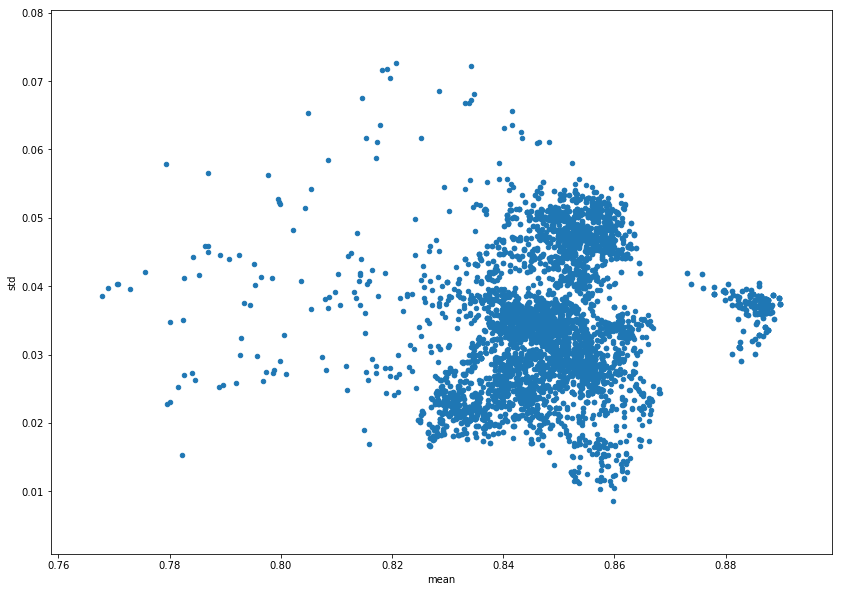

In [15]:
df.plot('mean',
        'std',
        kind = 'scatter',
        figsize = (14,10),
        #c = 'lag_type'
       );

In [19]:
top_models = df[(df['mean'] >= 0.86) & (df['std'] <= 0.035)].reset_index(drop = True)

In [20]:
top_models.shape

(284, 9)

In [21]:
top_models.describe()

,learning_rate,max_depth,mean,n_estimators,std
count,284.000000,284.000000,284.000000,284.000000,284.000000
mean,0.027919,19.447183,0.866249,2707.746479,0.029004
std,0.041787,9.233946,0.008932,2033.937293,0.005815
min,0.001000,6.000000,0.860004,500.000000,0.011748
25%,0.005000,10.000000,0.860915,1500.000000,0.026117
50%,0.010000,20.000000,0.861984,2000.000000,0.030900
75%,0.025000,25.000000,0.865236,4000.000000,0.033641
max,0.250000,35.000000,0.887654,8000.000000,0.034951


In [22]:
top_models.head(25)

,learning_rate,max_depth,mean,model,n_estimators,std,lag_type,features,timesteps
0,0.010,30,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24
1,0.010,25,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24
2,0.010,35,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24
3,0.005,15,0.887159,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.033322,straight-lag,20,24
4,0.005,30,0.887066,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.034063,straight-lag,20,24
5,0.005,35,0.887066,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.034063,straight-lag,20,24
6,0.005,25,0.887066,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.034063,straight-lag,20,24
7,0.005,20,0.886746,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.032751,straight-lag,20,24
8,0.005,30,0.885961,6hrs_4steps_straight-lag_20features_24timesteps,1500,0.032814,straight-lag,20,24
9,0.005,35,0.885961,6hrs_4steps_straight-lag_20features_24timesteps,1500,0.032814,straight-lag,20,24


In [23]:
scaler = StandardScaler()
top_models['scaled_auc'] = scaler.fit_transform(top_models['mean'].values)

scaler = StandardScaler()
top_models['scaled_auc_std'] = scaler.fit_transform(top_models['std'].values)

/Users/zach-eberhart/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/zach-eberhart/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/zach-eberhart/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X

In [28]:
top_models['model_auc_score'] = (1 - top_models['scaled_auc_std']) + (top_models['scaled_auc'] * 2)

In [29]:
top_models = top_models.sort_values('model_auc_score', ascending = False).reset_index(drop = True)

In [30]:
top_100_models = top_models[:100]

In [31]:
top_100_models

,learning_rate,max_depth,mean,model,n_estimators,std,lag_type,features,timesteps,scaled_auc,scaled_auc_std,model_auc_score
0,0.005,20,0.885275,6hrs_4steps_straight-lag_20features_24timesteps,1500,0.030128,straight-lag,20,24,2.133930,0.193592,5.074269
1,0.005,20,0.885275,6hrs_4steps_straight-lag_20features_24timesteps,1500,0.030128,straight-lag,20,24,2.133930,0.193592,5.074269
2,0.010,30,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
3,0.010,35,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
4,0.010,25,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
5,0.010,35,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
6,0.010,25,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
7,0.010,30,0.887654,6hrs_4steps_straight-lag_20features_24timesteps,1000,0.033658,straight-lag,20,24,2.400829,0.801634,5.000024
8,0.005,20,0.886746,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.032751,straight-lag,20,24,2.298979,0.645445,4.952513
9,0.005,20,0.886746,6hrs_4steps_straight-lag_20features_24timesteps,2000,0.032751,straight-lag,20,24,2.298979,0.645445,4.952513


In [46]:
str(top_100_models[:24][['model',
                     'learning_rate',
                     'max_depth',
                     'n_estimators',
                     'lag_type',
                     'features',
                     'timesteps']].drop_duplicates()[6:12].to_dict('records'))

"[{'timesteps': '24', 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'features': '20', 'n_estimators': 1500, 'lag_type': 'straight-lag', 'max_depth': 15, 'learning_rate': 0.005}, {'timesteps': '24', 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'features': '20', 'n_estimators': 2000, 'lag_type': 'straight-lag', 'max_depth': 30, 'learning_rate': 0.005}, {'timesteps': '24', 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'features': '20', 'n_estimators': 2000, 'lag_type': 'straight-lag', 'max_depth': 35, 'learning_rate': 0.005}, {'timesteps': '24', 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'features': '20', 'n_estimators': 2000, 'lag_type': 'straight-lag', 'max_depth': 25, 'learning_rate': 0.005}, {'timesteps': '24', 'model': '6hrs_4steps_straight-lag_20features_24timesteps', 'features': '20', 'n_estimators': 1500, 'lag_type': 'straight-lag', 'max_depth': 35, 'learning_rate': 0.005}, {'timesteps': '24', 'model': '6hrs_4steps_straig

In [42]:
top_100_models.model.unique()

array(['6hrs_4steps_straight-lag_20features_24timesteps',
       '6hrs_4steps_straight-lag_40features_20timesteps',
       '6hrs_4steps_straight-lag_60features_4timesteps',
       '6hrs_4steps_straight-lag_60features_12timesteps'], dtype=object)

In [43]:
top_100_models.n_estimators.unique()

array([1000, 2000, 1500,  500, 4000])

# Top Models

1) 6hrs_4steps_straight-lag_20features_20timesteps
    - max_depth: 6
    - learning_rate: 0.01
    - n_estimators: 1000

2) 6hrs_4steps_straight-lag_20features_20timesteps
    - max_depth: 8
    - learning_rate: 0.01
    - n_estimators: 1000

3) 6hrs_4steps_straight-lag_20features_20timesteps
    - max_depth: 6
    - learning_rate: 0.01
    - n_estimators: 1500

4) 6hrs_4steps_straight-lag_20features_24timesteps
    - max_depth: 8
    - learning_rate: 0.1
    - n_estimators: 250

5) 6hrs_4steps_straight-lag_20features_20timesteps
    - max_depth: 8
    - leraning_rate: 0.01
    - n_estimators: 500